## Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
import time
import gc
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout , LSTM

In [2]:
DATA_PATH = "Datasets\\New_datasets\\Data_feature_Spectral_contrast.json"

In [3]:
# Function to load data

def load_data(data_path):
    
    with open(data_path, "r") as fp:
        data = json.load(fp)

  # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return X, y

In [4]:
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [5]:
X.shape

(3020, 259, 7)

In [6]:
y.shape

(3020,)

In [7]:
import gc
gc.collect()

0

# SVM 

In [15]:
import gc
gc.collect()

0

In [16]:
# parameters = [{'C': [0.1, 1, 5, 10, 50, 100,500], 'kernel': ['linear']},
#               {'C': [0.1, 1, 5, 10, 50, 100,500], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,10,100]}]

In [17]:
# from sklearn.model_selection import GridSearchCV, ShuffleSplit

In [18]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [19]:
# grid_search = GridSearchCV(svc, param_grid = parameters, scoring='accuracy',cv=shuffle_split,n_jobs=-1,verbose=10)

In [20]:
# grid_search.fit(X,y)

In [21]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [22]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_svm = []
y_test_all = []
times_svm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    model_svm = SVC(kernel='rbf')
    
    start_time = time.time()
    
    model_svm.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = model_svm.predict(X_test)
    scores_svm.append(x)
    times_svm.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [23]:
times_svm

[5.919082403182983,
 6.295960426330566,
 6.3852832317352295,
 6.054158926010132,
 6.142448902130127,
 2.8130438327789307,
 5.5084450244903564,
 2.867816209793091,
 2.7842140197753906,
 2.602548360824585]

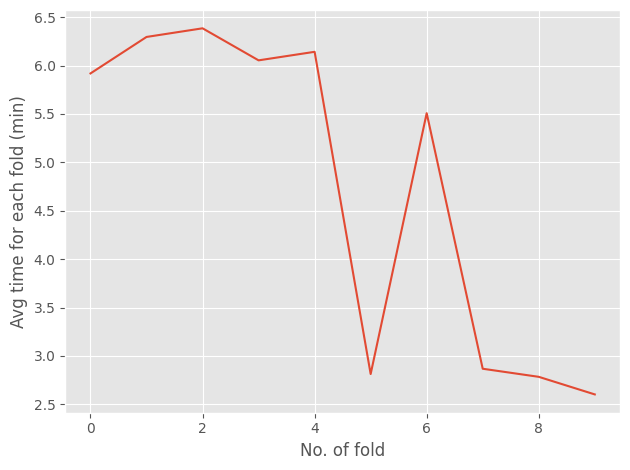

In [24]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(times_svm)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold (min)")
plt.tight_layout()
plt.savefig("svm times")
plt.show()

In [25]:
np.array(y_test_all).shape

(10, 302)

In [26]:
np.array(scores_svm).shape

(10, 302)

In [27]:
from sklearn.metrics import accuracy_score
acc_scores_svm = []
for i in range(len(y_test_all)):
    acc_scores_svm.append(accuracy_score(y_test_all[i],scores_svm[i]))

In [28]:
acc_scores_svm

[0.49337748344370863,
 0.49337748344370863,
 0.5033112582781457,
 0.4602649006622517,
 0.5,
 0.47019867549668876,
 0.4900662251655629,
 0.5132450331125827,
 0.48344370860927155,
 0.5298013245033113]

In [29]:
df_acc = pd.DataFrame([acc_scores_svm])

df_acc.to_csv('svm_accuracy', index=False)

df_acc = pd.read_csv('svm_accuracy')

acc_scores_svm = df_acc.iloc[0].values

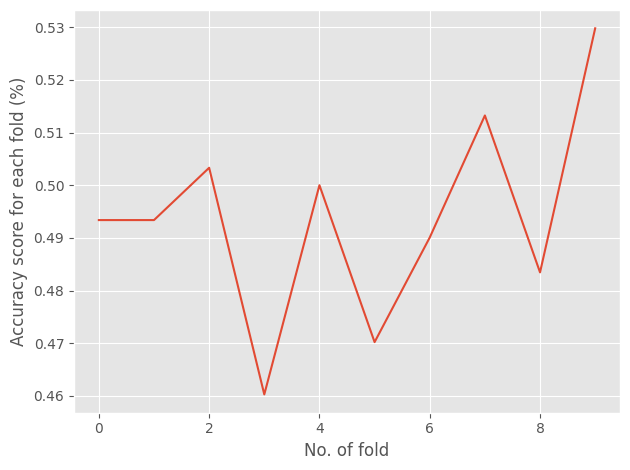

In [30]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_svm)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold (%)")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("svm accuracy")
plt.show()

In [31]:
scores_svm_n = np.array(scores_svm)
y_test_all_n = np.array(y_test_all)

scores_svm_n = scores_svm_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_svm_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 49.37%


In [33]:
import gc
gc.collect()

7157

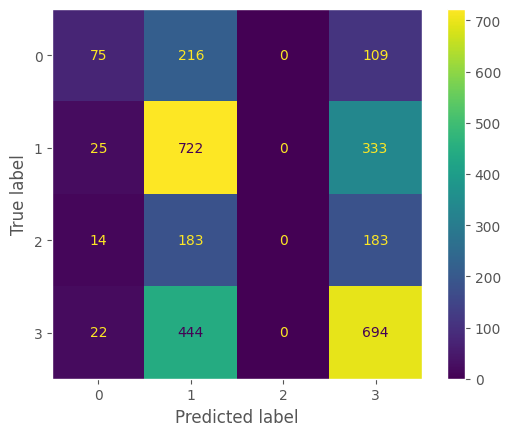

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_svm_n, labels=model_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_svm.classes_)
disp.plot()
plt.grid(False)
plt.savefig("svm")
plt.show()

In [35]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_svm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.55      0.19      0.28       400
           1       0.46      0.67      0.55      1080
           2       0.00      0.00      0.00       380
           3       0.53      0.60      0.56      1160

    accuracy                           0.49      3020
   macro avg       0.38      0.36      0.35      3020
weighted avg       0.44      0.49      0.45      3020



C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [36]:
import gc
gc.collect()

5

In [37]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_dtc = []
times_dtc = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    dtc = DecisionTreeClassifier()
    
    
    start_time = time.time()
    dtc.fit(X_train, y_train)
    end_time = time.time()
    
    
    x = dtc.predict(X_test)
    
    scores_dtc.append(x)
    times_dtc.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [38]:
times_dtc

[3.402090072631836,
 4.827647924423218,
 4.690300226211548,
 4.408417701721191,
 4.715822696685791,
 4.860590696334839,
 4.60358452796936,
 4.89729642868042,
 5.044074058532715,
 5.451550006866455]

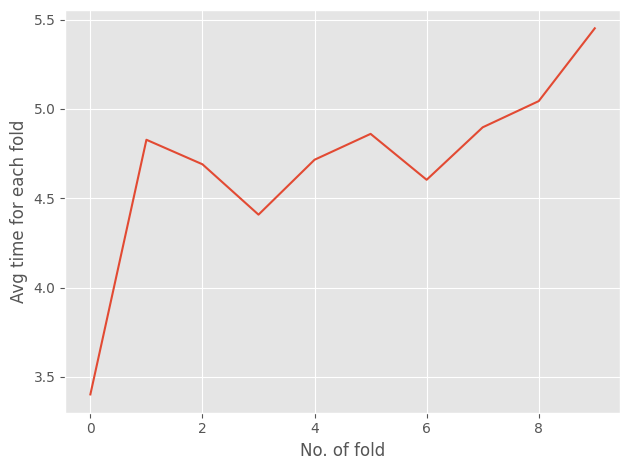

In [39]:
import matplotlib.pyplot as plt

plt.plot(times_dtc)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("dtc times")
plt.show()

In [40]:
np.array(y_test_all).shape

(10, 302)

In [41]:
np.array(scores_dtc).shape

(10, 302)

In [42]:
from sklearn.metrics import accuracy_score
acc_scores_dtc = []
for i in range(len(y_test_all)):
    acc_scores_dtc.append(accuracy_score(y_test_all[i],scores_dtc[i]))

In [43]:
acc_scores_dtc

[0.39072847682119205,
 0.32450331125827814,
 0.3509933774834437,
 0.3576158940397351,
 0.4139072847682119,
 0.4139072847682119,
 0.3708609271523179,
 0.39403973509933776,
 0.40066225165562913,
 0.31788079470198677]

In [44]:
df_acc = pd.DataFrame([acc_scores_dtc])

df_acc.to_csv('dtc_accuracy', index=False)

df_acc = pd.read_csv('dtc_accuracy')

acc_scores_dtc = df_acc.iloc[0].values

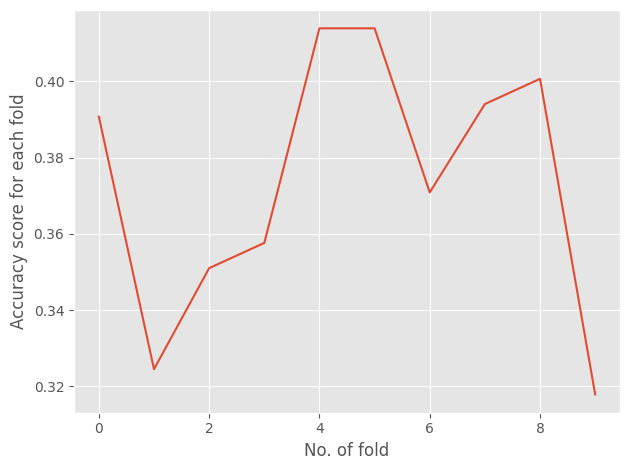

In [45]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_dtc)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("dtc accuracy")
plt.show()

In [46]:
import gc
gc.collect()

3212

In [47]:
scores_dtc_n = np.array(scores_dtc)
y_test_all_n = np.array(y_test_all)

scores_dtc_n = scores_dtc_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [48]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_dtc_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 37.35%


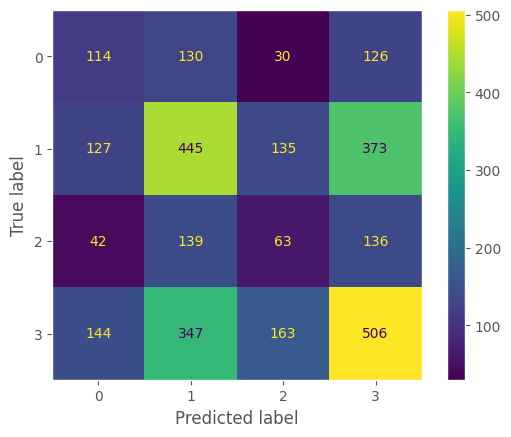

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_dtc_n, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()
plt.grid(False)
plt.savefig("DTC")
plt.show()

In [50]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_dtc_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.27      0.28      0.28       400
           1       0.42      0.41      0.42      1080
           2       0.16      0.17      0.16       380
           3       0.44      0.44      0.44      1160

    accuracy                           0.37      3020
   macro avg       0.32      0.32      0.32      3020
weighted avg       0.38      0.37      0.37      3020



In [51]:
# val = np.arange(100,500,20)
# parameters = [{'max_depth':val}]

In [52]:
# parameters

In [53]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [54]:
# grid_search_dtc = GridSearchCV(dtc, param_grid = parameters, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [55]:
# grid_search_dtc.fit(X_train,y_train)

In [56]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# Random Forest

In [57]:
import gc
gc.collect()

6327

In [58]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_rdf = []
times_rdf = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    rdf = RandomForestClassifier()
    
    #start time
    start_time = time.time()             
    
    rdf.fit(X_train, y_train)
    
    #end time
    end_time = time.time()     
    
    x = rdf.predict(X_test)
    scores_rdf.append(x)
    times_rdf.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [59]:
times_rdf

[8.141228199005127,
 11.688994646072388,
 9.128011465072632,
 8.45012378692627,
 8.223018407821655,
 12.536592483520508,
 8.617465019226074,
 8.0493803024292,
 8.041192054748535,
 12.422017574310303]

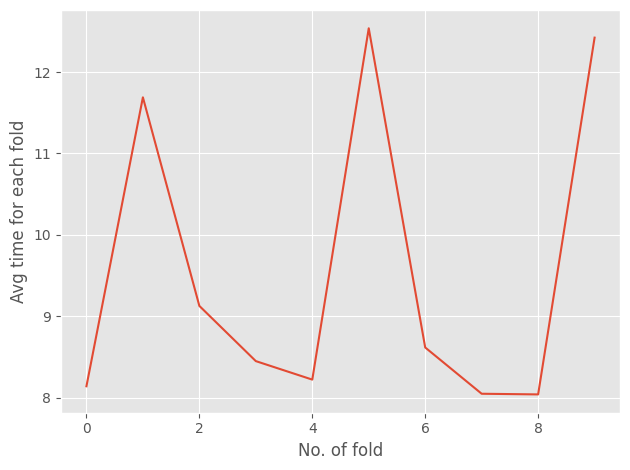

In [60]:
import matplotlib.pyplot as plt

plt.plot(times_rdf)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("rdf times")
plt.show()

In [61]:
import gc
gc.collect()

3225

In [62]:
from sklearn.metrics import accuracy_score
acc_scores_rdf = []
for i in range(len(y_test_all)):
    acc_scores_rdf.append(accuracy_score(y_test_all[i],scores_rdf[i]))

In [63]:
acc_scores_rdf

[0.48344370860927155,
 0.4370860927152318,
 0.48344370860927155,
 0.44039735099337746,
 0.46357615894039733,
 0.5165562913907285,
 0.4867549668874172,
 0.48344370860927155,
 0.4735099337748344,
 0.47019867549668876]

In [64]:
df_acc = pd.DataFrame([acc_scores_rdf])

df_acc.to_csv('rdf_accuracy', index=False)

df_acc = pd.read_csv('rdf_accuracy')

acc_scores_rdf = df_acc.iloc[0].values

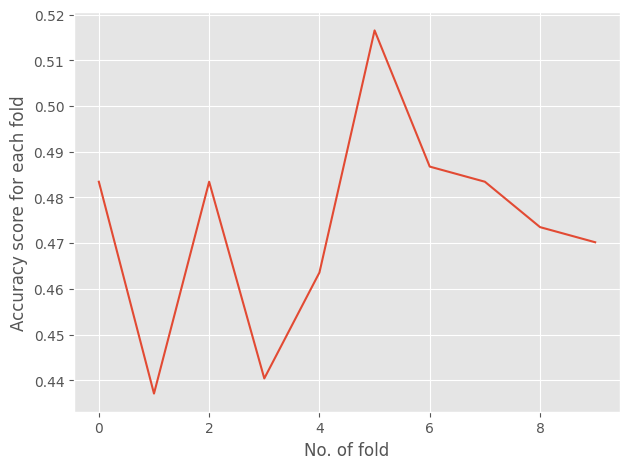

In [65]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_rdf)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("rdf accuracy")
plt.show()
plt.show()

In [66]:
scores_rdf_n = np.array(scores_rdf)
y_test_all_n = np.array(y_test_all)

scores_rdf_n = scores_rdf_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [67]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_rdf_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 47.38%


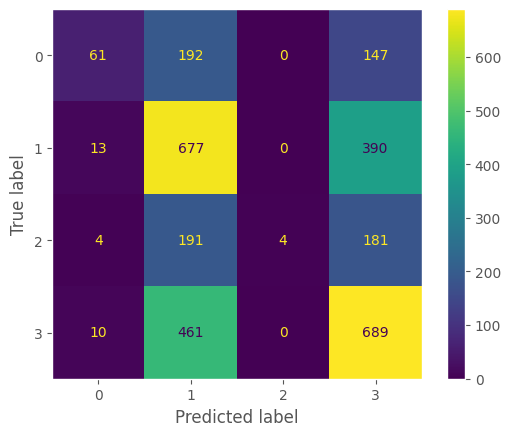

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_rdf_n, labels=rdf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rdf.classes_)
disp.plot()
plt.grid(False)
plt.savefig("RDF")
plt.show()

In [69]:
import gc
gc.collect()

6152

In [70]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_rdf_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.69      0.15      0.25       400
           1       0.45      0.63      0.52      1080
           2       1.00      0.01      0.02       380
           3       0.49      0.59      0.54      1160

    accuracy                           0.47      3020
   macro avg       0.66      0.35      0.33      3020
weighted avg       0.56      0.47      0.43      3020



In [71]:
# parameters_rdf = [
#               {'n_estimators': [10,50,100,150,250,500,750,1000,1500,2000],
#               'max_depth': [1,10,50,100,150,250,500,750,1000,1500,2000]}
#              ]

In [72]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [73]:
# grid_search = GridSearchCV(rdf, param_grid = parameters_rdf, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [74]:
# grid_search.fit(X_train,y_train)

In [75]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# KNN

In [76]:
import gc
gc.collect()

0

In [77]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_knn = []
times_knn = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    knn = KNeighborsClassifier()
    
    start_time = time.time()
    
    knn.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = knn.predict(X_test)
    scores_knn.append(x)
    times_knn.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [78]:
times_knn

[0.0039997100830078125,
 0.0029959678649902344,
 0.0,
 0.0030002593994140625,
 0.004000425338745117,
 0.0040056705474853516,
 0.015633344650268555,
 0.0008859634399414062,
 0.015614032745361328,
 0.0]

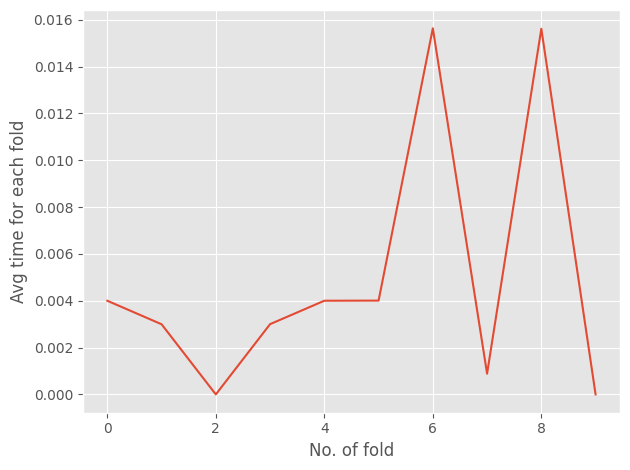

In [79]:
import matplotlib.pyplot as plt

plt.plot(times_knn)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("knn times")
plt.show()

In [80]:
from sklearn.metrics import accuracy_score
acc_scores_knn = []
for i in range(len(y_test_all)):
    acc_scores_knn.append(accuracy_score(y_test_all[i],scores_knn[i]))

In [81]:
acc_scores_knn

[0.5132450331125827,
 0.4966887417218543,
 0.5198675496688742,
 0.4966887417218543,
 0.5,
 0.5364238410596026,
 0.5132450331125827,
 0.4602649006622517,
 0.5165562913907285,
 0.4900662251655629]

In [82]:
df_acc = pd.DataFrame([acc_scores_knn])

df_acc.to_csv('knn_accuracy', index=False)

df_acc = pd.read_csv('knn_accuracy')

acc_scores_knn = df_acc.iloc[0].values

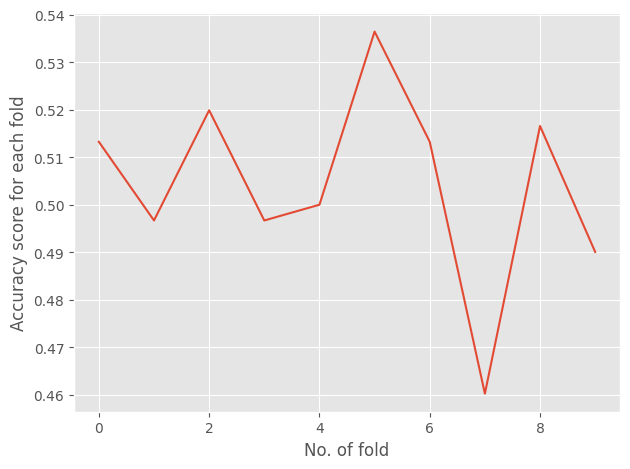

In [83]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_knn)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("knn accuracy")
plt.show()
plt.show()

In [84]:
import gc
gc.collect()

3673

In [85]:
scores_knn_n = np.array(scores_knn)
y_test_all_n = np.array(y_test_all)

scores_knn_n = scores_knn_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [86]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_knn_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.43%


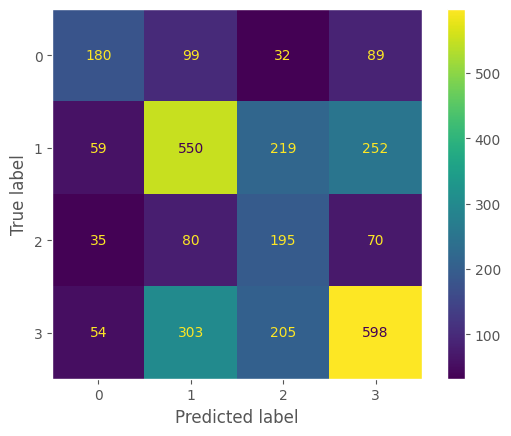

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_knn_n, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.savefig("KNN")
plt.show()

In [88]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_knn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.55      0.45      0.49       400
           1       0.53      0.51      0.52      1080
           2       0.30      0.51      0.38       380
           3       0.59      0.52      0.55      1160

    accuracy                           0.50      3020
   macro avg       0.49      0.50      0.49      3020
weighted avg       0.53      0.50      0.51      3020



In [89]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [90]:
# parameters_knn = [{'n_neighbors':[3,5,7,9,11,13,15,17,19,21],'weights': ['uniform', 'distance'],'leaf_size':[30,50,70,90,100]}]

In [91]:
# grid_search_knn = GridSearchCV(knn, param_grid = parameters_knn, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [92]:
# grid_search_knn.fit(X_train,y_train)

In [93]:
# print("Best hyperparameters: ", grid_search_knn.best_params_)
# print("Best score: ", grid_search_knn.best_score_)

In [94]:
# knn_2 = KNeighborsClassifier(n_neighbors=5,weights='distance',leaf_size=30)
# knn_2.fit(X_train,y_train)

# Naive Bayes

In [95]:
import gc
gc.collect()

6229

In [96]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nb = []
times_nb = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    nb = GaussianNB()
    
    start_time = time.time()
    
    nb.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = nb.predict(X_test)
    scores_nb.append(x)
    times_nb.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [97]:
times_nb

[0.0445706844329834,
 0.04046511650085449,
 0.04770684242248535,
 0.02922821044921875,
 0.05562138557434082,
 0.0630636215209961,
 0.04158663749694824,
 0.03590846061706543,
 0.0399630069732666,
 0.04688262939453125]

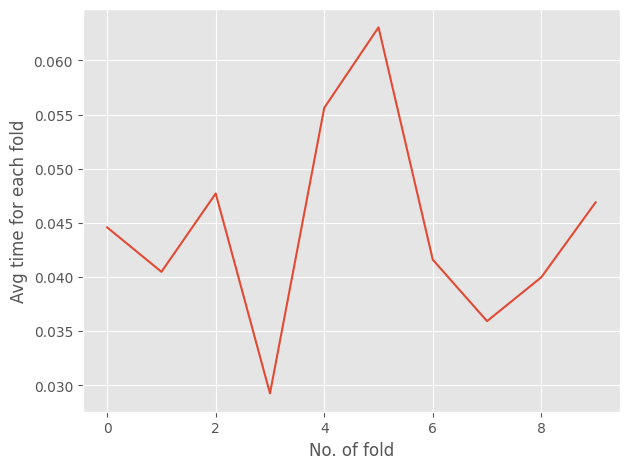

In [98]:
import matplotlib.pyplot as plt

plt.plot(times_nb)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("nb times")
plt.show()

In [99]:
import gc
gc.collect()

3465

In [100]:
from sklearn.metrics import accuracy_score
acc_scores_nb = []
for i in range(len(y_test_all)):
    acc_scores_nb.append(accuracy_score(y_test_all[i],scores_nb[i]))

In [101]:
acc_scores_nb

[0.3841059602649007,
 0.40728476821192056,
 0.347682119205298,
 0.40066225165562913,
 0.37748344370860926,
 0.40066225165562913,
 0.4139072847682119,
 0.41721854304635764,
 0.4105960264900662,
 0.36423841059602646]

In [102]:
df_acc = pd.DataFrame([acc_scores_nb])

df_acc.to_csv('nb_accuracy', index=False)

df_acc = pd.read_csv('nb_accuracy')

acc_scores_nb = df_acc.iloc[0].values

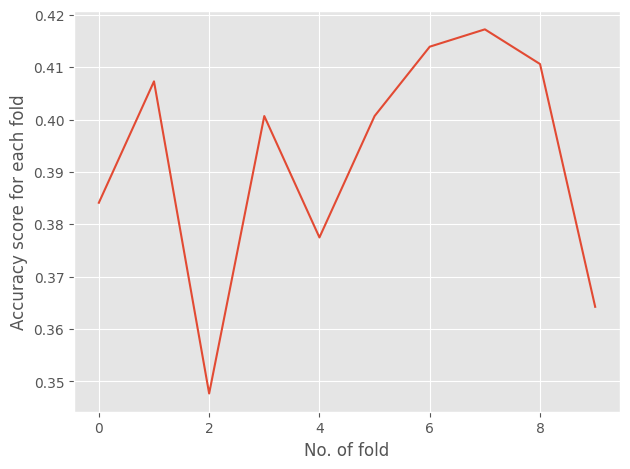

In [103]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_nb)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("nb accuracy")
plt.show()

In [104]:
scores_nb_n = np.array(scores_nb)
y_test_all_n = np.array(y_test_all)

scores_nb_n = scores_nb_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [105]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_nb_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 39.24%


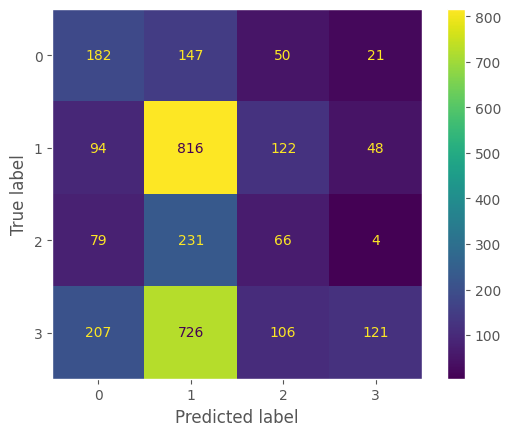

In [106]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_nb_n, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb.classes_)
disp.plot()
plt.grid(False)
plt.savefig("NB")
plt.show()

In [107]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_nb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.32      0.46      0.38       400
           1       0.42      0.76      0.54      1080
           2       0.19      0.17      0.18       380
           3       0.62      0.10      0.18      1160

    accuracy                           0.39      3020
   macro avg       0.39      0.37      0.32      3020
weighted avg       0.46      0.39      0.34      3020



In [108]:
import gc
gc.collect()

6162

In [109]:
# parameters_nb = {'var_smoothing': [1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16,1e-17,1e-18,1e-19,1e-20,1e-9, 1e-8, 1e-7, 1e-6, 1e-5,1e-4,1e-3,1e-2]}

In [110]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [111]:
# grid_search_nb = GridSearchCV(nb, param_grid = parameters_nb, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [112]:
# grid_search_nb.fit(X_train,y_train)

In [113]:
# print("Best hyperparameters: ", grid_search_nb.best_params_)
# print("Best score: ", grid_search_nb.best_score_)

In [114]:
# nb_2 = GaussianNB(var_smoothing=1e-10)
# nb_2.fit(X_train,y_train)

In [115]:
# times_svm_n = np.array(times_svm)
# times_svm_n = times_svm_n/60.0

# times_dtc_n = np.array(times_dtc)
# times_dtc_n = times_dtc_n/60.0

# times_rdf_n = np.array(times_rdf)
# times_rdf_n = times_rdf_n/60.0

# times_knn_n = np.array(times_knn)
# times_knn_n = times_knn_n/60.0

# times_nb_n = np.array(times_nb)
# times_nb_n = times_svm_n/60.0

# Fusion (CNN+SVM)

In [116]:
import gc
gc.collect()

0

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import BatchNormalization

In [118]:
X,y = load_data(DATA_PATH)

Data succesfully loaded!


In [119]:
X.shape

(3020, 259, 7)

In [120]:
# ''''''
# from keras.layers import Activation
# from keras.backend import sigmoid
# def swish(x):
#     return x * sigmoid(x)
# ''''''

In [121]:
# ''''
# from keras.utils import get_custom_objects
# get_custom_objects().update({'swish':Activation(swish)})
# ''''

In [122]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_cnn_svm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_cnn_svm.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [123]:
def create_model_cnn_svm():
    
    model_cnn_svm = keras.Sequential([

        keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (X.shape[1],X.shape[2],1)),
        keras.layers.MaxPool2D((3,3),strides=(1,1),padding ='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),

        keras.layers.Conv2D(32,(3,3),activation ='relu'),
        keras.layers.MaxPool2D((3,3),strides=(1,1),padding ='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),

        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dropout(0.5),


        keras.layers.Dense(4,kernel_regularizer=keras.regularizers.l2(0.01),activation='softmax')

    ])
    return model_cnn_svm

In [124]:
import gc
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_cnn_svm = []
y_test_all_cnn_svm = []
train_acc_cnn_svm = []
test_acc_cnn_svm = []
train_loss_cnn_svm = []
test_loss_cnn_svm = []


for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_cnn_svm.append(y_test)
    
    model_cnn_svm = None
    model_cnn_svm = create_model_cnn_svm()
    
    X_train, x_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    optimiser =tf.keras.optimizers.Adam(learning_rate=0.001)
    
    model_cnn_svm.compile(optimizer = optimiser, loss = tf.keras.losses.squared_hinge, metrics = ['accuracy'])
    
    history = model_cnn_svm.fit(X_train, y_train,validation_data=(x_valid,y_valid),batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    x = model_cnn_svm.predict(X_test)
    
    scores_cnn_svm.append(x)
    train_acc_cnn_svm.append(history.history["accuracy"])
    test_acc_cnn_svm.append(history.history["val_accuracy"])
    train_loss_cnn_svm.append(history.history["loss"])
    test_loss_cnn_svm.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 3s 8ms/step - loss: 0.5465 - accuracy: 0.3001 - val_loss: 0.7239 - val_accuracy: 0.1029 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4312 - accuracy: 0.2559 - val_loss: 0.4268 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4178 - accuracy: 0.2629 - val_loss: 0.4148 - val_accuracy: 0.1029 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4079 - accuracy: 0.2101 - val_loss: 0.4064 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4013 - accuracy: 0.2236 - val_loss: 0.4009 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3967 - accuracy: 0.3136 - val_loss: 0.3973 - val_accuracy: 0.1029 - lr: 0.0010
Epoch 7/100
77/77 [==============================] 

Epoch 30/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3890 - accuracy: 0.1321 - val_loss: 0.3915 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 31/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3890 - accuracy: 0.1321 - val_loss: 0.3915 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 32/100
73/77 [===========================>..] - ETA: 0s - loss: 0.3879 - accuracy: 0.2992
Epoch 32: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 32: 0.37 seconds
77/77 [==============================] - 0s 5ms/step - loss: 0.3890 - accuracy: 0.3001 - val_loss: 0.3915 - val_accuracy: 0.3640 - lr: 8.0000e-06
Epoch 33/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3890 - accuracy: 0.3569 - val_loss: 0.3915 - val_accuracy: 0.3640 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3890 - accuracy: 0.3569 - val_loss: 0.3915 - val_accuracy: 0.3640 - lr: 1.6000e-06
Epoch 

77/77 [==============================] - 0s 5ms/step - loss: 0.3890 - accuracy: 0.3569 - val_loss: 0.3915 - val_accuracy: 0.3640 - lr: 2.0480e-11
Epoch 87/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3890 - accuracy: 0.3569 - val_loss: 0.3915 - val_accuracy: 0.3640 - lr: 2.0480e-11
Epoch 88/100
74/77 [===========================>..] - ETA: 0s - loss: 0.3872 - accuracy: 0.3556
Epoch 88: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 88: 0.37 seconds
77/77 [==============================] - 0s 5ms/step - loss: 0.3890 - accuracy: 0.3569 - val_loss: 0.3915 - val_accuracy: 0.3640 - lr: 2.0480e-11
Epoch 89/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3890 - accuracy: 0.3569 - val_loss: 0.3915 - val_accuracy: 0.3640 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3890 - accuracy: 0.3577 - val_loss: 0.3915 - val_accuracy: 0.3640 - lr: 4.0960e-12
Epoch 91/100
77/77 [

Epoch 15/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3925 - accuracy: 0.3614 - val_loss: 0.3595 - val_accuracy: 0.3272 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3925 - accuracy: 0.3614 - val_loss: 0.3594 - val_accuracy: 0.3272 - lr: 2.0000e-04
Epoch 17/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3924 - accuracy: 0.2052 - val_loss: 0.3594 - val_accuracy: 0.0993 - lr: 2.0000e-04
Epoch 18/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3924 - accuracy: 0.1341 - val_loss: 0.3594 - val_accuracy: 0.0993 - lr: 2.0000e-04
Epoch 19/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3924 - accuracy: 0.1594 - val_loss: 0.3594 - val_accuracy: 0.3272 - lr: 2.0000e-04
Epoch 20/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3924 - accuracy: 0.3009 - val_loss: 0.3594 - val_accuracy: 0.0993 - lr: 2.0000e-04
Epoch 21/100
77/77 [==========================

Epoch 44/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3924 - accuracy: 0.3618 - val_loss: 0.3594 - val_accuracy: 0.3272 - lr: 1.6000e-06
Epoch 45/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3924 - accuracy: 0.3618 - val_loss: 0.3594 - val_accuracy: 0.3272 - lr: 1.6000e-06
Epoch 46/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3924 - accuracy: 0.3614 - val_loss: 0.3594 - val_accuracy: 0.3272 - lr: 1.6000e-06
Epoch 47/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3924 - accuracy: 0.3614 - val_loss: 0.3594 - val_accuracy: 0.3272 - lr: 1.6000e-06
Epoch 48/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3924 - accuracy: 0.1639 - val_loss: 0.3594 - val_accuracy: 0.0993 - lr: 1.6000e-06
Epoch 49/100
69/77 [=========================>....] - ETA: 0s - loss: 0.3916 - accuracy: 0.1327
Epoch 49: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 49: 0.38 se

10/10 [==============================] - 0s 2ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 1s 6ms/step - loss: 0.5268 - accuracy: 0.1811 - val_loss: 0.4833 - val_accuracy: 0.1213 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4367 - accuracy: 0.2792 - val_loss: 0.4033 - val_accuracy: 0.3493 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4206 - accuracy: 0.2236 - val_loss: 0.3897 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4094 - accuracy: 0.2314 - val_loss: 0.3809 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4023 - accuracy: 0.1415 - val_loss: 0.3753 - val_accuracy: 0.1434 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3979 - accuracy: 0.1819 - val_loss: 0.3719 - val_accuracy: 0.1434 - lr: 0.001

Epoch 29/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3915 - accuracy: 0.1321 - val_loss: 0.3670 - val_accuracy: 0.1397 - lr: 4.0000e-05
Epoch 30/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3915 - accuracy: 0.1316 - val_loss: 0.3670 - val_accuracy: 0.1360 - lr: 4.0000e-05
Epoch 31/100
77/77 [==============================] - ETA: 0s - loss: 0.3915 - accuracy: 0.1329
Epoch 31: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 31: 0.35 seconds
77/77 [==============================] - 0s 5ms/step - loss: 0.3915 - accuracy: 0.1329 - val_loss: 0.3670 - val_accuracy: 0.1360 - lr: 4.0000e-05
Epoch 32/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3915 - accuracy: 0.1333 - val_loss: 0.3670 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 33/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3915 - accuracy: 0.1329 - val_loss: 0.3670 - val_accuracy: 0.1397 - lr: 8.0000e-06
Epoch 3

77/77 [==============================] - 0s 5ms/step - loss: 0.3915 - accuracy: 0.1267 - val_loss: 0.3670 - val_accuracy: 0.1324 - lr: 1.0240e-10
Epoch 86/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3915 - accuracy: 0.1271 - val_loss: 0.3670 - val_accuracy: 0.1324 - lr: 1.0240e-10
Epoch 87/100
76/77 [============================>.] - ETA: 0s - loss: 0.3922 - accuracy: 0.1271
Epoch 87: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 87: 0.35 seconds
77/77 [==============================] - 0s 5ms/step - loss: 0.3915 - accuracy: 0.1271 - val_loss: 0.3670 - val_accuracy: 0.1324 - lr: 1.0240e-10
Epoch 88/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3915 - accuracy: 0.1271 - val_loss: 0.3670 - val_accuracy: 0.1324 - lr: 2.0480e-11
Epoch 89/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3915 - accuracy: 0.1271 - val_loss: 0.3670 - val_accuracy: 0.1324 - lr: 2.0480e-11
Epoch 90/100
77/77 

Epoch 14/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3916 - accuracy: 0.2052 - val_loss: 0.3665 - val_accuracy: 0.1213 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3916 - accuracy: 0.1742 - val_loss: 0.3665 - val_accuracy: 0.3088 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3916 - accuracy: 0.1504 - val_loss: 0.3665 - val_accuracy: 0.1728 - lr: 2.0000e-04
Epoch 17/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3916 - accuracy: 0.1210 - val_loss: 0.3665 - val_accuracy: 0.1728 - lr: 2.0000e-04
Epoch 18/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3916 - accuracy: 0.1374 - val_loss: 0.3665 - val_accuracy: 0.1213 - lr: 2.0000e-04
Epoch 19/100
70/77 [==========================>...] - ETA: 0s - loss: 0.3895 - accuracy: 0.1290
Epoch 19: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 19: 0.37 s

77/77 [==============================] - 0s 5ms/step - loss: 0.3916 - accuracy: 0.1206 - val_loss: 0.3665 - val_accuracy: 0.1728 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3916 - accuracy: 0.1206 - val_loss: 0.3665 - val_accuracy: 0.1728 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3916 - accuracy: 0.1210 - val_loss: 0.3665 - val_accuracy: 0.1728 - lr: 5.1200e-10
Epoch 73/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3916 - accuracy: 0.1206 - val_loss: 0.3665 - val_accuracy: 0.1728 - lr: 5.1200e-10
Epoch 74/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3916 - accuracy: 0.1210 - val_loss: 0.3665 - val_accuracy: 0.1728 - lr: 5.1200e-10
Epoch 75/100
72/77 [===========================>..] - ETA: 0s - loss: 0.3901 - accuracy: 0.1211
Epoch 75: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 75: 0.37 seconds
77/77 

Epoch 27/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3878 - accuracy: 0.1321 - val_loss: 0.4010 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3878 - accuracy: 0.1325 - val_loss: 0.4010 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3878 - accuracy: 0.1321 - val_loss: 0.4010 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3878 - accuracy: 0.1312 - val_loss: 0.4010 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 31/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3878 - accuracy: 0.1316 - val_loss: 0.4010 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 32/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3878 - accuracy: 0.1321 - val_loss: 0.4010 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 33/100
74/77 [==========================

77/77 [==============================] - 0s 5ms/step - loss: 0.3878 - accuracy: 0.1321 - val_loss: 0.4010 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3878 - accuracy: 0.1316 - val_loss: 0.4010 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3878 - accuracy: 0.1312 - val_loss: 0.4010 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3878 - accuracy: 0.1321 - val_loss: 0.4010 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 87/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3878 - accuracy: 0.1321 - val_loss: 0.4010 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 88/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3878 - accuracy: 0.1321 - val_loss: 0.4010 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 89/100
72/77 [===========================>..] - ETA: 

Epoch 12/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3920 - accuracy: 0.2858 - val_loss: 0.3631 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 13/100
73/77 [===========================>..] - ETA: 0s - loss: 0.3905 - accuracy: 0.1464
Epoch 13: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 13: 0.37 seconds
77/77 [==============================] - 0s 5ms/step - loss: 0.3920 - accuracy: 0.1472 - val_loss: 0.3631 - val_accuracy: 0.0993 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3920 - accuracy: 0.2625 - val_loss: 0.3631 - val_accuracy: 0.4118 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3920 - accuracy: 0.3814 - val_loss: 0.3631 - val_accuracy: 0.4118 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3920 - accuracy: 0.3132 - val_loss: 0.3631 - val_accuracy: 0.0993 - lr: 2.0000e-04
Epoch 17/100
7

77/77 [==============================] - 0s 5ms/step - loss: 0.3920 - accuracy: 0.1345 - val_loss: 0.3631 - val_accuracy: 0.0993 - lr: 2.5600e-09
Epoch 69/100
74/77 [===========================>..] - ETA: 0s - loss: 0.3921 - accuracy: 0.1347
Epoch 69: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 69: 0.36 seconds
77/77 [==============================] - 0s 5ms/step - loss: 0.3920 - accuracy: 0.1349 - val_loss: 0.3631 - val_accuracy: 0.0993 - lr: 2.5600e-09
Epoch 70/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3920 - accuracy: 0.1357 - val_loss: 0.3631 - val_accuracy: 0.0993 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3920 - accuracy: 0.1333 - val_loss: 0.3631 - val_accuracy: 0.0993 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3920 - accuracy: 0.1349 - val_loss: 0.3631 - val_accuracy: 0.0993 - lr: 5.1200e-10
Epoch 73/100
77/77 [==

77/77 [==============================] - 0s 5ms/step - loss: 0.3936 - accuracy: 0.1321 - val_loss: 0.3529 - val_accuracy: 0.1250 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3936 - accuracy: 0.1325 - val_loss: 0.3529 - val_accuracy: 0.1250 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3936 - accuracy: 0.1329 - val_loss: 0.3529 - val_accuracy: 0.1250 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3936 - accuracy: 0.1325 - val_loss: 0.3529 - val_accuracy: 0.1250 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3936 - accuracy: 0.1329 - val_loss: 0.3529 - val_accuracy: 0.1250 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3936 - accuracy: 0.1325 - val_loss: 0.3529 - val_accuracy: 0.1250 - lr: 8.0000e-06
Epoch 30/100
71/77 [==========================>...] - ETA: 

77/77 [==============================] - 0s 5ms/step - loss: 0.3935 - accuracy: 0.1288 - val_loss: 0.3529 - val_accuracy: 0.0993 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3935 - accuracy: 0.1292 - val_loss: 0.3529 - val_accuracy: 0.0993 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3935 - accuracy: 0.1292 - val_loss: 0.3529 - val_accuracy: 0.0993 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3935 - accuracy: 0.1288 - val_loss: 0.3529 - val_accuracy: 0.0993 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3935 - accuracy: 0.1292 - val_loss: 0.3529 - val_accuracy: 0.0993 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3935 - accuracy: 0.1288 - val_loss: 0.3529 - val_accuracy: 0.0993 - lr: 2.0480e-11
Epoch 86/100
71/77 [==========================>...] - ETA: 

Epoch 9/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3866 - accuracy: 0.1468 - val_loss: 0.4293 - val_accuracy: 0.1838 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3860 - accuracy: 0.1627 - val_loss: 0.4288 - val_accuracy: 0.1838 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3855 - accuracy: 0.1267 - val_loss: 0.4285 - val_accuracy: 0.1838 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3853 - accuracy: 0.1267 - val_loss: 0.4283 - val_accuracy: 0.1838 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3851 - accuracy: 0.1308 - val_loss: 0.4281 - val_accuracy: 0.1838 - lr: 0.0010
Epoch 14/100
75/77 [============================>.] - ETA: 0s - loss: 0.3870 - accuracy: 0.1283
Epoch 14: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 14: 0.36 seconds
77/77 [=======

77/77 [==============================] - 0s 5ms/step - loss: 0.3848 - accuracy: 0.1263 - val_loss: 0.4279 - val_accuracy: 0.1838 - lr: 2.5600e-09
Epoch 66/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3848 - accuracy: 0.1267 - val_loss: 0.4279 - val_accuracy: 0.1838 - lr: 2.5600e-09
Epoch 67/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3848 - accuracy: 0.1271 - val_loss: 0.4279 - val_accuracy: 0.1838 - lr: 2.5600e-09
Epoch 68/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3848 - accuracy: 0.1267 - val_loss: 0.4279 - val_accuracy: 0.1838 - lr: 2.5600e-09
Epoch 69/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3848 - accuracy: 0.1263 - val_loss: 0.4279 - val_accuracy: 0.1838 - lr: 2.5600e-09
Epoch 70/100
77/77 [==============================] - ETA: 0s - loss: 0.3848 - accuracy: 0.1267
Epoch 70: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 70: 0.41 seconds
77/77 [==

Epoch 22/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3891 - accuracy: 0.1337 - val_loss: 0.3886 - val_accuracy: 0.1176 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3891 - accuracy: 0.1341 - val_loss: 0.3886 - val_accuracy: 0.1176 - lr: 4.0000e-05
Epoch 24/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3891 - accuracy: 0.1333 - val_loss: 0.3886 - val_accuracy: 0.1176 - lr: 4.0000e-05
Epoch 25/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3891 - accuracy: 0.1378 - val_loss: 0.3886 - val_accuracy: 0.1287 - lr: 4.0000e-05
Epoch 26/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3891 - accuracy: 0.1361 - val_loss: 0.3886 - val_accuracy: 0.1176 - lr: 4.0000e-05
Epoch 27/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3891 - accuracy: 0.1341 - val_loss: 0.3886 - val_accuracy: 0.1176 - lr: 4.0000e-05
Epoch 28/100
71/77 [==========================

77/77 [==============================] - 0s 5ms/step - loss: 0.3891 - accuracy: 0.3545 - val_loss: 0.3886 - val_accuracy: 0.3897 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3891 - accuracy: 0.3549 - val_loss: 0.3886 - val_accuracy: 0.3897 - lr: 1.0240e-10
Epoch 80/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3891 - accuracy: 0.3545 - val_loss: 0.3886 - val_accuracy: 0.3897 - lr: 1.0240e-10
Epoch 81/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3891 - accuracy: 0.3545 - val_loss: 0.3886 - val_accuracy: 0.3897 - lr: 1.0240e-10
Epoch 82/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3891 - accuracy: 0.3545 - val_loss: 0.3886 - val_accuracy: 0.3897 - lr: 1.0240e-10
Epoch 83/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3891 - accuracy: 0.3545 - val_loss: 0.3886 - val_accuracy: 0.3897 - lr: 1.0240e-10
Epoch 84/100
71/77 [==========================>...] - ETA: 

Epoch 7/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3918 - accuracy: 0.1333 - val_loss: 0.3955 - val_accuracy: 0.1103 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3905 - accuracy: 0.2559 - val_loss: 0.3946 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3897 - accuracy: 0.2224 - val_loss: 0.3940 - val_accuracy: 0.1140 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3893 - accuracy: 0.2187 - val_loss: 0.3937 - val_accuracy: 0.1103 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3890 - accuracy: 0.2404 - val_loss: 0.3935 - val_accuracy: 0.1103 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3889 - accuracy: 0.3074 - val_loss: 0.3934 - val_accuracy: 0.3493 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 0s 5ms/step - loss:

Epoch 36/100
73/77 [===========================>..] - ETA: 0s - loss: 0.3878 - accuracy: 0.1293
Epoch 36: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 36: 0.37 seconds
77/77 [==============================] - 0s 5ms/step - loss: 0.3886 - accuracy: 0.1304 - val_loss: 0.3932 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoch 37/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3886 - accuracy: 0.1308 - val_loss: 0.3932 - val_accuracy: 0.1140 - lr: 1.6000e-06
Epoch 38/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3886 - accuracy: 0.1312 - val_loss: 0.3932 - val_accuracy: 0.1140 - lr: 1.6000e-06
Epoch 39/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3886 - accuracy: 0.1308 - val_loss: 0.3932 - val_accuracy: 0.1140 - lr: 1.6000e-06
Epoch 40/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3886 - accuracy: 0.1300 - val_loss: 0.3932 - val_accuracy: 0.1140 - lr: 1.6000e-06
Epoch 

72/77 [===========================>..] - ETA: 0s - loss: 0.3870 - accuracy: 0.1276
Epoch 92: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 92: 0.37 seconds
77/77 [==============================] - 0s 5ms/step - loss: 0.3886 - accuracy: 0.1304 - val_loss: 0.3932 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 93/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3886 - accuracy: 0.1300 - val_loss: 0.3932 - val_accuracy: 0.1140 - lr: 4.0960e-12
Epoch 94/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3886 - accuracy: 0.1308 - val_loss: 0.3932 - val_accuracy: 0.1140 - lr: 4.0960e-12
Epoch 95/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3886 - accuracy: 0.1308 - val_loss: 0.3932 - val_accuracy: 0.1140 - lr: 4.0960e-12
Epoch 96/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3886 - accuracy: 0.1300 - val_loss: 0.3932 - val_accuracy: 0.1140 - lr: 4.0960e-12
Epoch 97/100
77/77 [

In [125]:
import gc
gc.collect()

0

In [126]:
np.array(y_test_all_cnn_svm).shape

(10, 302)

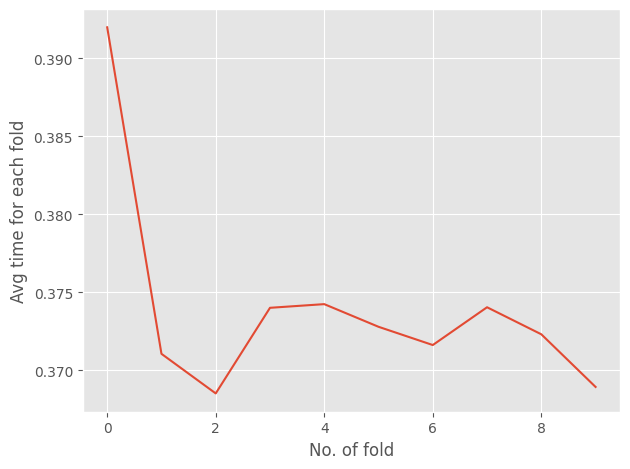

In [127]:
import matplotlib.pyplot as plt

times_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(times_cnn_svm):
    times_cnn_svm_n[i, :len(row)] = row

times_cnn_svm_n_n = np.mean(times_cnn_svm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_cnn_svm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("cnn_svm times")
plt.show()

In [128]:
train_acc_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_cnn_svm):
    train_acc_cnn_svm_n[i, :len(row)] = row
    
test_acc_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_cnn_svm):
    test_acc_cnn_svm_n[i, :len(row)] = row
    
train_loss_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_cnn_svm):
    train_loss_cnn_svm_n[i, :len(row)] = row
    
test_loss_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_cnn_svm):
    test_loss_cnn_svm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_cnn_svm_n = np.mean(train_acc_cnn_svm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_cnn_svm_n = np.mean(test_acc_cnn_svm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_cnn_svm_n = np.mean(train_loss_cnn_svm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_cnn_svm_n = np.mean(test_loss_cnn_svm_n,axis=0)

In [129]:
train_acc_cnn_svm_n.shape

(100,)

In [130]:
train_acc_cnn_svm_n.shape

(100,)

In [131]:
data = [train_acc_cnn_svm_n,test_acc_cnn_svm_n,train_loss_cnn_svm_n,test_loss_cnn_svm_n]

df = pd.DataFrame(data)
df.to_csv('cnn_svm_acc', index=False)
df = pd.read_csv('cnn_svm_acc')

train_acc_cnn_svm_n = df.iloc[0]
test_acc_cnn_svm_n = df.iloc[1]
train_loss_cnn_svm_n = df.iloc[2]
test_loss_cnn_svm_n = df.iloc[3]


df_t = pd.DataFrame([times_cnn_svm_n_n])
df_t.to_csv('cnn_svm_times', index=False)
df_t = pd.read_csv('cnn_svm_times')

times_cnn_svm_n_n = df_t.iloc[0]

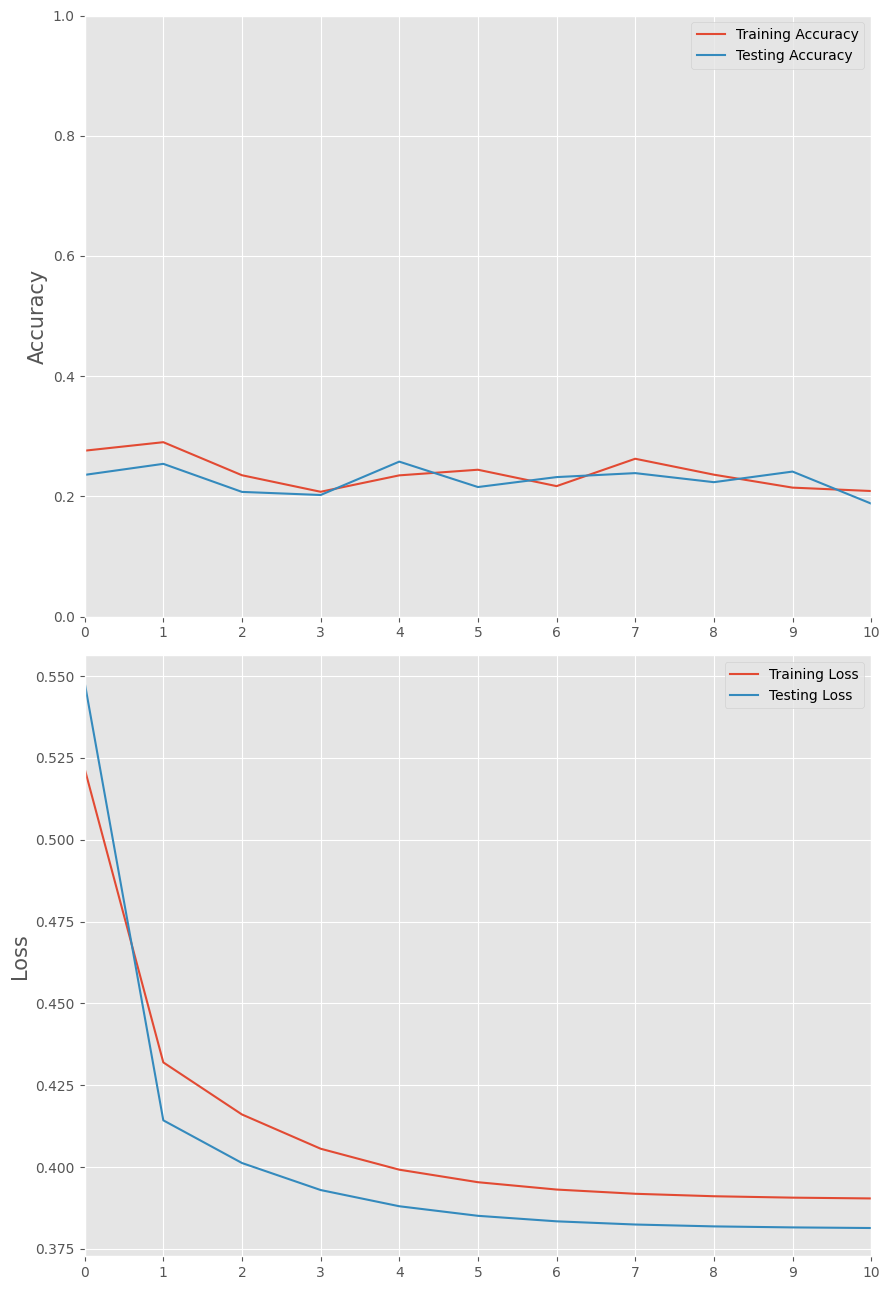

In [132]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))
plt.style.use('ggplot')

axs[0].plot(train_acc_cnn_svm_n, label='Training Accuracy')
axs[0].plot(test_acc_cnn_svm_n, label='Testing Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_cnn_svm_n, label='Training Loss')
axs[1].plot(test_loss_cnn_svm_n, label='Testing Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("CNN + SVM Training and Testing Loss")
plt.show()

In [133]:
np.array(scores_cnn_svm).shape

(10, 302, 4)

In [134]:
np.array(y_test_all_cnn_svm).shape

(10, 302)

In [135]:
y_pred_cnn_svm = np.argmax(scores_cnn_svm,axis=2)

In [136]:
y_pred_cnn_svm.shape

(10, 302)

In [137]:
from sklearn.metrics import accuracy_score
acc_scores_cnn_svm = []
for i in range(len(y_test_all_cnn_svm)):
    acc_scores_cnn_svm.append(accuracy_score(y_true = y_test_all_cnn_svm[i],y_pred = y_pred_cnn_svm[i]))

In [138]:
import gc
gc.collect()

25

In [139]:
acc_scores_cnn_svm

[0.3609271523178808,
 0.1291390728476821,
 0.12582781456953643,
 0.12582781456953643,
 0.13245033112582782,
 0.11589403973509933,
 0.12582781456953643,
 0.13245033112582782,
 0.3675496688741722,
 0.11920529801324503]

In [140]:
df_acc = pd.DataFrame([acc_scores_cnn_svm])

df_acc.to_csv('cnn_svm_accuracy', index=False)

df_acc = pd.read_csv('cnn_svm_accuracy')

acc_scores_cnn_svm = df_acc.iloc[0].values

In [141]:
y_test_all_n = np.array(y_test_all_cnn_svm)

y_pred_cnn_svm_n = y_pred_cnn_svm.flatten()
y_test_all_n = y_test_all_n.flatten()

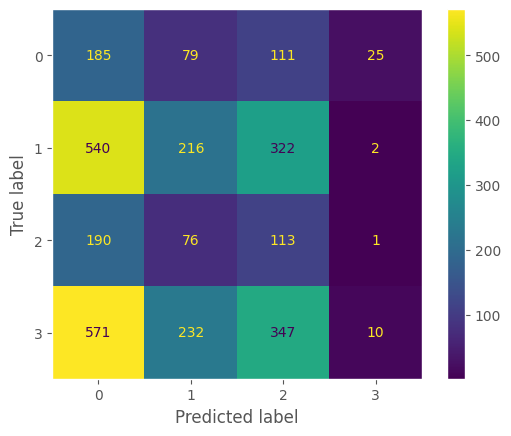

In [142]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_cnn_svm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("CNN + SVM")
plt.show()

In [143]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_cnn_svm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.12      0.46      0.20       400
           1       0.36      0.20      0.26      1080
           2       0.13      0.30      0.18       380
           3       0.26      0.01      0.02      1160

    accuracy                           0.17      3020
   macro avg       0.22      0.24      0.16      3020
weighted avg       0.26      0.17      0.15      3020



## CNN + SVM (hyper-para-tuning)

In [144]:
# ''''
# conv_1_filter: 48
# conv_1_kernel: 3
# conv_2_filter: 64
# conv_2_kernel: 5
# dense_1_units: 32
# lr: 0.0012043751090852965

# ''''

In [145]:
# import numpy as np
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# from keras.wrappers.scikit_learn import KerasClassifier

In [146]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [147]:
# X,y = load_data(DATA_PATH)

In [148]:
# X = X / 255.0

In [149]:
# X.shape

In [150]:
# ''''
# def create():
    
#     model_cnn = Sequential()
#     model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X.shape[1],X.shape[2],1))),
#     model.add(MaxPooling2D(pool_size=pool_size ,strides=(1,1),padding ='same')),
#     model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')),
#     model.add(MaxPooling2D(pool_size=pool_size,strides=(1,1),padding ='same')),
#     model.add(Flatten()),
#     model.add(Dense(128, activation='relu')),
#     model.add(Dropout(0.5)),
#     model.add(Dense(4,kernel_regularizer=keras.regularizers.l2(0.01), activation='softmax')),
#     model.compile(optimizer=optimizer, loss='squared_hinge', metrics=['accuracy'])
    
#     return model_cnn

# ''''

In [151]:
# def build_model(hp):
#     model = keras.Sequential([
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
#         kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
#         activation='relu',
#         input_shape=(259,13,1)
#     ),
    
#     keras.layers.MaxPooling2D(
#         pool_size = (2, 2),
#         strides=(1,1),
#         padding ='same'
#     ),
        
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
#         kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
#         activation='relu'
#     ),
        
#     keras.layers.MaxPooling2D(
#         pool_size = (2,2),
#         strides=(1,1),
#         padding ='same'
#     ),
    
#     keras.layers.Flatten(),
#     keras.layers.Dense(
#         units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
#         activation='relu'
#     ),
#     keras.layers.Dense(4,kernel_regularizer=keras.regularizers.l2(0.01), activation='softmax')
#   ])
  
#     learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
#     model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
#               loss='squared_hinge',
#               metrics=['accuracy'])
  
#     return model

In [152]:
# from keras_tuner import RandomSearch
# from keras_tuner.engine.hyperparameters import HyperParameters

In [153]:
# tuner_search=RandomSearch(build_model,
#                           objective='accuracy',
#                           overwrite=True,
#                           max_trials=10,directory='cnn')

In [154]:
# tuner_search.search(X,y,epochs=2,validation_split=0.2)

In [155]:
# tuner_search.results_summary()

In [156]:
# models = tuner_search.get_best_models(num_models=2)

# best_model = models[0]

# best_model.build(input_shape=(259,13,1))

# best_model.summary()

In [157]:
# def display_cv_results(search_results):
#     print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))    
    
# # create model
# model = KerasClassifier(build_fn=create_cnn_model, verbose=1)
# # define parameters and values for grid search 
# param_grid = {
#     'filters': [16, 32, 64],
#     'kernel_size': [(3, 3), (5, 5)],
#     'pool_size': [(2, 2), (3, 3)],
#     'activation': ['relu', 'sigmoid'],
#     'optimizer': ['adam', 'SGD'],
#     'batch_size': [16, 32, 64],
# }
# grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=cv)
# grid_result = grid.fit(X, y)  # fit the full dataset as we are using cross validation 

# # print out results
# print('time for grid search = {:.0f} sec'.format(time()-start))
# display_cv_results(grid_result)

# XGboost

In [158]:
import gc
gc.collect()

6416

In [159]:
import gc
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_xg = []
times_xg = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    xg = XGBClassifier()
    
    start_time = time.time()
    
    xg.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = xg.predict(X_test)
    scores_xg.append(x)
    times_xg.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [160]:
times_xg

[18.247729301452637,
 22.16231918334961,
 22.169219732284546,
 22.55599045753479,
 22.044394969940186,
 22.955937147140503,
 22.291637659072876,
 22.675305604934692,
 22.465075492858887,
 22.092529773712158]

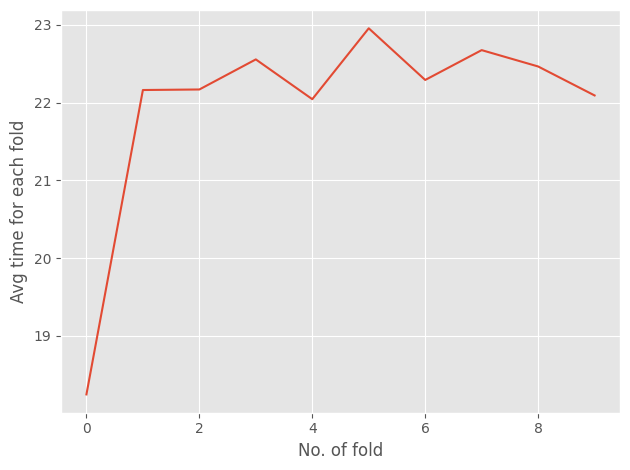

In [161]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot(times_xg)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("xg times")
plt.show()

In [162]:
import gc
gc.collect()

3225

In [163]:
from sklearn.metrics import accuracy_score
acc_scores_xg = []
for i in range(len(y_test_all)):
    acc_scores_xg.append(accuracy_score(y_test_all[i],scores_xg[i]))

In [164]:
acc_scores_xg

[0.5364238410596026,
 0.5165562913907285,
 0.5033112582781457,
 0.45364238410596025,
 0.4900662251655629,
 0.5165562913907285,
 0.48013245033112584,
 0.543046357615894,
 0.5662251655629139,
 0.4735099337748344]

In [165]:
df_acc = pd.DataFrame([acc_scores_xg])

df_acc.to_csv('xg_accuracy', index=False)

df_acc = pd.read_csv('xg_accuracy')

acc_scores_xg = df_acc.iloc[0].values

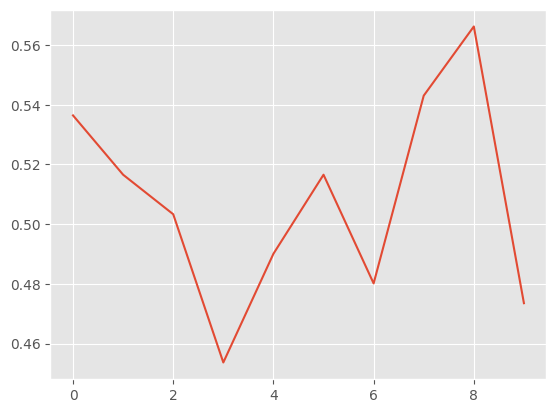

In [166]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_xg)
plt.style.use('ggplot')
plt.savefig("XG boost Acc figures")
plt.show()

In [167]:
scores_xg_n = np.array(scores_xg)
y_test_all_n = np.array(y_test_all)

scores_xg_n = scores_xg_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [168]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_xg_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.79%


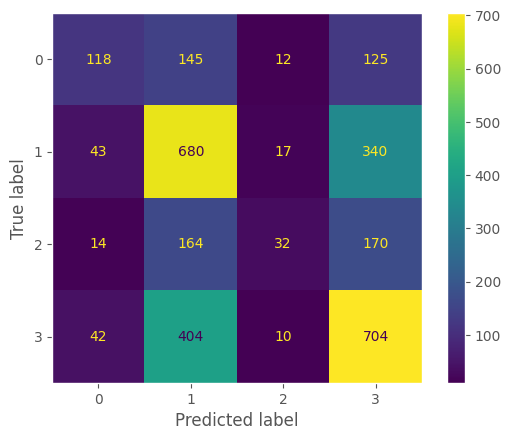

In [169]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_xg_n, labels=xg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xg.classes_)
disp.plot()
plt.grid(False)
plt.savefig("XG Boost")

plt.show()

In [170]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_xg_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.54      0.29      0.38       400
           1       0.49      0.63      0.55      1080
           2       0.45      0.08      0.14       380
           3       0.53      0.61      0.56      1160

    accuracy                           0.51      3020
   macro avg       0.50      0.40      0.41      3020
weighted avg       0.51      0.51      0.48      3020



# Catboost

In [171]:
import gc
gc.collect()

6157

In [172]:
import gc
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_cb = []
times_cb = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.10)
    
    cb = CatBoostClassifier(iterations=100)
    
    start_time = time.time()
    
    cb.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = cb.predict(X_test)
    scores_cb.append(x)
    times_cb.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Learning rate set to 0.5
0:	learn: 1.2593099	total: 362ms	remaining: 35.8s
1:	learn: 1.2027812	total: 558ms	remaining: 27.3s
2:	learn: 1.1621164	total: 767ms	remaining: 24.8s
3:	learn: 1.1358373	total: 954ms	remaining: 22.9s
4:	learn: 1.1024383	total: 1.16s	remaining: 22s
5:	learn: 1.0763156	total: 1.35s	remaining: 21.1s
6:	learn: 1.0473351	total: 1.55s	remaining: 20.6s
7:	learn: 1.0202164	total: 1.74s	remaining: 20s
8:	learn: 0.9929974	total: 1.94s	remaining: 19.7s
9:	learn: 0.9730890	total: 2.13s	remaining: 19.2s
10:	learn: 0.9526145	total: 2.34s	remaining: 18.9s
11:	learn: 0.9328169	total: 2.53s	remaining: 18.6s
12:	learn: 0.9144851	total: 2.77s	remaining: 18.5s
13:	learn: 0.8953178	total: 2.96s	remaining: 18.2s
14:	learn: 0.8758083	total: 3.18s	remaining: 18s
15:	learn: 0.8598126	total: 3.36s	remaining: 17.6s
16:	learn: 0.8403280	total: 3.56s	remaining: 17.4s
17:	learn: 0.8234050	total: 3.75s	remaining: 17.1s
18:	learn: 0.8035128	total: 3.95s	remaining: 16.

60:	learn: 0.3755928	total: 11.7s	remaining: 7.51s
61:	learn: 0.3694880	total: 11.9s	remaining: 7.31s
62:	learn: 0.3642342	total: 12.2s	remaining: 7.14s
63:	learn: 0.3582916	total: 12.4s	remaining: 6.95s
64:	learn: 0.3534138	total: 12.6s	remaining: 6.76s
65:	learn: 0.3491633	total: 12.8s	remaining: 6.57s
66:	learn: 0.3444559	total: 13s	remaining: 6.38s
67:	learn: 0.3388845	total: 13.2s	remaining: 6.19s
68:	learn: 0.3357169	total: 13.4s	remaining: 6s
69:	learn: 0.3283034	total: 13.6s	remaining: 5.82s
70:	learn: 0.3222950	total: 13.8s	remaining: 5.63s
71:	learn: 0.3182560	total: 14s	remaining: 5.43s
72:	learn: 0.3147545	total: 14.2s	remaining: 5.24s
73:	learn: 0.3097577	total: 14.4s	remaining: 5.05s
74:	learn: 0.3075760	total: 14.6s	remaining: 4.86s
75:	learn: 0.3033210	total: 14.8s	remaining: 4.67s
76:	learn: 0.2995806	total: 15s	remaining: 4.47s
77:	learn: 0.2949624	total: 15.2s	remaining: 4.29s
78:	learn: 0.2924090	total: 15.4s	remaining: 4.09s
79:	learn: 0.2876126	total: 15.6s	remain

21:	learn: 0.7880911	total: 4.49s	remaining: 15.9s
22:	learn: 0.7729475	total: 4.69s	remaining: 15.7s
23:	learn: 0.7503411	total: 4.89s	remaining: 15.5s
24:	learn: 0.7362579	total: 5.09s	remaining: 15.3s
25:	learn: 0.7285289	total: 5.29s	remaining: 15s
26:	learn: 0.7158234	total: 5.48s	remaining: 14.8s
27:	learn: 0.7004542	total: 5.67s	remaining: 14.6s
28:	learn: 0.6851305	total: 5.88s	remaining: 14.4s
29:	learn: 0.6699075	total: 6.08s	remaining: 14.2s
30:	learn: 0.6604238	total: 6.31s	remaining: 14s
31:	learn: 0.6426555	total: 6.54s	remaining: 13.9s
32:	learn: 0.6337870	total: 6.76s	remaining: 13.7s
33:	learn: 0.6217889	total: 6.96s	remaining: 13.5s
34:	learn: 0.6075278	total: 7.16s	remaining: 13.3s
35:	learn: 0.5973625	total: 7.38s	remaining: 13.1s
36:	learn: 0.5849758	total: 7.58s	remaining: 12.9s
37:	learn: 0.5701070	total: 7.78s	remaining: 12.7s
38:	learn: 0.5653109	total: 7.97s	remaining: 12.5s
39:	learn: 0.5520366	total: 8.19s	remaining: 12.3s
40:	learn: 0.5381374	total: 8.38s	r

82:	learn: 0.2608059	total: 15.9s	remaining: 3.26s
83:	learn: 0.2573779	total: 16.1s	remaining: 3.07s
84:	learn: 0.2541089	total: 16.3s	remaining: 2.87s
85:	learn: 0.2495440	total: 16.5s	remaining: 2.68s
86:	learn: 0.2459712	total: 16.7s	remaining: 2.49s
87:	learn: 0.2412630	total: 16.9s	remaining: 2.3s
88:	learn: 0.2391112	total: 17.1s	remaining: 2.11s
89:	learn: 0.2363491	total: 17.3s	remaining: 1.92s
90:	learn: 0.2336131	total: 17.5s	remaining: 1.73s
91:	learn: 0.2291730	total: 17.7s	remaining: 1.54s
92:	learn: 0.2269549	total: 17.9s	remaining: 1.34s
93:	learn: 0.2249733	total: 18.1s	remaining: 1.15s
94:	learn: 0.2224471	total: 18.3s	remaining: 962ms
95:	learn: 0.2208258	total: 18.5s	remaining: 770ms
96:	learn: 0.2182061	total: 18.7s	remaining: 578ms
97:	learn: 0.2159154	total: 18.9s	remaining: 385ms
98:	learn: 0.2124291	total: 19.1s	remaining: 193ms
99:	learn: 0.2102375	total: 19.3s	remaining: 0us
Training on fold 6/10...
Learning rate set to 0.5
0:	learn: 1.2579259	total: 214ms	re

43:	learn: 0.4933790	total: 8.6s	remaining: 10.9s
44:	learn: 0.4847354	total: 8.78s	remaining: 10.7s
45:	learn: 0.4740933	total: 8.98s	remaining: 10.5s
46:	learn: 0.4655651	total: 9.16s	remaining: 10.3s
47:	learn: 0.4568394	total: 9.36s	remaining: 10.1s
48:	learn: 0.4513291	total: 9.55s	remaining: 9.94s
49:	learn: 0.4443546	total: 9.74s	remaining: 9.74s
50:	learn: 0.4371843	total: 9.94s	remaining: 9.55s
51:	learn: 0.4307290	total: 10.1s	remaining: 9.36s
52:	learn: 0.4243181	total: 10.3s	remaining: 9.15s
53:	learn: 0.4173070	total: 10.5s	remaining: 8.96s
54:	learn: 0.4089075	total: 10.7s	remaining: 8.76s
55:	learn: 0.4007699	total: 10.9s	remaining: 8.56s
56:	learn: 0.3908911	total: 11.1s	remaining: 8.37s
57:	learn: 0.3860379	total: 11.3s	remaining: 8.18s
58:	learn: 0.3799523	total: 11.5s	remaining: 7.98s
59:	learn: 0.3731333	total: 11.7s	remaining: 7.79s
60:	learn: 0.3676360	total: 11.9s	remaining: 7.59s
61:	learn: 0.3613280	total: 12.1s	remaining: 7.41s
62:	learn: 0.3552918	total: 12.3

3:	learn: 1.1357105	total: 816ms	remaining: 19.6s
4:	learn: 1.1060760	total: 1s	remaining: 19s
5:	learn: 1.0773886	total: 1.19s	remaining: 18.6s
6:	learn: 1.0593864	total: 1.38s	remaining: 18.3s
7:	learn: 1.0330294	total: 1.57s	remaining: 18.1s
8:	learn: 1.0076564	total: 1.76s	remaining: 17.8s
9:	learn: 0.9923175	total: 1.95s	remaining: 17.6s
10:	learn: 0.9727739	total: 2.13s	remaining: 17.3s
11:	learn: 0.9499509	total: 2.33s	remaining: 17.1s
12:	learn: 0.9316032	total: 2.52s	remaining: 16.8s
13:	learn: 0.9207952	total: 2.71s	remaining: 16.6s
14:	learn: 0.9123950	total: 2.89s	remaining: 16.4s
15:	learn: 0.8958002	total: 3.09s	remaining: 16.2s
16:	learn: 0.8777833	total: 3.28s	remaining: 16s
17:	learn: 0.8589164	total: 3.47s	remaining: 15.8s
18:	learn: 0.8423544	total: 3.66s	remaining: 15.6s
19:	learn: 0.8340535	total: 3.85s	remaining: 15.4s
20:	learn: 0.8178994	total: 4.04s	remaining: 15.2s
21:	learn: 0.7982665	total: 4.23s	remaining: 15s
22:	learn: 0.7820025	total: 4.42s	remaining: 14

65:	learn: 0.3560316	total: 13.2s	remaining: 6.81s
66:	learn: 0.3493182	total: 13.4s	remaining: 6.61s
67:	learn: 0.3426801	total: 13.6s	remaining: 6.4s
68:	learn: 0.3404540	total: 13.8s	remaining: 6.2s
69:	learn: 0.3344810	total: 14s	remaining: 6s
70:	learn: 0.3309459	total: 14.2s	remaining: 5.8s
71:	learn: 0.3264594	total: 14.4s	remaining: 5.6s
72:	learn: 0.3215721	total: 14.6s	remaining: 5.4s
73:	learn: 0.3160905	total: 14.8s	remaining: 5.2s
74:	learn: 0.3105001	total: 15s	remaining: 5s
75:	learn: 0.3044864	total: 15.2s	remaining: 4.8s
76:	learn: 0.3005019	total: 15.4s	remaining: 4.6s
77:	learn: 0.2972061	total: 15.6s	remaining: 4.4s
78:	learn: 0.2945727	total: 15.8s	remaining: 4.2s
79:	learn: 0.2913952	total: 16s	remaining: 4s
80:	learn: 0.2865948	total: 16.2s	remaining: 3.8s
81:	learn: 0.2852077	total: 16.4s	remaining: 3.59s
82:	learn: 0.2823158	total: 16.6s	remaining: 3.39s
83:	learn: 0.2786732	total: 16.7s	remaining: 3.19s
84:	learn: 0.2769987	total: 16.9s	remaining: 2.99s
85:	le

In [173]:
times_cb

[20.43896222114563,
 20.49945306777954,
 20.74503231048584,
 20.727591276168823,
 20.137511014938354,
 20.534631490707397,
 20.455767393112183,
 20.33289361000061,
 20.342016458511353,
 20.586469650268555]

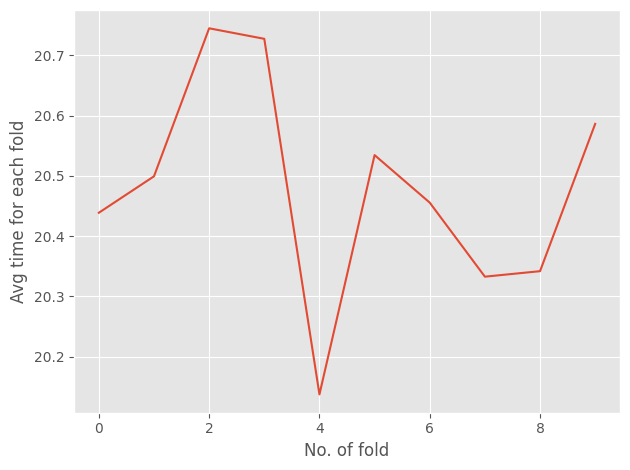

In [174]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.plot(times_cb)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("cb times")
plt.show()

In [175]:
from sklearn.metrics import accuracy_score
acc_scores_cb = []
for i in range(len(y_test_all)):
    acc_scores_cb.append(accuracy_score(y_test_all[i],scores_cb[i]))

In [176]:
acc_scores_cb

[0.4105960264900662,
 0.46688741721854304,
 0.44039735099337746,
 0.5264900662251656,
 0.4602649006622517,
 0.45364238410596025,
 0.4470198675496689,
 0.46688741721854304,
 0.4867549668874172,
 0.4503311258278146]

In [177]:
df_acc = pd.DataFrame([acc_scores_cb])

df_acc.to_csv('cb_accuracy', index=False)

df_acc = pd.read_csv('cb_accuracy')

acc_scores_cb = df_acc.iloc[0].values

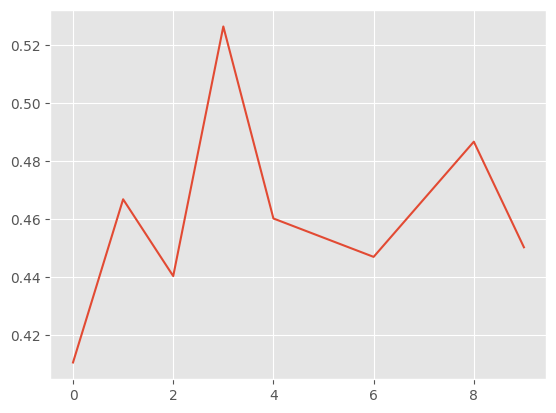

In [178]:
# import seaborn as sns
# sns.histplot(data=acc_scores,bins=20, kde=True)
import matplotlib.pyplot as plt
plt.plot(acc_scores_cb)
plt.style.use('ggplot')
plt.savefig("Catboost acc scores")
plt.show()

In [179]:
scores_cb_n = np.array(scores_cb)
y_test_all_n = np.array(y_test_all)

scores_cb_n = scores_cb_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [180]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_cb_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 46.09%


In [181]:
import gc
gc.collect()

3352

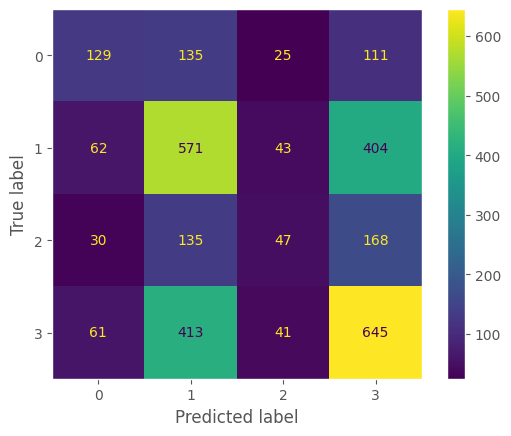

In [182]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_cb_n, labels=cb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cb.classes_)
disp.plot()
plt.grid(False)
plt.savefig("Catboost")

plt.show()

In [183]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_cb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.46      0.32      0.38       400
           1       0.46      0.53      0.49      1080
           2       0.30      0.12      0.18       380
           3       0.49      0.56      0.52      1160

    accuracy                           0.46      3020
   macro avg       0.42      0.38      0.39      3020
weighted avg       0.45      0.46      0.45      3020



In [184]:
times_svm_n = [i/60 for i in times_svm]
times_dtc_n = [i/60 for i in times_dtc]
times_rdf_n = [i/60 for i in times_rdf]
times_knn_n = [i/60 for i in times_knn]
times_nb_n = [i/60 for i in times_nb]
times_xg_n = [i/60 for i in times_xg]
times_cb_n = [i/60 for i in times_cb]

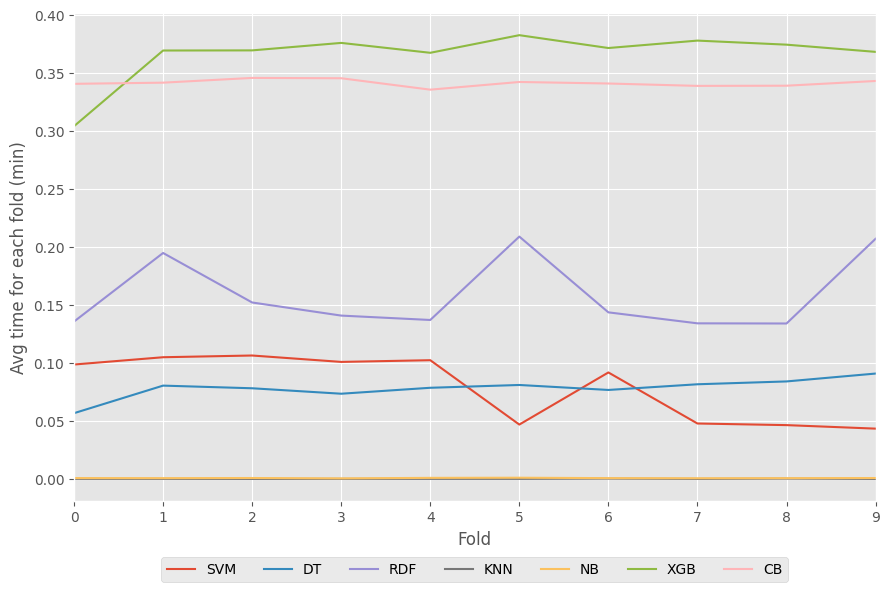

In [185]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(9,6))
plt.plot(times_svm_n,label='SVM')
plt.plot(times_dtc_n,label='DT')
plt.plot(times_rdf_n,label='RDF')
plt.plot(times_knn_n,label='KNN')
plt.plot(times_nb_n,label='NB')
plt.plot(times_xg_n,label='XGB')
plt.plot(times_cb_n,label='CB')

plt.xlabel("Fold")
plt.ylabel("Avg time for each fold (min)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=7)
plt.xlim([0,9])
plt.tight_layout()
plt.savefig("Machine Learning Melspec Times")
plt.show()

In [186]:
acc_scores_svm_n = [i*100 for i in acc_scores_svm]
acc_scores_dtc_n = [i*100 for i in acc_scores_dtc]
acc_scores_rdf_n = [i*100 for i in acc_scores_rdf]
acc_scores_knn_n = [i*100 for i in acc_scores_knn]
acc_scores_nb_n = [i*100 for i in acc_scores_nb]
acc_scores_xg_n = [i*100 for i in acc_scores_xg]
acc_scores_cb_n = [i*100 for i in acc_scores_cb]

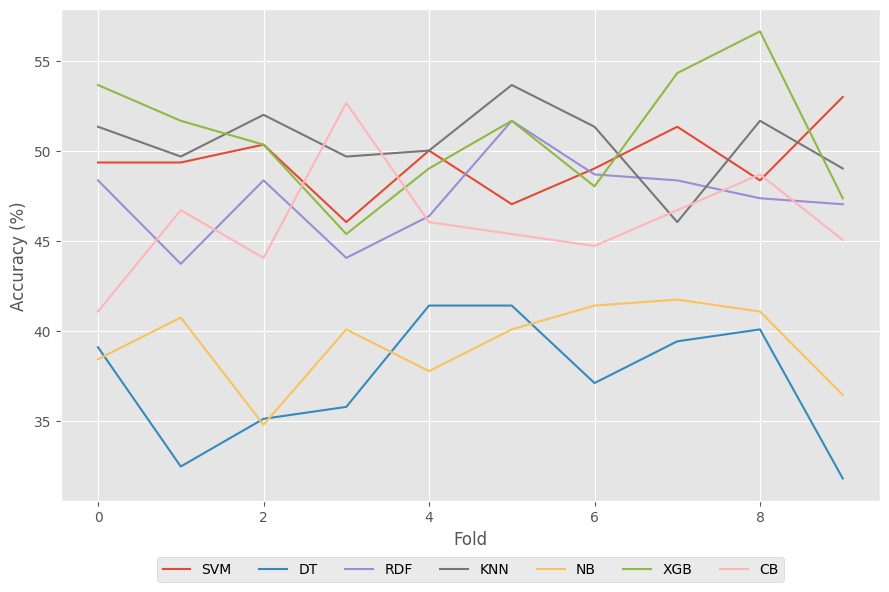

In [187]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(9,6))
plt.plot(acc_scores_svm_n,label='SVM')
plt.plot(acc_scores_dtc_n,label='DT')
plt.plot(acc_scores_rdf_n,label='RDF')
plt.plot(acc_scores_knn_n,label='KNN')
plt.plot(acc_scores_nb_n,label='NB')
plt.plot(acc_scores_xg_n,label='XGB')
plt.plot(acc_scores_cb_n,label='CB')

plt.xlabel("Fold")
plt.ylabel("Accuracy (%)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),ncol=7)
plt.tight_layout()
plt.savefig("Machine Learning Melspec Accuracy")
plt.show()

# LSTM

In [188]:
import gc
gc.collect()

16213

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout , LSTM

In [191]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_lstm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_lstm.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=17, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 10, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [192]:
def create_model_lstm():
    
    model_lstm = keras.Sequential([

        keras.layers.LSTM(256,activation='tanh',input_shape=(X.shape[1],X.shape[2]),return_sequences=True),
        keras.layers.Dropout(0.25),

        keras.layers.LSTM(128,activation='tanh',return_sequences=True),
        keras.layers.Dropout(0.25),

        keras.layers.LSTM(64,activation='tanh'),
        keras.layers.Dropout(0.25),

        keras.layers.Dense(4,activation='softmax')

    ])
    
    return model_lstm

In [193]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_lstm = []
y_test_all_lstm = []
train_acc_lstm = []
test_acc_lstm = []
train_loss_lstm = []
test_loss_lstm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_lstm.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_lstm = None
    model_lstm = create_model_lstm()
        
    model_lstm.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_lstm.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_lstm.predict(X_test)
    
    scores_lstm.append(x)
    train_acc_lstm.append(history.history["accuracy"])
    test_acc_lstm.append(history.history["val_accuracy"])
    train_loss_lstm.append(history.history["loss"])
    test_loss_lstm.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 7s 63ms/step - loss: 1.2595 - accuracy: 0.3970 - val_loss: 1.2386 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 53ms/step - loss: 1.2403 - accuracy: 0.4056 - val_loss: 1.1943 - val_accuracy: 0.4265 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 54ms/step - loss: 1.2336 - accuracy: 0.3949 - val_loss: 1.2465 - val_accuracy: 0.4522 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 51ms/step - loss: 1.2444 - accuracy: 0.4150 - val_loss: 1.1793 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 5s 67ms/step - loss: 1.2222 - accuracy: 0.4309 - val_loss: 1.1701 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 5s 68ms/step - loss: 1.2029 - accuracy: 0.4415 - val_loss: 1.1483 - val_accuracy: 0.5110 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Epoch 30/100
77/77 [==============================] - 5s 59ms/step - loss: 1.1247 - accuracy: 0.4926 - val_loss: 1.1332 - val_accuracy: 0.5074 - lr: 4.0000e-05
Epoch 31/100
77/77 [==============================] - 4s 58ms/step - loss: 1.1190 - accuracy: 0.5008 - val_loss: 1.1375 - val_accuracy: 0.5000 - lr: 4.0000e-05
Epoch 32/100
77/77 [==============================] - 5s 60ms/step - loss: 1.1239 - accuracy: 0.4967 - val_loss: 1.1313 - val_accuracy: 0.5074 - lr: 4.0000e-05
Epoch 33/100
77/77 [==============================] - 4s 53ms/step - loss: 1.1187 - accuracy: 0.5041 - val_loss: 1.1336 - val_accuracy: 0.5110 - lr: 4.0000e-05
Epoch 34/100
77/77 [==============================] - 5s 59ms/step - loss: 1.1168 - accuracy: 0.5070 - val_loss: 1.1323 - val_accuracy: 0.5074 - lr: 4.0000e-05
Epoch 35/100
77/77 [==============================] - 5s 60ms/step - loss: 1.1217 - accuracy: 0.5000 - val_loss: 1.1341 - val_accuracy: 0.5074 - lr: 4.0000e-05
Epoch 36/100
77/77 [====================

Epoch 59/100
77/77 [==============================] - 4s 57ms/step - loss: 1.1074 - accuracy: 0.5070 - val_loss: 1.1291 - val_accuracy: 0.5074 - lr: 3.2000e-07
Epoch 60/100
77/77 [==============================] - 5s 62ms/step - loss: 1.1086 - accuracy: 0.5057 - val_loss: 1.1291 - val_accuracy: 0.5074 - lr: 3.2000e-07
Epoch 61/100
77/77 [==============================] - 5s 64ms/step - loss: 1.1084 - accuracy: 0.5053 - val_loss: 1.1292 - val_accuracy: 0.5074 - lr: 3.2000e-07
Epoch 62/100
77/77 [==============================] - 4s 57ms/step - loss: 1.1146 - accuracy: 0.5049 - val_loss: 1.1293 - val_accuracy: 0.5074 - lr: 3.2000e-07
Epoch 63/100
77/77 [==============================] - 5s 67ms/step - loss: 1.1067 - accuracy: 0.5110 - val_loss: 1.1293 - val_accuracy: 0.5074 - lr: 3.2000e-07
Epoch 64/100
77/77 [==============================] - 5s 59ms/step - loss: 1.1079 - accuracy: 0.5070 - val_loss: 1.1294 - val_accuracy: 0.5074 - lr: 3.2000e-07
Epoch 65/100
77/77 [====================

Epoch 88/100
77/77 [==============================] - ETA: 0s - loss: 1.1061 - accuracy: 0.5123
Epoch 88: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 88: 4.49 seconds
77/77 [==============================] - 4s 58ms/step - loss: 1.1061 - accuracy: 0.5123 - val_loss: 1.1295 - val_accuracy: 0.5074 - lr: 1.2800e-08
Epoch 89/100
77/77 [==============================] - 5s 67ms/step - loss: 1.1063 - accuracy: 0.5090 - val_loss: 1.1295 - val_accuracy: 0.5074 - lr: 2.5600e-09
Epoch 90/100
77/77 [==============================] - 5s 68ms/step - loss: 1.1079 - accuracy: 0.5033 - val_loss: 1.1295 - val_accuracy: 0.5074 - lr: 2.5600e-09
Epoch 91/100
77/77 [==============================] - 4s 58ms/step - loss: 1.1061 - accuracy: 0.5057 - val_loss: 1.1295 - val_accuracy: 0.5074 - lr: 2.5600e-09
Epoch 92/100
77/77 [==============================] - 5s 64ms/step - loss: 1.1081 - accuracy: 0.5029 - val_loss: 1.1295 - val_accuracy: 0.5074 - lr: 2.5600e-09
E

Epoch 17/100
77/77 [==============================] - 4s 58ms/step - loss: 1.1682 - accuracy: 0.4628 - val_loss: 1.1890 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 5s 59ms/step - loss: 1.1473 - accuracy: 0.4742 - val_loss: 1.1777 - val_accuracy: 0.4669 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 5s 59ms/step - loss: 1.1502 - accuracy: 0.4738 - val_loss: 1.1918 - val_accuracy: 0.4596 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 4s 53ms/step - loss: 1.1492 - accuracy: 0.4697 - val_loss: 1.1833 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 21/100
77/77 [==============================] - 4s 56ms/step - loss: 1.1459 - accuracy: 0.4693 - val_loss: 1.1844 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 22/100
77/77 [==============================] - 4s 56ms/step - loss: 1.1748 - accuracy: 0.4481 - val_loss: 1.2286 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 23/100
77/77 [==============================] - 4s 54ms/st

Epoch 75/100
77/77 [==============================] - 4s 54ms/step - loss: 0.9052 - accuracy: 0.5924 - val_loss: 1.0995 - val_accuracy: 0.5110 - lr: 8.0000e-06
Epoch 76/100
77/77 [==============================] - 4s 58ms/step - loss: 0.8994 - accuracy: 0.5981 - val_loss: 1.0991 - val_accuracy: 0.5110 - lr: 8.0000e-06
Epoch 77/100
77/77 [==============================] - ETA: 0s - loss: 0.9047 - accuracy: 0.5916
Epoch 77: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 77: 4.47 seconds
77/77 [==============================] - 4s 58ms/step - loss: 0.9047 - accuracy: 0.5916 - val_loss: 1.0996 - val_accuracy: 0.5110 - lr: 8.0000e-06
Epoch 78/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8987 - accuracy: 0.6104 - val_loss: 1.0998 - val_accuracy: 0.5110 - lr: 1.6000e-06
Epoch 79/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8983 - accuracy: 0.6051 - val_loss: 1.0991 - val_accuracy: 0.5110 - lr: 1.6000e-06
E

Epoch 32/100
77/77 [==============================] - 4s 58ms/step - loss: 1.0765 - accuracy: 0.5278 - val_loss: 1.1092 - val_accuracy: 0.4926 - lr: 4.0000e-05
Epoch 33/100
77/77 [==============================] - 4s 55ms/step - loss: 1.0783 - accuracy: 0.5274 - val_loss: 1.1107 - val_accuracy: 0.4779 - lr: 4.0000e-05
Epoch 34/100
77/77 [==============================] - 4s 57ms/step - loss: 1.0732 - accuracy: 0.5352 - val_loss: 1.1100 - val_accuracy: 0.4779 - lr: 4.0000e-05
Epoch 35/100
77/77 [==============================] - 4s 57ms/step - loss: 1.0700 - accuracy: 0.5319 - val_loss: 1.1116 - val_accuracy: 0.4779 - lr: 4.0000e-05
Epoch 36/100
77/77 [==============================] - 4s 52ms/step - loss: 1.0646 - accuracy: 0.5282 - val_loss: 1.1042 - val_accuracy: 0.4853 - lr: 4.0000e-05
Epoch 37/100
77/77 [==============================] - 4s 55ms/step - loss: 1.0725 - accuracy: 0.5249 - val_loss: 1.1069 - val_accuracy: 0.5221 - lr: 4.0000e-05
Epoch 38/100
77/77 [====================

Epoch 61/100
77/77 [==============================] - ETA: 0s - loss: 1.0164 - accuracy: 0.5531
Epoch 61: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 61: 4.62 seconds
77/77 [==============================] - 5s 60ms/step - loss: 1.0164 - accuracy: 0.5531 - val_loss: 1.0868 - val_accuracy: 0.4963 - lr: 8.0000e-06
Epoch 62/100
77/77 [==============================] - 4s 53ms/step - loss: 1.0162 - accuracy: 0.5609 - val_loss: 1.0893 - val_accuracy: 0.4926 - lr: 1.6000e-06
Epoch 63/100
77/77 [==============================] - 4s 57ms/step - loss: 1.0162 - accuracy: 0.5523 - val_loss: 1.0876 - val_accuracy: 0.4963 - lr: 1.6000e-06
Epoch 64/100
77/77 [==============================] - 4s 56ms/step - loss: 1.0169 - accuracy: 0.5511 - val_loss: 1.0896 - val_accuracy: 0.4926 - lr: 1.6000e-06
Epoch 65/100
77/77 [==============================] - 4s 56ms/step - loss: 1.0178 - accuracy: 0.5527 - val_loss: 1.0890 - val_accuracy: 0.4926 - lr: 1.6000e-06
E

Epoch 90/100
77/77 [==============================] - 4s 50ms/step - loss: 1.0195 - accuracy: 0.5581 - val_loss: 1.0859 - val_accuracy: 0.4963 - lr: 6.4000e-08
Epoch 91/100
77/77 [==============================] - ETA: 0s - loss: 1.0154 - accuracy: 0.5581
Epoch 91: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 91: 3.88 seconds
77/77 [==============================] - 4s 50ms/step - loss: 1.0154 - accuracy: 0.5581 - val_loss: 1.0859 - val_accuracy: 0.4963 - lr: 6.4000e-08
Epoch 92/100
77/77 [==============================] - 4s 48ms/step - loss: 1.0158 - accuracy: 0.5646 - val_loss: 1.0859 - val_accuracy: 0.4963 - lr: 1.2800e-08
Epoch 93/100
77/77 [==============================] - 4s 55ms/step - loss: 1.0123 - accuracy: 0.5568 - val_loss: 1.0859 - val_accuracy: 0.4963 - lr: 1.2800e-08
Epoch 94/100
77/77 [==============================] - 4s 55ms/step - loss: 1.0170 - accuracy: 0.5523 - val_loss: 1.0859 - val_accuracy: 0.4963 - lr: 1.2800e-08
E

Epoch 19/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2019 - accuracy: 0.4407 - val_loss: 1.1829 - val_accuracy: 0.4743 - lr: 2.0000e-04
Epoch 20/100
77/77 [==============================] - 4s 56ms/step - loss: 1.1924 - accuracy: 0.4542 - val_loss: 1.1737 - val_accuracy: 0.4485 - lr: 2.0000e-04
Epoch 21/100
77/77 [==============================] - 4s 54ms/step - loss: 1.1835 - accuracy: 0.4587 - val_loss: 1.1705 - val_accuracy: 0.4338 - lr: 2.0000e-04
Epoch 22/100
77/77 [==============================] - 4s 53ms/step - loss: 1.1876 - accuracy: 0.4567 - val_loss: 1.1933 - val_accuracy: 0.4228 - lr: 2.0000e-04
Epoch 23/100
77/77 [==============================] - 4s 55ms/step - loss: 1.1645 - accuracy: 0.4657 - val_loss: 1.1740 - val_accuracy: 0.4191 - lr: 2.0000e-04
Epoch 24/100
77/77 [==============================] - 4s 54ms/step - loss: 1.1676 - accuracy: 0.4652 - val_loss: 1.1807 - val_accuracy: 0.4485 - lr: 2.0000e-04
Epoch 25/100
77/77 [====================

Epoch 48/100
77/77 [==============================] - 4s 57ms/step - loss: 1.1163 - accuracy: 0.4763 - val_loss: 1.1440 - val_accuracy: 0.4559 - lr: 8.0000e-06
Epoch 49/100
77/77 [==============================] - ETA: 0s - loss: 1.1098 - accuracy: 0.4918
Epoch 49: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 49: 4.61 seconds
77/77 [==============================] - 5s 60ms/step - loss: 1.1098 - accuracy: 0.4918 - val_loss: 1.1419 - val_accuracy: 0.4596 - lr: 8.0000e-06
Epoch 50/100
77/77 [==============================] - 5s 59ms/step - loss: 1.1068 - accuracy: 0.4984 - val_loss: 1.1414 - val_accuracy: 0.4559 - lr: 1.6000e-06
Epoch 51/100
77/77 [==============================] - 4s 53ms/step - loss: 1.1037 - accuracy: 0.4898 - val_loss: 1.1411 - val_accuracy: 0.4559 - lr: 1.6000e-06
Epoch 52/100
77/77 [==============================] - 4s 58ms/step - loss: 1.1075 - accuracy: 0.4861 - val_loss: 1.1402 - val_accuracy: 0.4559 - lr: 1.6000e-06
E

Epoch 77/100
77/77 [==============================] - 4s 56ms/step - loss: 1.1089 - accuracy: 0.4865 - val_loss: 1.1438 - val_accuracy: 0.4522 - lr: 6.4000e-08
Epoch 78/100
77/77 [==============================] - 4s 55ms/step - loss: 1.1079 - accuracy: 0.4935 - val_loss: 1.1438 - val_accuracy: 0.4522 - lr: 6.4000e-08
Epoch 79/100
77/77 [==============================] - ETA: 0s - loss: 1.1061 - accuracy: 0.4914
Epoch 79: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 79: 4.16 seconds
77/77 [==============================] - 4s 54ms/step - loss: 1.1061 - accuracy: 0.4914 - val_loss: 1.1438 - val_accuracy: 0.4522 - lr: 6.4000e-08
Epoch 80/100
77/77 [==============================] - 4s 58ms/step - loss: 1.1079 - accuracy: 0.4947 - val_loss: 1.1438 - val_accuracy: 0.4522 - lr: 1.2800e-08
Epoch 81/100
77/77 [==============================] - 4s 55ms/step - loss: 1.1045 - accuracy: 0.4939 - val_loss: 1.1438 - val_accuracy: 0.4522 - lr: 1.2800e-08
E

Epoch 35/100
77/77 [==============================] - 4s 57ms/step - loss: 1.0741 - accuracy: 0.5147 - val_loss: 1.1275 - val_accuracy: 0.4706 - lr: 0.0010
Epoch 36/100
77/77 [==============================] - 5s 59ms/step - loss: 1.0602 - accuracy: 0.5082 - val_loss: 1.1251 - val_accuracy: 0.4890 - lr: 0.0010
Epoch 37/100
77/77 [==============================] - 4s 55ms/step - loss: 1.1056 - accuracy: 0.4943 - val_loss: 1.1858 - val_accuracy: 0.4228 - lr: 0.0010
Epoch 38/100
77/77 [==============================] - 4s 54ms/step - loss: 1.1690 - accuracy: 0.4522 - val_loss: 1.1688 - val_accuracy: 0.4816 - lr: 0.0010
Epoch 39/100
77/77 [==============================] - 5s 60ms/step - loss: 1.1487 - accuracy: 0.4742 - val_loss: 1.2243 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 40/100
77/77 [==============================] - 4s 58ms/step - loss: 1.1345 - accuracy: 0.4808 - val_loss: 1.1573 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 41/100
77/77 [==============================] - 4s 54ms/st

Epoch 64/100
77/77 [==============================] - 4s 56ms/step - loss: 0.9053 - accuracy: 0.5850 - val_loss: 0.9862 - val_accuracy: 0.5478 - lr: 4.0000e-05
Epoch 65/100
77/77 [==============================] - 4s 55ms/step - loss: 0.9058 - accuracy: 0.5883 - val_loss: 0.9756 - val_accuracy: 0.5662 - lr: 4.0000e-05
Epoch 66/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8954 - accuracy: 0.5904 - val_loss: 0.9948 - val_accuracy: 0.5441 - lr: 4.0000e-05
Epoch 67/100
77/77 [==============================] - 4s 53ms/step - loss: 0.8916 - accuracy: 0.6010 - val_loss: 0.9679 - val_accuracy: 0.5588 - lr: 4.0000e-05
Epoch 68/100
77/77 [==============================] - 5s 59ms/step - loss: 0.8930 - accuracy: 0.6047 - val_loss: 0.9727 - val_accuracy: 0.5551 - lr: 4.0000e-05
Epoch 69/100
77/77 [==============================] - 5s 69ms/step - loss: 0.8901 - accuracy: 0.5891 - val_loss: 0.9721 - val_accuracy: 0.5662 - lr: 4.0000e-05
Epoch 70/100
77/77 [====================

Epoch 93/100
77/77 [==============================] - 4s 54ms/step - loss: 0.8701 - accuracy: 0.6128 - val_loss: 0.9755 - val_accuracy: 0.5368 - lr: 1.6000e-06
Epoch 94/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8657 - accuracy: 0.6034 - val_loss: 0.9745 - val_accuracy: 0.5404 - lr: 1.6000e-06
Epoch 95/100
76/77 [============================>.] - ETA: 0s - loss: 0.8660 - accuracy: 0.6049
Epoch 95: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 95: 4.08 seconds
77/77 [==============================] - 4s 53ms/step - loss: 0.8655 - accuracy: 0.6051 - val_loss: 0.9757 - val_accuracy: 0.5404 - lr: 1.6000e-06
Epoch 96/100
77/77 [==============================] - 4s 53ms/step - loss: 0.8606 - accuracy: 0.6092 - val_loss: 0.9759 - val_accuracy: 0.5404 - lr: 3.2000e-07
Epoch 97/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8662 - accuracy: 0.6137 - val_loss: 0.9758 - val_accuracy: 0.5404 - lr: 3.2000e-07
Ep

Epoch 52/100
77/77 [==============================] - 4s 57ms/step - loss: 0.9797 - accuracy: 0.5556 - val_loss: 1.0433 - val_accuracy: 0.5147 - lr: 2.0000e-04
Epoch 53/100
77/77 [==============================] - 4s 58ms/step - loss: 0.9575 - accuracy: 0.5699 - val_loss: 1.0117 - val_accuracy: 0.5441 - lr: 2.0000e-04
Epoch 54/100
77/77 [==============================] - 4s 55ms/step - loss: 0.9535 - accuracy: 0.5670 - val_loss: 1.0180 - val_accuracy: 0.5257 - lr: 2.0000e-04
Epoch 55/100
77/77 [==============================] - 4s 56ms/step - loss: 0.9481 - accuracy: 0.5777 - val_loss: 1.0326 - val_accuracy: 0.5074 - lr: 2.0000e-04
Epoch 56/100
77/77 [==============================] - 4s 58ms/step - loss: 0.9355 - accuracy: 0.5748 - val_loss: 1.0143 - val_accuracy: 0.5368 - lr: 2.0000e-04
Epoch 57/100
77/77 [==============================] - 4s 57ms/step - loss: 0.9317 - accuracy: 0.5801 - val_loss: 0.9961 - val_accuracy: 0.5294 - lr: 2.0000e-04
Epoch 58/100
77/77 [====================

Epoch 10/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2145 - accuracy: 0.4424 - val_loss: 1.1660 - val_accuracy: 0.4522 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2122 - accuracy: 0.4399 - val_loss: 1.2149 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 4s 53ms/step - loss: 1.2168 - accuracy: 0.4325 - val_loss: 1.1832 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 4s 54ms/step - loss: 1.2162 - accuracy: 0.4325 - val_loss: 1.2126 - val_accuracy: 0.4228 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 4s 58ms/step - loss: 1.2055 - accuracy: 0.4444 - val_loss: 1.1528 - val_accuracy: 0.4706 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 4s 56ms/step - loss: 1.1946 - accuracy: 0.4550 - val_loss: 1.1748 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 4s 53ms/st

77/77 [==============================] - 4s 58ms/step - loss: 0.9005 - accuracy: 0.5957 - val_loss: 1.0341 - val_accuracy: 0.5037 - lr: 2.0000e-04
Epoch 69/100
77/77 [==============================] - 5s 59ms/step - loss: 0.8956 - accuracy: 0.6083 - val_loss: 1.0060 - val_accuracy: 0.5515 - lr: 2.0000e-04
Epoch 70/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8824 - accuracy: 0.6087 - val_loss: 1.0447 - val_accuracy: 0.5184 - lr: 2.0000e-04
Epoch 71/100
77/77 [==============================] - 4s 58ms/step - loss: 0.8896 - accuracy: 0.6137 - val_loss: 1.0399 - val_accuracy: 0.5368 - lr: 2.0000e-04
Epoch 72/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8852 - accuracy: 0.6096 - val_loss: 1.0304 - val_accuracy: 0.5368 - lr: 2.0000e-04
Epoch 73/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8792 - accuracy: 0.6153 - val_loss: 1.0192 - val_accuracy: 0.5147 - lr: 2.0000e-04
Epoch 74/100
77/77 [==============================] -

77/77 [==============================] - 4s 56ms/step - loss: 0.6584 - accuracy: 0.7257 - val_loss: 1.0680 - val_accuracy: 0.5699 - lr: 4.0000e-05
Epoch 98/100
77/77 [==============================] - 5s 59ms/step - loss: 0.6547 - accuracy: 0.7261 - val_loss: 1.0598 - val_accuracy: 0.5551 - lr: 4.0000e-05
Epoch 99/100
77/77 [==============================] - 5s 59ms/step - loss: 0.6932 - accuracy: 0.7142 - val_loss: 1.0634 - val_accuracy: 0.5625 - lr: 4.0000e-05
Epoch 100/100
76/77 [============================>.] - ETA: 0s - loss: 0.6567 - accuracy: 0.7282
Epoch 100: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 100: 4.10 seconds
10/10 [==============================] - 1s 20ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 7s 63ms/step - loss: 1.2720 - accuracy: 0.3884 - val_loss: 1.1977 - val_accuracy: 0.4044 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2497 - ac

Epoch 26/100
77/77 [==============================] - 4s 56ms/step - loss: 1.1202 - accuracy: 0.4873 - val_loss: 1.0828 - val_accuracy: 0.5294 - lr: 2.0000e-04
Epoch 27/100
77/77 [==============================] - 4s 56ms/step - loss: 1.1180 - accuracy: 0.4967 - val_loss: 1.0651 - val_accuracy: 0.5074 - lr: 2.0000e-04
Epoch 28/100
77/77 [==============================] - 4s 55ms/step - loss: 1.1208 - accuracy: 0.4951 - val_loss: 1.1070 - val_accuracy: 0.4963 - lr: 2.0000e-04
Epoch 29/100
77/77 [==============================] - 4s 55ms/step - loss: 1.1206 - accuracy: 0.4812 - val_loss: 1.0627 - val_accuracy: 0.5221 - lr: 2.0000e-04
Epoch 30/100
77/77 [==============================] - 4s 54ms/step - loss: 1.0945 - accuracy: 0.5070 - val_loss: 1.0569 - val_accuracy: 0.5221 - lr: 2.0000e-04
Epoch 31/100
77/77 [==============================] - 4s 54ms/step - loss: 1.0980 - accuracy: 0.5102 - val_loss: 1.0465 - val_accuracy: 0.5294 - lr: 2.0000e-04
Epoch 32/100
77/77 [====================

Epoch 84/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8588 - accuracy: 0.6361 - val_loss: 0.9608 - val_accuracy: 0.5588 - lr: 1.6000e-06
Epoch 85/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8627 - accuracy: 0.6210 - val_loss: 0.9608 - val_accuracy: 0.5588 - lr: 1.6000e-06
Epoch 86/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8616 - accuracy: 0.6222 - val_loss: 0.9612 - val_accuracy: 0.5551 - lr: 1.6000e-06
Epoch 87/100
76/77 [============================>.] - ETA: 0s - loss: 0.8576 - accuracy: 0.6217
Epoch 87: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 87: 3.95 seconds
77/77 [==============================] - 4s 51ms/step - loss: 0.8578 - accuracy: 0.6214 - val_loss: 0.9612 - val_accuracy: 0.5551 - lr: 1.6000e-06
Epoch 88/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8636 - accuracy: 0.6169 - val_loss: 0.9615 - val_accuracy: 0.5588 - lr: 3.2000e-07
Ep

Epoch 13/100
77/77 [==============================] - 4s 55ms/step - loss: 1.1527 - accuracy: 0.4763 - val_loss: 1.1091 - val_accuracy: 0.4779 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 4s 55ms/step - loss: 1.1449 - accuracy: 0.4804 - val_loss: 1.1176 - val_accuracy: 0.4669 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - 4s 54ms/step - loss: 1.1377 - accuracy: 0.4857 - val_loss: 1.1000 - val_accuracy: 0.4890 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 4s 55ms/step - loss: 1.1370 - accuracy: 0.4853 - val_loss: 1.0942 - val_accuracy: 0.5074 - lr: 2.0000e-04
Epoch 17/100
77/77 [==============================] - 4s 58ms/step - loss: 1.1214 - accuracy: 0.5025 - val_loss: 1.1027 - val_accuracy: 0.5037 - lr: 2.0000e-04
Epoch 18/100
77/77 [==============================] - 4s 54ms/step - loss: 1.1161 - accuracy: 0.5004 - val_loss: 1.0975 - val_accuracy: 0.5037 - lr: 2.0000e-04
Epoch 19/100
77/77 [====================

Epoch 71/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7778 - accuracy: 0.6742 - val_loss: 0.9343 - val_accuracy: 0.5993 - lr: 8.0000e-06
Epoch 72/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7816 - accuracy: 0.6688 - val_loss: 0.9318 - val_accuracy: 0.5882 - lr: 8.0000e-06
Epoch 73/100
77/77 [==============================] - 4s 51ms/step - loss: 0.7812 - accuracy: 0.6672 - val_loss: 0.9339 - val_accuracy: 0.5919 - lr: 8.0000e-06
Epoch 74/100
77/77 [==============================] - 4s 54ms/step - loss: 0.7803 - accuracy: 0.6762 - val_loss: 0.9386 - val_accuracy: 0.5919 - lr: 8.0000e-06
Epoch 75/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7794 - accuracy: 0.6648 - val_loss: 0.9353 - val_accuracy: 0.6029 - lr: 8.0000e-06
Epoch 76/100
77/77 [==============================] - 5s 60ms/step - loss: 0.7782 - accuracy: 0.6648 - val_loss: 0.9377 - val_accuracy: 0.5882 - lr: 8.0000e-06
Epoch 77/100
77/77 [====================

Epoch 100/100
76/77 [============================>.] - ETA: 0s - loss: 0.7650 - accuracy: 0.6879
Epoch 100: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 100: 4.27 seconds
10/10 [==============================] - 1s 27ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 6s 61ms/step - loss: 1.2772 - accuracy: 0.3757 - val_loss: 1.2422 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2392 - accuracy: 0.3941 - val_loss: 1.2177 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 65ms/step - loss: 1.2360 - accuracy: 0.4047 - val_loss: 1.1716 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 67ms/step - loss: 1.2175 - accuracy: 0.4219 - val_loss: 1.1834 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 5s 62ms/step - loss: 1.2241 - acc

Epoch 58/100
77/77 [==============================] - 4s 58ms/step - loss: 0.9009 - accuracy: 0.5944 - val_loss: 1.0733 - val_accuracy: 0.5441 - lr: 4.0000e-05
Epoch 59/100
77/77 [==============================] - 5s 59ms/step - loss: 0.8974 - accuracy: 0.6079 - val_loss: 1.0751 - val_accuracy: 0.5441 - lr: 4.0000e-05
Epoch 60/100
77/77 [==============================] - 4s 54ms/step - loss: 0.8952 - accuracy: 0.6149 - val_loss: 1.0701 - val_accuracy: 0.5294 - lr: 4.0000e-05
Epoch 61/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8873 - accuracy: 0.6096 - val_loss: 1.0639 - val_accuracy: 0.5147 - lr: 4.0000e-05
Epoch 62/100
77/77 [==============================] - 5s 59ms/step - loss: 0.8871 - accuracy: 0.6145 - val_loss: 1.0826 - val_accuracy: 0.5331 - lr: 4.0000e-05
Epoch 63/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8790 - accuracy: 0.6112 - val_loss: 1.0747 - val_accuracy: 0.5368 - lr: 4.0000e-05
Epoch 64/100
77/77 [====================

Epoch 87/100
77/77 [==============================] - ETA: 0s - loss: 0.8533 - accuracy: 0.6292
Epoch 87: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 87: 5.38 seconds
77/77 [==============================] - 5s 70ms/step - loss: 0.8533 - accuracy: 0.6292 - val_loss: 1.0808 - val_accuracy: 0.5221 - lr: 1.6000e-06
Epoch 88/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8626 - accuracy: 0.6271 - val_loss: 1.0807 - val_accuracy: 0.5221 - lr: 3.2000e-07
Epoch 89/100
77/77 [==============================] - 5s 60ms/step - loss: 0.8532 - accuracy: 0.6337 - val_loss: 1.0808 - val_accuracy: 0.5221 - lr: 3.2000e-07
Epoch 90/100
77/77 [==============================] - 5s 60ms/step - loss: 0.8633 - accuracy: 0.6169 - val_loss: 1.0807 - val_accuracy: 0.5221 - lr: 3.2000e-07
Epoch 91/100
77/77 [==============================] - 5s 62ms/step - loss: 0.8547 - accuracy: 0.6325 - val_loss: 1.0807 - val_accuracy: 0.5221 - lr: 3.2000e-07
Ep

In [194]:
import gc
gc.collect()

0

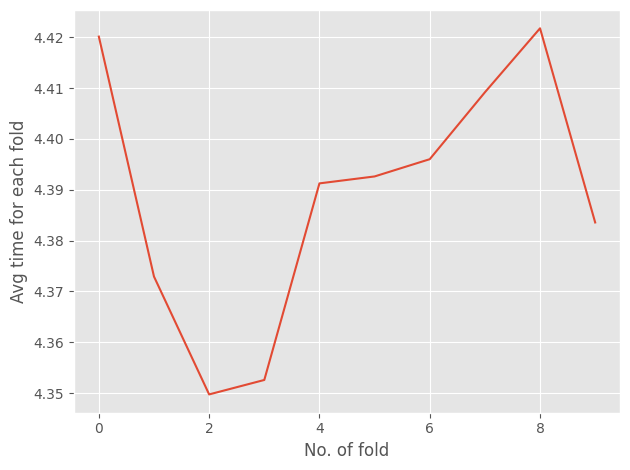

In [195]:
import matplotlib.pyplot as plt

times_lstm_n = np.zeros((10,100))
for i, row in enumerate(times_lstm):
    times_lstm_n[i, :len(row)] = row

times_lstm_n_n = np.mean(times_lstm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_lstm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("lstm times")
plt.show()

In [196]:
train_acc_lstm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_lstm):
    train_acc_lstm_n[i, :len(row)] = row
    
test_acc_lstm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_lstm):
    test_acc_lstm_n[i, :len(row)] = row
    
train_loss_lstm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_lstm):
    train_loss_lstm_n[i, :len(row)] = row
    
test_loss_lstm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_lstm):
    test_loss_lstm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_lstm_n = np.mean(train_acc_lstm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_lstm_n = np.mean(test_acc_lstm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_lstm_n = np.mean(train_loss_lstm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_lstm_n = np.mean(test_loss_lstm_n,axis=0)

In [197]:
data = [train_acc_lstm_n,test_acc_lstm_n,train_loss_lstm_n,test_loss_lstm_n]

df = pd.DataFrame(data)
df.to_csv('lstm_acc', index=False)
df = pd.read_csv('lstm_acc')

train_acc_lstm_n = df.iloc[0]
test_acc_lstm_n = df.iloc[1]
train_loss_lstm_n = df.iloc[2]
test_loss_lstm_n = df.iloc[3]


df_t = pd.DataFrame([times_lstm_n_n])
df_t.to_csv('lstm_times', index=False)
df_t = pd.read_csv('lstm_times')

times_lstm_n_n = df_t.iloc[0]

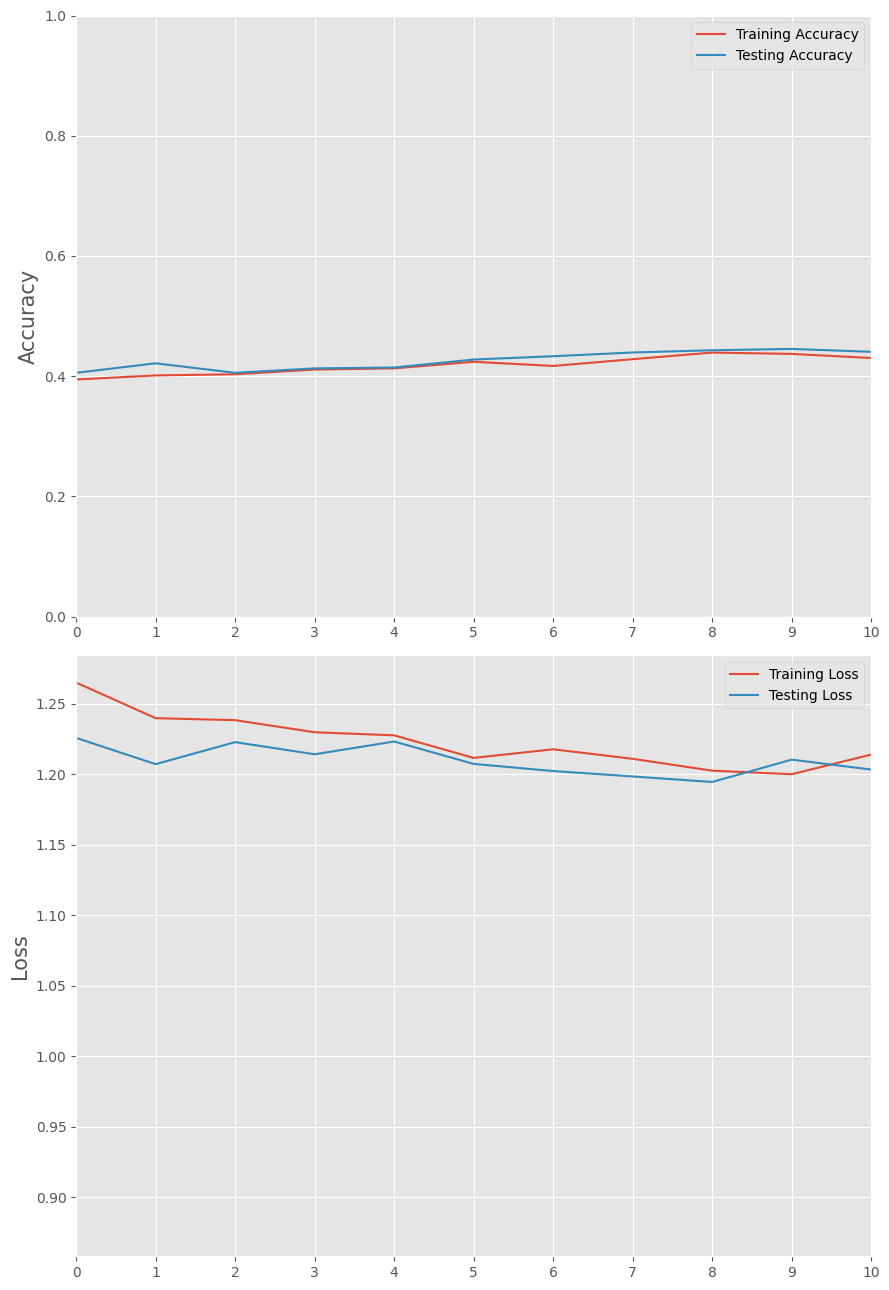

In [198]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_lstm_n, label='Training Accuracy')
axs[0].plot(test_acc_lstm_n, label='Testing Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_lstm_n, label='Training Loss')
axs[1].plot(test_loss_lstm_n, label='Testing Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("LSTM Training and Testing Loss")
plt.show()

In [199]:
np.array(scores_lstm).shape

(10, 302, 4)

In [200]:
np.array(y_test_all_lstm).shape

(10, 302)

In [201]:
y_pred_lstm = np.argmax(scores_lstm,axis=2)

In [202]:
y_pred_lstm.shape

(10, 302)

In [203]:
from sklearn.metrics import accuracy_score
acc_scores_lstm = []
for i in range(len(y_test_all_lstm)):
    acc_scores_lstm.append(accuracy_score(y_true = y_test_all_lstm[i],y_pred = y_pred_lstm[i]))

In [204]:
acc_scores_lstm

[0.4602649006622517,
 0.5132450331125827,
 0.4966887417218543,
 0.5231788079470199,
 0.5264900662251656,
 0.5860927152317881,
 0.5761589403973509,
 0.5331125827814569,
 0.5231788079470199,
 0.5562913907284768]

In [205]:
df_acc = pd.DataFrame([acc_scores_lstm])

df_acc.to_csv('lstm_accuracy', index=False)

df_acc = pd.read_csv('lstm_accuracy')

acc_scores_lstm = df_acc.iloc[0].values

In [206]:
y_test_all_n = np.array(y_test_all_lstm)

y_pred_lstm_n = y_pred_lstm.flatten()
y_test_all_n = y_test_all_n.flatten()

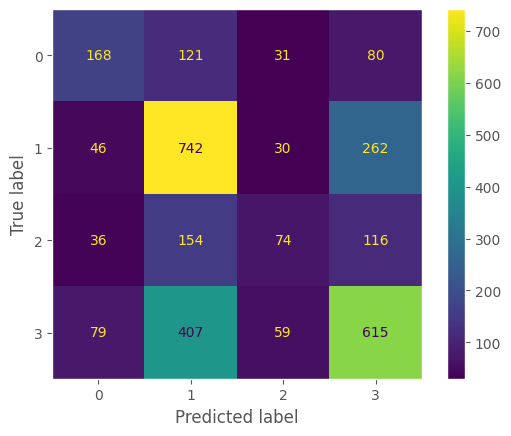

In [207]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n,y_pred_lstm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("LSTM")

plt.show()

In [208]:
import gc
gc.collect()

30195

In [209]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n,y_pred_lstm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.51      0.42      0.46       400
           1       0.52      0.69      0.59      1080
           2       0.38      0.19      0.26       380
           3       0.57      0.53      0.55      1160

    accuracy                           0.53      3020
   macro avg       0.50      0.46      0.47      3020
weighted avg       0.52      0.53      0.52      3020



# BISLTM

In [210]:
import gc
gc.collect()

0

In [211]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_bilstm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_bilstm.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [212]:
from keras.layers import LSTM

In [213]:
def create_model_bilstm():
    
    model_bilstm = keras.Sequential([

        keras.layers.Bidirectional(LSTM(100,return_sequences=True),input_shape=(X.shape[1],X.shape[2])),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(LSTM(100,return_sequences=True)),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(LSTM(100)),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(4,activation='softmax')

    ])
    
    return model_bilstm

In [214]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_bilstm = []
y_test_all_bilstm = []
train_acc_bilstm = []
test_acc_bilstm = []
train_loss_bilstm = []
test_loss_bilstm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_bilstm.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_bilstm = None
    model_bilstm = create_model_bilstm()
        
    model_bilstm.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_bilstm.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=64, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_bilstm.predict(X_test)
    
    scores_bilstm.append(x)
    train_acc_bilstm.append(history.history["accuracy"])
    test_acc_bilstm.append(history.history["val_accuracy"])
    train_loss_bilstm.append(history.history["loss"])
    test_loss_bilstm.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
39/39 [==============================] - 9s 148ms/step - loss: 1.2804 - accuracy: 0.3790 - val_loss: 1.2156 - val_accuracy: 0.4007 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 4s 114ms/step - loss: 1.2082 - accuracy: 0.4317 - val_loss: 1.2036 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 5s 128ms/step - loss: 1.1937 - accuracy: 0.4354 - val_loss: 1.1656 - val_accuracy: 0.4706 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 5s 128ms/step - loss: 1.1884 - accuracy: 0.4460 - val_loss: 1.1631 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 5s 117ms/step - loss: 1.1560 - accuracy: 0.4693 - val_loss: 1.1644 - val_accuracy: 0.4265 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 4s 111ms/step - loss: 1.1454 - accuracy: 0.4587 - val_loss: 1.2041 - val_accuracy: 0.4228 - lr: 0.0010
Epoch 7/100
39/39 [====================

Epoch 30/100
39/39 [==============================] - 4s 105ms/step - loss: 0.8877 - accuracy: 0.6104 - val_loss: 1.0527 - val_accuracy: 0.5331 - lr: 4.0000e-05
Epoch 31/100
39/39 [==============================] - 5s 120ms/step - loss: 0.8849 - accuracy: 0.6038 - val_loss: 1.0401 - val_accuracy: 0.5110 - lr: 4.0000e-05
Epoch 32/100
39/39 [==============================] - 4s 113ms/step - loss: 0.8790 - accuracy: 0.6177 - val_loss: 1.0441 - val_accuracy: 0.5184 - lr: 4.0000e-05
Epoch 33/100
39/39 [==============================] - 4s 113ms/step - loss: 0.8784 - accuracy: 0.6165 - val_loss: 1.0388 - val_accuracy: 0.5404 - lr: 4.0000e-05
Epoch 34/100
39/39 [==============================] - ETA: 0s - loss: 0.8664 - accuracy: 0.6124
Epoch 34: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 34: 4.31 seconds
39/39 [==============================] - 4s 111ms/step - loss: 0.8664 - accuracy: 0.6124 - val_loss: 1.0404 - val_accuracy: 0.5404 - lr: 4.0000e-

Epoch 58/100
39/39 [==============================] - 4s 116ms/step - loss: 0.8627 - accuracy: 0.6034 - val_loss: 1.0308 - val_accuracy: 0.5294 - lr: 1.2800e-08
Epoch 59/100
39/39 [==============================] - ETA: 0s - loss: 0.8556 - accuracy: 0.6169
Epoch 59: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 59: 4.59 seconds
39/39 [==============================] - 5s 118ms/step - loss: 0.8556 - accuracy: 0.6169 - val_loss: 1.0308 - val_accuracy: 0.5294 - lr: 1.2800e-08
Epoch 60/100
39/39 [==============================] - 5s 126ms/step - loss: 0.8506 - accuracy: 0.6316 - val_loss: 1.0308 - val_accuracy: 0.5294 - lr: 2.5600e-09
Epoch 61/100
39/39 [==============================] - 4s 108ms/step - loss: 0.8527 - accuracy: 0.6284 - val_loss: 1.0308 - val_accuracy: 0.5294 - lr: 2.5600e-09
Epoch 62/100
39/39 [==============================] - 5s 126ms/step - loss: 0.8524 - accuracy: 0.6325 - val_loss: 1.0308 - val_accuracy: 0.5294 - lr: 2.5600e

Epoch 86/100
39/39 [==============================] - 5s 125ms/step - loss: 0.8591 - accuracy: 0.6300 - val_loss: 1.0308 - val_accuracy: 0.5294 - lr: 8.1920e-13
Epoch 87/100
39/39 [==============================] - 5s 134ms/step - loss: 0.8552 - accuracy: 0.6239 - val_loss: 1.0308 - val_accuracy: 0.5294 - lr: 8.1920e-13
Epoch 88/100
39/39 [==============================] - 4s 116ms/step - loss: 0.8645 - accuracy: 0.6100 - val_loss: 1.0308 - val_accuracy: 0.5294 - lr: 8.1920e-13
Epoch 89/100
39/39 [==============================] - ETA: 0s - loss: 0.8644 - accuracy: 0.6165
Epoch 89: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 89: 4.62 seconds
39/39 [==============================] - 5s 118ms/step - loss: 0.8644 - accuracy: 0.6165 - val_loss: 1.0308 - val_accuracy: 0.5294 - lr: 8.1920e-13
Epoch 90/100
39/39 [==============================] - 5s 131ms/step - loss: 0.8557 - accuracy: 0.6226 - val_loss: 1.0308 - val_accuracy: 0.5294 - lr: 1.6384e

Epoch 14/100
39/39 [==============================] - 5s 117ms/step - loss: 1.0536 - accuracy: 0.5262 - val_loss: 1.1100 - val_accuracy: 0.4890 - lr: 2.0000e-04
Epoch 15/100
39/39 [==============================] - 5s 123ms/step - loss: 1.0258 - accuracy: 0.5437 - val_loss: 1.1363 - val_accuracy: 0.4669 - lr: 2.0000e-04
Epoch 16/100
39/39 [==============================] - 5s 119ms/step - loss: 1.0114 - accuracy: 0.5466 - val_loss: 1.1137 - val_accuracy: 0.4743 - lr: 2.0000e-04
Epoch 17/100
39/39 [==============================] - 5s 120ms/step - loss: 0.9991 - accuracy: 0.5564 - val_loss: 1.1571 - val_accuracy: 0.4449 - lr: 2.0000e-04
Epoch 18/100
39/39 [==============================] - 4s 108ms/step - loss: 1.0018 - accuracy: 0.5576 - val_loss: 1.1152 - val_accuracy: 0.4743 - lr: 2.0000e-04
Epoch 19/100
39/39 [==============================] - ETA: 0s - loss: 0.9890 - accuracy: 0.5597
Epoch 19: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 

Epoch 42/100
39/39 [==============================] - 5s 123ms/step - loss: 0.9385 - accuracy: 0.5908 - val_loss: 1.1152 - val_accuracy: 0.4743 - lr: 6.4000e-08
Epoch 43/100
39/39 [==============================] - 5s 120ms/step - loss: 0.9331 - accuracy: 0.5846 - val_loss: 1.1152 - val_accuracy: 0.4743 - lr: 6.4000e-08
Epoch 44/100
39/39 [==============================] - ETA: 0s - loss: 0.9380 - accuracy: 0.5830
Epoch 44: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 44: 4.89 seconds
39/39 [==============================] - 5s 126ms/step - loss: 0.9380 - accuracy: 0.5830 - val_loss: 1.1152 - val_accuracy: 0.4743 - lr: 6.4000e-08
Epoch 45/100
39/39 [==============================] - 5s 130ms/step - loss: 0.9337 - accuracy: 0.5805 - val_loss: 1.1152 - val_accuracy: 0.4743 - lr: 1.2800e-08
Epoch 46/100
39/39 [==============================] - 4s 114ms/step - loss: 0.9310 - accuracy: 0.5846 - val_loss: 1.1152 - val_accuracy: 0.4743 - lr: 1.2800e

Epoch 70/100
39/39 [==============================] - 5s 119ms/step - loss: 0.9321 - accuracy: 0.5879 - val_loss: 1.1152 - val_accuracy: 0.4743 - lr: 4.0960e-12
Epoch 71/100
39/39 [==============================] - 4s 116ms/step - loss: 0.9343 - accuracy: 0.5801 - val_loss: 1.1152 - val_accuracy: 0.4743 - lr: 4.0960e-12
Epoch 72/100
39/39 [==============================] - 5s 122ms/step - loss: 0.9319 - accuracy: 0.5936 - val_loss: 1.1152 - val_accuracy: 0.4743 - lr: 4.0960e-12
Epoch 73/100
39/39 [==============================] - 4s 106ms/step - loss: 0.9324 - accuracy: 0.5920 - val_loss: 1.1152 - val_accuracy: 0.4743 - lr: 4.0960e-12
Epoch 74/100
39/39 [==============================] - ETA: 0s - loss: 0.9284 - accuracy: 0.5793
Epoch 74: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 74: 4.70 seconds
39/39 [==============================] - 5s 121ms/step - loss: 0.9284 - accuracy: 0.5793 - val_loss: 1.1152 - val_accuracy: 0.4743 - lr: 4.0960e-

Epoch 98/100
39/39 [==============================] - 5s 122ms/step - loss: 0.9404 - accuracy: 0.5842 - val_loss: 1.1152 - val_accuracy: 0.4743 - lr: 1.3107e-15
Epoch 99/100
39/39 [==============================] - ETA: 0s - loss: 0.9351 - accuracy: 0.5801
Epoch 99: ReduceLROnPlateau reducing learning rate to 2.6214401285682084e-16.
Time taken for epoch 99: 4.92 seconds
39/39 [==============================] - 5s 127ms/step - loss: 0.9351 - accuracy: 0.5801 - val_loss: 1.1152 - val_accuracy: 0.4743 - lr: 1.3107e-15
Epoch 100/100
10/10 [==============================] - 2s 34ms/step
Training on fold 3/10...
Epoch 1/100
39/39 [==============================] - 9s 138ms/step - loss: 1.2743 - accuracy: 0.3994 - val_loss: 1.2546 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 4s 115ms/step - loss: 1.2174 - accuracy: 0.4280 - val_loss: 1.2049 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 4s 111ms/step - loss:

Epoch 27/100
39/39 [==============================] - 5s 125ms/step - loss: 0.9411 - accuracy: 0.5732 - val_loss: 1.1215 - val_accuracy: 0.5404 - lr: 2.0000e-04
Epoch 28/100
39/39 [==============================] - 5s 133ms/step - loss: 0.9145 - accuracy: 0.5912 - val_loss: 1.0581 - val_accuracy: 0.5404 - lr: 2.0000e-04
Epoch 29/100
39/39 [==============================] - 5s 126ms/step - loss: 0.8959 - accuracy: 0.6026 - val_loss: 1.0301 - val_accuracy: 0.5735 - lr: 2.0000e-04
Epoch 30/100
39/39 [==============================] - 5s 117ms/step - loss: 0.8724 - accuracy: 0.6120 - val_loss: 1.0650 - val_accuracy: 0.5184 - lr: 2.0000e-04
Epoch 31/100
39/39 [==============================] - 5s 122ms/step - loss: 0.8836 - accuracy: 0.6034 - val_loss: 1.0634 - val_accuracy: 0.5368 - lr: 2.0000e-04
Epoch 32/100
39/39 [==============================] - 5s 122ms/step - loss: 0.8545 - accuracy: 0.6137 - val_loss: 1.0260 - val_accuracy: 0.5662 - lr: 2.0000e-04
Epoch 33/100
39/39 [==============

Time taken for epoch 55: 4.71 seconds
39/39 [==============================] - 5s 121ms/step - loss: 0.6861 - accuracy: 0.7110 - val_loss: 0.9851 - val_accuracy: 0.6103 - lr: 8.0000e-06
Epoch 56/100
39/39 [==============================] - 4s 109ms/step - loss: 0.6874 - accuracy: 0.7118 - val_loss: 0.9852 - val_accuracy: 0.6176 - lr: 1.6000e-06
Epoch 57/100
39/39 [==============================] - 4s 113ms/step - loss: 0.6917 - accuracy: 0.7138 - val_loss: 0.9856 - val_accuracy: 0.6140 - lr: 1.6000e-06
Epoch 58/100
39/39 [==============================] - 4s 105ms/step - loss: 0.6879 - accuracy: 0.7093 - val_loss: 0.9867 - val_accuracy: 0.6176 - lr: 1.6000e-06
Epoch 59/100
39/39 [==============================] - 5s 118ms/step - loss: 0.6818 - accuracy: 0.7048 - val_loss: 0.9873 - val_accuracy: 0.6176 - lr: 1.6000e-06
Epoch 60/100
39/39 [==============================] - ETA: 0s - loss: 0.6912 - accuracy: 0.7040
Epoch 60: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-0

Epoch 11/100
39/39 [==============================] - 4s 108ms/step - loss: 1.0512 - accuracy: 0.5184 - val_loss: 1.0898 - val_accuracy: 0.5110 - lr: 2.0000e-04
Epoch 12/100
39/39 [==============================] - 5s 123ms/step - loss: 1.0444 - accuracy: 0.5192 - val_loss: 1.1040 - val_accuracy: 0.5294 - lr: 2.0000e-04
Epoch 13/100
39/39 [==============================] - 5s 130ms/step - loss: 1.0306 - accuracy: 0.5274 - val_loss: 1.1169 - val_accuracy: 0.5184 - lr: 2.0000e-04
Epoch 14/100
39/39 [==============================] - 4s 113ms/step - loss: 1.0367 - accuracy: 0.5298 - val_loss: 1.0719 - val_accuracy: 0.4816 - lr: 2.0000e-04
Epoch 15/100
39/39 [==============================] - ETA: 0s - loss: 1.0194 - accuracy: 0.5233
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 4.97 seconds
39/39 [==============================] - 5s 128ms/step - loss: 1.0194 - accuracy: 0.5233 - val_loss: 1.0818 - val_accuracy: 0.4926 - lr: 2.0000e

Epoch 67/100
39/39 [==============================] - 5s 127ms/step - loss: 0.9454 - accuracy: 0.5675 - val_loss: 1.0645 - val_accuracy: 0.5515 - lr: 1.0240e-10
Epoch 68/100
39/39 [==============================] - 6s 151ms/step - loss: 0.9409 - accuracy: 0.5695 - val_loss: 1.0645 - val_accuracy: 0.5515 - lr: 1.0240e-10
Epoch 69/100
39/39 [==============================] - 5s 135ms/step - loss: 0.9451 - accuracy: 0.5805 - val_loss: 1.0645 - val_accuracy: 0.5515 - lr: 1.0240e-10
Epoch 70/100
39/39 [==============================] - 6s 147ms/step - loss: 0.9511 - accuracy: 0.5654 - val_loss: 1.0645 - val_accuracy: 0.5515 - lr: 1.0240e-10
Epoch 71/100
39/39 [==============================] - ETA: 0s - loss: 0.9447 - accuracy: 0.5683
Epoch 71: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 71: 5.73 seconds
39/39 [==============================] - 6s 147ms/step - loss: 0.9447 - accuracy: 0.5683 - val_loss: 1.0645 - val_accuracy: 0.5515 - lr: 1.0240e

Epoch 95/100
39/39 [==============================] - 5s 118ms/step - loss: 0.9508 - accuracy: 0.5687 - val_loss: 1.0645 - val_accuracy: 0.5515 - lr: 3.2768e-14
Epoch 96/100
39/39 [==============================] - ETA: 0s - loss: 0.9414 - accuracy: 0.5736
Epoch 96: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 96: 4.48 seconds
39/39 [==============================] - 4s 115ms/step - loss: 0.9414 - accuracy: 0.5736 - val_loss: 1.0645 - val_accuracy: 0.5515 - lr: 3.2768e-14
Epoch 97/100
39/39 [==============================] - 5s 128ms/step - loss: 0.9436 - accuracy: 0.5646 - val_loss: 1.0645 - val_accuracy: 0.5515 - lr: 6.5536e-15
Epoch 98/100
39/39 [==============================] - 5s 121ms/step - loss: 0.9395 - accuracy: 0.5789 - val_loss: 1.0645 - val_accuracy: 0.5515 - lr: 6.5536e-15
Epoch 99/100
39/39 [==============================] - 4s 114ms/step - loss: 0.9418 - accuracy: 0.5728 - val_loss: 1.0645 - val_accuracy: 0.5515 - lr: 6.5536e-

Epoch 24/100
39/39 [==============================] - 5s 122ms/step - loss: 0.9625 - accuracy: 0.5736 - val_loss: 0.9710 - val_accuracy: 0.5515 - lr: 2.0000e-04
Epoch 25/100
39/39 [==============================] - 5s 116ms/step - loss: 0.9440 - accuracy: 0.5736 - val_loss: 0.9649 - val_accuracy: 0.5368 - lr: 2.0000e-04
Epoch 26/100
39/39 [==============================] - 4s 112ms/step - loss: 0.9270 - accuracy: 0.5781 - val_loss: 0.9736 - val_accuracy: 0.5588 - lr: 2.0000e-04
Epoch 27/100
39/39 [==============================] - 5s 118ms/step - loss: 0.9246 - accuracy: 0.5826 - val_loss: 0.9692 - val_accuracy: 0.5662 - lr: 2.0000e-04
Epoch 28/100
39/39 [==============================] - 5s 120ms/step - loss: 0.9170 - accuracy: 0.5924 - val_loss: 0.9768 - val_accuracy: 0.5699 - lr: 2.0000e-04
Epoch 29/100
39/39 [==============================] - 4s 106ms/step - loss: 0.9016 - accuracy: 0.6063 - val_loss: 0.9836 - val_accuracy: 0.5699 - lr: 2.0000e-04
Epoch 30/100
39/39 [==============

39/39 [==============================] - 5s 128ms/step - loss: 0.7960 - accuracy: 0.6529 - val_loss: 0.9647 - val_accuracy: 0.5699 - lr: 3.2000e-07
Epoch 53/100
39/39 [==============================] - 5s 125ms/step - loss: 0.7922 - accuracy: 0.6509 - val_loss: 0.9645 - val_accuracy: 0.5699 - lr: 3.2000e-07
Epoch 54/100
39/39 [==============================] - 4s 108ms/step - loss: 0.7949 - accuracy: 0.6525 - val_loss: 0.9644 - val_accuracy: 0.5699 - lr: 3.2000e-07
Epoch 55/100
39/39 [==============================] - ETA: 0s - loss: 0.7865 - accuracy: 0.6570
Epoch 55: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 55: 4.70 seconds
39/39 [==============================] - 5s 121ms/step - loss: 0.7865 - accuracy: 0.6570 - val_loss: 0.9643 - val_accuracy: 0.5699 - lr: 3.2000e-07
Epoch 56/100
39/39 [==============================] - 5s 131ms/step - loss: 0.7921 - accuracy: 0.6562 - val_loss: 0.9643 - val_accuracy: 0.5699 - lr: 6.4000e-08
Epoch 57/1

Epoch 80/100
39/39 [==============================] - ETA: 0s - loss: 0.7931 - accuracy: 0.6578
Epoch 80: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 80: 4.93 seconds
39/39 [==============================] - 5s 127ms/step - loss: 0.7931 - accuracy: 0.6578 - val_loss: 0.9642 - val_accuracy: 0.5699 - lr: 1.0240e-10
Epoch 81/100
39/39 [==============================] - 4s 107ms/step - loss: 0.7883 - accuracy: 0.6537 - val_loss: 0.9642 - val_accuracy: 0.5699 - lr: 2.0480e-11
Epoch 82/100
39/39 [==============================] - 4s 112ms/step - loss: 0.7919 - accuracy: 0.6529 - val_loss: 0.9642 - val_accuracy: 0.5699 - lr: 2.0480e-11
Epoch 83/100
39/39 [==============================] - 4s 113ms/step - loss: 0.7997 - accuracy: 0.6431 - val_loss: 0.9642 - val_accuracy: 0.5699 - lr: 2.0480e-11
Epoch 84/100
39/39 [==============================] - 4s 111ms/step - loss: 0.7908 - accuracy: 0.6504 - val_loss: 0.9642 - val_accuracy: 0.5699 - lr: 2.0480e

Epoch 8/100
39/39 [==============================] - 4s 112ms/step - loss: 1.1283 - accuracy: 0.4767 - val_loss: 1.1294 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 9/100
39/39 [==============================] - 5s 119ms/step - loss: 1.1123 - accuracy: 0.4853 - val_loss: 1.1639 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 10/100
39/39 [==============================] - 5s 117ms/step - loss: 1.1155 - accuracy: 0.4943 - val_loss: 1.1590 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 11/100
39/39 [==============================] - 4s 115ms/step - loss: 1.1179 - accuracy: 0.4869 - val_loss: 1.1746 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 12/100
39/39 [==============================] - ETA: 0s - loss: 1.1167 - accuracy: 0.4943
Epoch 12: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 12: 4.38 seconds
39/39 [==============================] - 4s 113ms/step - loss: 1.1167 - accuracy: 0.4943 - val_loss: 1.1065 - val_accuracy: 0.4779 - lr: 0.0010
Epoch 13/100
39/39

Epoch 64/100
39/39 [==============================] - 5s 122ms/step - loss: 0.9600 - accuracy: 0.5589 - val_loss: 1.0623 - val_accuracy: 0.5000 - lr: 1.0240e-10
Epoch 65/100
39/39 [==============================] - 5s 116ms/step - loss: 0.9623 - accuracy: 0.5724 - val_loss: 1.0623 - val_accuracy: 0.5000 - lr: 1.0240e-10
Epoch 66/100
39/39 [==============================] - 4s 107ms/step - loss: 0.9555 - accuracy: 0.5781 - val_loss: 1.0623 - val_accuracy: 0.5000 - lr: 1.0240e-10
Epoch 67/100
39/39 [==============================] - 5s 123ms/step - loss: 0.9674 - accuracy: 0.5670 - val_loss: 1.0623 - val_accuracy: 0.5000 - lr: 1.0240e-10
Epoch 68/100
39/39 [==============================] - ETA: 0s - loss: 0.9554 - accuracy: 0.5793
Epoch 68: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 68: 4.62 seconds
39/39 [==============================] - 5s 119ms/step - loss: 0.9554 - accuracy: 0.5793 - val_loss: 1.0623 - val_accuracy: 0.5000 - lr: 1.0240e

Epoch 92/100
39/39 [==============================] - 4s 114ms/step - loss: 0.9658 - accuracy: 0.5728 - val_loss: 1.0623 - val_accuracy: 0.5000 - lr: 3.2768e-14
Epoch 93/100
39/39 [==============================] - ETA: 0s - loss: 0.9575 - accuracy: 0.5744
Epoch 93: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 93: 4.66 seconds
39/39 [==============================] - 5s 120ms/step - loss: 0.9575 - accuracy: 0.5744 - val_loss: 1.0623 - val_accuracy: 0.5000 - lr: 3.2768e-14
Epoch 94/100
39/39 [==============================] - 5s 117ms/step - loss: 0.9550 - accuracy: 0.5793 - val_loss: 1.0623 - val_accuracy: 0.5000 - lr: 6.5536e-15
Epoch 95/100
39/39 [==============================] - 5s 120ms/step - loss: 0.9554 - accuracy: 0.5720 - val_loss: 1.0623 - val_accuracy: 0.5000 - lr: 6.5536e-15
Epoch 96/100
39/39 [==============================] - 5s 130ms/step - loss: 0.9625 - accuracy: 0.5736 - val_loss: 1.0623 - val_accuracy: 0.5000 - lr: 6.5536e-

Epoch 20/100
39/39 [==============================] - ETA: 0s - loss: 1.0398 - accuracy: 0.5380
Epoch 20: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 20: 4.93 seconds
39/39 [==============================] - 5s 127ms/step - loss: 1.0398 - accuracy: 0.5380 - val_loss: 1.0589 - val_accuracy: 0.4669 - lr: 4.0000e-05
Epoch 21/100
39/39 [==============================] - 5s 131ms/step - loss: 1.0251 - accuracy: 0.5368 - val_loss: 1.0581 - val_accuracy: 0.4816 - lr: 8.0000e-06
Epoch 22/100
39/39 [==============================] - 5s 119ms/step - loss: 1.0320 - accuracy: 0.5303 - val_loss: 1.0625 - val_accuracy: 0.4816 - lr: 8.0000e-06
Epoch 23/100
39/39 [==============================] - 5s 120ms/step - loss: 1.0269 - accuracy: 0.5360 - val_loss: 1.0612 - val_accuracy: 0.4890 - lr: 8.0000e-06
Epoch 24/100
39/39 [==============================] - 5s 128ms/step - loss: 1.0298 - accuracy: 0.5348 - val_loss: 1.0592 - val_accuracy: 0.4963 - lr: 8.0000e-

Epoch 48/100
39/39 [==============================] - 5s 126ms/step - loss: 1.0233 - accuracy: 0.5384 - val_loss: 1.0606 - val_accuracy: 0.4890 - lr: 1.2800e-08
Epoch 49/100
39/39 [==============================] - ETA: 0s - loss: 1.0297 - accuracy: 0.5356
Epoch 49: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 49: 5.08 seconds
39/39 [==============================] - 5s 131ms/step - loss: 1.0297 - accuracy: 0.5356 - val_loss: 1.0605 - val_accuracy: 0.4890 - lr: 1.2800e-08
Epoch 50/100
39/39 [==============================] - 4s 115ms/step - loss: 1.0210 - accuracy: 0.5413 - val_loss: 1.0605 - val_accuracy: 0.4890 - lr: 2.5600e-09
Epoch 51/100
39/39 [==============================] - 5s 122ms/step - loss: 1.0213 - accuracy: 0.5388 - val_loss: 1.0605 - val_accuracy: 0.4890 - lr: 2.5600e-09
Epoch 52/100
39/39 [==============================] - 5s 128ms/step - loss: 1.0245 - accuracy: 0.5368 - val_loss: 1.0605 - val_accuracy: 0.4890 - lr: 2.5600e

Epoch 76/100
39/39 [==============================] - 5s 133ms/step - loss: 1.0207 - accuracy: 0.5384 - val_loss: 1.0605 - val_accuracy: 0.4890 - lr: 8.1920e-13
Epoch 77/100
39/39 [==============================] - 4s 115ms/step - loss: 1.0211 - accuracy: 0.5372 - val_loss: 1.0605 - val_accuracy: 0.4890 - lr: 8.1920e-13
Epoch 78/100
39/39 [==============================] - 5s 122ms/step - loss: 1.0201 - accuracy: 0.5470 - val_loss: 1.0605 - val_accuracy: 0.4890 - lr: 8.1920e-13
Epoch 79/100
39/39 [==============================] - ETA: 0s - loss: 1.0272 - accuracy: 0.5356
Epoch 79: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 79: 4.89 seconds
39/39 [==============================] - 5s 126ms/step - loss: 1.0272 - accuracy: 0.5356 - val_loss: 1.0605 - val_accuracy: 0.4890 - lr: 8.1920e-13
Epoch 80/100
39/39 [==============================] - 5s 127ms/step - loss: 1.0230 - accuracy: 0.5323 - val_loss: 1.0605 - val_accuracy: 0.4890 - lr: 1.6384e

Epoch 4/100
39/39 [==============================] - 5s 123ms/step - loss: 1.1880 - accuracy: 0.4399 - val_loss: 1.1510 - val_accuracy: 0.4963 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 5s 126ms/step - loss: 1.1530 - accuracy: 0.4849 - val_loss: 1.1358 - val_accuracy: 0.5074 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 4s 103ms/step - loss: 1.1467 - accuracy: 0.4706 - val_loss: 1.1858 - val_accuracy: 0.5037 - lr: 0.0010
Epoch 7/100
39/39 [==============================] - 5s 119ms/step - loss: 1.1369 - accuracy: 0.4738 - val_loss: 1.1614 - val_accuracy: 0.4890 - lr: 0.0010
Epoch 8/100
39/39 [==============================] - 5s 117ms/step - loss: 1.1347 - accuracy: 0.4771 - val_loss: 1.1123 - val_accuracy: 0.5074 - lr: 0.0010
Epoch 9/100
39/39 [==============================] - 4s 110ms/step - loss: 1.1224 - accuracy: 0.4881 - val_loss: 1.1066 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 10/100
39/39 [==============================] - 4s 116ms/s

Epoch 33/100
39/39 [==============================] - 4s 110ms/step - loss: 0.8955 - accuracy: 0.6026 - val_loss: 0.9834 - val_accuracy: 0.5515 - lr: 4.0000e-05
Epoch 34/100
39/39 [==============================] - ETA: 0s - loss: 0.8880 - accuracy: 0.6030
Epoch 34: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 34: 4.56 seconds
39/39 [==============================] - 5s 118ms/step - loss: 0.8880 - accuracy: 0.6030 - val_loss: 0.9826 - val_accuracy: 0.5441 - lr: 4.0000e-05
Epoch 35/100
39/39 [==============================] - 5s 120ms/step - loss: 0.8776 - accuracy: 0.6043 - val_loss: 0.9785 - val_accuracy: 0.5515 - lr: 8.0000e-06
Epoch 36/100
39/39 [==============================] - 5s 122ms/step - loss: 0.8833 - accuracy: 0.6014 - val_loss: 0.9787 - val_accuracy: 0.5515 - lr: 8.0000e-06
Epoch 37/100
39/39 [==============================] - 4s 108ms/step - loss: 0.8725 - accuracy: 0.6108 - val_loss: 0.9782 - val_accuracy: 0.5478 - lr: 8.0000e-

Epoch 61/100
39/39 [==============================] - 4s 115ms/step - loss: 0.8629 - accuracy: 0.6194 - val_loss: 0.9762 - val_accuracy: 0.5625 - lr: 2.5600e-09
Epoch 62/100
39/39 [==============================] - 5s 124ms/step - loss: 0.8742 - accuracy: 0.6055 - val_loss: 0.9762 - val_accuracy: 0.5625 - lr: 2.5600e-09
Epoch 63/100
39/39 [==============================] - 5s 124ms/step - loss: 0.8728 - accuracy: 0.6067 - val_loss: 0.9762 - val_accuracy: 0.5625 - lr: 2.5600e-09
Epoch 64/100
39/39 [==============================] - ETA: 0s - loss: 0.8632 - accuracy: 0.6128
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 4.56 seconds
39/39 [==============================] - 5s 117ms/step - loss: 0.8632 - accuracy: 0.6128 - val_loss: 0.9762 - val_accuracy: 0.5625 - lr: 2.5600e-09
Epoch 65/100
39/39 [==============================] - 5s 119ms/step - loss: 0.8714 - accuracy: 0.6132 - val_loss: 0.9762 - val_accuracy: 0.5625 - lr: 5.1200e-10

Epoch 89/100
39/39 [==============================] - ETA: 0s - loss: 0.8689 - accuracy: 0.6182
Epoch 89: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 89: 4.30 seconds
39/39 [==============================] - 4s 111ms/step - loss: 0.8689 - accuracy: 0.6182 - val_loss: 0.9762 - val_accuracy: 0.5625 - lr: 8.1920e-13
Epoch 90/100
39/39 [==============================] - 4s 109ms/step - loss: 0.8696 - accuracy: 0.6112 - val_loss: 0.9762 - val_accuracy: 0.5625 - lr: 1.6384e-13
Epoch 91/100
39/39 [==============================] - 4s 110ms/step - loss: 0.8637 - accuracy: 0.6169 - val_loss: 0.9762 - val_accuracy: 0.5625 - lr: 1.6384e-13
Epoch 92/100
39/39 [==============================] - 4s 111ms/step - loss: 0.8743 - accuracy: 0.6051 - val_loss: 0.9762 - val_accuracy: 0.5625 - lr: 1.6384e-13
Epoch 93/100
39/39 [==============================] - 5s 117ms/step - loss: 0.8823 - accuracy: 0.5940 - val_loss: 0.9762 - val_accuracy: 0.5625 - lr: 1.6384e

39/39 [==============================] - 5s 125ms/step - loss: 1.0095 - accuracy: 0.5388 - val_loss: 0.9970 - val_accuracy: 0.5515 - lr: 2.0000e-04
Epoch 18/100
39/39 [==============================] - 5s 123ms/step - loss: 0.9841 - accuracy: 0.5478 - val_loss: 1.0070 - val_accuracy: 0.5294 - lr: 2.0000e-04
Epoch 19/100
39/39 [==============================] - 4s 114ms/step - loss: 0.9732 - accuracy: 0.5613 - val_loss: 0.9998 - val_accuracy: 0.5588 - lr: 2.0000e-04
Epoch 20/100
39/39 [==============================] - 5s 117ms/step - loss: 0.9643 - accuracy: 0.5581 - val_loss: 0.9816 - val_accuracy: 0.5184 - lr: 2.0000e-04
Epoch 21/100
39/39 [==============================] - 5s 121ms/step - loss: 0.9517 - accuracy: 0.5646 - val_loss: 0.9634 - val_accuracy: 0.5846 - lr: 2.0000e-04
Epoch 22/100
39/39 [==============================] - 4s 107ms/step - loss: 0.9440 - accuracy: 0.5703 - val_loss: 0.9863 - val_accuracy: 0.5404 - lr: 2.0000e-04
Epoch 23/100
39/39 [===========================

Epoch 73/100
39/39 [==============================] - 5s 117ms/step - loss: 0.8439 - accuracy: 0.6276 - val_loss: 0.9373 - val_accuracy: 0.5625 - lr: 2.0480e-11
Epoch 74/100
39/39 [==============================] - 4s 108ms/step - loss: 0.8477 - accuracy: 0.6026 - val_loss: 0.9373 - val_accuracy: 0.5625 - lr: 2.0480e-11
Epoch 75/100
39/39 [==============================] - 6s 146ms/step - loss: 0.8506 - accuracy: 0.6173 - val_loss: 0.9373 - val_accuracy: 0.5625 - lr: 2.0480e-11
Epoch 76/100
39/39 [==============================] - ETA: 0s - loss: 0.8474 - accuracy: 0.6177
Epoch 76: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 76: 5.24 seconds
39/39 [==============================] - 5s 135ms/step - loss: 0.8474 - accuracy: 0.6177 - val_loss: 0.9373 - val_accuracy: 0.5625 - lr: 2.0480e-11
Epoch 77/100
39/39 [==============================] - 4s 115ms/step - loss: 0.8531 - accuracy: 0.6137 - val_loss: 0.9373 - val_accuracy: 0.5625 - lr: 4.0960e-

10/10 [==============================] - 2s 33ms/step
Training on fold 10/10...
Epoch 1/100
39/39 [==============================] - 12s 157ms/step - loss: 1.2694 - accuracy: 0.3982 - val_loss: 1.2073 - val_accuracy: 0.4081 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 4s 114ms/step - loss: 1.2123 - accuracy: 0.4297 - val_loss: 1.1903 - val_accuracy: 0.4522 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 5s 133ms/step - loss: 1.1954 - accuracy: 0.4419 - val_loss: 1.2819 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 5s 123ms/step - loss: 1.2036 - accuracy: 0.4464 - val_loss: 1.1588 - val_accuracy: 0.4669 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 5s 117ms/step - loss: 1.2035 - accuracy: 0.4374 - val_loss: 1.1794 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 4s 113ms/step - loss: 1.1756 - accuracy: 0.4620 - val_loss: 1.1778 - val_accuracy: 0.4

Epoch 30/100
39/39 [==============================] - 5s 124ms/step - loss: 0.9737 - accuracy: 0.5724 - val_loss: 1.0323 - val_accuracy: 0.5588 - lr: 4.0000e-05
Epoch 31/100
39/39 [==============================] - 5s 125ms/step - loss: 0.9726 - accuracy: 0.5805 - val_loss: 1.0413 - val_accuracy: 0.5478 - lr: 4.0000e-05
Epoch 32/100
39/39 [==============================] - 4s 115ms/step - loss: 0.9671 - accuracy: 0.5736 - val_loss: 1.0391 - val_accuracy: 0.5441 - lr: 4.0000e-05
Epoch 33/100
39/39 [==============================] - ETA: 0s - loss: 0.9680 - accuracy: 0.5752
Epoch 33: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 33: 4.22 seconds
39/39 [==============================] - 4s 109ms/step - loss: 0.9680 - accuracy: 0.5752 - val_loss: 1.0420 - val_accuracy: 0.5331 - lr: 4.0000e-05
Epoch 34/100
39/39 [==============================] - 5s 121ms/step - loss: 0.9496 - accuracy: 0.5879 - val_loss: 1.0410 - val_accuracy: 0.5478 - lr: 8.0000e-

Epoch 58/100
39/39 [==============================] - ETA: 0s - loss: 0.9497 - accuracy: 0.5932
Epoch 58: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 58: 4.66 seconds
39/39 [==============================] - 5s 120ms/step - loss: 0.9497 - accuracy: 0.5932 - val_loss: 1.0345 - val_accuracy: 0.5551 - lr: 1.2800e-08
Epoch 59/100
39/39 [==============================] - 5s 123ms/step - loss: 0.9491 - accuracy: 0.5883 - val_loss: 1.0345 - val_accuracy: 0.5551 - lr: 2.5600e-09
Epoch 60/100
39/39 [==============================] - 4s 114ms/step - loss: 0.9441 - accuracy: 0.5920 - val_loss: 1.0345 - val_accuracy: 0.5551 - lr: 2.5600e-09
Epoch 61/100
39/39 [==============================] - 4s 115ms/step - loss: 0.9506 - accuracy: 0.5846 - val_loss: 1.0345 - val_accuracy: 0.5551 - lr: 2.5600e-09
Epoch 62/100
39/39 [==============================] - 5s 117ms/step - loss: 0.9481 - accuracy: 0.5854 - val_loss: 1.0345 - val_accuracy: 0.5551 - lr: 2.5600e

Epoch 86/100
39/39 [==============================] - 5s 129ms/step - loss: 0.9499 - accuracy: 0.5891 - val_loss: 1.0345 - val_accuracy: 0.5551 - lr: 8.1920e-13
Epoch 87/100
39/39 [==============================] - 5s 117ms/step - loss: 0.9443 - accuracy: 0.5944 - val_loss: 1.0345 - val_accuracy: 0.5551 - lr: 8.1920e-13
Epoch 88/100
39/39 [==============================] - ETA: 0s - loss: 0.9580 - accuracy: 0.5838
Epoch 88: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 88: 4.58 seconds
39/39 [==============================] - 5s 118ms/step - loss: 0.9580 - accuracy: 0.5838 - val_loss: 1.0345 - val_accuracy: 0.5551 - lr: 8.1920e-13
Epoch 89/100
39/39 [==============================] - 5s 131ms/step - loss: 0.9511 - accuracy: 0.5924 - val_loss: 1.0345 - val_accuracy: 0.5551 - lr: 1.6384e-13
Epoch 90/100
39/39 [==============================] - 5s 131ms/step - loss: 0.9415 - accuracy: 0.5846 - val_loss: 1.0345 - val_accuracy: 0.5551 - lr: 1.6384e

In [215]:
import gc
gc.collect()

0

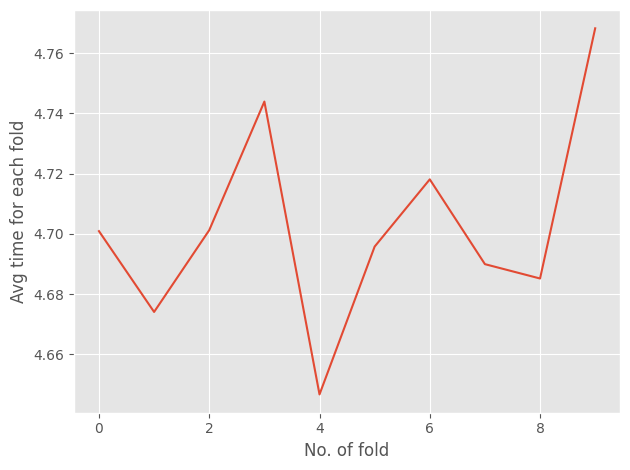

In [216]:
import matplotlib.pyplot as plt

times_bilstm_n = np.zeros((10,100))
for i, row in enumerate(times_bilstm):
    times_bilstm_n[i, :len(row)] = row

times_bilstm_n_n = np.mean(times_bilstm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_bilstm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("bilstm times")
plt.show()

In [217]:
train_acc_bilstm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_bilstm):
    train_acc_bilstm_n[i, :len(row)] = row
    
test_acc_bilstm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_bilstm):
    test_acc_bilstm_n[i, :len(row)] = row
    
train_loss_bilstm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_bilstm):
    train_loss_bilstm_n[i, :len(row)] = row
    
test_loss_bilstm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_bilstm):
    test_loss_bilstm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_bilstm_n = np.mean(train_acc_bilstm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_bilstm_n = np.mean(test_acc_bilstm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_bilstm_n = np.mean(train_loss_bilstm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_bilstm_n = np.mean(test_loss_bilstm_n,axis=0)

In [218]:
train_acc_bilstm_n

array([0.3920278 , 0.42673753, 0.44456255, 0.44632052, 0.46026165,
       0.46831562, 0.46868356, 0.47686018, 0.48008994, 0.49435814,
       0.49333606, 0.49914146, 0.50126738, 0.5116108 , 0.51749795,
       0.52297629, 0.53389208, 0.53560916, 0.54672935, 0.54558463,
       0.55061326, 0.55584627, 0.56349142, 0.56819297, 0.56623058,
       0.56488144, 0.57432543, 0.57628781, 0.57767784, 0.58520032,
       0.58458709, 0.58851185, 0.59260017, 0.59235486, 0.59693377,
       0.59677024, 0.60106296, 0.59963205, 0.60114474, 0.60278004,
       0.60126737, 0.60441536, 0.60167621, 0.60633687, 0.60278006,
       0.60335241, 0.60895339, 0.60870811, 0.60351593, 0.60384302,
       0.60764513, 0.60768602, 0.60834014, 0.60735895, 0.60666395,
       0.60584629, 0.60731808, 0.60511038, 0.60294358, 0.60707276,
       0.60813572, 0.60707278, 0.60789043, 0.60425184, 0.60952575,
       0.60854456, 0.6048242 , 0.60760425, 0.6079722 , 0.60449715,
       0.60551921, 0.60887164, 0.6082175 , 0.60408831, 0.60674

In [219]:
data = [train_acc_bilstm_n,test_acc_bilstm_n,train_loss_bilstm_n,test_loss_bilstm_n]

df = pd.DataFrame(data)
df.to_csv('bilstm_acc', index=False)
df = pd.read_csv('bilstm_acc')

train_acc_bilstm_n = df.iloc[0]
test_acc_bilstm_n = df.iloc[1]
train_loss_bilstm_n = df.iloc[2]
test_loss_bilstm_n = df.iloc[3]


df_t = pd.DataFrame([times_bilstm_n_n])
df_t.to_csv('bilstm_times', index=False)
df_t = pd.read_csv('bilstm_times')

times_bilstm_n_n = df_t.iloc[0]

In [220]:
train_acc_bilstm_n

0     0.392028
1     0.426738
2     0.444563
3     0.446321
4     0.460262
        ...   
95    0.605233
96    0.603843
97    0.608422
98    0.605560
99    0.605724
Name: 0, Length: 100, dtype: float64

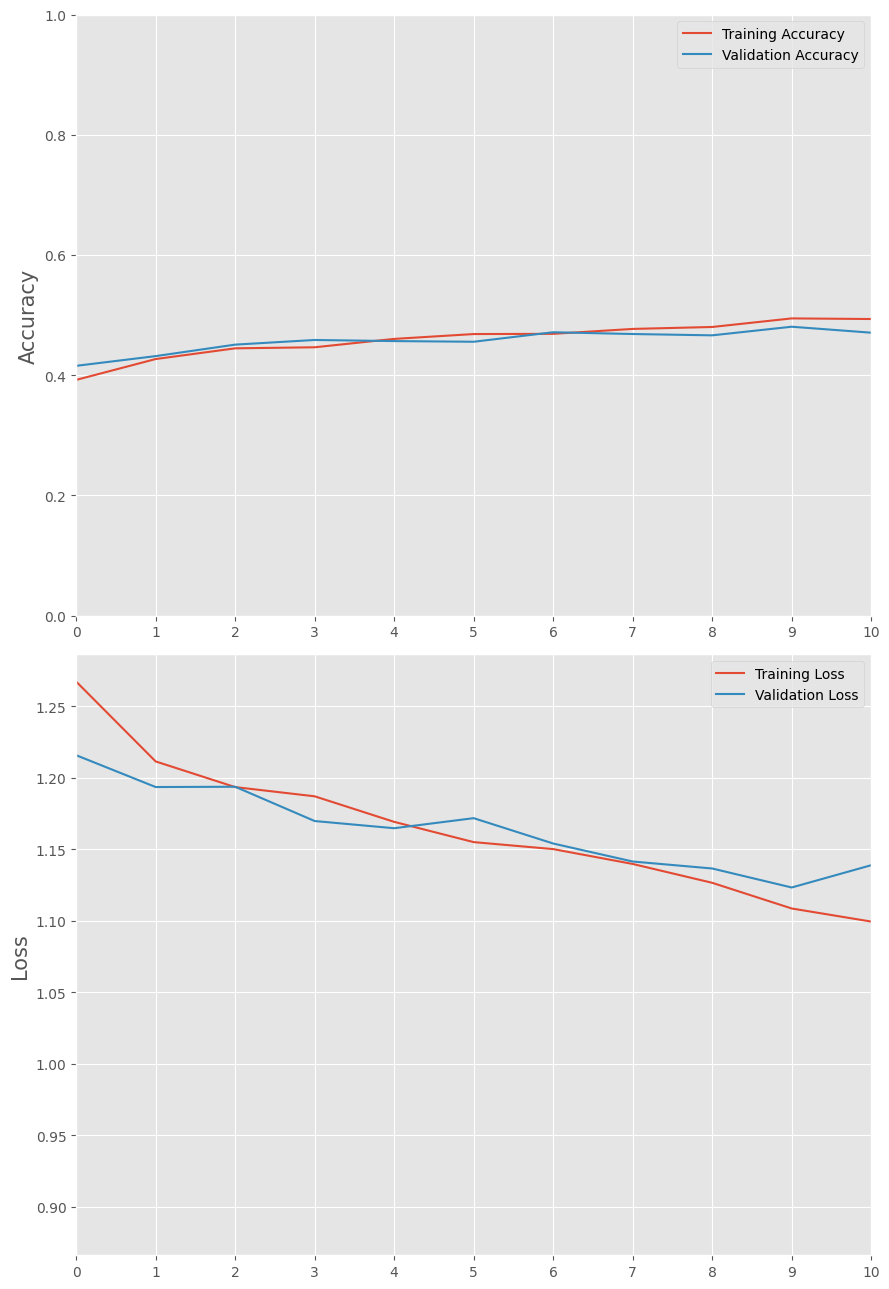

In [221]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_bilstm_n, label='Training Accuracy')
axs[0].plot(test_acc_bilstm_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_bilstm_n, label='Training Loss')
axs[1].plot(test_loss_bilstm_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("BILSTM Training and Testing Loss")
plt.show()

In [222]:
np.array(scores_bilstm).shape

(10, 302, 4)

In [223]:
np.array(y_test_all_bilstm).shape

(10, 302)

In [224]:
y_pred_bilstm = np.argmax(scores_bilstm,axis=2)

In [225]:
y_pred_bilstm.shape

(10, 302)

In [226]:
from sklearn.metrics import accuracy_score
acc_scores_bilstm = []
for i in range(len(y_test_all_bilstm)):
    acc_scores_bilstm.append(accuracy_score(y_true = y_test_all_bilstm[i],y_pred = y_pred_bilstm[i]))

In [227]:
acc_scores_bilstm

[0.5397350993377483,
 0.5198675496688742,
 0.5629139072847682,
 0.543046357615894,
 0.5596026490066225,
 0.5132450331125827,
 0.5364238410596026,
 0.5066225165562914,
 0.5364238410596026,
 0.5198675496688742]

In [228]:
df_acc = pd.DataFrame([acc_scores_bilstm])

df_acc.to_csv('bilstm_accuracy', index=False)

df_acc = pd.read_csv('bilstm_accuracy')

acc_scores_bilstm = df_acc.iloc[0].values

In [229]:
y_test_all_n = np.array(y_test_all_bilstm)

y_pred_bilstm_n = y_pred_bilstm.flatten()
y_test_all_n = y_test_all_n.flatten()

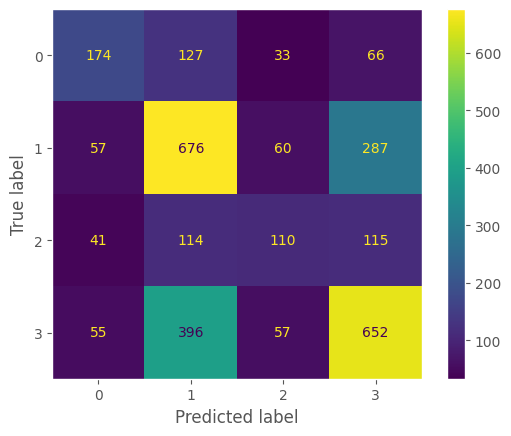

In [230]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n,y_pred_bilstm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("BISLTM")

plt.show()

In [231]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n,y_pred_bilstm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.53      0.43      0.48       400
           1       0.51      0.63      0.56      1080
           2       0.42      0.29      0.34       380
           3       0.58      0.56      0.57      1160

    accuracy                           0.53      3020
   macro avg       0.51      0.48      0.49      3020
weighted avg       0.53      0.53      0.53      3020



# BRNN

In [232]:
import gc
gc.collect()

30283

In [233]:
# X,y = load_data(DATA_PATH)

In [234]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, SimpleRNN, Dense
from tensorflow.keras.models import Sequential

In [235]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_birnn = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_birnn.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [236]:
def create_model_birnn():

    model_birnn = keras.Sequential([

        keras.layers.Bidirectional(SimpleRNN(256,return_sequences=True),input_shape=(X.shape[1],X.shape[2])),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(SimpleRNN(128,return_sequences=True)),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(SimpleRNN(64)),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(units = 4,activation='softmax')

    ])
    return model_birnn

In [237]:
import gc
gc.collect()

5

In [238]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_birnn = []
y_test_all_birnn = []
train_acc_birnn = []
test_acc_birnn = []
train_loss_birnn = []
test_loss_birnn = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_birnn.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_birnn = None
    model_birnn = create_model_birnn()
        
    model_birnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_birnn.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_birnn.predict(X_test)
    
    scores_birnn.append(x)
    train_acc_birnn.append(history.history["accuracy"])
    test_acc_birnn.append(history.history["val_accuracy"])
    train_loss_birnn.append(history.history["loss"])
    test_loss_birnn.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 72s 912ms/step - loss: 1.8195 - accuracy: 0.3209 - val_loss: 1.2949 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 69s 903ms/step - loss: 1.6797 - accuracy: 0.3226 - val_loss: 1.3549 - val_accuracy: 0.3235 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 67s 866ms/step - loss: 1.5450 - accuracy: 0.3361 - val_loss: 1.4427 - val_accuracy: 0.3235 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 68s 879ms/step - loss: 1.5026 - accuracy: 0.3496 - val_loss: 1.2715 - val_accuracy: 0.4007 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 71s 917ms/step - loss: 1.4258 - accuracy: 0.3545 - val_loss: 1.2930 - val_accuracy: 0.4007 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 68s 876ms/step - loss: 1.3647 - accuracy: 0.3622 - val_loss: 1.3642 - val_accuracy: 0.4007 - lr: 0.0010
Epoch 7/100
77/77 [==============

Epoch 30/100
77/77 [==============================] - 68s 885ms/step - loss: 1.2113 - accuracy: 0.4007 - val_loss: 1.2063 - val_accuracy: 0.4632 - lr: 4.0000e-05
Epoch 31/100
77/77 [==============================] - 70s 911ms/step - loss: 1.2121 - accuracy: 0.4088 - val_loss: 1.2055 - val_accuracy: 0.4596 - lr: 4.0000e-05
Epoch 32/100
77/77 [==============================] - 69s 895ms/step - loss: 1.2114 - accuracy: 0.4096 - val_loss: 1.2049 - val_accuracy: 0.4632 - lr: 4.0000e-05
Epoch 33/100
77/77 [==============================] - 70s 909ms/step - loss: 1.2135 - accuracy: 0.4113 - val_loss: 1.2103 - val_accuracy: 0.4375 - lr: 4.0000e-05
Epoch 34/100
77/77 [==============================] - 66s 863ms/step - loss: 1.2131 - accuracy: 0.4088 - val_loss: 1.2049 - val_accuracy: 0.4485 - lr: 4.0000e-05
Epoch 35/100
77/77 [==============================] - 70s 906ms/step - loss: 1.2164 - accuracy: 0.4101 - val_loss: 1.2062 - val_accuracy: 0.4449 - lr: 4.0000e-05
Epoch 36/100
77/77 [========

Epoch 58/100
77/77 [==============================] - 67s 870ms/step - loss: 1.2185 - accuracy: 0.4109 - val_loss: 1.2054 - val_accuracy: 0.4522 - lr: 6.4000e-08
Epoch 59/100
77/77 [==============================] - 69s 900ms/step - loss: 1.2100 - accuracy: 0.4191 - val_loss: 1.2054 - val_accuracy: 0.4522 - lr: 6.4000e-08
Epoch 60/100
77/77 [==============================] - 68s 882ms/step - loss: 1.2085 - accuracy: 0.4248 - val_loss: 1.2054 - val_accuracy: 0.4522 - lr: 6.4000e-08
Epoch 61/100
77/77 [==============================] - 69s 893ms/step - loss: 1.2110 - accuracy: 0.4076 - val_loss: 1.2054 - val_accuracy: 0.4485 - lr: 6.4000e-08
Epoch 62/100
77/77 [==============================] - 67s 878ms/step - loss: 1.2027 - accuracy: 0.4068 - val_loss: 1.2054 - val_accuracy: 0.4449 - lr: 6.4000e-08
Epoch 63/100
77/77 [==============================] - 68s 885ms/step - loss: 1.2054 - accuracy: 0.4162 - val_loss: 1.2054 - val_accuracy: 0.4485 - lr: 6.4000e-08
Epoch 64/100
77/77 [========

Epoch 86/100
77/77 [==============================] - 69s 892ms/step - loss: 1.2096 - accuracy: 0.4031 - val_loss: 1.2054 - val_accuracy: 0.4485 - lr: 1.0240e-10
Epoch 87/100
77/77 [==============================] - 68s 878ms/step - loss: 1.2067 - accuracy: 0.4199 - val_loss: 1.2054 - val_accuracy: 0.4485 - lr: 1.0240e-10
Epoch 88/100
77/77 [==============================] - 68s 885ms/step - loss: 1.2090 - accuracy: 0.4199 - val_loss: 1.2054 - val_accuracy: 0.4485 - lr: 1.0240e-10
Epoch 89/100
77/77 [==============================] - 69s 894ms/step - loss: 1.2119 - accuracy: 0.4129 - val_loss: 1.2054 - val_accuracy: 0.4485 - lr: 1.0240e-10
Epoch 90/100
77/77 [==============================] - 69s 898ms/step - loss: 1.2095 - accuracy: 0.4133 - val_loss: 1.2054 - val_accuracy: 0.4485 - lr: 1.0240e-10
Epoch 91/100
77/77 [==============================] - 68s 891ms/step - loss: 1.2124 - accuracy: 0.4125 - val_loss: 1.2054 - val_accuracy: 0.4485 - lr: 1.0240e-10
Epoch 92/100
77/77 [========

Time taken for epoch 14: 68.37 seconds
77/77 [==============================] - 68s 889ms/step - loss: 1.2699 - accuracy: 0.3810 - val_loss: 1.1854 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 67s 870ms/step - loss: 1.2481 - accuracy: 0.3839 - val_loss: 1.1845 - val_accuracy: 0.3897 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 70s 903ms/step - loss: 1.2504 - accuracy: 0.3724 - val_loss: 1.1835 - val_accuracy: 0.3897 - lr: 2.0000e-04
Epoch 17/100
77/77 [==============================] - 67s 875ms/step - loss: 1.2483 - accuracy: 0.3692 - val_loss: 1.1862 - val_accuracy: 0.3934 - lr: 2.0000e-04
Epoch 18/100
77/77 [==============================] - 69s 897ms/step - loss: 1.2438 - accuracy: 0.3855 - val_loss: 1.1858 - val_accuracy: 0.4081 - lr: 2.0000e-04
Epoch 19/100
77/77 [==============================] - 68s 881ms/step - loss: 1.2469 - accuracy: 0.3823 - val_loss: 1.1852 - val_accuracy: 0.4154 - lr: 2.0000e-04
Epoch 

Epoch 43/100
77/77 [==============================] - 69s 893ms/step - loss: 1.2323 - accuracy: 0.3843 - val_loss: 1.1819 - val_accuracy: 0.4375 - lr: 1.6000e-06
Epoch 44/100
77/77 [==============================] - 69s 896ms/step - loss: 1.2335 - accuracy: 0.3831 - val_loss: 1.1818 - val_accuracy: 0.4228 - lr: 1.6000e-06
Epoch 45/100
77/77 [==============================] - 67s 870ms/step - loss: 1.2330 - accuracy: 0.3863 - val_loss: 1.1818 - val_accuracy: 0.4375 - lr: 1.6000e-06
Epoch 46/100
77/77 [==============================] - 70s 908ms/step - loss: 1.2262 - accuracy: 0.3806 - val_loss: 1.1817 - val_accuracy: 0.4338 - lr: 1.6000e-06
Epoch 47/100
77/77 [==============================] - 70s 910ms/step - loss: 1.2424 - accuracy: 0.3847 - val_loss: 1.1817 - val_accuracy: 0.4338 - lr: 1.6000e-06
Epoch 48/100
77/77 [==============================] - ETA: 0s - loss: 1.2296 - accuracy: 0.3949
Epoch 48: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for ep

Epoch 71/100
77/77 [==============================] - 68s 888ms/step - loss: 1.2308 - accuracy: 0.3827 - val_loss: 1.1818 - val_accuracy: 0.4338 - lr: 2.5600e-09
Epoch 72/100
77/77 [==============================] - 69s 893ms/step - loss: 1.2255 - accuracy: 0.3929 - val_loss: 1.1818 - val_accuracy: 0.4338 - lr: 2.5600e-09
Epoch 73/100
77/77 [==============================] - 68s 883ms/step - loss: 1.2283 - accuracy: 0.4002 - val_loss: 1.1818 - val_accuracy: 0.4338 - lr: 2.5600e-09
Epoch 74/100
77/77 [==============================] - 70s 905ms/step - loss: 1.2282 - accuracy: 0.3839 - val_loss: 1.1818 - val_accuracy: 0.4338 - lr: 2.5600e-09
Epoch 75/100
77/77 [==============================] - 71s 916ms/step - loss: 1.2320 - accuracy: 0.3962 - val_loss: 1.1818 - val_accuracy: 0.4338 - lr: 2.5600e-09
Epoch 76/100
77/77 [==============================] - ETA: 0s - loss: 1.2363 - accuracy: 0.3810
Epoch 76: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoc

Epoch 99/100
77/77 [==============================] - 66s 862ms/step - loss: 1.2242 - accuracy: 0.3761 - val_loss: 1.1818 - val_accuracy: 0.4338 - lr: 4.0960e-12
Epoch 100/100
10/10 [==============================] - 1s 124ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 73s 923ms/step - loss: 1.8003 - accuracy: 0.3201 - val_loss: 1.3517 - val_accuracy: 0.4044 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 69s 893ms/step - loss: 1.6107 - accuracy: 0.3393 - val_loss: 1.2248 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 69s 890ms/step - loss: 1.5109 - accuracy: 0.3451 - val_loss: 1.3014 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 70s 909ms/step - loss: 1.4978 - accuracy: 0.3381 - val_loss: 1.3112 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 67s 877ms/step - loss: 1.4416 - accuracy: 0.3459 - val_loss: 1.

77/77 [==============================] - 71s 925ms/step - loss: 1.2867 - accuracy: 0.3573 - val_loss: 1.1989 - val_accuracy: 0.3897 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 69s 894ms/step - loss: 1.2711 - accuracy: 0.3880 - val_loss: 1.1988 - val_accuracy: 0.3860 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - 69s 901ms/step - loss: 1.2779 - accuracy: 0.3745 - val_loss: 1.1977 - val_accuracy: 0.3934 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 69s 891ms/step - loss: 1.2689 - accuracy: 0.3757 - val_loss: 1.1979 - val_accuracy: 0.3860 - lr: 8.0000e-06
Epoch 31/100
77/77 [==============================] - 70s 908ms/step - loss: 1.2850 - accuracy: 0.3839 - val_loss: 1.1983 - val_accuracy: 0.3787 - lr: 8.0000e-06
Epoch 32/100
77/77 [==============================] - 69s 894ms/step - loss: 1.2776 - accuracy: 0.3757 - val_loss: 1.1977 - val_accuracy: 0.3750 - lr: 8.0000e-06
Epoch 33/100
77/77 [=====================

Epoch 55/100
77/77 [==============================] - 66s 865ms/step - loss: 1.2748 - accuracy: 0.3655 - val_loss: 1.1971 - val_accuracy: 0.3750 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 68s 888ms/step - loss: 1.2702 - accuracy: 0.3863 - val_loss: 1.1971 - val_accuracy: 0.3750 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - 68s 884ms/step - loss: 1.2937 - accuracy: 0.3720 - val_loss: 1.1971 - val_accuracy: 0.3750 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 69s 897ms/step - loss: 1.2843 - accuracy: 0.3716 - val_loss: 1.1971 - val_accuracy: 0.3750 - lr: 1.2800e-08
Epoch 59/100
77/77 [==============================] - 67s 867ms/step - loss: 1.2822 - accuracy: 0.3675 - val_loss: 1.1971 - val_accuracy: 0.3750 - lr: 1.2800e-08
Epoch 60/100
77/77 [==============================] - 68s 886ms/step - loss: 1.2732 - accuracy: 0.3798 - val_loss: 1.1971 - val_accuracy: 0.3750 - lr: 1.2800e-08
Epoch 61/100
77/77 [========

Epoch 83/100
77/77 [==============================] - 66s 864ms/step - loss: 1.2814 - accuracy: 0.3733 - val_loss: 1.1971 - val_accuracy: 0.3750 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 70s 906ms/step - loss: 1.2623 - accuracy: 0.3745 - val_loss: 1.1971 - val_accuracy: 0.3750 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - 69s 903ms/step - loss: 1.2837 - accuracy: 0.3614 - val_loss: 1.1971 - val_accuracy: 0.3750 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 70s 914ms/step - loss: 1.2812 - accuracy: 0.3606 - val_loss: 1.1971 - val_accuracy: 0.3750 - lr: 2.0480e-11
Epoch 87/100
77/77 [==============================] - 68s 880ms/step - loss: 1.2578 - accuracy: 0.3933 - val_loss: 1.1971 - val_accuracy: 0.3750 - lr: 2.0480e-11
Epoch 88/100
77/77 [==============================] - 67s 869ms/step - loss: 1.2726 - accuracy: 0.3737 - val_loss: 1.1971 - val_accuracy: 0.3750 - lr: 2.0480e-11
Epoch 89/100
77/77 [========

77/77 [==============================] - 69s 902ms/step - loss: 1.2969 - accuracy: 0.3684 - val_loss: 1.2857 - val_accuracy: 0.3750 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 70s 914ms/step - loss: 1.2974 - accuracy: 0.3532 - val_loss: 1.3061 - val_accuracy: 0.3824 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 71s 926ms/step - loss: 1.2854 - accuracy: 0.3712 - val_loss: 1.2755 - val_accuracy: 0.3640 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 70s 912ms/step - loss: 1.2843 - accuracy: 0.3839 - val_loss: 1.2990 - val_accuracy: 0.3566 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.2845 - accuracy: 0.3896
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 67.67 seconds
77/77 [==============================] - 68s 880ms/step - loss: 1.2845 - accuracy: 0.3896 - val_loss: 1.2835 - val_accuracy: 0.3676 - lr: 2.0000e-04
Epo

Epoch 39/100
77/77 [==============================] - 71s 927ms/step - loss: 1.2676 - accuracy: 0.3888 - val_loss: 1.2775 - val_accuracy: 0.3824 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 68s 886ms/step - loss: 1.2617 - accuracy: 0.3786 - val_loss: 1.2774 - val_accuracy: 0.3824 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 71s 917ms/step - loss: 1.2641 - accuracy: 0.3966 - val_loss: 1.2774 - val_accuracy: 0.3824 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 68s 887ms/step - loss: 1.2689 - accuracy: 0.3884 - val_loss: 1.2775 - val_accuracy: 0.3824 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.2615 - accuracy: 0.3794
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 70.43 seconds
77/77 [==============================] - 70s 913ms/step - loss: 1.2615 - accuracy: 0.3794 - val_loss: 1.2774 - val_accuracy: 0.3824 - lr: 3.

Epoch 67/100
77/77 [==============================] - 77s 997ms/step - loss: 1.2645 - accuracy: 0.3892 - val_loss: 1.2775 - val_accuracy: 0.3824 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 64s 833ms/step - loss: 1.2585 - accuracy: 0.3827 - val_loss: 1.2775 - val_accuracy: 0.3824 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 66s 864ms/step - loss: 1.2541 - accuracy: 0.3949 - val_loss: 1.2775 - val_accuracy: 0.3824 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 69s 902ms/step - loss: 1.2681 - accuracy: 0.3810 - val_loss: 1.2775 - val_accuracy: 0.3824 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.2612 - accuracy: 0.3921
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 69.62 seconds
77/77 [==============================] - 70s 907ms/step - loss: 1.2612 - accuracy: 0.3921 - val_loss: 1.2775 - val_accuracy: 0.3824 - lr: 5

Epoch 95/100
77/77 [==============================] - 70s 906ms/step - loss: 1.2699 - accuracy: 0.3876 - val_loss: 1.2775 - val_accuracy: 0.3824 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 70s 910ms/step - loss: 1.2661 - accuracy: 0.3872 - val_loss: 1.2775 - val_accuracy: 0.3824 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 70s 912ms/step - loss: 1.2641 - accuracy: 0.3835 - val_loss: 1.2775 - val_accuracy: 0.3824 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 70s 905ms/step - loss: 1.2535 - accuracy: 0.4023 - val_loss: 1.2775 - val_accuracy: 0.3824 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.2671 - accuracy: 0.3794
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 70.57 seconds
77/77 [==============================] - 71s 918ms/step - loss: 1.2671 - accuracy: 0.3794 - val_loss: 1.2775 - val_accuracy: 0.3824 - lr: 8

77/77 [==============================] - 69s 900ms/step - loss: 1.2558 - accuracy: 0.3827 - val_loss: 1.1504 - val_accuracy: 0.4375 - lr: 4.0000e-05
Epoch 24/100
77/77 [==============================] - 71s 918ms/step - loss: 1.2554 - accuracy: 0.3810 - val_loss: 1.1477 - val_accuracy: 0.4154 - lr: 4.0000e-05
Epoch 25/100
77/77 [==============================] - 71s 921ms/step - loss: 1.2590 - accuracy: 0.3794 - val_loss: 1.1482 - val_accuracy: 0.4154 - lr: 4.0000e-05
Epoch 26/100
77/77 [==============================] - 71s 924ms/step - loss: 1.2557 - accuracy: 0.3757 - val_loss: 1.1482 - val_accuracy: 0.4154 - lr: 4.0000e-05
Epoch 27/100
77/77 [==============================] - 69s 891ms/step - loss: 1.2596 - accuracy: 0.3733 - val_loss: 1.1460 - val_accuracy: 0.4228 - lr: 4.0000e-05
Epoch 28/100
77/77 [==============================] - ETA: 0s - loss: 1.2611 - accuracy: 0.3733
Epoch 28: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 28: 69.87

Epoch 51/100
77/77 [==============================] - 71s 919ms/step - loss: 1.2552 - accuracy: 0.3827 - val_loss: 1.1455 - val_accuracy: 0.4338 - lr: 6.4000e-08
Epoch 52/100
77/77 [==============================] - 71s 918ms/step - loss: 1.2549 - accuracy: 0.3888 - val_loss: 1.1455 - val_accuracy: 0.4338 - lr: 6.4000e-08
Epoch 53/100
77/77 [==============================] - 72s 937ms/step - loss: 1.2562 - accuracy: 0.3823 - val_loss: 1.1455 - val_accuracy: 0.4338 - lr: 6.4000e-08
Epoch 54/100
77/77 [==============================] - 72s 935ms/step - loss: 1.2583 - accuracy: 0.3745 - val_loss: 1.1456 - val_accuracy: 0.4338 - lr: 6.4000e-08
Epoch 55/100
77/77 [==============================] - 74s 954ms/step - loss: 1.2518 - accuracy: 0.3933 - val_loss: 1.1456 - val_accuracy: 0.4338 - lr: 6.4000e-08
Epoch 56/100
77/77 [==============================] - ETA: 0s - loss: 1.2472 - accuracy: 0.3814
Epoch 56: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for e

Epoch 79/100
77/77 [==============================] - 71s 926ms/step - loss: 1.2540 - accuracy: 0.3806 - val_loss: 1.1456 - val_accuracy: 0.4338 - lr: 1.0240e-10
Epoch 80/100
77/77 [==============================] - 72s 929ms/step - loss: 1.2538 - accuracy: 0.4027 - val_loss: 1.1456 - val_accuracy: 0.4338 - lr: 1.0240e-10
Epoch 81/100
77/77 [==============================] - 71s 921ms/step - loss: 1.2549 - accuracy: 0.3765 - val_loss: 1.1456 - val_accuracy: 0.4338 - lr: 1.0240e-10
Epoch 82/100
77/77 [==============================] - 71s 918ms/step - loss: 1.2486 - accuracy: 0.3859 - val_loss: 1.1456 - val_accuracy: 0.4338 - lr: 1.0240e-10
Epoch 83/100
77/77 [==============================] - 69s 895ms/step - loss: 1.2539 - accuracy: 0.3729 - val_loss: 1.1456 - val_accuracy: 0.4338 - lr: 1.0240e-10
Epoch 84/100
77/77 [==============================] - ETA: 0s - loss: 1.2546 - accuracy: 0.3798
Epoch 84: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for e

Epoch 7/100
77/77 [==============================] - 66s 858ms/step - loss: 1.3684 - accuracy: 0.3610 - val_loss: 1.3300 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 66s 856ms/step - loss: 1.3254 - accuracy: 0.3590 - val_loss: 1.3309 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 69s 900ms/step - loss: 1.3119 - accuracy: 0.3606 - val_loss: 1.2794 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 72s 939ms/step - loss: 1.2838 - accuracy: 0.3729 - val_loss: 1.2904 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 71s 918ms/step - loss: 1.2959 - accuracy: 0.3598 - val_loss: 1.3028 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 71s 914ms/step - loss: 1.2854 - accuracy: 0.3618 - val_loss: 1.2810 - val_accuracy: 0.3346 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 7

Epoch 63/100
77/77 [==============================] - 72s 939ms/step - loss: 1.2198 - accuracy: 0.4035 - val_loss: 1.2516 - val_accuracy: 0.3566 - lr: 1.2800e-08
Epoch 64/100
77/77 [==============================] - 69s 903ms/step - loss: 1.2155 - accuracy: 0.3978 - val_loss: 1.2516 - val_accuracy: 0.3566 - lr: 1.2800e-08
Epoch 65/100
77/77 [==============================] - 68s 883ms/step - loss: 1.2187 - accuracy: 0.4019 - val_loss: 1.2516 - val_accuracy: 0.3566 - lr: 1.2800e-08
Epoch 66/100
77/77 [==============================] - ETA: 0s - loss: 1.2179 - accuracy: 0.4146
Epoch 66: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 66: 67.55 seconds
77/77 [==============================] - 68s 880ms/step - loss: 1.2179 - accuracy: 0.4146 - val_loss: 1.2516 - val_accuracy: 0.3566 - lr: 1.2800e-08
Epoch 67/100
77/77 [==============================] - 69s 898ms/step - loss: 1.2258 - accuracy: 0.3917 - val_loss: 1.2516 - val_accuracy: 0.3566 - lr: 2

Epoch 91/100
77/77 [==============================] - 67s 871ms/step - loss: 1.2304 - accuracy: 0.3855 - val_loss: 1.2516 - val_accuracy: 0.3566 - lr: 2.0480e-11
Epoch 92/100
77/77 [==============================] - 66s 861ms/step - loss: 1.2132 - accuracy: 0.4015 - val_loss: 1.2516 - val_accuracy: 0.3566 - lr: 2.0480e-11
Epoch 93/100
77/77 [==============================] - 70s 915ms/step - loss: 1.2249 - accuracy: 0.4002 - val_loss: 1.2516 - val_accuracy: 0.3566 - lr: 2.0480e-11
Epoch 94/100
77/77 [==============================] - ETA: 0s - loss: 1.2173 - accuracy: 0.3994
Epoch 94: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 94: 68.72 seconds
77/77 [==============================] - 69s 895ms/step - loss: 1.2173 - accuracy: 0.3994 - val_loss: 1.2516 - val_accuracy: 0.3566 - lr: 2.0480e-11
Epoch 95/100
77/77 [==============================] - 69s 893ms/step - loss: 1.2251 - accuracy: 0.3904 - val_loss: 1.2516 - val_accuracy: 0.3566 - lr: 4.

Epoch 20/100
77/77 [==============================] - 67s 870ms/step - loss: 1.2470 - accuracy: 0.3847 - val_loss: 1.2208 - val_accuracy: 0.3382 - lr: 2.0000e-04
Epoch 21/100
77/77 [==============================] - 68s 880ms/step - loss: 1.2538 - accuracy: 0.4002 - val_loss: 1.2302 - val_accuracy: 0.3309 - lr: 2.0000e-04
Epoch 22/100
77/77 [==============================] - 67s 873ms/step - loss: 1.2545 - accuracy: 0.3847 - val_loss: 1.2290 - val_accuracy: 0.3493 - lr: 2.0000e-04
Epoch 23/100
77/77 [==============================] - ETA: 0s - loss: 1.2500 - accuracy: 0.3892
Epoch 23: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 23: 66.33 seconds
77/77 [==============================] - 66s 862ms/step - loss: 1.2500 - accuracy: 0.3892 - val_loss: 1.2275 - val_accuracy: 0.3309 - lr: 2.0000e-04
Epoch 24/100
77/77 [==============================] - 63s 817ms/step - loss: 1.2463 - accuracy: 0.3778 - val_loss: 1.2236 - val_accuracy: 0.3750 - lr: 4

Epoch 48/100
77/77 [==============================] - 65s 846ms/step - loss: 1.2375 - accuracy: 0.3696 - val_loss: 1.2226 - val_accuracy: 0.3419 - lr: 3.2000e-07
Epoch 49/100
77/77 [==============================] - 68s 887ms/step - loss: 1.2382 - accuracy: 0.3917 - val_loss: 1.2226 - val_accuracy: 0.3419 - lr: 3.2000e-07
Epoch 50/100
77/77 [==============================] - 65s 844ms/step - loss: 1.2385 - accuracy: 0.3904 - val_loss: 1.2226 - val_accuracy: 0.3419 - lr: 3.2000e-07
Epoch 51/100
77/77 [==============================] - ETA: 0s - loss: 1.2385 - accuracy: 0.3818
Epoch 51: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 51: 65.80 seconds
77/77 [==============================] - 66s 856ms/step - loss: 1.2385 - accuracy: 0.3818 - val_loss: 1.2225 - val_accuracy: 0.3419 - lr: 3.2000e-07
Epoch 52/100
77/77 [==============================] - 65s 838ms/step - loss: 1.2287 - accuracy: 0.3917 - val_loss: 1.2225 - val_accuracy: 0.3419 - lr: 6.

Epoch 76/100
77/77 [==============================] - 67s 875ms/step - loss: 1.2373 - accuracy: 0.3900 - val_loss: 1.2225 - val_accuracy: 0.3419 - lr: 5.1200e-10
Epoch 77/100
77/77 [==============================] - 65s 845ms/step - loss: 1.2414 - accuracy: 0.3949 - val_loss: 1.2225 - val_accuracy: 0.3419 - lr: 5.1200e-10
Epoch 78/100
77/77 [==============================] - 65s 850ms/step - loss: 1.2397 - accuracy: 0.3733 - val_loss: 1.2225 - val_accuracy: 0.3419 - lr: 5.1200e-10
Epoch 79/100
77/77 [==============================] - ETA: 0s - loss: 1.2378 - accuracy: 0.3978
Epoch 79: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 79: 62.00 seconds
77/77 [==============================] - 62s 805ms/step - loss: 1.2378 - accuracy: 0.3978 - val_loss: 1.2225 - val_accuracy: 0.3419 - lr: 5.1200e-10
Epoch 80/100
77/77 [==============================] - 68s 880ms/step - loss: 1.2366 - accuracy: 0.3880 - val_loss: 1.2225 - val_accuracy: 0.3419 - lr: 1

Epoch 4/100
77/77 [==============================] - 72s 932ms/step - loss: 1.4762 - accuracy: 0.3483 - val_loss: 1.3157 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 68s 889ms/step - loss: 1.4328 - accuracy: 0.3414 - val_loss: 1.3288 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 69s 897ms/step - loss: 1.3835 - accuracy: 0.3565 - val_loss: 1.3178 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 69s 902ms/step - loss: 1.3603 - accuracy: 0.3455 - val_loss: 1.3215 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 72s 938ms/step - loss: 1.3312 - accuracy: 0.3716 - val_loss: 1.3002 - val_accuracy: 0.3713 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 69s 892ms/step - loss: 1.3252 - accuracy: 0.3471 - val_loss: 1.3177 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 68s 

Epoch 33/100
77/77 [==============================] - ETA: 0s - loss: 1.2185 - accuracy: 0.4039
Epoch 33: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 33: 69.26 seconds
77/77 [==============================] - 69s 902ms/step - loss: 1.2185 - accuracy: 0.4039 - val_loss: 1.2894 - val_accuracy: 0.4007 - lr: 2.0000e-04
Epoch 34/100
77/77 [==============================] - 70s 914ms/step - loss: 1.2169 - accuracy: 0.3994 - val_loss: 1.2889 - val_accuracy: 0.3897 - lr: 4.0000e-05
Epoch 35/100
77/77 [==============================] - 72s 938ms/step - loss: 1.2113 - accuracy: 0.4015 - val_loss: 1.2823 - val_accuracy: 0.3824 - lr: 4.0000e-05
Epoch 36/100
77/77 [==============================] - 69s 890ms/step - loss: 1.2103 - accuracy: 0.4072 - val_loss: 1.2884 - val_accuracy: 0.3860 - lr: 4.0000e-05
Epoch 37/100
77/77 [==============================] - 70s 912ms/step - loss: 1.2150 - accuracy: 0.4060 - val_loss: 1.2874 - val_accuracy: 0.3934 - lr: 4

Epoch 61/100
77/77 [==============================] - ETA: 0s - loss: 1.2057 - accuracy: 0.4227
Epoch 61: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 61: 68.52 seconds
77/77 [==============================] - 69s 888ms/step - loss: 1.2057 - accuracy: 0.4227 - val_loss: 1.2944 - val_accuracy: 0.3860 - lr: 3.2000e-07
Epoch 62/100
77/77 [==============================] - 69s 892ms/step - loss: 1.2108 - accuracy: 0.4170 - val_loss: 1.2944 - val_accuracy: 0.3860 - lr: 6.4000e-08
Epoch 63/100
77/77 [==============================] - 69s 903ms/step - loss: 1.2081 - accuracy: 0.4195 - val_loss: 1.2944 - val_accuracy: 0.3860 - lr: 6.4000e-08
Epoch 64/100
77/77 [==============================] - 69s 899ms/step - loss: 1.2117 - accuracy: 0.3945 - val_loss: 1.2944 - val_accuracy: 0.3860 - lr: 6.4000e-08
Epoch 65/100
77/77 [==============================] - 71s 920ms/step - loss: 1.2127 - accuracy: 0.4146 - val_loss: 1.2944 - val_accuracy: 0.3860 - lr: 6.

Epoch 89/100
77/77 [==============================] - ETA: 0s - loss: 1.2061 - accuracy: 0.4178
Epoch 89: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 89: 67.81 seconds
77/77 [==============================] - 68s 880ms/step - loss: 1.2061 - accuracy: 0.4178 - val_loss: 1.2944 - val_accuracy: 0.3860 - lr: 5.1200e-10
Epoch 90/100
77/77 [==============================] - 71s 925ms/step - loss: 1.2128 - accuracy: 0.4162 - val_loss: 1.2944 - val_accuracy: 0.3860 - lr: 1.0240e-10
Epoch 91/100
77/77 [==============================] - 71s 924ms/step - loss: 1.2126 - accuracy: 0.4223 - val_loss: 1.2944 - val_accuracy: 0.3860 - lr: 1.0240e-10
Epoch 92/100
77/77 [==============================] - 70s 913ms/step - loss: 1.2088 - accuracy: 0.4076 - val_loss: 1.2944 - val_accuracy: 0.3860 - lr: 1.0240e-10
Epoch 93/100
77/77 [==============================] - 70s 911ms/step - loss: 1.2057 - accuracy: 0.4191 - val_loss: 1.2944 - val_accuracy: 0.3860 - lr: 1

77/77 [==============================] - 69s 897ms/step - loss: 1.2594 - accuracy: 0.3913 - val_loss: 1.2319 - val_accuracy: 0.4118 - lr: 2.0000e-04
Epoch 18/100
77/77 [==============================] - 70s 908ms/step - loss: 1.2601 - accuracy: 0.3855 - val_loss: 1.2513 - val_accuracy: 0.3566 - lr: 2.0000e-04
Epoch 19/100
77/77 [==============================] - ETA: 0s - loss: 1.2678 - accuracy: 0.3872
Epoch 19: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 19: 70.91 seconds
77/77 [==============================] - 71s 922ms/step - loss: 1.2678 - accuracy: 0.3872 - val_loss: 1.2486 - val_accuracy: 0.3493 - lr: 2.0000e-04
Epoch 20/100
77/77 [==============================] - 70s 908ms/step - loss: 1.2508 - accuracy: 0.3823 - val_loss: 1.2361 - val_accuracy: 0.3676 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 70s 906ms/step - loss: 1.2461 - accuracy: 0.3929 - val_loss: 1.2339 - val_accuracy: 0.3640 - lr: 4.0000e-05
Epo

Epoch 45/100
77/77 [==============================] - 69s 896ms/step - loss: 1.2421 - accuracy: 0.3929 - val_loss: 1.2321 - val_accuracy: 0.3640 - lr: 3.2000e-07
Epoch 46/100
77/77 [==============================] - 71s 925ms/step - loss: 1.2447 - accuracy: 0.3814 - val_loss: 1.2321 - val_accuracy: 0.3640 - lr: 3.2000e-07
Epoch 47/100
77/77 [==============================] - ETA: 0s - loss: 1.2490 - accuracy: 0.3863
Epoch 47: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 47: 67.92 seconds
77/77 [==============================] - 68s 881ms/step - loss: 1.2490 - accuracy: 0.3863 - val_loss: 1.2321 - val_accuracy: 0.3640 - lr: 3.2000e-07
Epoch 48/100
77/77 [==============================] - 71s 928ms/step - loss: 1.2487 - accuracy: 0.3892 - val_loss: 1.2321 - val_accuracy: 0.3640 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 68s 886ms/step - loss: 1.2455 - accuracy: 0.3839 - val_loss: 1.2321 - val_accuracy: 0.3640 - lr: 6.

Epoch 73/100
77/77 [==============================] - 70s 903ms/step - loss: 1.2566 - accuracy: 0.3941 - val_loss: 1.2321 - val_accuracy: 0.3640 - lr: 5.1200e-10
Epoch 74/100
77/77 [==============================] - 69s 892ms/step - loss: 1.2465 - accuracy: 0.3786 - val_loss: 1.2321 - val_accuracy: 0.3640 - lr: 5.1200e-10
Epoch 75/100
77/77 [==============================] - ETA: 0s - loss: 1.2580 - accuracy: 0.3798
Epoch 75: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 75: 70.23 seconds
77/77 [==============================] - 70s 914ms/step - loss: 1.2580 - accuracy: 0.3798 - val_loss: 1.2321 - val_accuracy: 0.3640 - lr: 5.1200e-10
Epoch 76/100
77/77 [==============================] - 69s 892ms/step - loss: 1.2406 - accuracy: 0.3851 - val_loss: 1.2321 - val_accuracy: 0.3640 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 69s 903ms/step - loss: 1.2420 - accuracy: 0.3859 - val_loss: 1.2321 - val_accuracy: 0.3640 - lr: 1

10/10 [==============================] - 2s 184ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 67s 847ms/step - loss: 1.7567 - accuracy: 0.3344 - val_loss: 1.3475 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 66s 858ms/step - loss: 1.6924 - accuracy: 0.3234 - val_loss: 1.2624 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 68s 880ms/step - loss: 1.5959 - accuracy: 0.3316 - val_loss: 1.2750 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 66s 859ms/step - loss: 1.5229 - accuracy: 0.3451 - val_loss: 1.2640 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 67s 863ms/step - loss: 1.4599 - accuracy: 0.3352 - val_loss: 1.2482 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 68s 885ms/step - loss: 1.4053 - accuracy: 0.3671 - val_loss: 1.2351 - val_accurac

Epoch 57/100
77/77 [==============================] - 65s 851ms/step - loss: 1.2299 - accuracy: 0.3798 - val_loss: 1.1978 - val_accuracy: 0.3860 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 66s 853ms/step - loss: 1.2291 - accuracy: 0.3917 - val_loss: 1.1978 - val_accuracy: 0.3860 - lr: 1.2800e-08
Epoch 59/100
77/77 [==============================] - 68s 878ms/step - loss: 1.2288 - accuracy: 0.3913 - val_loss: 1.1978 - val_accuracy: 0.3860 - lr: 1.2800e-08
Epoch 60/100
77/77 [==============================] - 69s 902ms/step - loss: 1.2310 - accuracy: 0.3913 - val_loss: 1.1978 - val_accuracy: 0.3860 - lr: 1.2800e-08
Epoch 61/100
77/77 [==============================] - 67s 871ms/step - loss: 1.2298 - accuracy: 0.3904 - val_loss: 1.1978 - val_accuracy: 0.3860 - lr: 1.2800e-08
Epoch 62/100
77/77 [==============================] - 66s 863ms/step - loss: 1.2303 - accuracy: 0.4047 - val_loss: 1.1978 - val_accuracy: 0.3860 - lr: 1.2800e-08
Epoch 63/100
77/77 [========

Epoch 85/100
77/77 [==============================] - 66s 862ms/step - loss: 1.2264 - accuracy: 0.3945 - val_loss: 1.1978 - val_accuracy: 0.3860 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 68s 886ms/step - loss: 1.2300 - accuracy: 0.3941 - val_loss: 1.1978 - val_accuracy: 0.3860 - lr: 2.0480e-11
Epoch 87/100
77/77 [==============================] - 65s 838ms/step - loss: 1.2294 - accuracy: 0.3941 - val_loss: 1.1978 - val_accuracy: 0.3860 - lr: 2.0480e-11
Epoch 88/100
77/77 [==============================] - 62s 805ms/step - loss: 1.2290 - accuracy: 0.3900 - val_loss: 1.1978 - val_accuracy: 0.3860 - lr: 2.0480e-11
Epoch 89/100
77/77 [==============================] - 68s 880ms/step - loss: 1.2338 - accuracy: 0.3900 - val_loss: 1.1978 - val_accuracy: 0.3860 - lr: 2.0480e-11
Epoch 90/100
77/77 [==============================] - 66s 865ms/step - loss: 1.2239 - accuracy: 0.3827 - val_loss: 1.1978 - val_accuracy: 0.3860 - lr: 2.0480e-11
Epoch 91/100
77/77 [========

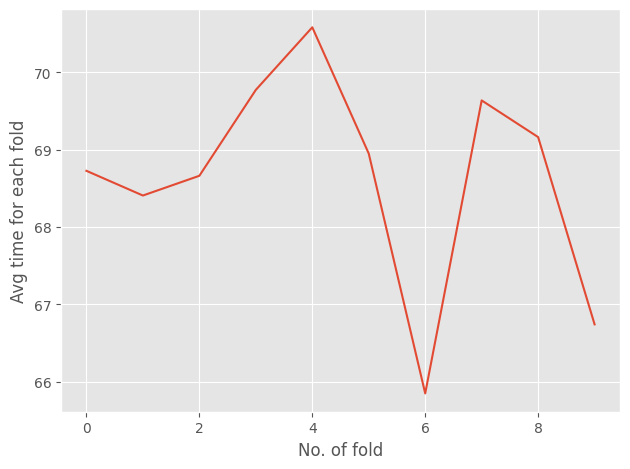

In [239]:
import matplotlib.pyplot as plt

times_birnn_n = np.zeros((10,100))
for i, row in enumerate(times_birnn):
    times_birnn_n[i, :len(row)] = row

times_birnn_n_n = np.mean(times_birnn_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_birnn_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("birnn times")
plt.show()

In [240]:
train_acc_birnn_n = np.zeros((10,100))
for i, row in enumerate(train_acc_birnn):
    train_acc_birnn_n[i, :len(row)] = row
    
test_acc_birnn_n = np.zeros((10,100))
for i, row in enumerate(test_acc_birnn):
    test_acc_birnn_n[i, :len(row)] = row
    
train_loss_birnn_n = np.zeros((10,100))
for i, row in enumerate(train_loss_birnn):
    train_loss_birnn_n[i, :len(row)] = row
    
test_loss_birnn_n = np.zeros((10,100))
for i, row in enumerate(test_loss_birnn):
    test_loss_birnn_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_birnn_n = np.mean(train_acc_birnn_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_birnn_n = np.mean(test_acc_birnn_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_birnn_n = np.mean(train_loss_birnn_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_birnn_n = np.mean(test_loss_birnn_n,axis=0)

In [241]:
data = [train_acc_birnn_n,test_acc_birnn_n,train_loss_birnn_n,test_loss_birnn_n]

df = pd.DataFrame(data)
df.to_csv('birnn_acc', index=False)
df = pd.read_csv('birnn_acc')

train_acc_birnn_n = df.iloc[0]
test_acc_birnn_n = df.iloc[1]
train_loss_birnn_n = df.iloc[2]
test_loss_birnn_n = df.iloc[3]


df_t = pd.DataFrame([times_birnn_n_n])
df_t.to_csv('birnn_times', index=False)
df_t = pd.read_csv('birnn_times')

times_birnn_n_n = df_t.iloc[0]

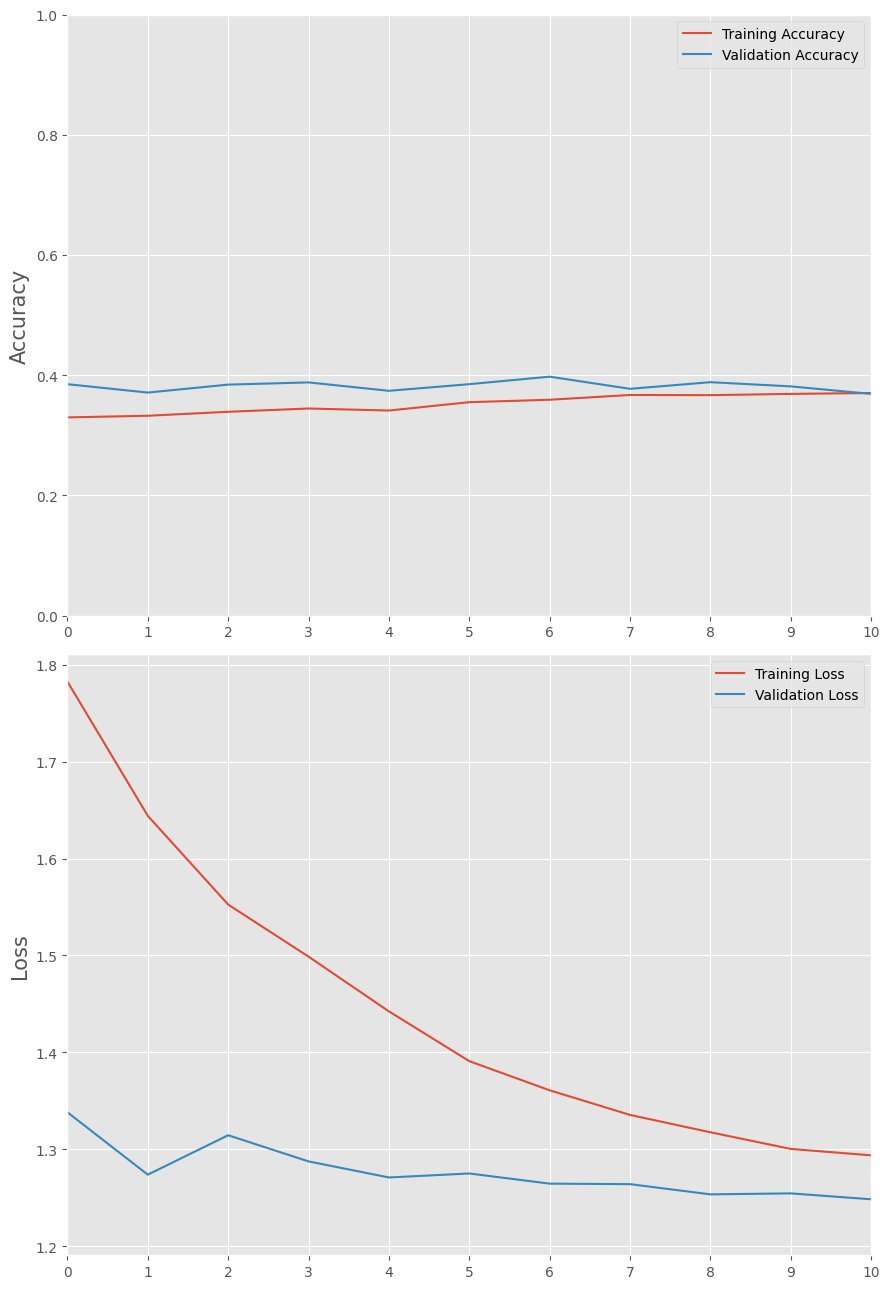

In [242]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_birnn_n, label='Training Accuracy')
axs[0].plot(test_acc_birnn_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_birnn_n, label='Training Loss')
axs[1].plot(test_loss_birnn_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig(" BIRNN Training and Testing Loss")
plt.show()

In [243]:
import gc
gc.collect()

23945

In [244]:
np.array(scores_birnn).shape

(10, 302, 4)

In [245]:
y_pred_birnn = np.argmax(scores_birnn,axis=2)

In [246]:
y_pred_birnn.shape

(10, 302)

In [247]:
from sklearn.metrics import accuracy_score
acc_scores_birnn = []
for i in range(len(y_test_all_birnn)):
    acc_scores_birnn.append(accuracy_score(y_true = y_test_all_birnn[i],y_pred = y_pred_birnn[i]))

In [248]:
acc_scores_birnn

[0.3841059602649007,
 0.3675496688741722,
 0.37748344370860926,
 0.37748344370860926,
 0.40728476821192056,
 0.4304635761589404,
 0.37748344370860926,
 0.3841059602649007,
 0.39403973509933776,
 0.40728476821192056]

In [249]:
df_acc = pd.DataFrame([acc_scores_birnn])

df_acc.to_csv('birnn_accuracy', index=False)

df_acc = pd.read_csv('birnn_accuracy')

acc_scores_birnn = df_acc.iloc[0].values

In [250]:
acc_birnn = np.mean(acc_scores_birnn)

In [251]:
acc_birnn

0.390728476821192

In [252]:
y_test_all_n = np.array(y_test_all_birnn)

y_pred_birnn_n = y_pred_birnn.flatten()
y_test_all_n = y_test_all_n.flatten()

In [253]:
import gc
gc.collect()

0

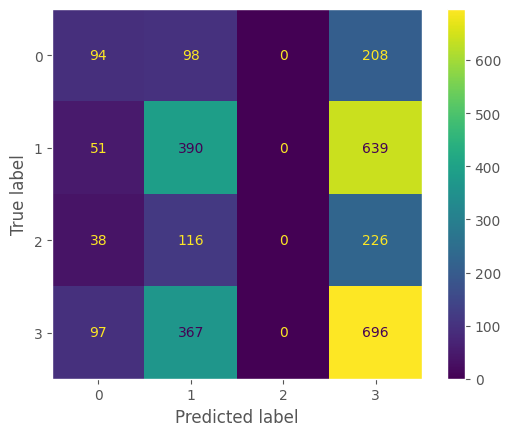

In [254]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_birnn_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("birnn")
plt.show()

In [255]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_birnn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.34      0.23      0.28       400
           1       0.40      0.36      0.38      1080
           2       0.00      0.00      0.00       380
           3       0.39      0.60      0.48      1160

    accuracy                           0.39      3020
   macro avg       0.28      0.30      0.28      3020
weighted avg       0.34      0.39      0.36      3020



C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# MobileNetV2

In [16]:
import gc
gc.collect()

0

In [12]:
X.shape

(3020, 259, 105, 1)

In [9]:
X = np.concatenate([X,X,X,X,X,X,X,X,X,X,X,X,X,X,X], axis= -1)

In [11]:
X = np.expand_dims(X, axis=-1)

In [13]:
X_n = np.concatenate([X,X,X], axis= -1)

In [14]:
X_n.shape

(3020, 259, 105, 3)

In [15]:
y.shape

(3020,)

In [264]:
import tensorflow as tf
from keras.applications import MobileNetV2

In [265]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_mnv2 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_mnv2.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [266]:
IMG_SHAPE = (None,None,3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top= False, 
                                              weights='imagenet')
base_model.trainable = False

In [267]:
def create_model_mnv2():
     
    model_mnv2 = tf.keras.Sequential([
        
        
        base_model,
        
        tf.keras.layers.GlobalAveragePooling2D(),
        
        tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
        
        tf.keras.layers.Dropout(0.25),
        
        tf.keras.layers.Dense(units=4, activation='softmax')
        
])
    
    return model_mnv2

In [268]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_mnv2 = []
y_test_all_mnv2 = []
train_acc_mnv2 = []
test_acc_mnv2 = []
train_loss_mnv2 = []
test_loss_mnv2 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_mnv2.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_mnv2 = None
    model_mnv2 = create_model_mnv2()
        
    model_mnv2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_mnv2.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_mnv2.predict(X_test)
    
    scores_mnv2.append(x)
    train_acc_mnv2.append(history.history["accuracy"])
    test_acc_mnv2.append(history.history["val_accuracy"])
    train_loss_mnv2.append(history.history["loss"])
    test_loss_mnv2.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 3s 26ms/step - loss: 1.5312 - accuracy: 0.3778 - val_loss: 1.2422 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 1s 18ms/step - loss: 1.2399 - accuracy: 0.4276 - val_loss: 1.2326 - val_accuracy: 0.4081 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 1s 18ms/step - loss: 1.2413 - accuracy: 0.4182 - val_loss: 1.2706 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 1s 19ms/step - loss: 1.2330 - accuracy: 0.4195 - val_loss: 1.2172 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 1s 18ms/step - loss: 1.2127 - accuracy: 0.4195 - val_loss: 1.2108 - val_accuracy: 0.4301 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 1s 18ms/step - loss: 1.2249 - accuracy: 0.4133 - val_loss: 1.2268 - val_accuracy: 0.4044 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Epoch 57/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1619 - accuracy: 0.4509 - val_loss: 1.1921 - val_accuracy: 0.4191 - lr: 1.0240e-10
Epoch 58/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1619 - accuracy: 0.4563 - val_loss: 1.1921 - val_accuracy: 0.4191 - lr: 1.0240e-10
Epoch 59/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1602 - accuracy: 0.4542 - val_loss: 1.1921 - val_accuracy: 0.4191 - lr: 1.0240e-10
Epoch 60/100
76/77 [============================>.] - ETA: 0s - loss: 1.1603 - accuracy: 0.4457
Epoch 60: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 60: 1.35 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1617 - accuracy: 0.4448 - val_loss: 1.1921 - val_accuracy: 0.4191 - lr: 1.0240e-10
Epoch 61/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1595 - accuracy: 0.4534 - val_loss: 1.1921 - val_accuracy: 0.4191 - lr: 2.0480e-11
E

Epoch 85/100
75/77 [============================>.] - ETA: 0s - loss: 1.1636 - accuracy: 0.4579
Epoch 85: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 85: 1.32 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1616 - accuracy: 0.4599 - val_loss: 1.1921 - val_accuracy: 0.4191 - lr: 3.2768e-14
Epoch 86/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1630 - accuracy: 0.4477 - val_loss: 1.1921 - val_accuracy: 0.4191 - lr: 6.5536e-15
Epoch 87/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1637 - accuracy: 0.4489 - val_loss: 1.1921 - val_accuracy: 0.4191 - lr: 6.5536e-15
Epoch 88/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1618 - accuracy: 0.4530 - val_loss: 1.1921 - val_accuracy: 0.4191 - lr: 6.5536e-15
Epoch 89/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1544 - accuracy: 0.4575 - val_loss: 1.1921 - val_accuracy: 0.4191 - lr: 6.5536e-15
Ep

Epoch 41/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1446 - accuracy: 0.4697 - val_loss: 1.1719 - val_accuracy: 0.4265 - lr: 6.4000e-08
Epoch 42/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1411 - accuracy: 0.4783 - val_loss: 1.1719 - val_accuracy: 0.4265 - lr: 6.4000e-08
Epoch 43/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1468 - accuracy: 0.4730 - val_loss: 1.1719 - val_accuracy: 0.4265 - lr: 6.4000e-08
Epoch 44/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1455 - accuracy: 0.4738 - val_loss: 1.1719 - val_accuracy: 0.4265 - lr: 6.4000e-08
Epoch 45/100
75/77 [============================>.] - ETA: 0s - loss: 1.1417 - accuracy: 0.4667
Epoch 45: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 45: 1.31 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1422 - accuracy: 0.4673 - val_loss: 1.1718 - val_accuracy: 0.4265 - lr: 6.4000e-08
E

Epoch 69/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1465 - accuracy: 0.4665 - val_loss: 1.1718 - val_accuracy: 0.4265 - lr: 2.0480e-11
Epoch 70/100
75/77 [============================>.] - ETA: 0s - loss: 1.1510 - accuracy: 0.4663
Epoch 70: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 70: 1.31 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1513 - accuracy: 0.4644 - val_loss: 1.1718 - val_accuracy: 0.4265 - lr: 2.0480e-11
Epoch 71/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1421 - accuracy: 0.4689 - val_loss: 1.1718 - val_accuracy: 0.4265 - lr: 4.0960e-12
Epoch 72/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1457 - accuracy: 0.4726 - val_loss: 1.1718 - val_accuracy: 0.4265 - lr: 4.0960e-12
Epoch 73/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1486 - accuracy: 0.4673 - val_loss: 1.1718 - val_accuracy: 0.4265 - lr: 4.0960e-12
Ep

Epoch 97/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1505 - accuracy: 0.4714 - val_loss: 1.1718 - val_accuracy: 0.4265 - lr: 1.3107e-15
Epoch 98/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1505 - accuracy: 0.4644 - val_loss: 1.1718 - val_accuracy: 0.4265 - lr: 1.3107e-15
Epoch 99/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1460 - accuracy: 0.4673 - val_loss: 1.1718 - val_accuracy: 0.4265 - lr: 1.3107e-15
Epoch 100/100
76/77 [============================>.] - ETA: 0s - loss: 1.1451 - accuracy: 0.4667
Epoch 100: ReduceLROnPlateau reducing learning rate to 2.6214401285682084e-16.
Time taken for epoch 100: 1.33 seconds
10/10 [==============================] - 1s 15ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 3s 25ms/step - loss: 1.5220 - accuracy: 0.3602 - val_loss: 1.2494 - val_accuracy: 0.4044 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 1s 17ms/step - los

Epoch 26/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1548 - accuracy: 0.4419 - val_loss: 1.2106 - val_accuracy: 0.4412 - lr: 4.0000e-05
Epoch 27/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1544 - accuracy: 0.4436 - val_loss: 1.2119 - val_accuracy: 0.4412 - lr: 4.0000e-05
Epoch 28/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1495 - accuracy: 0.4432 - val_loss: 1.2111 - val_accuracy: 0.4449 - lr: 4.0000e-05
Epoch 29/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1514 - accuracy: 0.4489 - val_loss: 1.2131 - val_accuracy: 0.4449 - lr: 4.0000e-05
Epoch 30/100
74/77 [===========================>..] - ETA: 0s - loss: 1.1552 - accuracy: 0.4400
Epoch 30: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 30: 1.33 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1560 - accuracy: 0.4399 - val_loss: 1.2144 - val_accuracy: 0.4485 - lr: 4.0000e-05
Ep

Epoch 54/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1549 - accuracy: 0.4407 - val_loss: 1.2118 - val_accuracy: 0.4449 - lr: 1.2800e-08
Epoch 55/100
76/77 [============================>.] - ETA: 0s - loss: 1.1547 - accuracy: 0.4383
Epoch 55: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 55: 1.33 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1547 - accuracy: 0.4391 - val_loss: 1.2118 - val_accuracy: 0.4449 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1553 - accuracy: 0.4419 - val_loss: 1.2118 - val_accuracy: 0.4449 - lr: 2.5600e-09
Epoch 57/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1498 - accuracy: 0.4575 - val_loss: 1.2118 - val_accuracy: 0.4449 - lr: 2.5600e-09
Epoch 58/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1554 - accuracy: 0.4546 - val_loss: 1.2118 - val_accuracy: 0.4449 - lr: 2.5600e-09
E

Epoch 82/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1533 - accuracy: 0.4481 - val_loss: 1.2118 - val_accuracy: 0.4449 - lr: 8.1920e-13
Epoch 83/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1536 - accuracy: 0.4358 - val_loss: 1.2118 - val_accuracy: 0.4449 - lr: 8.1920e-13
Epoch 84/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1512 - accuracy: 0.4526 - val_loss: 1.2118 - val_accuracy: 0.4449 - lr: 8.1920e-13
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 1.1541 - accuracy: 0.4420
Epoch 85: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 85: 1.32 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1536 - accuracy: 0.4415 - val_loss: 1.2118 - val_accuracy: 0.4449 - lr: 8.1920e-13
Epoch 86/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1495 - accuracy: 0.4473 - val_loss: 1.2118 - val_accuracy: 0.4449 - lr: 1.6384e-13
E

Epoch 10/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1721 - accuracy: 0.4432 - val_loss: 1.1919 - val_accuracy: 0.4191 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1681 - accuracy: 0.4509 - val_loss: 1.1956 - val_accuracy: 0.4265 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1770 - accuracy: 0.4424 - val_loss: 1.1991 - val_accuracy: 0.4375 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1664 - accuracy: 0.4436 - val_loss: 1.1918 - val_accuracy: 0.4375 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1692 - accuracy: 0.4276 - val_loss: 1.1886 - val_accuracy: 0.4265 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1665 - accuracy: 0.4428 - val_loss: 1.2009 - val_accuracy: 0.4191 - lr: 2.0000e-04
Epoch 16/100
77/77 [====================

Epoch 38/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1556 - accuracy: 0.4522 - val_loss: 1.1873 - val_accuracy: 0.4301 - lr: 6.4000e-08
Epoch 39/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1559 - accuracy: 0.4550 - val_loss: 1.1873 - val_accuracy: 0.4301 - lr: 6.4000e-08
Epoch 40/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1534 - accuracy: 0.4469 - val_loss: 1.1873 - val_accuracy: 0.4301 - lr: 6.4000e-08
Epoch 41/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1551 - accuracy: 0.4567 - val_loss: 1.1873 - val_accuracy: 0.4301 - lr: 6.4000e-08
Epoch 42/100
75/77 [============================>.] - ETA: 0s - loss: 1.1538 - accuracy: 0.4512
Epoch 42: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 42: 1.31 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1540 - accuracy: 0.4534 - val_loss: 1.1873 - val_accuracy: 0.4301 - lr: 6.4000e-08
E

Epoch 66/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1538 - accuracy: 0.4632 - val_loss: 1.1873 - val_accuracy: 0.4301 - lr: 2.0480e-11
Epoch 67/100
76/77 [============================>.] - ETA: 0s - loss: 1.1566 - accuracy: 0.4453
Epoch 67: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 67: 1.32 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1572 - accuracy: 0.4448 - val_loss: 1.1873 - val_accuracy: 0.4301 - lr: 2.0480e-11
Epoch 68/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1563 - accuracy: 0.4464 - val_loss: 1.1873 - val_accuracy: 0.4301 - lr: 4.0960e-12
Epoch 69/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1521 - accuracy: 0.4513 - val_loss: 1.1873 - val_accuracy: 0.4301 - lr: 4.0960e-12
Epoch 70/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1578 - accuracy: 0.4522 - val_loss: 1.1873 - val_accuracy: 0.4301 - lr: 4.0960e-12
Ep

Epoch 94/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1559 - accuracy: 0.4616 - val_loss: 1.1873 - val_accuracy: 0.4301 - lr: 1.3107e-15
Epoch 95/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1507 - accuracy: 0.4489 - val_loss: 1.1873 - val_accuracy: 0.4301 - lr: 1.3107e-15
Epoch 96/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1532 - accuracy: 0.4632 - val_loss: 1.1873 - val_accuracy: 0.4301 - lr: 1.3107e-15
Epoch 97/100
77/77 [==============================] - ETA: 0s - loss: 1.1602 - accuracy: 0.4419
Epoch 97: ReduceLROnPlateau reducing learning rate to 2.6214401285682084e-16.
Time taken for epoch 97: 1.33 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1602 - accuracy: 0.4419 - val_loss: 1.1873 - val_accuracy: 0.4301 - lr: 1.3107e-15
Epoch 98/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1592 - accuracy: 0.4411 - val_loss: 1.1873 - val_accuracy: 0.4301 - lr: 2.6214e-16
E

77/77 [==============================] - 1s 17ms/step - loss: 1.1691 - accuracy: 0.4489 - val_loss: 1.1349 - val_accuracy: 0.4669 - lr: 8.0000e-06
Epoch 23/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1683 - accuracy: 0.4505 - val_loss: 1.1345 - val_accuracy: 0.4669 - lr: 8.0000e-06
Epoch 24/100
73/77 [===========================>..] - ETA: 0s - loss: 1.1681 - accuracy: 0.4478
Epoch 24: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 24: 1.31 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1713 - accuracy: 0.4469 - val_loss: 1.1345 - val_accuracy: 0.4669 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1789 - accuracy: 0.4424 - val_loss: 1.1349 - val_accuracy: 0.4669 - lr: 1.6000e-06
Epoch 26/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1724 - accuracy: 0.4518 - val_loss: 1.1353 - val_accuracy: 0.4669 - lr: 1.6000e-06
Epoch 27/100
7

Epoch 50/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1710 - accuracy: 0.4464 - val_loss: 1.1349 - val_accuracy: 0.4669 - lr: 5.1200e-10
Epoch 51/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1685 - accuracy: 0.4546 - val_loss: 1.1349 - val_accuracy: 0.4669 - lr: 5.1200e-10
Epoch 52/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1747 - accuracy: 0.4395 - val_loss: 1.1349 - val_accuracy: 0.4669 - lr: 5.1200e-10
Epoch 53/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1720 - accuracy: 0.4542 - val_loss: 1.1349 - val_accuracy: 0.4669 - lr: 5.1200e-10
Epoch 54/100
77/77 [==============================] - ETA: 0s - loss: 1.1665 - accuracy: 0.4497
Epoch 54: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 54: 1.35 seconds
77/77 [==============================] - 1s 18ms/step - loss: 1.1665 - accuracy: 0.4497 - val_loss: 1.1349 - val_accuracy: 0.4669 - lr: 5.1200e-10
E

Epoch 78/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1711 - accuracy: 0.4464 - val_loss: 1.1349 - val_accuracy: 0.4669 - lr: 1.6384e-13
Epoch 79/100
77/77 [==============================] - ETA: 0s - loss: 1.1701 - accuracy: 0.4428
Epoch 79: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 79: 1.31 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1701 - accuracy: 0.4428 - val_loss: 1.1349 - val_accuracy: 0.4669 - lr: 1.6384e-13
Epoch 80/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1742 - accuracy: 0.4460 - val_loss: 1.1349 - val_accuracy: 0.4669 - lr: 3.2768e-14
Epoch 81/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1687 - accuracy: 0.4469 - val_loss: 1.1349 - val_accuracy: 0.4669 - lr: 3.2768e-14
Epoch 82/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1728 - accuracy: 0.4411 - val_loss: 1.1349 - val_accuracy: 0.4669 - lr: 3.2768e-14
E

Epoch 6/100
77/77 [==============================] - 1s 17ms/step - loss: 1.2155 - accuracy: 0.4244 - val_loss: 1.1661 - val_accuracy: 0.4191 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 1s 18ms/step - loss: 1.2090 - accuracy: 0.4199 - val_loss: 1.1651 - val_accuracy: 0.4522 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.2075 - accuracy: 0.4227
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 1.35 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.2075 - accuracy: 0.4227 - val_loss: 1.1752 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1940 - accuracy: 0.4289 - val_loss: 1.1593 - val_accuracy: 0.4669 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1857 - accuracy: 0.4395 - val_loss: 1.1500 - val_accuracy: 0.4522 - lr: 2.0000e-04
Epoch 11/100
77/77 

Epoch 34/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1600 - accuracy: 0.4546 - val_loss: 1.1399 - val_accuracy: 0.4706 - lr: 3.2000e-07
Epoch 35/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1598 - accuracy: 0.4571 - val_loss: 1.1399 - val_accuracy: 0.4706 - lr: 3.2000e-07
Epoch 36/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1668 - accuracy: 0.4522 - val_loss: 1.1399 - val_accuracy: 0.4706 - lr: 3.2000e-07
Epoch 37/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1638 - accuracy: 0.4575 - val_loss: 1.1399 - val_accuracy: 0.4706 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - ETA: 0s - loss: 1.1634 - accuracy: 0.4509
Epoch 38: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 38: 1.31 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1634 - accuracy: 0.4509 - val_loss: 1.1399 - val_accuracy: 0.4706 - lr: 3.2000e-07
Ep

Epoch 62/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1642 - accuracy: 0.4608 - val_loss: 1.1399 - val_accuracy: 0.4706 - lr: 1.0240e-10
Epoch 63/100
77/77 [==============================] - ETA: 0s - loss: 1.1643 - accuracy: 0.4477
Epoch 63: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 63: 1.36 seconds
77/77 [==============================] - 1s 18ms/step - loss: 1.1643 - accuracy: 0.4477 - val_loss: 1.1399 - val_accuracy: 0.4706 - lr: 1.0240e-10
Epoch 64/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1574 - accuracy: 0.4608 - val_loss: 1.1399 - val_accuracy: 0.4706 - lr: 2.0480e-11
Epoch 65/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1620 - accuracy: 0.4558 - val_loss: 1.1399 - val_accuracy: 0.4706 - lr: 2.0480e-11
Epoch 66/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1632 - accuracy: 0.4518 - val_loss: 1.1399 - val_accuracy: 0.4706 - lr: 2.0480e-11
E

Epoch 90/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1574 - accuracy: 0.4579 - val_loss: 1.1399 - val_accuracy: 0.4706 - lr: 6.5536e-15
Epoch 91/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1562 - accuracy: 0.4509 - val_loss: 1.1399 - val_accuracy: 0.4706 - lr: 6.5536e-15
Epoch 92/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1600 - accuracy: 0.4583 - val_loss: 1.1399 - val_accuracy: 0.4706 - lr: 6.5536e-15
Epoch 93/100
74/77 [===========================>..] - ETA: 0s - loss: 1.1553 - accuracy: 0.4557
Epoch 93: ReduceLROnPlateau reducing learning rate to 1.3107200431082805e-15.
Time taken for epoch 93: 1.34 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1570 - accuracy: 0.4546 - val_loss: 1.1399 - val_accuracy: 0.4706 - lr: 6.5536e-15
Epoch 94/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1563 - accuracy: 0.4603 - val_loss: 1.1399 - val_accuracy: 0.4706 - lr: 1.3107e-15
E

76/77 [============================>.] - ETA: 0s - loss: 1.1823 - accuracy: 0.4400
Epoch 18: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 18: 1.31 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1820 - accuracy: 0.4403 - val_loss: 1.2203 - val_accuracy: 0.4228 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1826 - accuracy: 0.4403 - val_loss: 1.2182 - val_accuracy: 0.4301 - lr: 8.0000e-06
Epoch 20/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1791 - accuracy: 0.4485 - val_loss: 1.2171 - val_accuracy: 0.4301 - lr: 8.0000e-06
Epoch 21/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1787 - accuracy: 0.4440 - val_loss: 1.2160 - val_accuracy: 0.4301 - lr: 8.0000e-06
Epoch 22/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1808 - accuracy: 0.4370 - val_loss: 1.2155 - val_accuracy: 0.4265 - lr: 8.0000e-06
Epoch 23/100
77

Epoch 46/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1712 - accuracy: 0.4489 - val_loss: 1.2154 - val_accuracy: 0.4301 - lr: 2.5600e-09
Epoch 47/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1772 - accuracy: 0.4383 - val_loss: 1.2154 - val_accuracy: 0.4301 - lr: 2.5600e-09
Epoch 48/100
75/77 [============================>.] - ETA: 0s - loss: 1.1771 - accuracy: 0.4454
Epoch 48: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 48: 1.33 seconds
77/77 [==============================] - 1s 18ms/step - loss: 1.1765 - accuracy: 0.4464 - val_loss: 1.2154 - val_accuracy: 0.4301 - lr: 2.5600e-09
Epoch 49/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1818 - accuracy: 0.4460 - val_loss: 1.2154 - val_accuracy: 0.4301 - lr: 5.1200e-10
Epoch 50/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1746 - accuracy: 0.4411 - val_loss: 1.2154 - val_accuracy: 0.4301 - lr: 5.1200e-10
Epoc

Epoch 74/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1726 - accuracy: 0.4464 - val_loss: 1.2154 - val_accuracy: 0.4301 - lr: 1.6384e-13
Epoch 75/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1771 - accuracy: 0.4370 - val_loss: 1.2154 - val_accuracy: 0.4301 - lr: 1.6384e-13
Epoch 76/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1745 - accuracy: 0.4538 - val_loss: 1.2154 - val_accuracy: 0.4301 - lr: 1.6384e-13
Epoch 77/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1755 - accuracy: 0.4419 - val_loss: 1.2154 - val_accuracy: 0.4301 - lr: 1.6384e-13
Epoch 78/100
75/77 [============================>.] - ETA: 0s - loss: 1.1789 - accuracy: 0.4417
Epoch 78: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 78: 1.33 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1775 - accuracy: 0.4415 - val_loss: 1.2154 - val_accuracy: 0.4301 - lr: 1.6384e-13
E

Epoch 2/100
77/77 [==============================] - 1s 17ms/step - loss: 1.2340 - accuracy: 0.4195 - val_loss: 1.2806 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 1s 17ms/step - loss: 1.2282 - accuracy: 0.4182 - val_loss: 1.2421 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 1s 18ms/step - loss: 1.2251 - accuracy: 0.4240 - val_loss: 1.2368 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 1s 17ms/step - loss: 1.2269 - accuracy: 0.4154 - val_loss: 1.2533 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 1s 17ms/step - loss: 1.2113 - accuracy: 0.4280 - val_loss: 1.2271 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 1s 17ms/step - loss: 1.2052 - accuracy: 0.4301 - val_loss: 1.2254 - val_accuracy: 0.4632 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 1s 17ms/step - lo

Epoch 31/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1471 - accuracy: 0.4571 - val_loss: 1.1936 - val_accuracy: 0.4522 - lr: 8.0000e-06
Epoch 32/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1472 - accuracy: 0.4526 - val_loss: 1.1936 - val_accuracy: 0.4559 - lr: 8.0000e-06
Epoch 33/100
77/77 [==============================] - ETA: 0s - loss: 1.1484 - accuracy: 0.4563
Epoch 33: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 33: 1.34 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1484 - accuracy: 0.4563 - val_loss: 1.1936 - val_accuracy: 0.4559 - lr: 8.0000e-06
Epoch 34/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1487 - accuracy: 0.4648 - val_loss: 1.1936 - val_accuracy: 0.4559 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1400 - accuracy: 0.4509 - val_loss: 1.1936 - val_accuracy: 0.4559 - lr: 1.6000e-06
E

Epoch 59/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1463 - accuracy: 0.4534 - val_loss: 1.1938 - val_accuracy: 0.4559 - lr: 5.1200e-10
Epoch 60/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1489 - accuracy: 0.4644 - val_loss: 1.1938 - val_accuracy: 0.4559 - lr: 5.1200e-10
Epoch 61/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1503 - accuracy: 0.4493 - val_loss: 1.1938 - val_accuracy: 0.4559 - lr: 5.1200e-10
Epoch 62/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1432 - accuracy: 0.4530 - val_loss: 1.1938 - val_accuracy: 0.4559 - lr: 5.1200e-10
Epoch 63/100
75/77 [============================>.] - ETA: 0s - loss: 1.1446 - accuracy: 0.4596
Epoch 63: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 63: 1.33 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1466 - accuracy: 0.4595 - val_loss: 1.1938 - val_accuracy: 0.4559 - lr: 5.1200e-10
E

Epoch 87/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1389 - accuracy: 0.4567 - val_loss: 1.1938 - val_accuracy: 0.4559 - lr: 1.6384e-13
Epoch 88/100
76/77 [============================>.] - ETA: 0s - loss: 1.1394 - accuracy: 0.4564
Epoch 88: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 88: 1.35 seconds
77/77 [==============================] - 1s 18ms/step - loss: 1.1399 - accuracy: 0.4550 - val_loss: 1.1938 - val_accuracy: 0.4559 - lr: 1.6384e-13
Epoch 89/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1440 - accuracy: 0.4542 - val_loss: 1.1938 - val_accuracy: 0.4559 - lr: 3.2768e-14
Epoch 90/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1455 - accuracy: 0.4538 - val_loss: 1.1938 - val_accuracy: 0.4559 - lr: 3.2768e-14
Epoch 91/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1442 - accuracy: 0.4469 - val_loss: 1.1938 - val_accuracy: 0.4559 - lr: 3.2768e-14
E

Epoch 43/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1680 - accuracy: 0.4497 - val_loss: 1.2027 - val_accuracy: 0.4118 - lr: 1.2800e-08
Epoch 44/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1663 - accuracy: 0.4489 - val_loss: 1.2027 - val_accuracy: 0.4118 - lr: 1.2800e-08
Epoch 45/100
77/77 [==============================] - ETA: 0s - loss: 1.1679 - accuracy: 0.4440
Epoch 45: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 45: 1.32 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1679 - accuracy: 0.4440 - val_loss: 1.2027 - val_accuracy: 0.4118 - lr: 1.2800e-08
Epoch 46/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1625 - accuracy: 0.4448 - val_loss: 1.2027 - val_accuracy: 0.4118 - lr: 2.5600e-09
Epoch 47/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1621 - accuracy: 0.4424 - val_loss: 1.2027 - val_accuracy: 0.4118 - lr: 2.5600e-09
E

Epoch 71/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1673 - accuracy: 0.4538 - val_loss: 1.2027 - val_accuracy: 0.4118 - lr: 8.1920e-13
Epoch 72/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1676 - accuracy: 0.4493 - val_loss: 1.2027 - val_accuracy: 0.4118 - lr: 8.1920e-13
Epoch 73/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1686 - accuracy: 0.4419 - val_loss: 1.2027 - val_accuracy: 0.4118 - lr: 8.1920e-13
Epoch 74/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1648 - accuracy: 0.4497 - val_loss: 1.2027 - val_accuracy: 0.4118 - lr: 8.1920e-13
Epoch 75/100
77/77 [==============================] - ETA: 0s - loss: 1.1682 - accuracy: 0.4399
Epoch 75: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 75: 1.31 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1682 - accuracy: 0.4399 - val_loss: 1.2027 - val_accuracy: 0.4118 - lr: 8.1920e-13
E

Epoch 99/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1610 - accuracy: 0.4477 - val_loss: 1.2027 - val_accuracy: 0.4118 - lr: 2.6214e-16
Epoch 100/100
75/77 [============================>.] - ETA: 0s - loss: 1.1661 - accuracy: 0.4450
Epoch 100: ReduceLROnPlateau reducing learning rate to 5.2428803630155353e-17.
Time taken for epoch 100: 1.36 seconds
10/10 [==============================] - 0s 16ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 3s 24ms/step - loss: 1.4677 - accuracy: 0.3790 - val_loss: 1.2200 - val_accuracy: 0.4081 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 1s 17ms/step - loss: 1.2464 - accuracy: 0.4027 - val_loss: 1.2317 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 1s 17ms/step - loss: 1.2286 - accuracy: 0.4195 - val_loss: 1.1995 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 1s 17ms/step - loss: 1.2338

Epoch 55/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1512 - accuracy: 0.4497 - val_loss: 1.1434 - val_accuracy: 0.4522 - lr: 5.1200e-10
Epoch 56/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1441 - accuracy: 0.4534 - val_loss: 1.1434 - val_accuracy: 0.4522 - lr: 5.1200e-10
Epoch 57/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1465 - accuracy: 0.4460 - val_loss: 1.1434 - val_accuracy: 0.4522 - lr: 5.1200e-10
Epoch 58/100
74/77 [===========================>..] - ETA: 0s - loss: 1.1481 - accuracy: 0.4519
Epoch 58: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 58: 1.31 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1494 - accuracy: 0.4513 - val_loss: 1.1434 - val_accuracy: 0.4522 - lr: 5.1200e-10
Epoch 59/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1458 - accuracy: 0.4513 - val_loss: 1.1434 - val_accuracy: 0.4522 - lr: 1.0240e-10
E

Epoch 83/100
76/77 [============================>.] - ETA: 0s - loss: 1.1461 - accuracy: 0.4539
Epoch 83: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 83: 1.31 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.1453 - accuracy: 0.4542 - val_loss: 1.1434 - val_accuracy: 0.4522 - lr: 1.6384e-13
Epoch 84/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1434 - accuracy: 0.4608 - val_loss: 1.1434 - val_accuracy: 0.4522 - lr: 3.2768e-14
Epoch 85/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1438 - accuracy: 0.4501 - val_loss: 1.1434 - val_accuracy: 0.4522 - lr: 3.2768e-14
Epoch 86/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1479 - accuracy: 0.4460 - val_loss: 1.1434 - val_accuracy: 0.4522 - lr: 3.2768e-14
Epoch 87/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1491 - accuracy: 0.4485 - val_loss: 1.1434 - val_accuracy: 0.4522 - lr: 3.2768e-14
E

In [269]:
import gc
gc.collect()

0

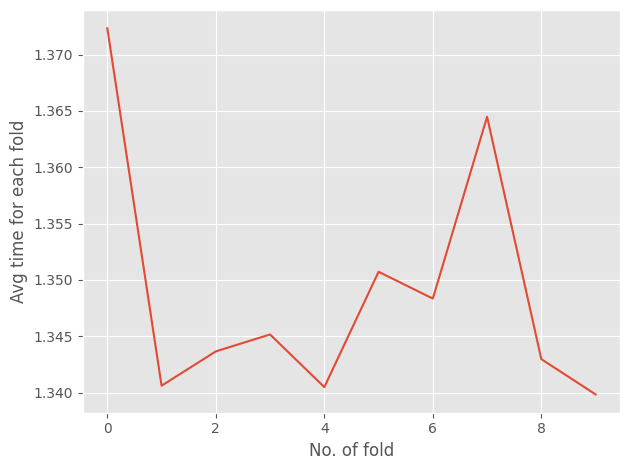

In [270]:
import matplotlib.pyplot as plt

times_mnv2_n = np.zeros((10,100))
for i, row in enumerate(times_mnv2):
    times_mnv2_n[i, :len(row)] = row

times_mnv2_n_n = np.mean(times_mnv2_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_mnv2_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("mnv2 times")
plt.show()

In [271]:
train_acc_mnv2_n = np.zeros((10,100))
for i, row in enumerate(train_acc_mnv2):
    train_acc_mnv2_n[i, :len(row)] = row
    
test_acc_mnv2_n = np.zeros((10,100))
for i, row in enumerate(test_acc_mnv2):
    test_acc_mnv2_n[i, :len(row)] = row
    
train_loss_mnv2_n = np.zeros((10,100))
for i, row in enumerate(train_loss_mnv2):
    train_loss_mnv2_n[i, :len(row)] = row
    
test_loss_mnv2_n = np.zeros((10,100))
for i, row in enumerate(test_loss_mnv2):
    test_loss_mnv2_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_mnv2_n = np.mean(train_acc_mnv2_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_mnv2_n = np.mean(test_acc_mnv2_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_mnv2_n = np.mean(train_loss_mnv2_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_mnv2_n = np.mean(test_loss_mnv2_n,axis=0)

In [272]:
data = [train_acc_mnv2_n,test_acc_mnv2_n,train_loss_mnv2_n,test_loss_mnv2_n]

df = pd.DataFrame(data)
df.to_csv('mnv2_acc', index=False)
df = pd.read_csv('mnv2_acc')

train_acc_mnv2_n = df.iloc[0]
test_acc_mnv2_n = df.iloc[1]
train_loss_mnv2_n = df.iloc[2]
test_loss_mnv2_n = df.iloc[3]


df_t = pd.DataFrame([times_mnv2_n_n])
df_t.to_csv('mnv2_times', index=False)
df_t = pd.read_csv('mnv2_times')

times_mnv2_n_n = df_t.iloc[0]

In [273]:
train_acc_mnv2_n

0     0.376533
1     0.410589
2     0.417621
3     0.419665
4     0.421300
        ...   
95    0.452494
96    0.452003
97    0.449223
98    0.451390
99    0.456337
Name: 0, Length: 100, dtype: float64

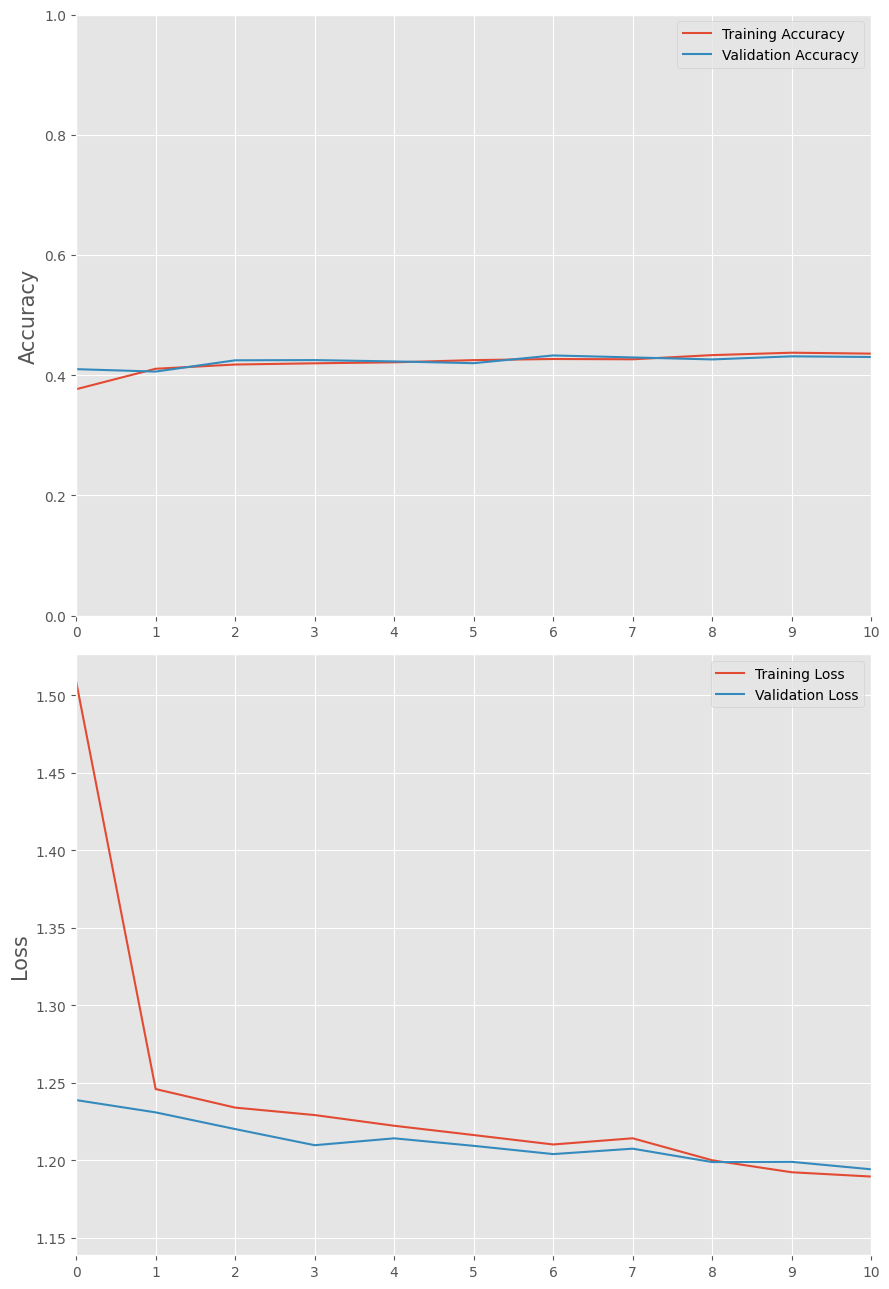

In [274]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_mnv2_n, label='Training Accuracy')
axs[0].plot(test_acc_mnv2_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_mnv2_n, label='Training Loss')
axs[1].plot(test_loss_mnv2_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("mnv2 Training and Testing Loss")
plt.show()

In [275]:
np.array(scores_mnv2).shape

(10, 302, 4)

In [276]:
y_pred_mnv2 = np.argmax(scores_mnv2,axis=2)

In [277]:
y_pred_mnv2.shape

(10, 302)

In [278]:
from sklearn.metrics import accuracy_score
acc_scores_mnv2 = []
for i in range(len(y_test_all_mnv2)):
    acc_scores_mnv2.append(accuracy_score(y_true = y_test_all_mnv2[i],y_pred = y_pred_mnv2[i]))

In [279]:
import gc
gc.collect()

23844

In [280]:
acc_scores_mnv2

[0.4105960264900662,
 0.4337748344370861,
 0.4304635761589404,
 0.44039735099337746,
 0.4470198675496689,
 0.4470198675496689,
 0.44039735099337746,
 0.45695364238410596,
 0.423841059602649,
 0.4271523178807947]

In [281]:
df_acc = pd.DataFrame([acc_scores_mnv2])

df_acc.to_csv('mnv2_accuracy', index=False)

df_acc = pd.read_csv('mnv2_accuracy')

acc_scores_mnv2 = df_acc.iloc[0].values

In [282]:
y_test_all_n = np.array(y_test_all_mnv2)

y_pred_mnv2_n = y_pred_mnv2.flatten()
y_test_all_n = y_test_all_n.flatten()

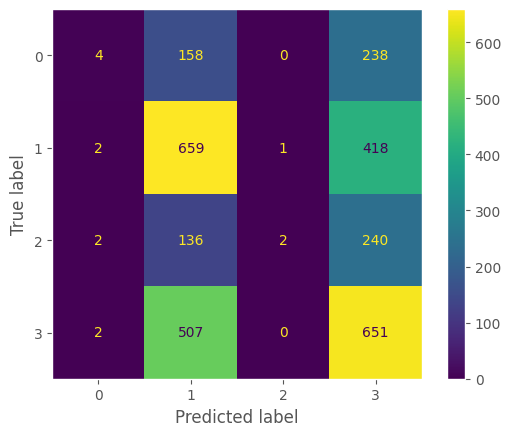

In [283]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_mnv2_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("mnv2")

plt.show()

In [284]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_mnv2_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.40      0.01      0.02       400
           1       0.45      0.61      0.52      1080
           2       0.67      0.01      0.01       380
           3       0.42      0.56      0.48      1160

    accuracy                           0.44      3020
   macro avg       0.48      0.30      0.26      3020
weighted avg       0.46      0.44      0.37      3020



# XceptionV3

In [285]:
import gc
gc.collect()

6234

In [286]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_xv3 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_xv3.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [287]:
import gc
gc.collect()

5

In [288]:
def create_model_xv3():
    
    model_xv3 = tf.keras.models.Sequential([
    tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_xv3.trainable = False
    return model_xv3

In [289]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_xv3 = []
y_test_all_xv3 = []
train_acc_xv3 = []
test_acc_xv3 = []
train_loss_xv3 = []
test_loss_xv3 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_xv3.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_xv3 = None
    model_xv3 = create_model_xv3()
        
    model_xv3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_xv3.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_xv3.predict(X_test)
    
    scores_xv3.append(x)
    train_acc_xv3.append(history.history["accuracy"])
    test_acc_xv3.append(history.history["val_accuracy"])
    train_loss_xv3.append(history.history["loss"])
    test_loss_xv3.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 5s 50ms/step - loss: 3.0261 - accuracy: 0.1365 - val_loss: 2.6891 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 43ms/step - loss: 3.0975 - accuracy: 0.1259 - val_loss: 2.6891 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 43ms/step - loss: 3.0238 - accuracy: 0.1329 - val_loss: 2.6891 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 43ms/step - loss: 3.0289 - accuracy: 0.1349 - val_loss: 2.6891 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 43ms/step - loss: 3.0201 - accuracy: 0.1370 - val_loss: 2.6891 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 43ms/step - loss: 3.0429 - accuracy: 0.1415 - val_loss: 2.6891 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Time taken for epoch 29: 3.38 seconds
77/77 [==============================] - 3s 44ms/step - loss: 2.9967 - accuracy: 0.1398 - val_loss: 2.6891 - val_accuracy: 0.1287 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 44ms/step - loss: 3.0258 - accuracy: 0.1316 - val_loss: 2.6891 - val_accuracy: 0.1287 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 44ms/step - loss: 3.0134 - accuracy: 0.1321 - val_loss: 2.6891 - val_accuracy: 0.1287 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 44ms/step - loss: 3.0522 - accuracy: 0.1353 - val_loss: 2.6891 - val_accuracy: 0.1287 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 44ms/step - loss: 3.0418 - accuracy: 0.1251 - val_loss: 2.6891 - val_accuracy: 0.1287 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 3s 44ms/step - loss: 3.0004 - accuracy: 0.1325 - val_loss: 2.6891 - val_accuracy: 0.1287 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 3s 44ms/step - loss: 3.0328 - accuracy: 0.1325 - val_loss: 2.6891 - val_accuracy: 0.1287 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 44ms/step - loss: 3.0498 - accuracy: 0.1349 - val_loss: 2.6891 - val_accuracy: 0.1287 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 44ms/step - loss: 3.0028 - accuracy: 0.1337 - val_loss: 2.6891 - val_accuracy: 0.1287 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 44ms/step - loss: 2.9994 - accuracy: 0.1276 - val_loss: 2.6891 - val_accuracy: 0.1287 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 43ms/step - loss: 3.0357 - accuracy: 0.1284 - val_loss: 2.6891 - val_accuracy: 0.1287 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 44ms/step - loss: 3.0166 - accuracy: 0.1370 - val_loss: 2.6891 - val_accuracy: 0.1287 - lr: 2.5600e-09
Epoch 64/100
76/77 [====================

Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 2.2120 - accuracy: 0.3483
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 3.37 seconds
77/77 [==============================] - 3s 44ms/step - loss: 2.2120 - accuracy: 0.3483 - val_loss: 2.0174 - val_accuracy: 0.3493 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 44ms/step - loss: 2.1771 - accuracy: 0.3557 - val_loss: 2.0174 - val_accuracy: 0.3493 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 44ms/step - loss: 2.1865 - accuracy: 0.3508 - val_loss: 2.0174 - val_accuracy: 0.3493 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 44ms/step - loss: 2.2026 - accuracy: 0.3504 - val_loss: 2.0174 - val_accuracy: 0.3493 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 44ms/step - loss: 2.2070 - accuracy: 0.3528 - val_loss: 2.0174 - val_accuracy: 0.3493 - lr: 4.0000e-05
E

77/77 [==============================] - ETA: 0s - loss: 2.2142 - accuracy: 0.3365
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 3.37 seconds
77/77 [==============================] - 3s 44ms/step - loss: 2.2142 - accuracy: 0.3365 - val_loss: 2.0174 - val_accuracy: 0.3493 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 3s 44ms/step - loss: 2.2131 - accuracy: 0.3536 - val_loss: 2.0174 - val_accuracy: 0.3493 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 44ms/step - loss: 2.1794 - accuracy: 0.3602 - val_loss: 2.0174 - val_accuracy: 0.3493 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 3s 44ms/step - loss: 2.2031 - accuracy: 0.3532 - val_loss: 2.0174 - val_accuracy: 0.3493 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 3s 44ms/step - loss: 2.2032 - accuracy: 0.3622 - val_loss: 2.0174 - val_accuracy: 0.3493 - lr: 1.0240e-10
Epoch 76/100
7

77/77 [==============================] - 3s 44ms/step - loss: 4.7751 - accuracy: 0.1529 - val_loss: 4.5875 - val_accuracy: 0.1324 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 44ms/step - loss: 4.7313 - accuracy: 0.1500 - val_loss: 4.5875 - val_accuracy: 0.1324 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 4.7591 - accuracy: 0.1504
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.34 seconds
77/77 [==============================] - 3s 44ms/step - loss: 4.7591 - accuracy: 0.1504 - val_loss: 4.5875 - val_accuracy: 0.1324 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 44ms/step - loss: 4.7221 - accuracy: 0.1504 - val_loss: 4.5875 - val_accuracy: 0.1324 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 44ms/step - loss: 4.7350 - accuracy: 0.1480 - val_loss: 4.5875 - val_accuracy: 0.1324 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 3s 44ms/step - loss: 4.7392 - accuracy: 0.1480 - val_loss: 4.5875 - val_accuracy: 0.1324 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 44ms/step - loss: 4.7395 - accuracy: 0.1492 - val_loss: 4.5875 - val_accuracy: 0.1324 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 4.7246 - accuracy: 0.1545
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.39 seconds
77/77 [==============================] - 3s 44ms/step - loss: 4.7246 - accuracy: 0.1545 - val_loss: 4.5875 - val_accuracy: 0.1324 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 43ms/step - loss: 4.7355 - accuracy: 0.1533 - val_loss: 4.5875 - val_accuracy: 0.1324 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 44ms/step - loss: 4.7650 - accuracy: 0.1460 - val_loss: 4.5875 - val_accuracy: 0.1324 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 3s 44ms/step - loss: 2.9331 - accuracy: 0.1594 - val_loss: 2.7065 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 3s 44ms/step - loss: 2.9455 - accuracy: 0.1537 - val_loss: 2.7065 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 3s 44ms/step - loss: 2.9263 - accuracy: 0.1427 - val_loss: 2.7065 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 44ms/step - loss: 3.0002 - accuracy: 0.1476 - val_loss: 2.7065 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 2.9533 - accuracy: 0.1517
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 3.40 seconds
77/77 [==============================] - 3s 44ms/step - loss: 2.9517 - accuracy: 0.1517 - val_loss: 2.7065 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 3s 44ms/step - loss: 2.9559 - accuracy: 0.1415 - val_loss: 2.7065 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 3s 44ms/step - loss: 2.9122 - accuracy: 0.1590 - val_loss: 2.7065 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 3s 44ms/step - loss: 2.9453 - accuracy: 0.1537 - val_loss: 2.7065 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 44ms/step - loss: 2.9648 - accuracy: 0.1468 - val_loss: 2.7065 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 2.9717 - accuracy: 0.1533
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 3.37 seconds
77/77 [==============================] - 3s 44ms/step - loss: 2.9717 - accuracy: 0.1533 - val_loss: 2.7065 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 100/100


77/77 [==============================] - 3s 44ms/step - loss: 2.5266 - accuracy: 0.3115 - val_loss: 2.2694 - val_accuracy: 0.3750 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 3s 44ms/step - loss: 2.5382 - accuracy: 0.2989 - val_loss: 2.2694 - val_accuracy: 0.3750 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 3s 45ms/step - loss: 2.5728 - accuracy: 0.3001 - val_loss: 2.2694 - val_accuracy: 0.3750 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 3s 44ms/step - loss: 2.5067 - accuracy: 0.3115 - val_loss: 2.2694 - val_accuracy: 0.3750 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 3s 44ms/step - loss: 2.5781 - accuracy: 0.3078 - val_loss: 2.2694 - val_accuracy: 0.3750 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 44ms/step - loss: 2.5131 - accuracy: 0.3042 - val_loss: 2.2694 - val_accuracy: 0.3750 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] -

77/77 [==============================] - 3s 44ms/step - loss: 2.2562 - accuracy: 0.2522 - val_loss: 1.8542 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 2.2750 - accuracy: 0.2473
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 3.38 seconds
77/77 [==============================] - 3s 44ms/step - loss: 2.2750 - accuracy: 0.2473 - val_loss: 1.8542 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 3s 43ms/step - loss: 2.2770 - accuracy: 0.2518 - val_loss: 1.8542 - val_accuracy: 0.1765 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 3s 43ms/step - loss: 2.2208 - accuracy: 0.2600 - val_loss: 1.8542 - val_accuracy: 0.1765 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 3s 43ms/step - loss: 2.2758 - accuracy: 0.2551 - val_loss: 1.8542 - val_accuracy: 0.1765 - lr: 2.0000e-04
Epoch 12/100
77/77 [======

77/77 [==============================] - 3s 44ms/step - loss: 2.2821 - accuracy: 0.2490 - val_loss: 1.8542 - val_accuracy: 0.1765 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 2.2267 - accuracy: 0.2566
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 3.38 seconds
77/77 [==============================] - 3s 44ms/step - loss: 2.2314 - accuracy: 0.2559 - val_loss: 1.8542 - val_accuracy: 0.1765 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 3s 44ms/step - loss: 2.2370 - accuracy: 0.2576 - val_loss: 1.8542 - val_accuracy: 0.1765 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 3s 44ms/step - loss: 2.2693 - accuracy: 0.2469 - val_loss: 1.8542 - val_accuracy: 0.1765 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 3s 43ms/step - loss: 2.2617 - accuracy: 0.2461 - val_loss: 1.8542 - val_accuracy: 0.1765 - lr: 5.1200e-10
Epoch 68/100
77/7

77/77 [==============================] - 3s 44ms/step - loss: 2.3540 - accuracy: 0.2498 - val_loss: 2.0556 - val_accuracy: 0.1691 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 3s 43ms/step - loss: 2.3176 - accuracy: 0.2318 - val_loss: 2.0556 - val_accuracy: 0.1691 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 3s 44ms/step - loss: 2.3399 - accuracy: 0.2486 - val_loss: 2.0556 - val_accuracy: 0.1691 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 2.3576 - accuracy: 0.2420
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 3.31 seconds
77/77 [==============================] - 3s 43ms/step - loss: 2.3576 - accuracy: 0.2420 - val_loss: 2.0556 - val_accuracy: 0.1691 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 3s 44ms/step - loss: 2.3148 - accuracy: 0.2555 - val_loss: 2.0556 - val_accuracy: 0.1691 - lr: 8.0000e-06
Epoch 24/100
77

77/77 [==============================] - 3s 43ms/step - loss: 2.3266 - accuracy: 0.2498 - val_loss: 2.0556 - val_accuracy: 0.1691 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 3s 44ms/step - loss: 2.3335 - accuracy: 0.2416 - val_loss: 2.0556 - val_accuracy: 0.1691 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 3s 43ms/step - loss: 2.3489 - accuracy: 0.2453 - val_loss: 2.0556 - val_accuracy: 0.1691 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 2.3292 - accuracy: 0.2531
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 3.32 seconds
77/77 [==============================] - 3s 43ms/step - loss: 2.3292 - accuracy: 0.2531 - val_loss: 2.0556 - val_accuracy: 0.1691 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 3s 44ms/step - loss: 2.3432 - accuracy: 0.2453 - val_loss: 2.0556 - val_accuracy: 0.1691 - lr: 2.0480e-11
Epoch 80/100
7

Epoch 3/100
77/77 [==============================] - 3s 43ms/step - loss: 2.6515 - accuracy: 0.1778 - val_loss: 2.3626 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 44ms/step - loss: 2.6559 - accuracy: 0.1746 - val_loss: 2.3626 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 43ms/step - loss: 2.7057 - accuracy: 0.1607 - val_loss: 2.3626 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 43ms/step - loss: 2.6318 - accuracy: 0.1738 - val_loss: 2.3626 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 3s 43ms/step - loss: 2.6672 - accuracy: 0.1693 - val_loss: 2.3626 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 2.6760 - accuracy: 0.1678
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 3.33 seconds
77/77 [=========

77/77 [==============================] - 3s 43ms/step - loss: 2.6375 - accuracy: 0.1725 - val_loss: 2.3626 - val_accuracy: 0.1765 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 44ms/step - loss: 2.6113 - accuracy: 0.1811 - val_loss: 2.3626 - val_accuracy: 0.1765 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 44ms/step - loss: 2.7075 - accuracy: 0.1619 - val_loss: 2.3626 - val_accuracy: 0.1765 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 44ms/step - loss: 2.6487 - accuracy: 0.1758 - val_loss: 2.3626 - val_accuracy: 0.1765 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 43ms/step - loss: 2.6495 - accuracy: 0.1709 - val_loss: 2.3626 - val_accuracy: 0.1765 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 2.6110 - accuracy: 0.1688
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 3.34 seconds
77/7

Time taken for epoch 15: 3.32 seconds
77/77 [==============================] - 3s 43ms/step - loss: 5.0820 - accuracy: 0.1280 - val_loss: 5.1064 - val_accuracy: 0.1103 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 43ms/step - loss: 5.0003 - accuracy: 0.1284 - val_loss: 5.1064 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 44ms/step - loss: 5.0475 - accuracy: 0.1280 - val_loss: 5.1064 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 44ms/step - loss: 5.0372 - accuracy: 0.1276 - val_loss: 5.1064 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 43ms/step - loss: 5.0076 - accuracy: 0.1288 - val_loss: 5.1064 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 3s 44ms/step - loss: 5.0463 - accuracy: 0.1284 - val_loss: 5.1064 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 21/100
77

Epoch 44/100
77/77 [==============================] - 3s 44ms/step - loss: 5.0230 - accuracy: 0.1280 - val_loss: 5.1064 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 3s 44ms/step - loss: 5.0162 - accuracy: 0.1300 - val_loss: 5.1064 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 3s 44ms/step - loss: 5.0331 - accuracy: 0.1284 - val_loss: 5.1064 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 3s 44ms/step - loss: 5.0512 - accuracy: 0.1284 - val_loss: 5.1064 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 3s 43ms/step - loss: 5.0957 - accuracy: 0.1296 - val_loss: 5.1064 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 3s 44ms/step - loss: 5.0392 - accuracy: 0.1267 - val_loss: 5.1064 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 50/100
77/77 [====================

10/10 [==============================] - 1s 37ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 6s 49ms/step - loss: 1.8224 - accuracy: 0.3328 - val_loss: 1.5342 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 43ms/step - loss: 1.7882 - accuracy: 0.3320 - val_loss: 1.5342 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 43ms/step - loss: 1.8151 - accuracy: 0.3312 - val_loss: 1.5342 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 43ms/step - loss: 1.8102 - accuracy: 0.3283 - val_loss: 1.5342 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 44ms/step - loss: 1.8174 - accuracy: 0.3348 - val_loss: 1.5342 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 44ms/step - loss: 1.7987 - accuracy: 0.3373 - val_loss: 1.5342 - val_accuracy: 0.3640 - l

Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 1.7907 - accuracy: 0.3273
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.40 seconds
77/77 [==============================] - 3s 44ms/step - loss: 1.7905 - accuracy: 0.3275 - val_loss: 1.5342 - val_accuracy: 0.3640 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 44ms/step - loss: 1.8006 - accuracy: 0.3230 - val_loss: 1.5342 - val_accuracy: 0.3640 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 44ms/step - loss: 1.8132 - accuracy: 0.3328 - val_loss: 1.5342 - val_accuracy: 0.3640 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 44ms/step - loss: 1.8120 - accuracy: 0.3291 - val_loss: 1.5342 - val_accuracy: 0.3640 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 44ms/step - loss: 1.7900 - accuracy: 0.3307 - val_loss: 1.5342 - val_accuracy: 0.3640 - lr: 1.6000e-06
E

77/77 [==============================] - ETA: 0s - loss: 1.8101 - accuracy: 0.3320
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.40 seconds
77/77 [==============================] - 3s 44ms/step - loss: 1.8101 - accuracy: 0.3320 - val_loss: 1.5342 - val_accuracy: 0.3640 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 44ms/step - loss: 1.7984 - accuracy: 0.3152 - val_loss: 1.5342 - val_accuracy: 0.3640 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 44ms/step - loss: 1.8279 - accuracy: 0.3340 - val_loss: 1.5342 - val_accuracy: 0.3640 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 3s 44ms/step - loss: 1.7824 - accuracy: 0.3410 - val_loss: 1.5342 - val_accuracy: 0.3640 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 3s 44ms/step - loss: 1.8282 - accuracy: 0.3291 - val_loss: 1.5342 - val_accuracy: 0.3640 - lr: 4.0960e-12
Epoch 90/100
77

In [290]:
np.array(y_test_all).shape

(10, 302)

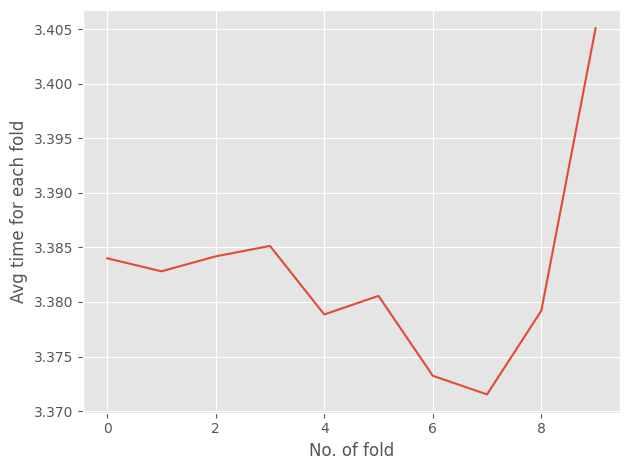

In [291]:
import matplotlib.pyplot as plt

times_xv3_n = np.zeros((10,100))
for i, row in enumerate(times_xv3):
    times_xv3_n[i, :len(row)] = row

times_xv3_n_n = np.mean(times_xv3_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_xv3_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("xv3 times")
plt.show()

In [292]:
train_acc_xv3_n = np.zeros((10,100))
for i, row in enumerate(train_acc_xv3):
    train_acc_xv3_n[i, :len(row)] = row
    
test_acc_xv3_n = np.zeros((10,100))
for i, row in enumerate(test_acc_xv3):
    test_acc_xv3_n[i, :len(row)] = row
    
train_loss_xv3_n = np.zeros((10,100))
for i, row in enumerate(train_loss_xv3):
    train_loss_xv3_n[i, :len(row)] = row
    
test_loss_xv3_n = np.zeros((10,100))
for i, row in enumerate(test_loss_xv3):
    test_loss_xv3_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_xv3_n = np.mean(train_acc_xv3_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_xv3_n = np.mean(test_acc_xv3_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_xv3_n = np.mean(train_loss_xv3_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_xv3_n = np.mean(test_loss_xv3_n,axis=0)

In [293]:
import gc
gc.collect()

3502

In [294]:
data = [train_acc_xv3_n,test_acc_xv3_n,train_loss_xv3_n,test_loss_xv3_n]

df = pd.DataFrame(data)
df.to_csv('xv3_acc', index=False)
df = pd.read_csv('xv3_acc')

train_acc_xv3_n = df.iloc[0]
test_acc_xv3_n = df.iloc[1]
train_loss_xv3_n = df.iloc[2]
test_loss_xv3_n = df.iloc[3]


df_t = pd.DataFrame([times_xv3_n_n])
df_t.to_csv('xv3_times', index=False)
df_t = pd.read_csv('xv3_times')

times_xv3_n_n = df_t.iloc[0]

In [295]:
train_acc_xv3_n

0     0.225143
1     0.221137
2     0.223426
3     0.226370
4     0.220769
        ...   
95    0.222731
96    0.224652
97    0.219338
98    0.219379
99    0.222527
Name: 0, Length: 100, dtype: float64

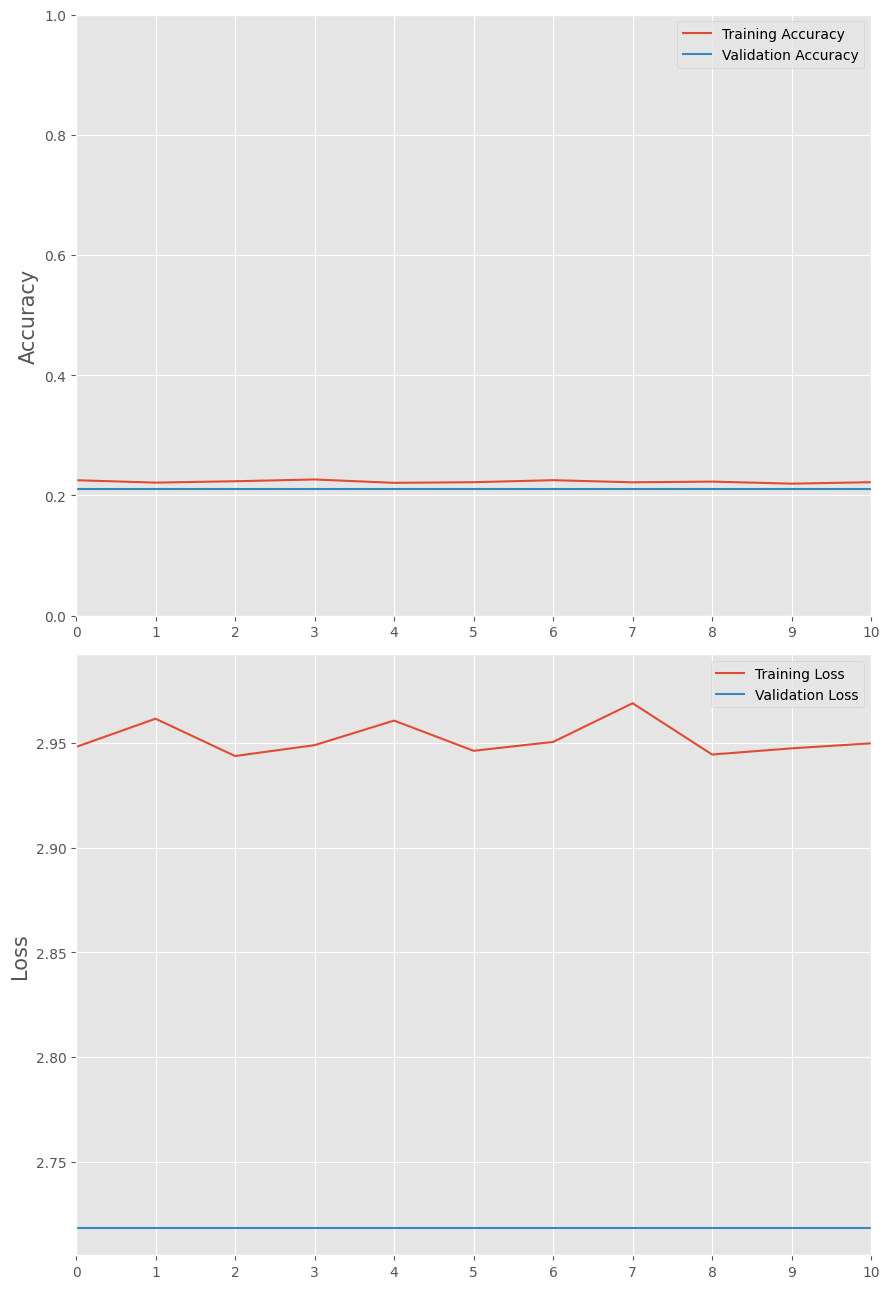

In [296]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_xv3_n, label='Training Accuracy')
axs[0].plot(test_acc_xv3_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_xv3_n, label='Training Loss')
axs[1].plot(test_loss_xv3_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("xv3 Training and Testing Loss")
plt.show()

In [297]:
np.array(scores_xv3).shape

(10, 302, 4)

In [298]:
y_pred_xv3 = np.argmax(scores_xv3,axis=2)

In [299]:
y_pred_xv3.shape

(10, 302)

In [300]:
from sklearn.metrics import accuracy_score
acc_scores_xv3 = []
for i in range(len(y_test_all_xv3)):
    acc_scores_xv3.append(accuracy_score(y_true = y_test_all_xv3[i],y_pred = y_pred_xv3[i]))

In [301]:
import gc
gc.collect()

23990

In [302]:
acc_scores_xv3

[0.1291390728476821,
 0.38079470198675497,
 0.1357615894039735,
 0.11589403973509933,
 0.3675496688741722,
 0.17549668874172186,
 0.19536423841059603,
 0.13245033112582782,
 0.12582781456953643,
 0.39072847682119205]

In [303]:
df_acc = pd.DataFrame([acc_scores_xv3])

df_acc.to_csv('xv3_accuracy', index=False)

df_acc = pd.read_csv('xv3_accuracy')

acc_scores_xv3 = df_acc.iloc[0].values

In [304]:
y_test_all_n = np.array(y_test_all_xv3)

y_pred_xv3_n = y_pred_xv3.flatten()
y_test_all_n = y_test_all_n.flatten()

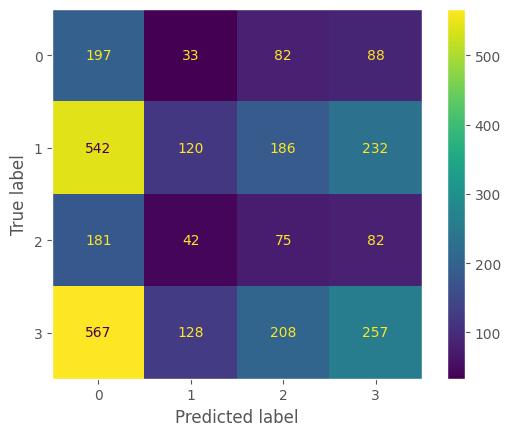

In [305]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_xv3_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("xv3")
plt.show()

In [306]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_xv3_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.49      0.21       400
           1       0.37      0.11      0.17      1080
           2       0.14      0.20      0.16       380
           3       0.39      0.22      0.28      1160

    accuracy                           0.21      3020
   macro avg       0.26      0.26      0.21      3020
weighted avg       0.32      0.21      0.22      3020



# EfficientNetV2L

In [307]:
import gc
gc.collect()

6229

In [308]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_env2l = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_env2l.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [309]:
def create_model_env2l():
    
    model_env2l = tf.keras.models.Sequential([
    tf.keras.applications.EfficientNetV2L(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_env2l.trainable = False
    return model_env2l

In [310]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_env2l = []
y_test_all_env2l = []
train_acc_env2l = []
test_acc_env2l = []
train_loss_env2l = []
test_loss_env2l = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_env2l.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_env2l = None
    model_env2l = create_model_env2l()
        
    model_env2l.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_env2l.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_env2l.predict(X_test)
    
    scores_env2l.append(x)
    train_acc_env2l.append(history.history["accuracy"])
    test_acc_env2l.append(history.history["val_accuracy"])
    train_loss_env2l.append(history.history["loss"])
    test_loss_env2l.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 36s 212ms/step - loss: 1.4305 - accuracy: 0.3083 - val_loss: 1.4035 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4306 - accuracy: 0.3009 - val_loss: 1.4035 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4242 - accuracy: 0.3136 - val_loss: 1.4035 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4249 - accuracy: 0.3197 - val_loss: 1.4035 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4283 - accuracy: 0.3074 - val_loss: 1.4035 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4341 - accuracy: 0.3025 - val_loss: 1.4035 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 7/100
77/77 [==============

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.4268 - accuracy: 0.3058
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.65 seconds
77/77 [==============================] - 14s 178ms/step - loss: 1.4268 - accuracy: 0.3058 - val_loss: 1.4035 - val_accuracy: 0.3897 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4244 - accuracy: 0.3123 - val_loss: 1.4035 - val_accuracy: 0.3897 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4238 - accuracy: 0.3148 - val_loss: 1.4035 - val_accuracy: 0.3897 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4279 - accuracy: 0.3115 - val_loss: 1.4035 - val_accuracy: 0.3897 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4310 - accuracy: 0.3091 - val_loss: 1.4035 - val_accuracy: 0.3897 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4281 - accuracy: 0.3025
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.63 seconds
77/77 [==============================] - 14s 177ms/step - loss: 1.4281 - accuracy: 0.3025 - val_loss: 1.4035 - val_accuracy: 0.3897 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4256 - accuracy: 0.3152 - val_loss: 1.4035 - val_accuracy: 0.3897 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4305 - accuracy: 0.3087 - val_loss: 1.4035 - val_accuracy: 0.3897 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 14s 176ms/step - loss: 1.4313 - accuracy: 0.3021 - val_loss: 1.4035 - val_accuracy: 0.3897 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4320 - accuracy: 0.3107 - val_loss: 1.4035 - val_accuracy: 0.3897 - lr: 4.

Epoch 13/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3153 - accuracy: 0.3655 - val_loss: 1.3395 - val_accuracy: 0.3382 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3200 - accuracy: 0.3659 - val_loss: 1.3395 - val_accuracy: 0.3382 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.3164 - accuracy: 0.3700
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 13.55 seconds
77/77 [==============================] - 14s 176ms/step - loss: 1.3164 - accuracy: 0.3700 - val_loss: 1.3395 - val_accuracy: 0.3382 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3163 - accuracy: 0.3708 - val_loss: 1.3395 - val_accuracy: 0.3382 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3180 - accuracy: 0.3614 - val_loss: 1.3395 - val_accuracy: 0.3382 - lr: 4

Epoch 41/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3161 - accuracy: 0.3712 - val_loss: 1.3395 - val_accuracy: 0.3382 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3204 - accuracy: 0.3635 - val_loss: 1.3395 - val_accuracy: 0.3382 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.3175 - accuracy: 0.3594
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 13.57 seconds
77/77 [==============================] - 14s 176ms/step - loss: 1.3175 - accuracy: 0.3594 - val_loss: 1.3395 - val_accuracy: 0.3382 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3173 - accuracy: 0.3741 - val_loss: 1.3395 - val_accuracy: 0.3382 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 13s 176ms/step - loss: 1.3196 - accuracy: 0.3675 - val_loss: 1.3395 - val_accuracy: 0.3382 - lr: 6.

Epoch 69/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3180 - accuracy: 0.3753 - val_loss: 1.3395 - val_accuracy: 0.3382 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3140 - accuracy: 0.3704 - val_loss: 1.3395 - val_accuracy: 0.3382 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.3185 - accuracy: 0.3729
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 13.56 seconds
77/77 [==============================] - 14s 176ms/step - loss: 1.3185 - accuracy: 0.3729 - val_loss: 1.3395 - val_accuracy: 0.3382 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3188 - accuracy: 0.3688 - val_loss: 1.3395 - val_accuracy: 0.3382 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3178 - accuracy: 0.3733 - val_loss: 1.3395 - val_accuracy: 0.3382 - lr: 1

Epoch 97/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3191 - accuracy: 0.3655 - val_loss: 1.3395 - val_accuracy: 0.3382 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3155 - accuracy: 0.3741 - val_loss: 1.3395 - val_accuracy: 0.3382 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.3159 - accuracy: 0.3765
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 13.39 seconds
77/77 [==============================] - 13s 174ms/step - loss: 1.3159 - accuracy: 0.3765 - val_loss: 1.3395 - val_accuracy: 0.3382 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 147ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 36s 211ms/step - loss: 1.4298 - accuracy: 0.1807 - val_loss: 1.4328 - val_accuracy: 0.1140 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 14s 177ms/

Epoch 25/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4297 - accuracy: 0.1705 - val_loss: 1.4328 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4335 - accuracy: 0.1766 - val_loss: 1.4328 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4306 - accuracy: 0.1791 - val_loss: 1.4328 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4303 - accuracy: 0.1823 - val_loss: 1.4328 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.4308 - accuracy: 0.1721
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 13.71 seconds
77/77 [==============================] - 14s 178ms/step - loss: 1.4308 - accuracy: 0.1721 - val_loss: 1.4328 - val_accuracy: 0.1140 - lr: 8

Epoch 53/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4316 - accuracy: 0.1742 - val_loss: 1.4328 - val_accuracy: 0.1140 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4339 - accuracy: 0.1582 - val_loss: 1.4328 - val_accuracy: 0.1140 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4336 - accuracy: 0.1705 - val_loss: 1.4328 - val_accuracy: 0.1140 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4343 - accuracy: 0.1770 - val_loss: 1.4328 - val_accuracy: 0.1140 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.4341 - accuracy: 0.1697
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.62 seconds
77/77 [==============================] - 14s 177ms/step - loss: 1.4341 - accuracy: 0.1697 - val_loss: 1.4328 - val_accuracy: 0.1140 - lr: 1

Epoch 81/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4345 - accuracy: 0.1832 - val_loss: 1.4328 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4315 - accuracy: 0.1770 - val_loss: 1.4328 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4325 - accuracy: 0.1754 - val_loss: 1.4328 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4354 - accuracy: 0.1586 - val_loss: 1.4328 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4312 - accuracy: 0.1672
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.51 seconds
77/77 [==============================] - 14s 176ms/step - loss: 1.4312 - accuracy: 0.1672 - val_loss: 1.4328 - val_accuracy: 0.1140 - lr: 2.

Epoch 9/100
77/77 [==============================] - 14s 176ms/step - loss: 1.4606 - accuracy: 0.1415 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4637 - accuracy: 0.1402 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4584 - accuracy: 0.1435 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4576 - accuracy: 0.1415 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4571 - accuracy: 0.1435 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4587 - accuracy: 0.1398 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 2.0000e-04
Epoch 15/100
77/77 [=========

Epoch 37/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4578 - accuracy: 0.1460 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 13s 174ms/step - loss: 1.4553 - accuracy: 0.1472 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 13s 173ms/step - loss: 1.4574 - accuracy: 0.1447 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 13s 173ms/step - loss: 1.4516 - accuracy: 0.1451 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 13s 174ms/step - loss: 1.4582 - accuracy: 0.1374 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4570 - accuracy: 0.1406 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 3.2000e-07
Epoch 43/100
77/77 [========

Epoch 65/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4578 - accuracy: 0.1443 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4604 - accuracy: 0.1357 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4629 - accuracy: 0.1410 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4592 - accuracy: 0.1419 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4600 - accuracy: 0.1464 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4583 - accuracy: 0.1394 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 5.1200e-10
Epoch 71/100
77/77 [========

Epoch 93/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4614 - accuracy: 0.1423 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4597 - accuracy: 0.1410 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4552 - accuracy: 0.1427 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4609 - accuracy: 0.1447 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4579 - accuracy: 0.1427 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4564 - accuracy: 0.1427 - val_loss: 1.4362 - val_accuracy: 0.1360 - lr: 8.1920e-13
Epoch 99/100
77/77 [========

77/77 [==============================] - 14s 177ms/step - loss: 1.2980 - accuracy: 0.3581 - val_loss: 1.3037 - val_accuracy: 0.3493 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.2983 - accuracy: 0.3602
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 13.58 seconds
77/77 [==============================] - 14s 177ms/step - loss: 1.2983 - accuracy: 0.3602 - val_loss: 1.3037 - val_accuracy: 0.3493 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 14s 180ms/step - loss: 1.2983 - accuracy: 0.3606 - val_loss: 1.3037 - val_accuracy: 0.3493 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 14s 179ms/step - loss: 1.2938 - accuracy: 0.3639 - val_loss: 1.3037 - val_accuracy: 0.3493 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3010 - accuracy: 0.3602 - val_loss: 1.3037 - val_accuracy: 0.3493 - lr: 8.0000e-06
Epoc

Epoch 49/100
77/77 [==============================] - 14s 178ms/step - loss: 1.2953 - accuracy: 0.3618 - val_loss: 1.3037 - val_accuracy: 0.3493 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.2960 - accuracy: 0.3639
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 13.75 seconds
77/77 [==============================] - 14s 179ms/step - loss: 1.2960 - accuracy: 0.3639 - val_loss: 1.3037 - val_accuracy: 0.3493 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 14s 178ms/step - loss: 1.2985 - accuracy: 0.3585 - val_loss: 1.3037 - val_accuracy: 0.3493 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 14s 179ms/step - loss: 1.2949 - accuracy: 0.3549 - val_loss: 1.3037 - val_accuracy: 0.3493 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3003 - accuracy: 0.3524 - val_loss: 1.3037 - val_accuracy: 0.3493 - lr: 1

Epoch 77/100
77/77 [==============================] - 14s 178ms/step - loss: 1.2954 - accuracy: 0.3716 - val_loss: 1.3037 - val_accuracy: 0.3493 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.2997 - accuracy: 0.3577
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 13.82 seconds
77/77 [==============================] - 14s 180ms/step - loss: 1.2997 - accuracy: 0.3577 - val_loss: 1.3037 - val_accuracy: 0.3493 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3022 - accuracy: 0.3545 - val_loss: 1.3037 - val_accuracy: 0.3493 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 14s 179ms/step - loss: 1.2955 - accuracy: 0.3630 - val_loss: 1.3037 - val_accuracy: 0.3493 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 14s 179ms/step - loss: 1.2977 - accuracy: 0.3590 - val_loss: 1.3037 - val_accuracy: 0.3493 - lr: 2

Epoch 5/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3077 - accuracy: 0.3774 - val_loss: 1.2762 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3028 - accuracy: 0.3794 - val_loss: 1.2762 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3053 - accuracy: 0.3774 - val_loss: 1.2762 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.3040 - accuracy: 0.3778
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 13.65 seconds
77/77 [==============================] - 14s 178ms/step - loss: 1.3040 - accuracy: 0.3778 - val_loss: 1.2762 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 14s 177ms/step - loss: 1.2999 - accuracy: 0.3778 - val_loss: 1.2762 - val_accuracy: 0.4338 - lr: 2.0000e-04
Epoch 10/100


Epoch 33/100
77/77 [==============================] - 13s 174ms/step - loss: 1.3020 - accuracy: 0.3778 - val_loss: 1.2762 - val_accuracy: 0.4338 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3066 - accuracy: 0.3790 - val_loss: 1.2762 - val_accuracy: 0.4338 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3055 - accuracy: 0.3769 - val_loss: 1.2762 - val_accuracy: 0.4338 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 1.3036 - accuracy: 0.3786
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 13.55 seconds
77/77 [==============================] - 14s 176ms/step - loss: 1.3036 - accuracy: 0.3786 - val_loss: 1.2762 - val_accuracy: 0.4338 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3054 - accuracy: 0.3753 - val_loss: 1.2762 - val_accuracy: 0.4338 - lr: 3.

Epoch 61/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3042 - accuracy: 0.3782 - val_loss: 1.2762 - val_accuracy: 0.4338 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3027 - accuracy: 0.3790 - val_loss: 1.2762 - val_accuracy: 0.4338 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3082 - accuracy: 0.3782 - val_loss: 1.2762 - val_accuracy: 0.4338 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.3055 - accuracy: 0.3778
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 13.59 seconds
77/77 [==============================] - 14s 177ms/step - loss: 1.3055 - accuracy: 0.3778 - val_loss: 1.2762 - val_accuracy: 0.4338 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3029 - accuracy: 0.3774 - val_loss: 1.2762 - val_accuracy: 0.4338 - lr: 5.12

Epoch 89/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3046 - accuracy: 0.3765 - val_loss: 1.2762 - val_accuracy: 0.4338 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3024 - accuracy: 0.3774 - val_loss: 1.2762 - val_accuracy: 0.4338 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3010 - accuracy: 0.3790 - val_loss: 1.2762 - val_accuracy: 0.4338 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 1.2990 - accuracy: 0.3782
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 13.63 seconds
77/77 [==============================] - 14s 177ms/step - loss: 1.2990 - accuracy: 0.3782 - val_loss: 1.2762 - val_accuracy: 0.4338 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3058 - accuracy: 0.3769 - val_loss: 1.2762 - val_accuracy: 0.4338 - lr: 8.

Epoch 17/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3595 - accuracy: 0.3393 - val_loss: 1.3485 - val_accuracy: 0.3676 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3617 - accuracy: 0.3377 - val_loss: 1.3485 - val_accuracy: 0.3676 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3594 - accuracy: 0.3401 - val_loss: 1.3485 - val_accuracy: 0.3676 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3612 - accuracy: 0.3451 - val_loss: 1.3485 - val_accuracy: 0.3676 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3662 - accuracy: 0.3279 - val_loss: 1.3485 - val_accuracy: 0.3676 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.3610 - accuracy: 0.3299
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for ep

Epoch 45/100
77/77 [==============================] - 13s 176ms/step - loss: 1.3594 - accuracy: 0.3381 - val_loss: 1.3485 - val_accuracy: 0.3676 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3601 - accuracy: 0.3401 - val_loss: 1.3485 - val_accuracy: 0.3676 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3614 - accuracy: 0.3369 - val_loss: 1.3485 - val_accuracy: 0.3676 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3642 - accuracy: 0.3267 - val_loss: 1.3485 - val_accuracy: 0.3676 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3573 - accuracy: 0.3422 - val_loss: 1.3485 - val_accuracy: 0.3676 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.3586 - accuracy: 0.3549
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for e

Epoch 73/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3557 - accuracy: 0.3483 - val_loss: 1.3485 - val_accuracy: 0.3676 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3613 - accuracy: 0.3406 - val_loss: 1.3485 - val_accuracy: 0.3676 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3617 - accuracy: 0.3426 - val_loss: 1.3485 - val_accuracy: 0.3676 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3576 - accuracy: 0.3430 - val_loss: 1.3485 - val_accuracy: 0.3676 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3644 - accuracy: 0.3234 - val_loss: 1.3485 - val_accuracy: 0.3676 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.3619 - accuracy: 0.3377
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for e

10/10 [==============================] - 4s 145ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 37s 212ms/step - loss: 1.4326 - accuracy: 0.1370 - val_loss: 1.4256 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4333 - accuracy: 0.1378 - val_loss: 1.4256 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4328 - accuracy: 0.1365 - val_loss: 1.4256 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4364 - accuracy: 0.1325 - val_loss: 1.4256 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4327 - accuracy: 0.1333 - val_loss: 1.4256 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4339 - accuracy: 0.1378 - val_loss: 1.4256 - val_accuracy

77/77 [==============================] - ETA: 0s - loss: 1.4336 - accuracy: 0.1341
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 13.70 seconds
77/77 [==============================] - 14s 178ms/step - loss: 1.4336 - accuracy: 0.1341 - val_loss: 1.4256 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4379 - accuracy: 0.1353 - val_loss: 1.4256 - val_accuracy: 0.1360 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4347 - accuracy: 0.1406 - val_loss: 1.4256 - val_accuracy: 0.1360 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4339 - accuracy: 0.1316 - val_loss: 1.4256 - val_accuracy: 0.1360 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4372 - accuracy: 0.1316 - val_loss: 1.4256 - val_accuracy: 0.1360 - lr: 1.6000e-06
Epo

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.4380 - accuracy: 0.1353
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.71 seconds
77/77 [==============================] - 14s 178ms/step - loss: 1.4380 - accuracy: 0.1353 - val_loss: 1.4256 - val_accuracy: 0.1360 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4351 - accuracy: 0.1357 - val_loss: 1.4256 - val_accuracy: 0.1360 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4313 - accuracy: 0.1321 - val_loss: 1.4256 - val_accuracy: 0.1360 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4349 - accuracy: 0.1288 - val_loss: 1.4256 - val_accuracy: 0.1360 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4357 - accuracy: 0.1357 - val_loss: 1.4256 - val_accuracy: 0.1360 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4319 - accuracy: 0.1353
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.70 seconds
77/77 [==============================] - 14s 178ms/step - loss: 1.4319 - accuracy: 0.1353 - val_loss: 1.4256 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4337 - accuracy: 0.1374 - val_loss: 1.4256 - val_accuracy: 0.1360 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4347 - accuracy: 0.1370 - val_loss: 1.4256 - val_accuracy: 0.1360 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4371 - accuracy: 0.1325 - val_loss: 1.4256 - val_accuracy: 0.1360 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4289 - accuracy: 0.1374 - val_loss: 1.4256 - val_accuracy: 0.1360 - lr: 4.

Epoch 13/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3937 - accuracy: 0.2522 - val_loss: 1.3937 - val_accuracy: 0.2169 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3982 - accuracy: 0.2416 - val_loss: 1.3937 - val_accuracy: 0.2169 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.3992 - accuracy: 0.2355
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 13.56 seconds
77/77 [==============================] - 14s 176ms/step - loss: 1.3992 - accuracy: 0.2355 - val_loss: 1.3937 - val_accuracy: 0.2169 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3965 - accuracy: 0.2510 - val_loss: 1.3937 - val_accuracy: 0.2169 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3950 - accuracy: 0.2625 - val_loss: 1.3937 - val_accuracy: 0.2169 - lr: 4

Epoch 41/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3925 - accuracy: 0.2498 - val_loss: 1.3937 - val_accuracy: 0.2169 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3964 - accuracy: 0.2502 - val_loss: 1.3937 - val_accuracy: 0.2169 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.3995 - accuracy: 0.2478
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 13.64 seconds
77/77 [==============================] - 14s 177ms/step - loss: 1.3995 - accuracy: 0.2478 - val_loss: 1.3937 - val_accuracy: 0.2169 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3981 - accuracy: 0.2547 - val_loss: 1.3937 - val_accuracy: 0.2169 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4038 - accuracy: 0.2461 - val_loss: 1.3937 - val_accuracy: 0.2169 - lr: 6.

Epoch 69/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4038 - accuracy: 0.2289 - val_loss: 1.3937 - val_accuracy: 0.2169 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4004 - accuracy: 0.2363 - val_loss: 1.3937 - val_accuracy: 0.2169 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.3981 - accuracy: 0.2465
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 13.67 seconds
77/77 [==============================] - 14s 178ms/step - loss: 1.3981 - accuracy: 0.2465 - val_loss: 1.3937 - val_accuracy: 0.2169 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3993 - accuracy: 0.2453 - val_loss: 1.3937 - val_accuracy: 0.2169 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4010 - accuracy: 0.2298 - val_loss: 1.3937 - val_accuracy: 0.2169 - lr: 1

Epoch 97/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3984 - accuracy: 0.2396 - val_loss: 1.3937 - val_accuracy: 0.2169 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3932 - accuracy: 0.2645 - val_loss: 1.3937 - val_accuracy: 0.2169 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.4006 - accuracy: 0.2314
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 13.70 seconds
77/77 [==============================] - 14s 178ms/step - loss: 1.4006 - accuracy: 0.2314 - val_loss: 1.3937 - val_accuracy: 0.2169 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 146ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 26s 209ms/step - loss: 1.5294 - accuracy: 0.1995 - val_loss: 1.5063 - val_accuracy: 0.1434 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 175ms

Epoch 25/100
77/77 [==============================] - 14s 177ms/step - loss: 1.5327 - accuracy: 0.1922 - val_loss: 1.5063 - val_accuracy: 0.1434 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 13s 175ms/step - loss: 1.5329 - accuracy: 0.2036 - val_loss: 1.5063 - val_accuracy: 0.1434 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 13s 175ms/step - loss: 1.5388 - accuracy: 0.1909 - val_loss: 1.5063 - val_accuracy: 0.1434 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 13s 175ms/step - loss: 1.5339 - accuracy: 0.1864 - val_loss: 1.5063 - val_accuracy: 0.1434 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.5372 - accuracy: 0.1926
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 13.67 seconds
77/77 [==============================] - 14s 178ms/step - loss: 1.5372 - accuracy: 0.1926 - val_loss: 1.5063 - val_accuracy: 0.1434 - lr: 8

Epoch 53/100
77/77 [==============================] - 13s 175ms/step - loss: 1.5348 - accuracy: 0.2048 - val_loss: 1.5063 - val_accuracy: 0.1434 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 14s 176ms/step - loss: 1.5300 - accuracy: 0.1999 - val_loss: 1.5063 - val_accuracy: 0.1434 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 14s 176ms/step - loss: 1.5322 - accuracy: 0.1860 - val_loss: 1.5063 - val_accuracy: 0.1434 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 14s 177ms/step - loss: 1.5338 - accuracy: 0.1954 - val_loss: 1.5063 - val_accuracy: 0.1434 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.5313 - accuracy: 0.1934
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.57 seconds
77/77 [==============================] - 14s 177ms/step - loss: 1.5313 - accuracy: 0.1934 - val_loss: 1.5063 - val_accuracy: 0.1434 - lr: 1

Epoch 81/100
77/77 [==============================] - 14s 176ms/step - loss: 1.5347 - accuracy: 0.1987 - val_loss: 1.5063 - val_accuracy: 0.1434 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 14s 177ms/step - loss: 1.5356 - accuracy: 0.1872 - val_loss: 1.5063 - val_accuracy: 0.1434 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 14s 177ms/step - loss: 1.5364 - accuracy: 0.1905 - val_loss: 1.5063 - val_accuracy: 0.1434 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 14s 178ms/step - loss: 1.5379 - accuracy: 0.1860 - val_loss: 1.5063 - val_accuracy: 0.1434 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.5313 - accuracy: 0.1934
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.64 seconds
77/77 [==============================] - 14s 177ms/step - loss: 1.5313 - accuracy: 0.1934 - val_loss: 1.5063 - val_accuracy: 0.1434 - lr: 2.

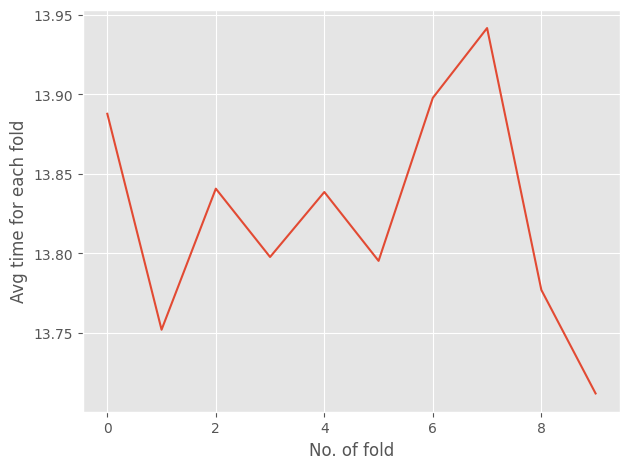

In [311]:
import matplotlib.pyplot as plt

times_env2l_n = np.zeros((10,100))
for i, row in enumerate(times_env2l):
    times_env2l_n[i, :len(row)] = row

times_env2l_n_n = np.mean(times_env2l_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_env2l_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("env2l times")
plt.show()

In [312]:
train_acc_env2l_n = np.zeros((10,100))
for i, row in enumerate(train_acc_env2l):
    train_acc_env2l_n[i, :len(row)] = row
    
test_acc_env2l_n = np.zeros((10,100))
for i, row in enumerate(test_acc_env2l):
    test_acc_env2l_n[i, :len(row)] = row
    
train_loss_env2l_n = np.zeros((10,100))
for i, row in enumerate(train_loss_env2l):
    train_loss_env2l_n[i, :len(row)] = row
    
test_loss_env2l_n = np.zeros((10,100))
for i, row in enumerate(test_loss_env2l):
    test_loss_env2l_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_env2l_n = np.mean(train_acc_env2l_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_env2l_n = np.mean(test_acc_env2l_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_env2l_n = np.mean(train_loss_env2l_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_env2l_n = np.mean(test_loss_env2l_n,axis=0)

In [313]:
data = [train_acc_env2l_n,test_acc_env2l_n,train_loss_env2l_n,test_loss_env2l_n]

df = pd.DataFrame(data)
df.to_csv('env2l_acc', index=False)
df = pd.read_csv('env2l_acc')

train_acc_env2l_n = df.iloc[0]
test_acc_env2l_n = df.iloc[1]
train_loss_env2l_n = df.iloc[2]
test_loss_env2l_n = df.iloc[3]


df_t = pd.DataFrame([times_env2l_n_n])
df_t.to_csv('env2l_times', index=False)
df_t = pd.read_csv('env2l_times')

times_env2l_n_n = df_t.iloc[0]

In [314]:
train_acc_env2l_n

0     0.264759
1     0.263941
2     0.265985
3     0.267866
4     0.263001
        ...   
95    0.265863
96    0.265086
97    0.265617
98    0.264105
99    0.265495
Name: 0, Length: 100, dtype: float64

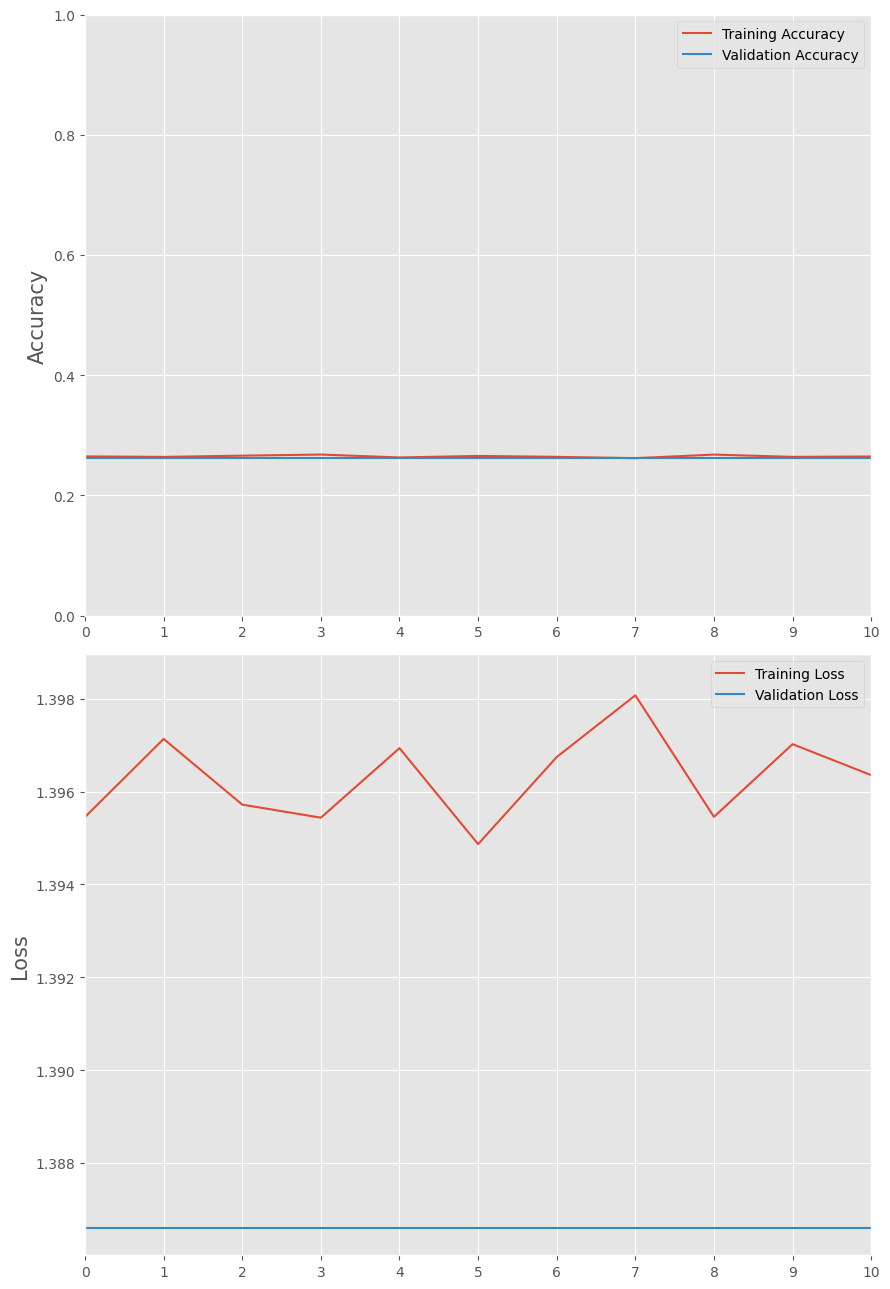

In [315]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_env2l_n, label='Training Accuracy')
axs[0].plot(test_acc_env2l_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_env2l_n, label='Training Loss')
axs[1].plot(test_loss_env2l_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("env2l Training and Testing Loss")
plt.show()

In [316]:
np.array(scores_env2l).shape

(10, 302, 4)

In [317]:
y_pred_env2l = np.argmax(scores_env2l,axis=2)

In [318]:
y_pred_env2l.shape

(10, 302)

In [319]:
from sklearn.metrics import accuracy_score
acc_scores_env2l = []
for i in range(len(y_test_all_env2l)):
    acc_scores_env2l.append(accuracy_score(y_true = y_test_all_env2l[i],y_pred = y_pred_env2l[i]))

In [320]:
import gc
gc.collect()

23637

In [321]:
acc_scores_env2l

[0.3543046357615894,
 0.38079470198675497,
 0.1390728476821192,
 0.13245033112582782,
 0.3576158940397351,
 0.3841059602649007,
 0.3543046357615894,
 0.12582781456953643,
 0.1986754966887417,
 0.16556291390728478]

In [322]:
df_acc = pd.DataFrame([acc_scores_env2l])

df_acc.to_csv('env2l_accuracy', index=False)

df_acc = pd.read_csv('env2l_accuracy')

acc_scores_env2l = df_acc.iloc[0].values

In [323]:
y_test_all_n = np.array(y_test_all_env2l)

y_pred_env2l_n = y_pred_env2l.flatten()
y_test_all_n = y_test_all_n.flatten()

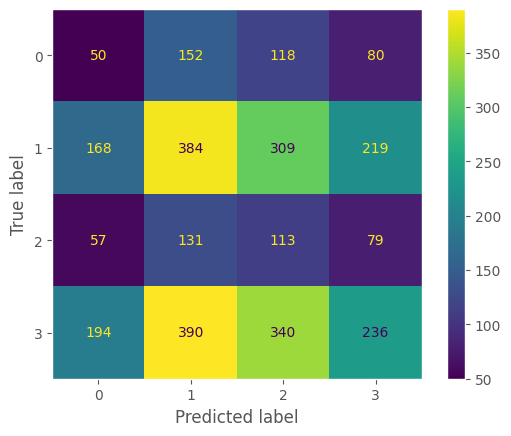

In [324]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_env2l_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("env2l")

plt.show()

In [325]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_env2l_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.11      0.12      0.12       400
           1       0.36      0.36      0.36      1080
           2       0.13      0.30      0.18       380
           3       0.38      0.20      0.27      1160

    accuracy                           0.26      3020
   macro avg       0.25      0.25      0.23      3020
weighted avg       0.31      0.26      0.27      3020



# NasNetLarge

In [326]:
import gc
gc.collect()

6127

In [327]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_nnl = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_nnl.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [328]:
import gc
gc.collect()

5

In [329]:
def create_model_nnl():
    
    model_nnl = tf.keras.models.Sequential([
    tf.keras.applications.NASNetLarge(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_nnl.trainable = False
    return model_nnl

In [330]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nnl = []
y_test_all_nnl = []
train_acc_nnl = []
test_acc_nnl = []
train_loss_nnl = []
test_loss_nnl = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_nnl.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_nnl = None
    model_nnl = create_model_nnl()
        
    model_nnl.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_nnl.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_nnl.predict(X_test)
    
    scores_nnl.append(x)
    train_acc_nnl.append(history.history["accuracy"])
    test_acc_nnl.append(history.history["val_accuracy"])
    train_loss_nnl.append(history.history["loss"])
    test_loss_nnl.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 22s 191ms/step - loss: 1.9519 - accuracy: 0.3132 - val_loss: 1.5903 - val_accuracy: 0.4007 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 12s 159ms/step - loss: 1.9381 - accuracy: 0.3316 - val_loss: 1.5903 - val_accuracy: 0.4007 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 12s 160ms/step - loss: 1.9318 - accuracy: 0.3091 - val_loss: 1.5903 - val_accuracy: 0.4007 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 12s 159ms/step - loss: 1.9061 - accuracy: 0.3197 - val_loss: 1.5903 - val_accuracy: 0.4007 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 12s 159ms/step - loss: 1.9519 - accuracy: 0.3152 - val_loss: 1.5903 - val_accuracy: 0.4007 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 12s 160ms/step - loss: 1.9384 - accuracy: 0.3111 - val_loss: 1.5903 - val_accuracy: 0.4007 - lr: 0.0010
Epoch 7/100
77/77 [==============

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.9360 - accuracy: 0.3091
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 12.49 seconds
77/77 [==============================] - 12s 162ms/step - loss: 1.9360 - accuracy: 0.3091 - val_loss: 1.5903 - val_accuracy: 0.4007 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 12s 162ms/step - loss: 1.9052 - accuracy: 0.3303 - val_loss: 1.5903 - val_accuracy: 0.4007 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 12s 162ms/step - loss: 1.9289 - accuracy: 0.3152 - val_loss: 1.5903 - val_accuracy: 0.4007 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 12s 162ms/step - loss: 1.9300 - accuracy: 0.3262 - val_loss: 1.5903 - val_accuracy: 0.4007 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 13s 163ms/step - loss: 1.9804 - accuracy: 0.3038 - val_loss: 1.5903 - val_accuracy: 0.4007 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.9344 - accuracy: 0.3299
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.49 seconds
77/77 [==============================] - 12s 162ms/step - loss: 1.9344 - accuracy: 0.3299 - val_loss: 1.5903 - val_accuracy: 0.4007 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 13s 163ms/step - loss: 1.9098 - accuracy: 0.3152 - val_loss: 1.5903 - val_accuracy: 0.4007 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 12s 163ms/step - loss: 1.9158 - accuracy: 0.3295 - val_loss: 1.5903 - val_accuracy: 0.4007 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 13s 163ms/step - loss: 1.9305 - accuracy: 0.3205 - val_loss: 1.5903 - val_accuracy: 0.4007 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 13s 163ms/step - loss: 1.9475 - accuracy: 0.3152 - val_loss: 1.5903 - val_accuracy: 0.4007 - lr: 4.

Epoch 13/100
77/77 [==============================] - 13s 163ms/step - loss: 2.2001 - accuracy: 0.1926 - val_loss: 1.8849 - val_accuracy: 0.1618 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 163ms/step - loss: 2.2136 - accuracy: 0.2016 - val_loss: 1.8849 - val_accuracy: 0.1618 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 2.1820 - accuracy: 0.2011
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 12.59 seconds
77/77 [==============================] - 13s 164ms/step - loss: 2.1820 - accuracy: 0.2011 - val_loss: 1.8849 - val_accuracy: 0.1618 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 13s 164ms/step - loss: 2.1989 - accuracy: 0.1995 - val_loss: 1.8849 - val_accuracy: 0.1618 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 13s 164ms/step - loss: 2.1924 - accuracy: 0.1950 - val_loss: 1.8849 - val_accuracy: 0.1618 - lr: 4

Epoch 41/100
77/77 [==============================] - 13s 163ms/step - loss: 2.2177 - accuracy: 0.1872 - val_loss: 1.8849 - val_accuracy: 0.1618 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 12s 162ms/step - loss: 2.2219 - accuracy: 0.1868 - val_loss: 1.8849 - val_accuracy: 0.1618 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 2.2027 - accuracy: 0.1962
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 12.48 seconds
77/77 [==============================] - 12s 162ms/step - loss: 2.2027 - accuracy: 0.1962 - val_loss: 1.8849 - val_accuracy: 0.1618 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 13s 163ms/step - loss: 2.1807 - accuracy: 0.1979 - val_loss: 1.8849 - val_accuracy: 0.1618 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 13s 163ms/step - loss: 2.2186 - accuracy: 0.1881 - val_loss: 1.8849 - val_accuracy: 0.1618 - lr: 6.

Epoch 69/100
77/77 [==============================] - 13s 163ms/step - loss: 2.2051 - accuracy: 0.1926 - val_loss: 1.8849 - val_accuracy: 0.1618 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 12s 163ms/step - loss: 2.1988 - accuracy: 0.1954 - val_loss: 1.8849 - val_accuracy: 0.1618 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 2.1768 - accuracy: 0.1815
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 12.45 seconds
77/77 [==============================] - 12s 162ms/step - loss: 2.1768 - accuracy: 0.1815 - val_loss: 1.8849 - val_accuracy: 0.1618 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 12s 162ms/step - loss: 2.1731 - accuracy: 0.2077 - val_loss: 1.8849 - val_accuracy: 0.1618 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 12s 162ms/step - loss: 2.1835 - accuracy: 0.1962 - val_loss: 1.8849 - val_accuracy: 0.1618 - lr: 1

Epoch 97/100
77/77 [==============================] - 12s 162ms/step - loss: 2.1650 - accuracy: 0.1905 - val_loss: 1.8849 - val_accuracy: 0.1618 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 12s 162ms/step - loss: 2.2087 - accuracy: 0.1942 - val_loss: 1.8849 - val_accuracy: 0.1618 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 2.1919 - accuracy: 0.1852
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 12.46 seconds
77/77 [==============================] - 12s 162ms/step - loss: 2.1919 - accuracy: 0.1852 - val_loss: 1.8849 - val_accuracy: 0.1618 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 140ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 22s 191ms/step - loss: 1.6767 - accuracy: 0.3340 - val_loss: 1.5573 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 12s 160ms/

Epoch 25/100
77/77 [==============================] - 12s 162ms/step - loss: 1.6547 - accuracy: 0.3279 - val_loss: 1.5573 - val_accuracy: 0.3456 - lr: 8.0000e-06
Epoch 26/100
46/77 [================>.............] - ETA: 4s - loss: 1.6760 - accuracy: 0.3281

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



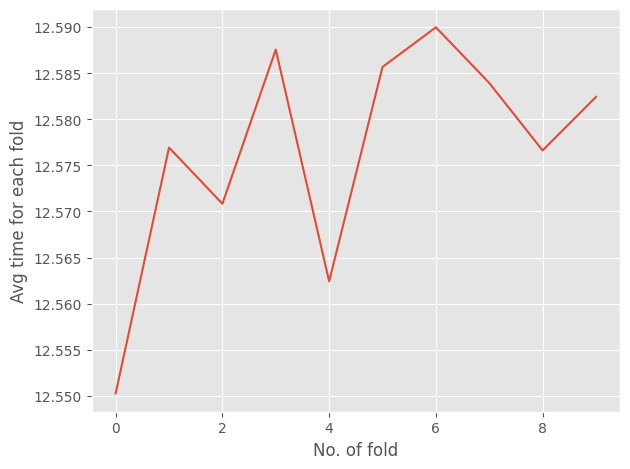

In [392]:
import matplotlib.pyplot as plt

times_nnl_n = np.zeros((10,100))
for i, row in enumerate(times_nnl):
    times_nnl_n[i, :len(row)] = row

times_nnl_n_n = np.mean(times_nnl_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_nnl_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("nnl times")
plt.show()

In [393]:
train_acc_nnl_n = np.zeros((10,100))
for i, row in enumerate(train_acc_nnl):
    train_acc_nnl_n[i, :len(row)] = row
    
test_acc_nnl_n = np.zeros((10,100))
for i, row in enumerate(test_acc_nnl):
    test_acc_nnl_n[i, :len(row)] = row
    
train_loss_nnl_n = np.zeros((10,100))
for i, row in enumerate(train_loss_nnl):
    train_loss_nnl_n[i, :len(row)] = row
    
test_loss_nnl_n = np.zeros((10,100))
for i, row in enumerate(test_loss_nnl):
    test_loss_nnl_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_nnl_n = np.mean(train_acc_nnl_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_nnl_n = np.mean(test_acc_nnl_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_nnl_n = np.mean(train_loss_nnl_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_nnl_n = np.mean(test_loss_nnl_n,axis=0)

In [394]:
data = [train_acc_nnl_n,test_acc_nnl_n,train_loss_nnl_n,test_loss_nnl_n]

df = pd.DataFrame(data)
df.to_csv('nnl_acc', index=False)
df = pd.read_csv('nnl_acc')

train_acc_nnl_n = df.iloc[0]
test_acc_nnl_n = df.iloc[1]
train_loss_nnl_n = df.iloc[2]
test_loss_nnl_n = df.iloc[3]


df_t = pd.DataFrame([times_nnl_n_n])
df_t.to_csv('nnl_times', index=False)
df_t = pd.read_csv('nnl_times')

times_nnl_n_n = df_t.iloc[0]

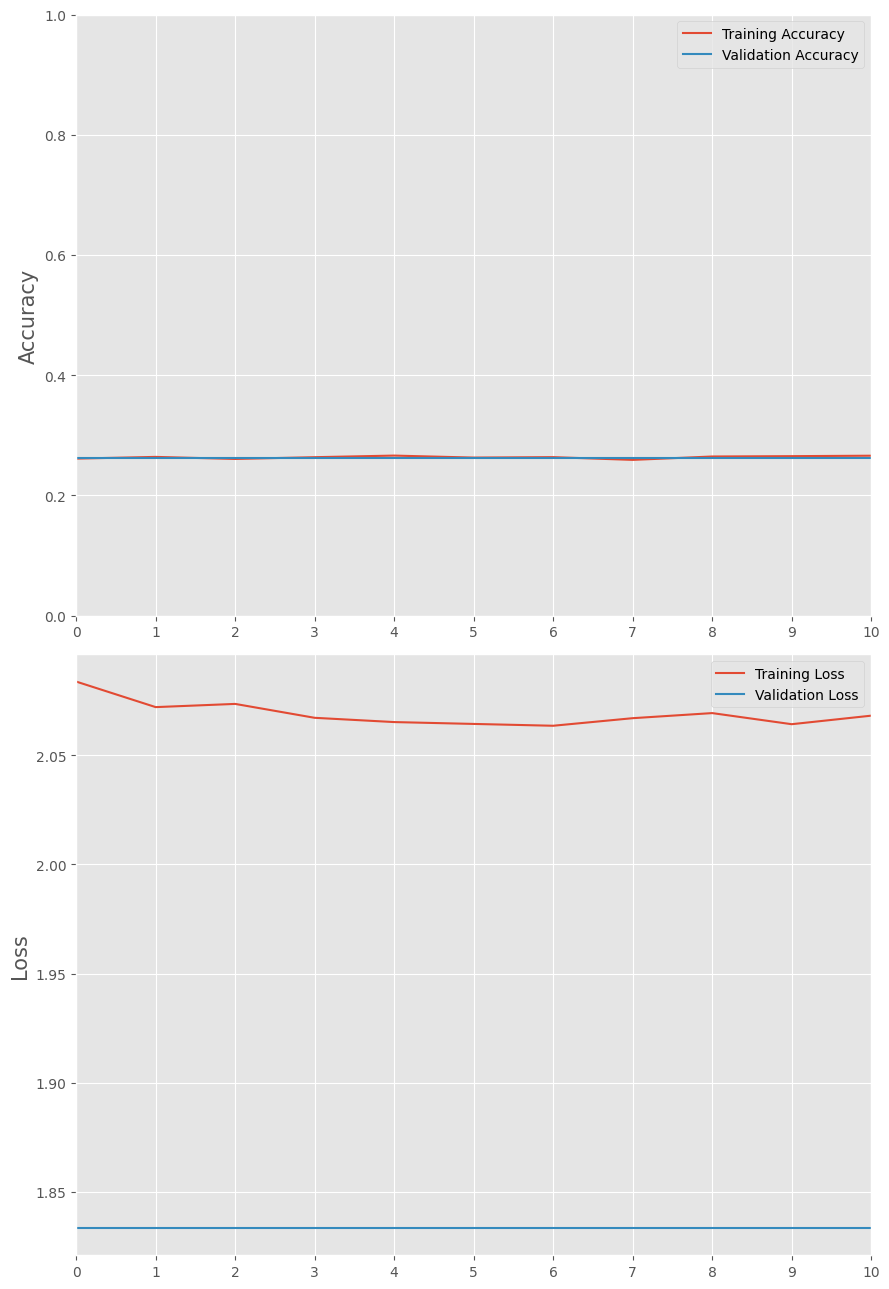

In [395]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_nnl_n, label='Training Accuracy')
axs[0].plot(test_acc_nnl_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_nnl_n, label='Training Loss')
axs[1].plot(test_loss_nnl_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("nnl Training and Testing Loss")
plt.show()

In [396]:
import gc
gc.collect()

26778

In [397]:
np.array(scores_nnl).shape

(10, 302, 4)

In [398]:
y_pred_nnl = np.argmax(scores_nnl,axis=2)

In [399]:
y_pred_nnl.shape

(10, 302)

In [400]:
from sklearn.metrics import accuracy_score
acc_scores_nnl = []
for i in range(len(y_test_all_nnl)):
    acc_scores_nnl.append(accuracy_score(y_true = y_test_all_nnl[i],y_pred = y_pred_nnl[i]))

In [401]:
acc_scores_nnl

[0.3576158940397351,
 0.13245033112582782,
 0.3576158940397351,
 0.11589403973509933,
 0.31125827814569534,
 0.15894039735099338,
 0.3841059602649007,
 0.24503311258278146,
 0.12582781456953643,
 0.38079470198675497]

In [402]:
df_acc = pd.DataFrame([acc_scores_nnl])

df_acc.to_csv('nnl_accuracy', index=False)

df_acc = pd.read_csv('nnl_accuracy')

acc_scores_nnl = df_acc.iloc[0].values

In [403]:
y_test_all_n = np.array(y_test_all_nnl)

y_pred_nnl_n = y_pred_nnl.flatten()
y_test_all_n = y_test_all_n.flatten()

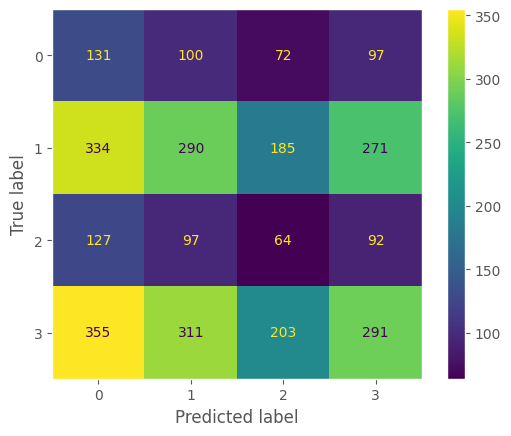

In [404]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_nnl_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("nnl")

plt.show()

In [405]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_nnl_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.14      0.33      0.19       400
           1       0.36      0.27      0.31      1080
           2       0.12      0.17      0.14       380
           3       0.39      0.25      0.30      1160

    accuracy                           0.26      3020
   macro avg       0.25      0.25      0.24      3020
weighted avg       0.31      0.26      0.27      3020



# NasNetMobile

In [345]:
import gc
gc.collect()

In [346]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_nnb = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_nnb.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [347]:
def create_model_nnb():
    
    model_nnb = tf.keras.models.Sequential([
    tf.keras.applications.NASNetMobile(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_nnb.trainable = False
    return model_nnb

In [348]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nnb = []
y_test_all_nnb = []
train_acc_nnb = []
test_acc_nnb = []
train_loss_nnb = []
test_loss_nnb = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_nnb.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_nnb = None
    model_nnb = create_model_nnb()
        
    model_nnb.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_nnb.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_nnb.predict(X_test)
    
    scores_nnb.append(x)
    train_acc_nnb.append(history.history["accuracy"])
    test_acc_nnb.append(history.history["val_accuracy"])
    train_loss_nnb.append(history.history["loss"])
    test_loss_nnb.append(history.history["val_loss"])
    
    gc.collect()

In [406]:
import gc
gc.collect()

6416

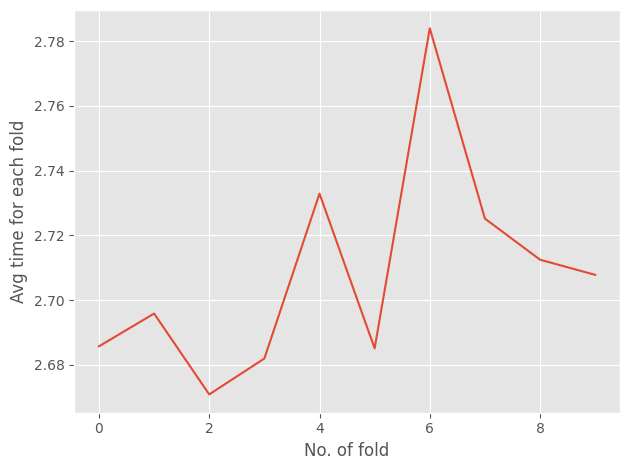

In [407]:
import matplotlib.pyplot as plt

times_nnb_n = np.zeros((10,100))
for i, row in enumerate(times_nnb):
    times_nnb_n[i, :len(row)] = row

times_nnb_n_n = np.mean(times_nnb_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_nnb_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("nnb times")
plt.show()

In [408]:
train_acc_nnb_n = np.zeros((10,100))
for i, row in enumerate(train_acc_nnb):
    train_acc_nnb_n[i, :len(row)] = row
    
test_acc_nnb_n = np.zeros((10,100))
for i, row in enumerate(test_acc_nnb):
    test_acc_nnb_n[i, :len(row)] = row
    
train_loss_nnb_n = np.zeros((10,100))
for i, row in enumerate(train_loss_nnb):
    train_loss_nnb_n[i, :len(row)] = row
    
test_loss_nnb_n = np.zeros((10,100))
for i, row in enumerate(test_loss_nnb):
    test_loss_nnb_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_nnb_n = np.mean(train_acc_nnb_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_nnb_n = np.mean(test_acc_nnb_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_nnb_n = np.mean(train_loss_nnb_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_nnb_n = np.mean(test_loss_nnb_n,axis=0)

In [409]:
data = [train_acc_nnb_n,test_acc_nnb_n,train_loss_nnb_n,test_loss_nnb_n]

df = pd.DataFrame(data)
df.to_csv('nnb_acc', index=False)
df = pd.read_csv('nnb_acc')

train_acc_nnb_n = df.iloc[0]
test_acc_nnb_n = df.iloc[1]
train_loss_nnb_n = df.iloc[2]
test_loss_nnb_n = df.iloc[3]


df_t = pd.DataFrame([times_nnb_n_n])
df_t.to_csv('nnb_times', index=False)
df_t = pd.read_csv('nnb_times')

times_nnb_n_n = df_t.iloc[0]

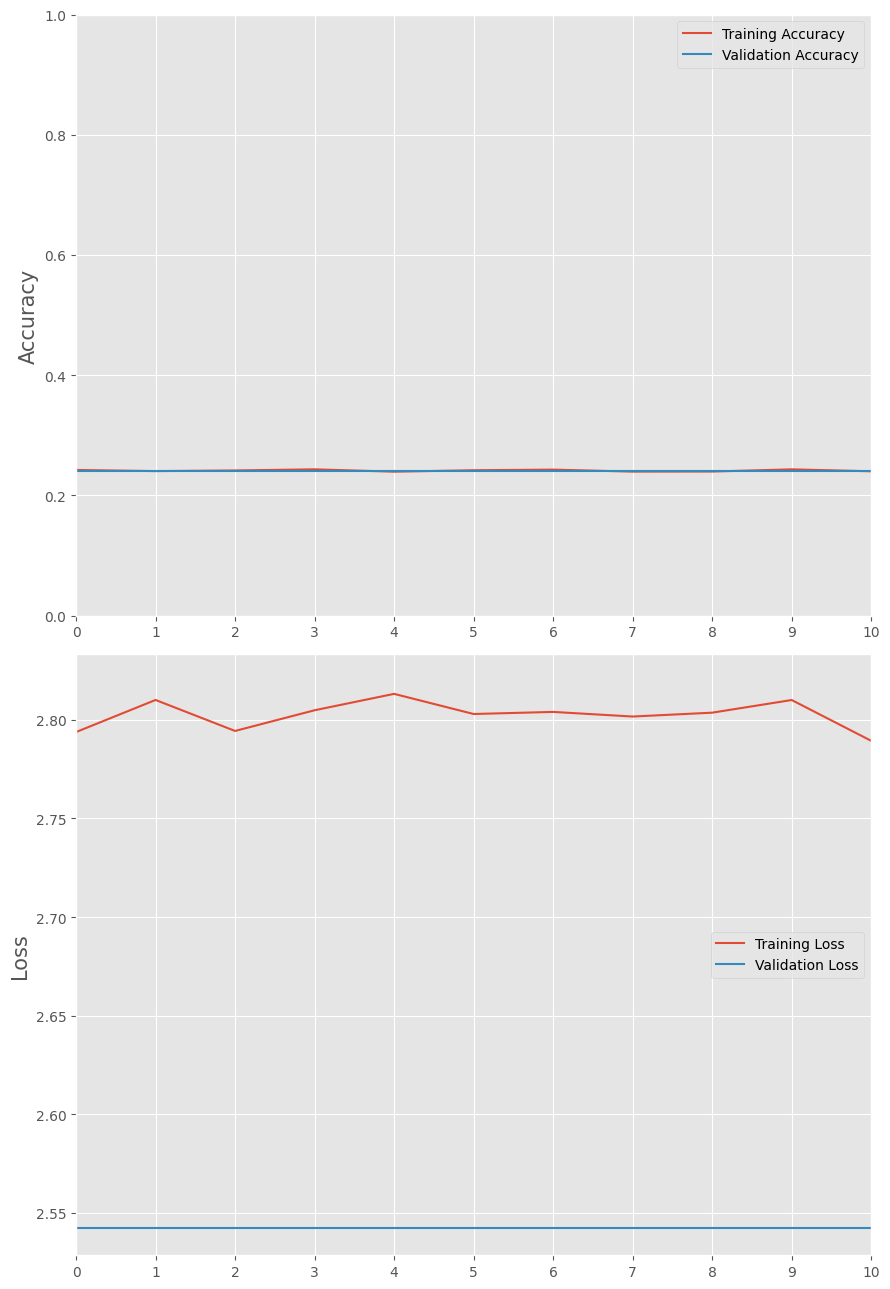

In [410]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_nnb_n, label='Training Accuracy')
axs[0].plot(test_acc_nnb_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_nnb_n, label='Training Loss')
axs[1].plot(test_loss_nnb_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("nnb Training and Testing Loss")
plt.show()

In [411]:
np.array(scores_nnb).shape

(10, 302, 4)

In [412]:
y_pred_nnb = np.argmax(scores_nnb,axis=2)

In [413]:
y_pred_nnb.shape

(10, 302)

In [414]:
from sklearn.metrics import accuracy_score
acc_scores_nnb = []
for i in range(len(y_test_all_nnb)):
    acc_scores_nnb.append(accuracy_score(y_true = y_test_all_nnb[i],y_pred = y_pred_nnb[i]))

In [415]:
import gc
gc.collect()

23637

In [416]:
acc_scores_nnb

[0.3675496688741722,
 0.18874172185430463,
 0.3609271523178808,
 0.2052980132450331,
 0.3741721854304636,
 0.13245033112582782,
 0.38079470198675497,
 0.1456953642384106,
 0.11920529801324503,
 0.18543046357615894]

In [417]:
df_acc = pd.DataFrame([acc_scores_nnb])

df_acc.to_csv('nnb_accuracy', index=False)

df_acc = pd.read_csv('nnb_accuracy')

acc_scores_nnb = df_acc.iloc[0].values

In [418]:
y_test_all_n = np.array(y_test_all_nnb)

y_pred_nnb_n = y_pred_nnb.flatten()
y_test_all_n = y_test_all_n.flatten()

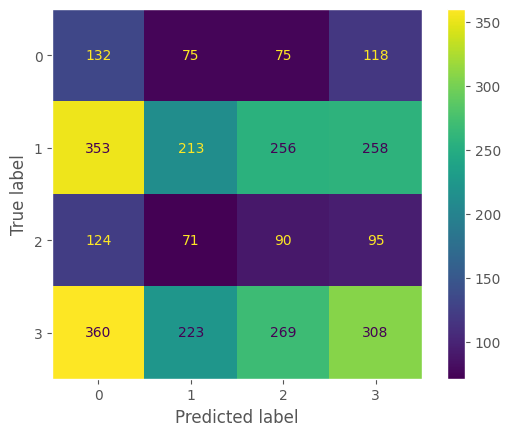

In [419]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_nnb_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("nnb")

plt.show()

In [420]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_nnb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.14      0.33      0.19       400
           1       0.37      0.20      0.26      1080
           2       0.13      0.24      0.17       380
           3       0.40      0.27      0.32      1160

    accuracy                           0.25      3020
   macro avg       0.26      0.26      0.23      3020
weighted avg       0.32      0.25      0.26      3020



# AlexNet

In [364]:
import gc
gc.collect()

In [421]:
X.shape

(3020, 259, 105, 1)

In [366]:
X_tl = np.concatenate([X,X,X],axis=-1)

In [367]:
X_tl.shape

In [368]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_axn = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_axn.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [369]:
import gc
gc.collect()

In [370]:
from keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [371]:
def create_model_axn():
    
    model_axn = Sequential()
    model_axn.add(Conv2D(filters=96,kernel_size=(3,3),strides=(4,4),input_shape=(X_tl.shape[1],X_tl.shape[2],X_tl.shape[3]), activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model_axn.add(Conv2D(256,(5,5),padding='same',activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model_axn.add(Conv2D(384,(3,3),padding='same',activation='relu'))
    model_axn.add(Conv2D(384,(3,3),padding='same',activation='relu'))
    model_axn.add(Conv2D(256,(3,3),padding='same',activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

    model_axn.add(Flatten())
    model_axn.add(Dense(4096, activation='relu'))
    model_axn.add(Dropout(0.4))
    model_axn.add(Dense(4096, activation='relu'))
    model_axn.add(Dropout(0.4))
    model_axn.add(Dense(4,activation='softmax'))

    return model_axn

In [372]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_axn = []
y_test_all_axn = []
train_acc_axn = []
test_acc_axn = []
train_loss_axn = []
test_loss_axn = []

for index, (train_indices, val_indices) in enumerate(skf.split(X_n, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_tl[train_indices], X_tl[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_axn.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_axn = None
    model_axn = create_model_axn()
        
    model_axn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_axn.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_axn.predict(X_test)
    
    scores_axn.append(x)
    train_acc_axn.append(history.history["accuracy"])
    test_acc_axn.append(history.history["val_accuracy"])
    train_loss_axn.append(history.history["loss"])
    test_loss_axn.append(history.history["val_loss"])
    
    gc.collect()

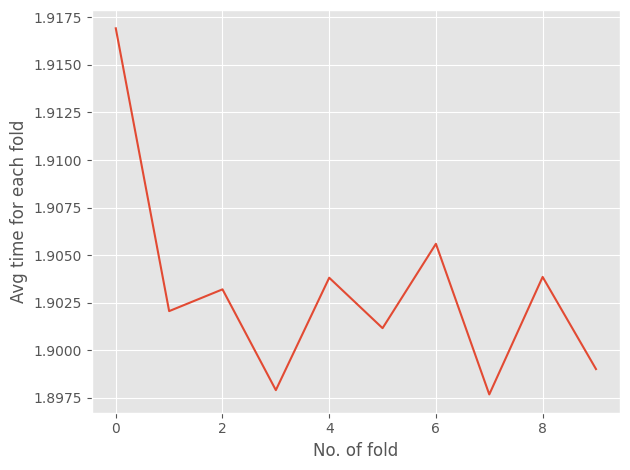

In [422]:
import matplotlib.pyplot as plt

times_axn_n = np.zeros((10,100))
for i, row in enumerate(times_axn):
    times_axn_n[i, :len(row)] = row

times_axn_n_n = np.mean(times_axn_n,axis=1)

plt.plot(times_axn_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("axn times")
plt.show()

In [423]:
times_axn_n_n

array([1.91692262, 1.90205765, 1.9032015 , 1.89790407, 1.90381141,
       1.90116167, 1.9055956 , 1.89767927, 1.90385501, 1.89901133])

In [424]:
train_acc_axn_n = np.zeros((10,100))
for i, row in enumerate(train_acc_axn):
    train_acc_axn_n[i, :len(row)] = row
    
test_acc_axn_n = np.zeros((10,100))
for i, row in enumerate(test_acc_axn):
    test_acc_axn_n[i, :len(row)] = row
    
train_loss_axn_n = np.zeros((10,100))
for i, row in enumerate(train_loss_axn):
    train_loss_axn_n[i, :len(row)] = row
    
test_loss_axn_n = np.zeros((10,100))
for i, row in enumerate(test_loss_axn):
    test_loss_axn_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_axn_n = np.mean(train_acc_axn_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_axn_n = np.mean(test_acc_axn_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_axn_n = np.mean(train_loss_axn_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_axn_n = np.mean(test_loss_axn_n,axis=0)

In [425]:
data = [train_acc_axn_n,test_acc_axn_n,train_loss_axn_n,test_loss_axn_n]

df = pd.DataFrame(data)
df.to_csv('axn_acc', index=False)
df = pd.read_csv('axn_acc')

train_acc_axn_n = df.iloc[0]
test_acc_axn_n = df.iloc[1]
train_loss_axn_n = df.iloc[2]
test_loss_axn_n = df.iloc[3]


df_t = pd.DataFrame([times_axn_n_n])
df_t.to_csv('axn_times', index=False)
df_t = pd.read_csv('axn_times')

times_axn_n_n = df_t.iloc[0]

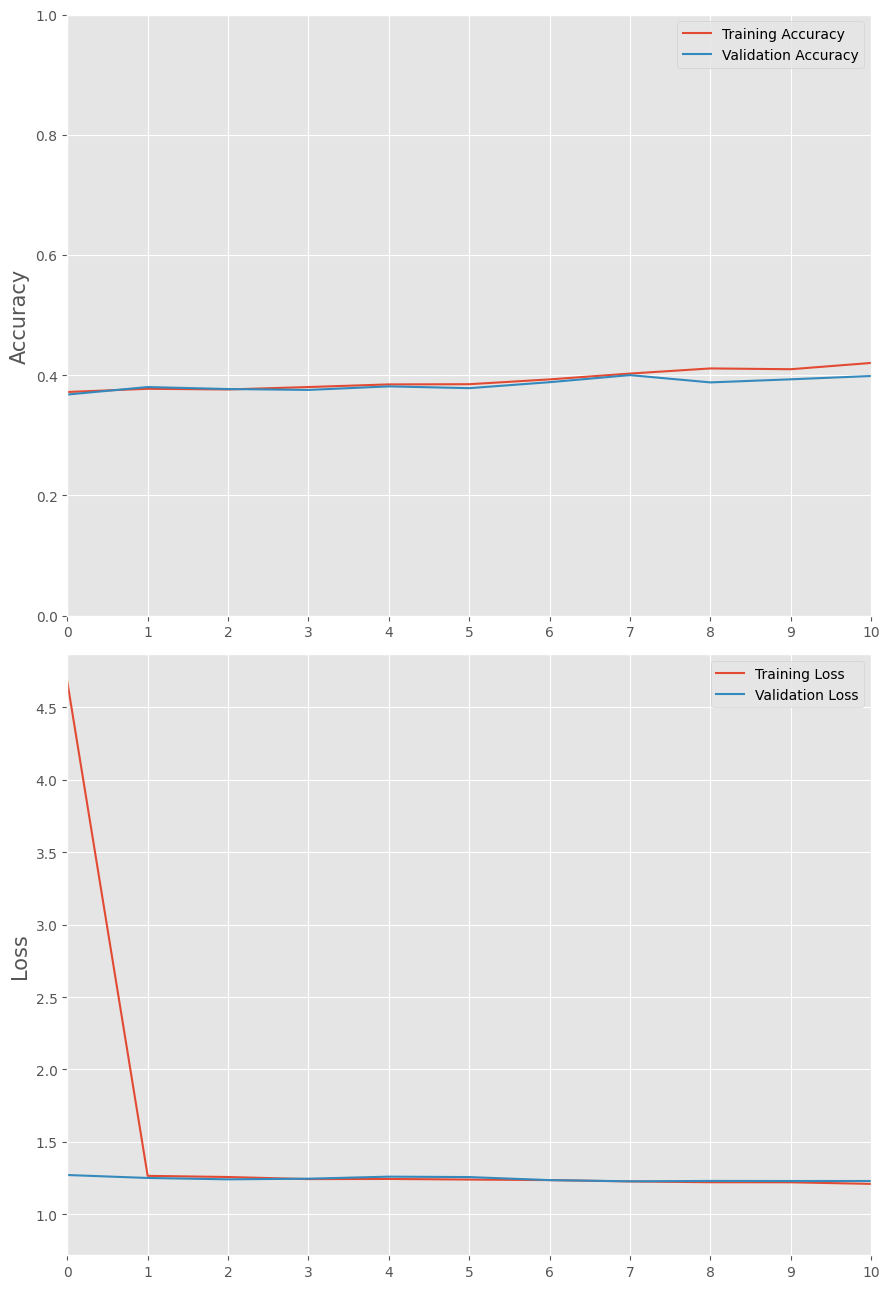

In [426]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_axn_n, label='Training Accuracy')
axs[0].plot(test_acc_axn_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_axn_n, label='Training Loss')
axs[1].plot(test_loss_axn_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim(train_loss_axn_n.min(),train_loss_axn_n.max())
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("axn Training and Testing Loss")
plt.show()

In [427]:
import gc
gc.collect()

29958

In [428]:
np.array(scores_axn).shape

(10, 302, 4)

In [429]:
y_pred_axn = np.argmax(scores_axn,axis=2)

In [430]:
y_pred_axn.shape

(10, 302)

In [431]:
from sklearn.metrics import accuracy_score
acc_scores_axn = []
for i in range(len(y_test_all_axn)):
    acc_scores_axn.append(accuracy_score(y_true = y_test_all_axn[i],y_pred = y_pred_axn[i]))

In [432]:
acc_scores_axn

[0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.5099337748344371,
 0.4966887417218543,
 0.5463576158940397,
 0.5099337748344371,
 0.5331125827814569,
 0.5]

In [433]:
df_acc = pd.DataFrame([acc_scores_axn])

df_acc.to_csv('axn_accuracy', index=False)

df_acc = pd.read_csv('axn_accuracy')

acc_scores_axn = df_acc.iloc[0].values

In [434]:
y_test_all_n = np.array(y_test_all_axn)

y_pred_axn_n = y_pred_axn.flatten()
y_test_all_n = y_test_all_n.flatten()

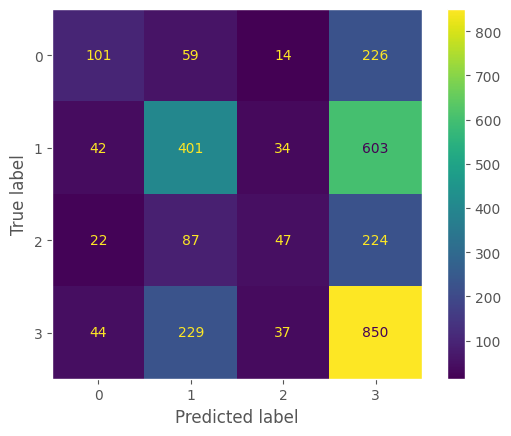

In [435]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_axn_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("axn")
plt.show()

In [436]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_axn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.48      0.25      0.33       400
           1       0.52      0.37      0.43      1080
           2       0.36      0.12      0.18       380
           3       0.45      0.73      0.56      1160

    accuracy                           0.46      3020
   macro avg       0.45      0.37      0.38      3020
weighted avg       0.47      0.46      0.43      3020



# EfficientNetB7

In [17]:
import gc
gc.collect()

0

In [18]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_enb7 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_enb7.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [19]:
def create_model_enb7():
    
    model_enb7 = tf.keras.models.Sequential([
    tf.keras.applications.EfficientNetB7(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_enb7.trainable = False
    return model_enb7

In [20]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_enb7 = []
y_test_all_enb7 = []
train_acc_enb7 = []
test_acc_enb7 = []
train_loss_enb7 = []
test_loss_enb7 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_enb7.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_enb7 = None
    model_enb7 = create_model_enb7()
        
    model_enb7.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_enb7.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [ reduce_lr,time_callback])
    
    
    x = model_enb7.predict(X_test)
    
    scores_enb7.append(x)
    train_acc_enb7.append(history.history["accuracy"])
    test_acc_enb7.append(history.history["val_accuracy"])
    train_loss_enb7.append(history.history["loss"])
    test_loss_enb7.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 30s 197ms/step - loss: 1.3261 - accuracy: 0.3614 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3262 - accuracy: 0.3614 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3234 - accuracy: 0.3524 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3240 - accuracy: 0.3635 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3210 - accuracy: 0.3414 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3289 - accuracy: 0.3516 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 7/100
77/77 [==============

77/77 [==============================] - ETA: 0s - loss: 1.3204 - accuracy: 0.3675
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 12.94 seconds
77/77 [==============================] - 13s 168ms/step - loss: 1.3204 - accuracy: 0.3675 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3243 - accuracy: 0.3483 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3235 - accuracy: 0.3540 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3206 - accuracy: 0.3467 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3222 - accuracy: 0.3602 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 1.6000e-06
Epo

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3210 - accuracy: 0.3508
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.03 seconds
77/77 [==============================] - 13s 169ms/step - loss: 1.3210 - accuracy: 0.3508 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3230 - accuracy: 0.3504 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3193 - accuracy: 0.3610 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3201 - accuracy: 0.3524 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3221 - accuracy: 0.3528 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.3210 - accuracy: 0.3630
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.99 seconds
77/77 [==============================] - 13s 169ms/step - loss: 1.3210 - accuracy: 0.3630 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3194 - accuracy: 0.3663 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3253 - accuracy: 0.3496 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3210 - accuracy: 0.3679 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3249 - accuracy: 0.3573 - val_loss: 1.3196 - val_accuracy: 0.4118 - lr: 4.

Epoch 13/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3917 - accuracy: 0.3373 - val_loss: 1.3935 - val_accuracy: 0.3897 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3962 - accuracy: 0.3189 - val_loss: 1.3935 - val_accuracy: 0.3897 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.3949 - accuracy: 0.3299
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 12.86 seconds
77/77 [==============================] - 13s 167ms/step - loss: 1.3949 - accuracy: 0.3299 - val_loss: 1.3935 - val_accuracy: 0.3897 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3882 - accuracy: 0.3397 - val_loss: 1.3935 - val_accuracy: 0.3897 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3901 - accuracy: 0.3357 - val_loss: 1.3935 - val_accuracy: 0.3897 - lr: 4

Epoch 41/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3938 - accuracy: 0.3283 - val_loss: 1.3935 - val_accuracy: 0.3897 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3926 - accuracy: 0.3287 - val_loss: 1.3935 - val_accuracy: 0.3897 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.3920 - accuracy: 0.3352
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 12.89 seconds
77/77 [==============================] - 13s 168ms/step - loss: 1.3920 - accuracy: 0.3352 - val_loss: 1.3935 - val_accuracy: 0.3897 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3937 - accuracy: 0.3312 - val_loss: 1.3935 - val_accuracy: 0.3897 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3862 - accuracy: 0.3365 - val_loss: 1.3935 - val_accuracy: 0.3897 - lr: 6.

Epoch 69/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3907 - accuracy: 0.3320 - val_loss: 1.3935 - val_accuracy: 0.3897 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3896 - accuracy: 0.3516 - val_loss: 1.3935 - val_accuracy: 0.3897 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.3900 - accuracy: 0.3381
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 12.83 seconds
77/77 [==============================] - 13s 167ms/step - loss: 1.3900 - accuracy: 0.3381 - val_loss: 1.3935 - val_accuracy: 0.3897 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3880 - accuracy: 0.3410 - val_loss: 1.3935 - val_accuracy: 0.3897 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3920 - accuracy: 0.3324 - val_loss: 1.3935 - val_accuracy: 0.3897 - lr: 1

Epoch 97/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3927 - accuracy: 0.3275 - val_loss: 1.3935 - val_accuracy: 0.3897 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3915 - accuracy: 0.3352 - val_loss: 1.3935 - val_accuracy: 0.3897 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.3901 - accuracy: 0.3365
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 12.87 seconds
77/77 [==============================] - 13s 167ms/step - loss: 1.3901 - accuracy: 0.3365 - val_loss: 1.3935 - val_accuracy: 0.3897 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 3s 139ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 23s 197ms/step - loss: 1.4416 - accuracy: 0.1684 - val_loss: 1.4361 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 168ms/

Epoch 25/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4408 - accuracy: 0.1701 - val_loss: 1.4361 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4519 - accuracy: 0.1713 - val_loss: 1.4361 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4438 - accuracy: 0.1766 - val_loss: 1.4361 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4502 - accuracy: 0.1619 - val_loss: 1.4361 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.4459 - accuracy: 0.1725
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 13.00 seconds
77/77 [==============================] - 13s 169ms/step - loss: 1.4459 - accuracy: 0.1725 - val_loss: 1.4361 - val_accuracy: 0.1360 - lr: 8

Epoch 53/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4456 - accuracy: 0.1656 - val_loss: 1.4361 - val_accuracy: 0.1360 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4484 - accuracy: 0.1668 - val_loss: 1.4361 - val_accuracy: 0.1360 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4458 - accuracy: 0.1652 - val_loss: 1.4361 - val_accuracy: 0.1360 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4429 - accuracy: 0.1656 - val_loss: 1.4361 - val_accuracy: 0.1360 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.4412 - accuracy: 0.1733
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.04 seconds
77/77 [==============================] - 13s 170ms/step - loss: 1.4412 - accuracy: 0.1733 - val_loss: 1.4361 - val_accuracy: 0.1360 - lr: 1

Epoch 81/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4444 - accuracy: 0.1652 - val_loss: 1.4361 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4424 - accuracy: 0.1758 - val_loss: 1.4361 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4437 - accuracy: 0.1738 - val_loss: 1.4361 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4440 - accuracy: 0.1746 - val_loss: 1.4361 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4479 - accuracy: 0.1742
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.96 seconds
77/77 [==============================] - 13s 168ms/step - loss: 1.4479 - accuracy: 0.1742 - val_loss: 1.4361 - val_accuracy: 0.1360 - lr: 2.

Epoch 9/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4173 - accuracy: 0.2772 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4208 - accuracy: 0.2621 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4248 - accuracy: 0.2792 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4206 - accuracy: 0.2535 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4177 - accuracy: 0.2841 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4253 - accuracy: 0.2625 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 2.0000e-04
Epoch 15/100
77/77 [=========

Epoch 37/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4220 - accuracy: 0.2690 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4209 - accuracy: 0.2772 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4201 - accuracy: 0.2735 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4259 - accuracy: 0.2711 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4208 - accuracy: 0.2625 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4249 - accuracy: 0.2678 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 3.2000e-07
Epoch 43/100
77/77 [========

Epoch 65/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4161 - accuracy: 0.2751 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4199 - accuracy: 0.2792 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4202 - accuracy: 0.2731 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4207 - accuracy: 0.2702 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4208 - accuracy: 0.2637 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4162 - accuracy: 0.2776 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 5.1200e-10
Epoch 71/100
77/77 [========

Epoch 93/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4170 - accuracy: 0.2833 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4202 - accuracy: 0.2678 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4211 - accuracy: 0.2612 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4160 - accuracy: 0.2907 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4172 - accuracy: 0.2768 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4172 - accuracy: 0.2829 - val_loss: 1.4019 - val_accuracy: 0.3566 - lr: 8.1920e-13
Epoch 99/100
77/77 [========

77/77 [==============================] - 13s 170ms/step - loss: 1.4037 - accuracy: 0.2723 - val_loss: 1.3835 - val_accuracy: 0.3051 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.3980 - accuracy: 0.2788
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 13.02 seconds
77/77 [==============================] - 13s 169ms/step - loss: 1.3980 - accuracy: 0.2788 - val_loss: 1.3835 - val_accuracy: 0.3051 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3932 - accuracy: 0.2772 - val_loss: 1.3835 - val_accuracy: 0.3051 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3950 - accuracy: 0.2825 - val_loss: 1.3835 - val_accuracy: 0.3051 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4001 - accuracy: 0.2686 - val_loss: 1.3835 - val_accuracy: 0.3051 - lr: 8.0000e-06
Epoc

Epoch 49/100
77/77 [==============================] - 13s 170ms/step - loss: 1.3922 - accuracy: 0.2927 - val_loss: 1.3835 - val_accuracy: 0.3051 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.3947 - accuracy: 0.2935
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 13.13 seconds
77/77 [==============================] - 13s 171ms/step - loss: 1.3947 - accuracy: 0.2935 - val_loss: 1.3835 - val_accuracy: 0.3051 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 13s 170ms/step - loss: 1.3958 - accuracy: 0.2739 - val_loss: 1.3835 - val_accuracy: 0.3051 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3950 - accuracy: 0.2923 - val_loss: 1.3835 - val_accuracy: 0.3051 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3984 - accuracy: 0.2776 - val_loss: 1.3835 - val_accuracy: 0.3051 - lr: 1

Epoch 77/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4009 - accuracy: 0.2768 - val_loss: 1.3835 - val_accuracy: 0.3051 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.3981 - accuracy: 0.2747
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 13.05 seconds
77/77 [==============================] - 13s 170ms/step - loss: 1.3981 - accuracy: 0.2747 - val_loss: 1.3835 - val_accuracy: 0.3051 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3971 - accuracy: 0.2702 - val_loss: 1.3835 - val_accuracy: 0.3051 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3920 - accuracy: 0.2939 - val_loss: 1.3835 - val_accuracy: 0.3051 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3986 - accuracy: 0.2751 - val_loss: 1.3835 - val_accuracy: 0.3051 - lr: 2

Epoch 5/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4316 - accuracy: 0.2747 - val_loss: 1.4354 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4309 - accuracy: 0.2833 - val_loss: 1.4354 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4294 - accuracy: 0.2788 - val_loss: 1.4354 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.4403 - accuracy: 0.2690
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 13.03 seconds
77/77 [==============================] - 13s 169ms/step - loss: 1.4403 - accuracy: 0.2690 - val_loss: 1.4354 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4395 - accuracy: 0.2547 - val_loss: 1.4354 - val_accuracy: 0.3456 - lr: 2.0000e-04
Epoch 10/100


Epoch 33/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4351 - accuracy: 0.2686 - val_loss: 1.4354 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4367 - accuracy: 0.2780 - val_loss: 1.4354 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4347 - accuracy: 0.2866 - val_loss: 1.4354 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 1.4315 - accuracy: 0.2764
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 13.14 seconds
77/77 [==============================] - 13s 171ms/step - loss: 1.4315 - accuracy: 0.2764 - val_loss: 1.4354 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4392 - accuracy: 0.2768 - val_loss: 1.4354 - val_accuracy: 0.3456 - lr: 3.

Epoch 61/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4399 - accuracy: 0.2735 - val_loss: 1.4354 - val_accuracy: 0.3456 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4301 - accuracy: 0.2858 - val_loss: 1.4354 - val_accuracy: 0.3456 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4336 - accuracy: 0.2788 - val_loss: 1.4354 - val_accuracy: 0.3456 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.4354 - accuracy: 0.2653
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 13.06 seconds
77/77 [==============================] - 13s 170ms/step - loss: 1.4354 - accuracy: 0.2653 - val_loss: 1.4354 - val_accuracy: 0.3456 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4310 - accuracy: 0.2899 - val_loss: 1.4354 - val_accuracy: 0.3456 - lr: 5.12

Epoch 89/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4302 - accuracy: 0.2788 - val_loss: 1.4354 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4390 - accuracy: 0.2776 - val_loss: 1.4354 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4440 - accuracy: 0.2698 - val_loss: 1.4354 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 1.4341 - accuracy: 0.2764
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 13.06 seconds
77/77 [==============================] - 13s 170ms/step - loss: 1.4341 - accuracy: 0.2764 - val_loss: 1.4354 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4345 - accuracy: 0.2764 - val_loss: 1.4354 - val_accuracy: 0.3456 - lr: 8.

Epoch 17/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4007 - accuracy: 0.2600 - val_loss: 1.3988 - val_accuracy: 0.1985 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 13s 170ms/step - loss: 1.3964 - accuracy: 0.2670 - val_loss: 1.3988 - val_accuracy: 0.1985 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 13s 170ms/step - loss: 1.3992 - accuracy: 0.2792 - val_loss: 1.3988 - val_accuracy: 0.1985 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3998 - accuracy: 0.2612 - val_loss: 1.3988 - val_accuracy: 0.1985 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4004 - accuracy: 0.2543 - val_loss: 1.3988 - val_accuracy: 0.1985 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.4018 - accuracy: 0.2706
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for ep

Epoch 45/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3997 - accuracy: 0.2751 - val_loss: 1.3988 - val_accuracy: 0.1985 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4032 - accuracy: 0.2661 - val_loss: 1.3988 - val_accuracy: 0.1985 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3963 - accuracy: 0.2776 - val_loss: 1.3988 - val_accuracy: 0.1985 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3985 - accuracy: 0.2604 - val_loss: 1.3988 - val_accuracy: 0.1985 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4015 - accuracy: 0.2735 - val_loss: 1.3988 - val_accuracy: 0.1985 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.4001 - accuracy: 0.2551
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for e

Epoch 73/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4021 - accuracy: 0.2653 - val_loss: 1.3988 - val_accuracy: 0.1985 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 13s 170ms/step - loss: 1.3976 - accuracy: 0.2596 - val_loss: 1.3988 - val_accuracy: 0.1985 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3990 - accuracy: 0.2502 - val_loss: 1.3988 - val_accuracy: 0.1985 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4000 - accuracy: 0.2653 - val_loss: 1.3988 - val_accuracy: 0.1985 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3909 - accuracy: 0.2768 - val_loss: 1.3988 - val_accuracy: 0.1985 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.3996 - accuracy: 0.2531
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for e

10/10 [==============================] - 3s 142ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 24s 206ms/step - loss: 1.3533 - accuracy: 0.3577 - val_loss: 1.3386 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 170ms/step - loss: 1.3581 - accuracy: 0.3549 - val_loss: 1.3386 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3549 - accuracy: 0.3557 - val_loss: 1.3386 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3612 - accuracy: 0.3512 - val_loss: 1.3386 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 13s 170ms/step - loss: 1.3596 - accuracy: 0.3569 - val_loss: 1.3386 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3548 - accuracy: 0.3540 - val_loss: 1.3386 - val_accuracy

77/77 [==============================] - ETA: 0s - loss: 1.3544 - accuracy: 0.3532
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 13.06 seconds
77/77 [==============================] - 13s 170ms/step - loss: 1.3544 - accuracy: 0.3532 - val_loss: 1.3386 - val_accuracy: 0.3382 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3562 - accuracy: 0.3549 - val_loss: 1.3386 - val_accuracy: 0.3382 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 13s 170ms/step - loss: 1.3545 - accuracy: 0.3561 - val_loss: 1.3386 - val_accuracy: 0.3382 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3584 - accuracy: 0.3594 - val_loss: 1.3386 - val_accuracy: 0.3382 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3588 - accuracy: 0.3536 - val_loss: 1.3386 - val_accuracy: 0.3382 - lr: 1.6000e-06
Epo

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3602 - accuracy: 0.3602
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.10 seconds
77/77 [==============================] - 13s 170ms/step - loss: 1.3602 - accuracy: 0.3602 - val_loss: 1.3386 - val_accuracy: 0.3382 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 13s 170ms/step - loss: 1.3574 - accuracy: 0.3540 - val_loss: 1.3386 - val_accuracy: 0.3382 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3481 - accuracy: 0.3491 - val_loss: 1.3386 - val_accuracy: 0.3382 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3577 - accuracy: 0.3569 - val_loss: 1.3386 - val_accuracy: 0.3382 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3599 - accuracy: 0.3561 - val_loss: 1.3386 - val_accuracy: 0.3382 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.3608 - accuracy: 0.3512
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.05 seconds
77/77 [==============================] - 13s 170ms/step - loss: 1.3608 - accuracy: 0.3512 - val_loss: 1.3386 - val_accuracy: 0.3382 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3640 - accuracy: 0.3528 - val_loss: 1.3386 - val_accuracy: 0.3382 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 13s 170ms/step - loss: 1.3566 - accuracy: 0.3540 - val_loss: 1.3386 - val_accuracy: 0.3382 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3536 - accuracy: 0.3610 - val_loss: 1.3386 - val_accuracy: 0.3382 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3558 - accuracy: 0.3545 - val_loss: 1.3386 - val_accuracy: 0.3382 - lr: 4.

Epoch 13/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3321 - accuracy: 0.3397 - val_loss: 1.3142 - val_accuracy: 0.3235 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3312 - accuracy: 0.3524 - val_loss: 1.3142 - val_accuracy: 0.3235 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.3249 - accuracy: 0.3455
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 13.19 seconds
77/77 [==============================] - 13s 172ms/step - loss: 1.3249 - accuracy: 0.3455 - val_loss: 1.3142 - val_accuracy: 0.3235 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3273 - accuracy: 0.3520 - val_loss: 1.3142 - val_accuracy: 0.3235 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3252 - accuracy: 0.3459 - val_loss: 1.3142 - val_accuracy: 0.3235 - lr: 4

Epoch 41/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3300 - accuracy: 0.3594 - val_loss: 1.3142 - val_accuracy: 0.3235 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3249 - accuracy: 0.3528 - val_loss: 1.3142 - val_accuracy: 0.3235 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.3183 - accuracy: 0.3716
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 13.12 seconds
77/77 [==============================] - 13s 171ms/step - loss: 1.3183 - accuracy: 0.3716 - val_loss: 1.3142 - val_accuracy: 0.3235 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3289 - accuracy: 0.3545 - val_loss: 1.3142 - val_accuracy: 0.3235 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3256 - accuracy: 0.3442 - val_loss: 1.3142 - val_accuracy: 0.3235 - lr: 6.

Epoch 69/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3282 - accuracy: 0.3446 - val_loss: 1.3142 - val_accuracy: 0.3235 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3296 - accuracy: 0.3536 - val_loss: 1.3142 - val_accuracy: 0.3235 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.3269 - accuracy: 0.3536
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 13.13 seconds
77/77 [==============================] - 13s 171ms/step - loss: 1.3269 - accuracy: 0.3536 - val_loss: 1.3142 - val_accuracy: 0.3235 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3281 - accuracy: 0.3373 - val_loss: 1.3142 - val_accuracy: 0.3235 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3284 - accuracy: 0.3471 - val_loss: 1.3142 - val_accuracy: 0.3235 - lr: 1

Epoch 97/100
77/77 [==============================] - 13s 170ms/step - loss: 1.3267 - accuracy: 0.3540 - val_loss: 1.3142 - val_accuracy: 0.3235 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3303 - accuracy: 0.3459 - val_loss: 1.3142 - val_accuracy: 0.3235 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.3256 - accuracy: 0.3393
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 13.19 seconds
77/77 [==============================] - 13s 172ms/step - loss: 1.3256 - accuracy: 0.3393 - val_loss: 1.3142 - val_accuracy: 0.3235 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 5s 143ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 30s 197ms/step - loss: 1.4641 - accuracy: 0.1778 - val_loss: 1.4643 - val_accuracy: 0.1507 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 169ms

Epoch 25/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4665 - accuracy: 0.1774 - val_loss: 1.4643 - val_accuracy: 0.1507 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4656 - accuracy: 0.1778 - val_loss: 1.4643 - val_accuracy: 0.1507 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4694 - accuracy: 0.1611 - val_loss: 1.4643 - val_accuracy: 0.1507 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4581 - accuracy: 0.1905 - val_loss: 1.4643 - val_accuracy: 0.1507 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.4612 - accuracy: 0.1885
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 13.02 seconds
77/77 [==============================] - 13s 169ms/step - loss: 1.4612 - accuracy: 0.1885 - val_loss: 1.4643 - val_accuracy: 0.1507 - lr: 8

Epoch 53/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4656 - accuracy: 0.1725 - val_loss: 1.4643 - val_accuracy: 0.1507 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4642 - accuracy: 0.1738 - val_loss: 1.4643 - val_accuracy: 0.1507 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4659 - accuracy: 0.1860 - val_loss: 1.4643 - val_accuracy: 0.1507 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4660 - accuracy: 0.1872 - val_loss: 1.4643 - val_accuracy: 0.1507 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.4708 - accuracy: 0.1619
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.11 seconds
77/77 [==============================] - 13s 170ms/step - loss: 1.4708 - accuracy: 0.1619 - val_loss: 1.4643 - val_accuracy: 0.1507 - lr: 1

Epoch 81/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4682 - accuracy: 0.1803 - val_loss: 1.4643 - val_accuracy: 0.1507 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4632 - accuracy: 0.1807 - val_loss: 1.4643 - val_accuracy: 0.1507 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4655 - accuracy: 0.1823 - val_loss: 1.4643 - val_accuracy: 0.1507 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4670 - accuracy: 0.1823 - val_loss: 1.4643 - val_accuracy: 0.1507 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4695 - accuracy: 0.1754
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.13 seconds
77/77 [==============================] - 13s 171ms/step - loss: 1.4695 - accuracy: 0.1754 - val_loss: 1.4643 - val_accuracy: 0.1507 - lr: 2.

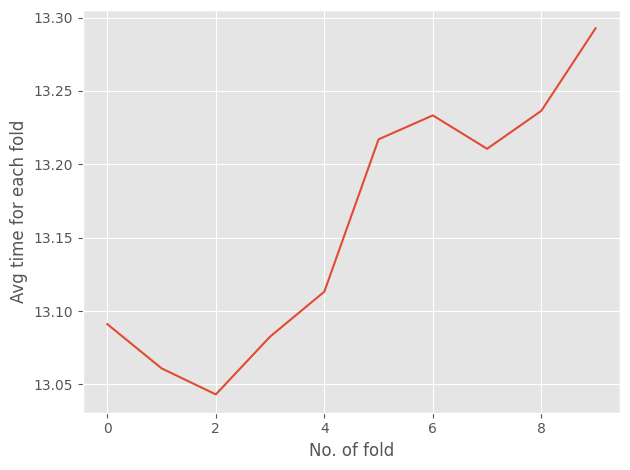

In [21]:
import matplotlib.pyplot as plt

times_enb7_n = np.zeros((10,100))
for i, row in enumerate(times_enb7):
    times_enb7_n[i, :len(row)] = row

times_enb7_n_n = np.mean(times_enb7_n,axis=1)
plt.style.use('ggplot')
plt.plot(times_enb7_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")

plt.tight_layout()
plt.savefig("enb7 times")
plt.show()

In [22]:
import gc
gc.collect()

3356

In [23]:
train_acc_enb7_n = np.zeros((10,100))
for i, row in enumerate(train_acc_enb7):
    train_acc_enb7_n[i, :len(row)] = row
    
test_acc_enb7_n = np.zeros((10,100))
for i, row in enumerate(test_acc_enb7):
    test_acc_enb7_n[i, :len(row)] = row
    
train_loss_enb7_n = np.zeros((10,100))
for i, row in enumerate(train_loss_enb7):
    train_loss_enb7_n[i, :len(row)] = row
    
test_loss_enb7_n = np.zeros((10,100))
for i, row in enumerate(test_loss_enb7):
    test_loss_enb7_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_enb7_n = np.mean(train_acc_enb7_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_enb7_n = np.mean(test_acc_enb7_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_enb7_n = np.mean(train_loss_enb7_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_enb7_n = np.mean(test_loss_enb7_n,axis=0)

In [24]:
data = [train_acc_enb7_n,test_acc_enb7_n,train_loss_enb7_n,test_loss_enb7_n]

df = pd.DataFrame(data)
df.to_csv('enb7_acc', index=False)
df = pd.read_csv('enb7_acc')

train_acc_enb7_n = df.iloc[0]
test_acc_enb7_n = df.iloc[1]
train_loss_enb7_n = df.iloc[2]
test_loss_enb7_n = df.iloc[3]


df_t = pd.DataFrame([times_enb7_n_n])
df_t.to_csv('enb7_times', index=False)
df_t = pd.read_csv('enb7_times')

times_enb7_n_n = df_t.iloc[0]

In [25]:
test_loss_enb7_n

0     1.388608
1     1.388608
2     1.388608
3     1.388608
4     1.388608
        ...   
95    1.388608
96    1.388608
97    1.388608
98    1.388608
99    1.388608
Name: 3, Length: 100, dtype: float64

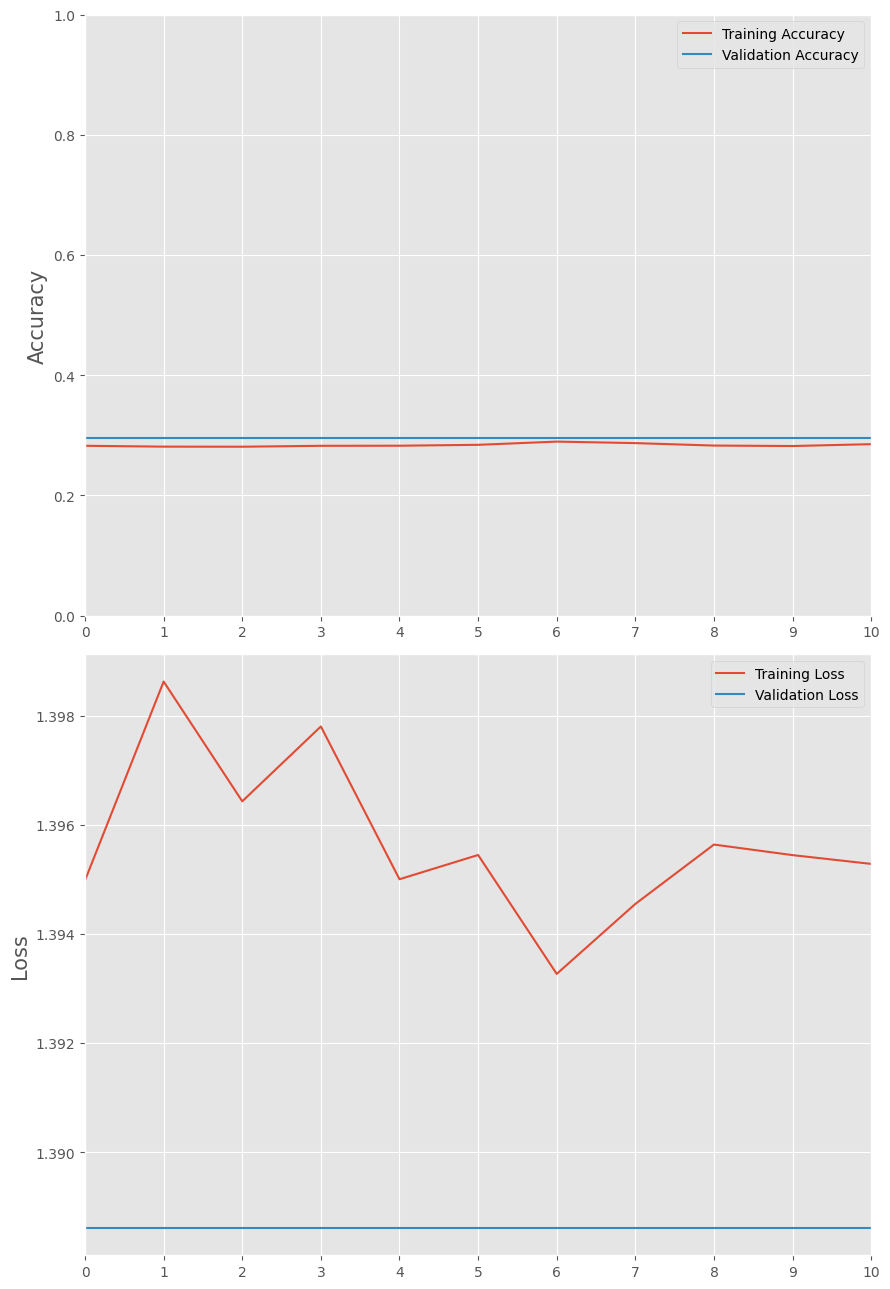

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_enb7_n, label='Training Accuracy')
axs[0].plot(test_acc_enb7_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_enb7_n, label='Training Loss')
axs[1].plot(test_loss_enb7_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,10])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("enb7 Training and Testing Loss")
plt.show()

In [27]:
np.array(scores_enb7).shape

(10, 302, 4)

In [28]:
y_pred_enb7 = np.argmax(scores_enb7,axis=2)

In [29]:
y_pred_enb7.shape

(10, 302)

In [30]:
np.array(y_test_all_enb7).shape

(10, 302)

In [31]:
from sklearn.metrics import accuracy_score
acc_scores_enb7 = []
for i in range(len(y_test_all_enb7)):
    acc_scores_enb7.append(accuracy_score(y_true = y_test_all_enb7[i],y_pred = y_pred_enb7[i]))

In [32]:
acc_scores_enb7

[0.37748344370860926,
 0.3841059602649007,
 0.1357615894039735,
 0.3741721854304636,
 0.3211920529801324,
 0.3708609271523179,
 0.2847682119205298,
 0.3576158940397351,
 0.3576158940397351,
 0.1423841059602649]

In [33]:
df_acc = pd.DataFrame([acc_scores_enb7])

df_acc.to_csv('enb7_accuracy', index=False)

df_acc = pd.read_csv('enb7_accuracy')

acc_scores_enb7 = df_acc.iloc[0].values

In [34]:
y_test_all_n = np.array(y_test_all_enb7)

y_pred_enb7_n = y_pred_enb7.flatten()
y_test_all_n = y_test_all_n.flatten()

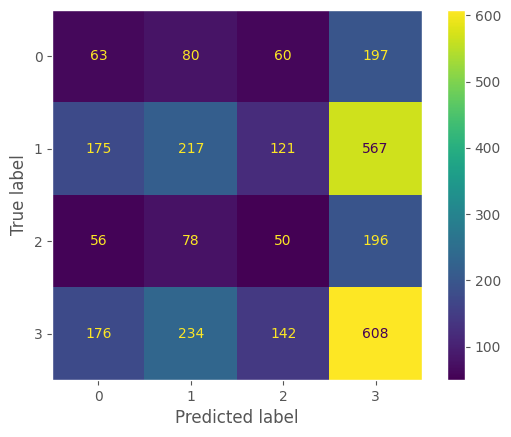

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_enb7_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("enb7")

plt.show()

In [36]:
import gc
gc.collect()

40

In [37]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_enb7_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.16      0.14       400
           1       0.36      0.20      0.26      1080
           2       0.13      0.13      0.13       380
           3       0.39      0.52      0.45      1160

    accuracy                           0.31      3020
   macro avg       0.25      0.25      0.25      3020
weighted avg       0.31      0.31      0.30      3020



# ResNetV2

In [38]:
import gc
gc.collect()

0

In [39]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_rnv2 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_rnv2.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [40]:
def create_model_rnv2():

    model_rnv2 = tf.keras.Sequential([
    tf.keras.applications.ResNet50V2(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_rnv2.trainable = False
    return model_rnv2

In [41]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_rnv2 = []
y_test_all_rnv2 = []
train_acc_rnv2 = []
test_acc_rnv2 = []
train_loss_rnv2 = []
test_loss_rnv2 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_rnv2.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_rnv2 = None
    model_rnv2 = create_model_rnv2()
        
    model_rnv2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_rnv2.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [ reduce_lr,time_callback])
    
    
    x = model_rnv2.predict(X_test)
    
    scores_rnv2.append(x)
    train_acc_rnv2.append(history.history["accuracy"])
    test_acc_rnv2.append(history.history["val_accuracy"])
    train_loss_rnv2.append(history.history["loss"])
    test_loss_rnv2.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 6s 47ms/step - loss: 53.7588 - accuracy: 0.1292 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 40ms/step - loss: 54.0414 - accuracy: 0.1190 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 40ms/step - loss: 52.7704 - accuracy: 0.1382 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 40ms/step - loss: 53.7547 - accuracy: 0.1321 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 40ms/step - loss: 52.7733 - accuracy: 0.1374 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 40ms/step - loss: 53.3142 - accuracy: 0.1312 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 7/100
77/77 [==============

77/77 [==============================] - ETA: 0s - loss: 53.7956 - accuracy: 0.1370
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.08 seconds
77/77 [==============================] - 3s 40ms/step - loss: 53.7956 - accuracy: 0.1370 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 40ms/step - loss: 53.1791 - accuracy: 0.1349 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 40ms/step - loss: 52.8160 - accuracy: 0.1304 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 40ms/step - loss: 52.7196 - accuracy: 0.1263 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 40ms/step - loss: 53.3026 - accuracy: 0.1374 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 1.6000e-06
Epo

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 53.1256 - accuracy: 0.1292
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 3.06 seconds
77/77 [==============================] - 3s 40ms/step - loss: 53.1256 - accuracy: 0.1292 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 3s 40ms/step - loss: 53.4196 - accuracy: 0.1329 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 40ms/step - loss: 53.4821 - accuracy: 0.1198 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 40ms/step - loss: 53.2232 - accuracy: 0.1398 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 40ms/step - loss: 52.2271 - accuracy: 0.1382 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 2

Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 52.3584 - accuracy: 0.1414
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.04 seconds
77/77 [==============================] - 3s 40ms/step - loss: 52.4450 - accuracy: 0.1406 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 40ms/step - loss: 53.4913 - accuracy: 0.1288 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 40ms/step - loss: 52.1824 - accuracy: 0.1468 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 3s 40ms/step - loss: 53.6060 - accuracy: 0.1292 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 3s 40ms/step - loss: 52.4355 - accuracy: 0.1402 - val_loss: 46.4159 - val_accuracy: 0.1360 - lr: 4.

Epoch 13/100
77/77 [==============================] - 3s 40ms/step - loss: 16.9595 - accuracy: 0.3328 - val_loss: 9.2839 - val_accuracy: 0.4081 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 3s 40ms/step - loss: 17.0291 - accuracy: 0.3328 - val_loss: 9.2839 - val_accuracy: 0.4081 - lr: 2.0000e-04
Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 16.7315 - accuracy: 0.3614
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 3.09 seconds
77/77 [==============================] - 3s 40ms/step - loss: 16.7700 - accuracy: 0.3610 - val_loss: 9.2839 - val_accuracy: 0.4081 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 40ms/step - loss: 16.3035 - accuracy: 0.3516 - val_loss: 9.2839 - val_accuracy: 0.4081 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 40ms/step - loss: 16.9770 - accuracy: 0.3406 - val_loss: 9.2839 - val_accuracy: 0.4081 - lr: 4.0000

Epoch 41/100
77/77 [==============================] - 3s 40ms/step - loss: 16.8532 - accuracy: 0.3442 - val_loss: 9.2839 - val_accuracy: 0.4081 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 40ms/step - loss: 17.4535 - accuracy: 0.3324 - val_loss: 9.2839 - val_accuracy: 0.4081 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 17.4179 - accuracy: 0.3322
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 3.12 seconds
77/77 [==============================] - 3s 41ms/step - loss: 17.3987 - accuracy: 0.3332 - val_loss: 9.2839 - val_accuracy: 0.4081 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 3s 41ms/step - loss: 16.3525 - accuracy: 0.3491 - val_loss: 9.2839 - val_accuracy: 0.4081 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 3s 40ms/step - loss: 17.3379 - accuracy: 0.3234 - val_loss: 9.2839 - val_accuracy: 0.4081 - lr: 6.4000e

Epoch 69/100
77/77 [==============================] - 3s 40ms/step - loss: 16.9628 - accuracy: 0.3524 - val_loss: 9.2839 - val_accuracy: 0.4081 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 3s 40ms/step - loss: 16.6833 - accuracy: 0.3500 - val_loss: 9.2839 - val_accuracy: 0.4081 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 16.3334 - accuracy: 0.3553
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 3.10 seconds
77/77 [==============================] - 3s 40ms/step - loss: 16.3334 - accuracy: 0.3553 - val_loss: 9.2839 - val_accuracy: 0.4081 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 3s 40ms/step - loss: 16.4764 - accuracy: 0.3340 - val_loss: 9.2839 - val_accuracy: 0.4081 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 40ms/step - loss: 17.0557 - accuracy: 0.3336 - val_loss: 9.2839 - val_accuracy: 0.4081 - lr: 1.0240

Epoch 97/100
77/77 [==============================] - 3s 40ms/step - loss: 15.7970 - accuracy: 0.3585 - val_loss: 9.2839 - val_accuracy: 0.4081 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 40ms/step - loss: 16.0841 - accuracy: 0.3536 - val_loss: 9.2839 - val_accuracy: 0.4081 - lr: 8.1920e-13
Epoch 99/100
76/77 [============================>.] - ETA: 0s - loss: 16.3750 - accuracy: 0.3561
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 3.10 seconds
77/77 [==============================] - 3s 40ms/step - loss: 16.3985 - accuracy: 0.3561 - val_loss: 9.2839 - val_accuracy: 0.4081 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 34ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 6s 46ms/step - loss: 43.8299 - accuracy: 0.1488 - val_loss: 43.5687 - val_accuracy: 0.1140 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 40ms/step -

Epoch 25/100
77/77 [==============================] - 3s 40ms/step - loss: 43.5200 - accuracy: 0.1525 - val_loss: 43.5687 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 3s 40ms/step - loss: 44.4584 - accuracy: 0.1541 - val_loss: 43.5687 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 3s 40ms/step - loss: 43.7116 - accuracy: 0.1460 - val_loss: 43.5687 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 40ms/step - loss: 43.7195 - accuracy: 0.1480 - val_loss: 43.5687 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 44.2665 - accuracy: 0.1423
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.06 seconds
77/77 [==============================] - 3s 40ms/step - loss: 44.2153 - accuracy: 0.1431 - val_loss: 43.5687 - val_accuracy: 0.1140 - lr: 8

Epoch 53/100
77/77 [==============================] - 3s 40ms/step - loss: 44.2518 - accuracy: 0.1480 - val_loss: 43.5687 - val_accuracy: 0.1140 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 3s 40ms/step - loss: 44.1263 - accuracy: 0.1488 - val_loss: 43.5687 - val_accuracy: 0.1140 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 3s 40ms/step - loss: 43.8494 - accuracy: 0.1574 - val_loss: 43.5687 - val_accuracy: 0.1140 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 40ms/step - loss: 43.4545 - accuracy: 0.1541 - val_loss: 43.5687 - val_accuracy: 0.1140 - lr: 1.2800e-08
Epoch 57/100
75/77 [============================>.] - ETA: 0s - loss: 44.2742 - accuracy: 0.1425
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 3.08 seconds
77/77 [==============================] - 3s 40ms/step - loss: 44.3483 - accuracy: 0.1427 - val_loss: 43.5687 - val_accuracy: 0.1140 - lr: 1

Epoch 81/100
77/77 [==============================] - 3s 40ms/step - loss: 44.2503 - accuracy: 0.1513 - val_loss: 43.5687 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 3s 40ms/step - loss: 43.8328 - accuracy: 0.1570 - val_loss: 43.5687 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 3s 40ms/step - loss: 44.0419 - accuracy: 0.1504 - val_loss: 43.5687 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 40ms/step - loss: 44.1153 - accuracy: 0.1443 - val_loss: 43.5687 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 44.0447 - accuracy: 0.1435
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.08 seconds
77/77 [==============================] - 3s 40ms/step - loss: 44.0543 - accuracy: 0.1431 - val_loss: 43.5687 - val_accuracy: 0.1140 - lr: 2.

Epoch 9/100
77/77 [==============================] - 3s 40ms/step - loss: 23.5901 - accuracy: 0.1832 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 3s 40ms/step - loss: 23.6502 - accuracy: 0.1877 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 3s 40ms/step - loss: 23.2359 - accuracy: 0.1807 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 3s 40ms/step - loss: 23.7605 - accuracy: 0.1819 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 3s 40ms/step - loss: 23.3083 - accuracy: 0.1774 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 3s 40ms/step - loss: 23.1249 - accuracy: 0.1942 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 15/100
77/77 [=========

Epoch 37/100
77/77 [==============================] - 3s 40ms/step - loss: 23.5791 - accuracy: 0.1905 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 3s 40ms/step - loss: 23.5180 - accuracy: 0.1848 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 3s 40ms/step - loss: 24.0207 - accuracy: 0.1852 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 3s 40ms/step - loss: 23.3025 - accuracy: 0.1872 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 3s 40ms/step - loss: 23.8703 - accuracy: 0.1607 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 40ms/step - loss: 23.8260 - accuracy: 0.1872 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 43/100
77/77 [========

Epoch 65/100
77/77 [==============================] - 3s 40ms/step - loss: 24.5608 - accuracy: 0.1672 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 3s 40ms/step - loss: 23.4889 - accuracy: 0.1832 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 3s 40ms/step - loss: 23.9803 - accuracy: 0.1872 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 3s 40ms/step - loss: 23.5318 - accuracy: 0.1881 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 3s 40ms/step - loss: 23.5403 - accuracy: 0.1766 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 3s 40ms/step - loss: 24.1285 - accuracy: 0.1905 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 71/100
76/77 [========

Epoch 93/100
77/77 [==============================] - 3s 40ms/step - loss: 23.1081 - accuracy: 0.1917 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 3s 40ms/step - loss: 23.9773 - accuracy: 0.1672 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 3s 40ms/step - loss: 24.0117 - accuracy: 0.1664 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 3s 40ms/step - loss: 23.3852 - accuracy: 0.1909 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 3s 40ms/step - loss: 23.7555 - accuracy: 0.1795 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 40ms/step - loss: 23.3478 - accuracy: 0.1922 - val_loss: 18.7870 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 99/100
77/77 [========

77/77 [==============================] - 3s 40ms/step - loss: 37.2374 - accuracy: 0.3471 - val_loss: 37.2608 - val_accuracy: 0.3971 - lr: 4.0000e-05
Epoch 22/100
76/77 [============================>.] - ETA: 0s - loss: 36.7372 - accuracy: 0.3524
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 3.07 seconds
77/77 [==============================] - 3s 40ms/step - loss: 36.6448 - accuracy: 0.3532 - val_loss: 37.2608 - val_accuracy: 0.3971 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 3s 39ms/step - loss: 37.1346 - accuracy: 0.3536 - val_loss: 37.2608 - val_accuracy: 0.3971 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 3s 40ms/step - loss: 37.1394 - accuracy: 0.3397 - val_loss: 37.2608 - val_accuracy: 0.3971 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 3s 40ms/step - loss: 36.6242 - accuracy: 0.3467 - val_loss: 37.2608 - val_accuracy: 0.3971 - lr: 8.0000e-06
Epoc

Epoch 49/100
77/77 [==============================] - 3s 40ms/step - loss: 37.4902 - accuracy: 0.3528 - val_loss: 37.2608 - val_accuracy: 0.3971 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 37.1778 - accuracy: 0.3536
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 3.07 seconds
77/77 [==============================] - 3s 40ms/step - loss: 37.1778 - accuracy: 0.3536 - val_loss: 37.2608 - val_accuracy: 0.3971 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 3s 40ms/step - loss: 36.8134 - accuracy: 0.3602 - val_loss: 37.2608 - val_accuracy: 0.3971 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 3s 40ms/step - loss: 37.0749 - accuracy: 0.3524 - val_loss: 37.2608 - val_accuracy: 0.3971 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 3s 40ms/step - loss: 36.5910 - accuracy: 0.3549 - val_loss: 37.2608 - val_accuracy: 0.3971 - lr: 1

Epoch 77/100
77/77 [==============================] - 3s 40ms/step - loss: 37.0044 - accuracy: 0.3512 - val_loss: 37.2608 - val_accuracy: 0.3971 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] - ETA: 0s - loss: 37.2304 - accuracy: 0.3565
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 3.08 seconds
77/77 [==============================] - 3s 40ms/step - loss: 37.1773 - accuracy: 0.3577 - val_loss: 37.2608 - val_accuracy: 0.3971 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 3s 40ms/step - loss: 37.6192 - accuracy: 0.3348 - val_loss: 37.2608 - val_accuracy: 0.3971 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 3s 40ms/step - loss: 36.9470 - accuracy: 0.3479 - val_loss: 37.2608 - val_accuracy: 0.3971 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 3s 40ms/step - loss: 36.0699 - accuracy: 0.3504 - val_loss: 37.2608 - val_accuracy: 0.3971 - lr: 2

Epoch 5/100
77/77 [==============================] - 3s 40ms/step - loss: 51.5435 - accuracy: 0.3496 - val_loss: 56.4429 - val_accuracy: 0.3088 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 40ms/step - loss: 51.7313 - accuracy: 0.3455 - val_loss: 56.4429 - val_accuracy: 0.3088 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 3s 40ms/step - loss: 52.5721 - accuracy: 0.3500 - val_loss: 56.4429 - val_accuracy: 0.3088 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 51.8043 - accuracy: 0.3475
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 3.10 seconds
77/77 [==============================] - 3s 40ms/step - loss: 51.7327 - accuracy: 0.3475 - val_loss: 56.4429 - val_accuracy: 0.3088 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 3s 40ms/step - loss: 51.0824 - accuracy: 0.3504 - val_loss: 56.4429 - val_accuracy: 0.3088 - lr: 2.0000e-04
Epoch 10/100


Epoch 33/100
77/77 [==============================] - 3s 40ms/step - loss: 51.9500 - accuracy: 0.3377 - val_loss: 56.4429 - val_accuracy: 0.3088 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 3s 40ms/step - loss: 51.3983 - accuracy: 0.3508 - val_loss: 56.4429 - val_accuracy: 0.3088 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 3s 40ms/step - loss: 51.4438 - accuracy: 0.3496 - val_loss: 56.4429 - val_accuracy: 0.3088 - lr: 1.6000e-06
Epoch 36/100
76/77 [============================>.] - ETA: 0s - loss: 51.7121 - accuracy: 0.3454
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 3.08 seconds
77/77 [==============================] - 3s 40ms/step - loss: 51.6897 - accuracy: 0.3455 - val_loss: 56.4429 - val_accuracy: 0.3088 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 3s 40ms/step - loss: 51.7000 - accuracy: 0.3504 - val_loss: 56.4429 - val_accuracy: 0.3088 - lr: 3.

Epoch 61/100
77/77 [==============================] - 3s 40ms/step - loss: 50.9192 - accuracy: 0.3430 - val_loss: 56.4429 - val_accuracy: 0.3088 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 40ms/step - loss: 51.8122 - accuracy: 0.3479 - val_loss: 56.4429 - val_accuracy: 0.3088 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 40ms/step - loss: 51.6594 - accuracy: 0.3434 - val_loss: 56.4429 - val_accuracy: 0.3088 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 51.4295 - accuracy: 0.3466
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 3.07 seconds
77/77 [==============================] - 3s 40ms/step - loss: 51.5667 - accuracy: 0.3455 - val_loss: 56.4429 - val_accuracy: 0.3088 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 3s 40ms/step - loss: 51.7769 - accuracy: 0.3463 - val_loss: 56.4429 - val_accuracy: 0.3088 - lr: 5.12

Epoch 89/100
77/77 [==============================] - 3s 40ms/step - loss: 51.5719 - accuracy: 0.3549 - val_loss: 56.4429 - val_accuracy: 0.3088 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 3s 40ms/step - loss: 51.1277 - accuracy: 0.3536 - val_loss: 56.4429 - val_accuracy: 0.3088 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 3s 40ms/step - loss: 50.9985 - accuracy: 0.3520 - val_loss: 56.4429 - val_accuracy: 0.3088 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] - ETA: 0s - loss: 51.4254 - accuracy: 0.3454
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 3.09 seconds
77/77 [==============================] - 3s 40ms/step - loss: 51.6035 - accuracy: 0.3442 - val_loss: 56.4429 - val_accuracy: 0.3088 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 3s 40ms/step - loss: 52.0647 - accuracy: 0.3385 - val_loss: 56.4429 - val_accuracy: 0.3088 - lr: 8.

Epoch 17/100
77/77 [==============================] - 3s 40ms/step - loss: 25.2323 - accuracy: 0.2281 - val_loss: 19.7359 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 40ms/step - loss: 25.2489 - accuracy: 0.2302 - val_loss: 19.7359 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 40ms/step - loss: 24.6187 - accuracy: 0.2392 - val_loss: 19.7359 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 3s 40ms/step - loss: 24.7139 - accuracy: 0.2240 - val_loss: 19.7359 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 3s 40ms/step - loss: 24.9210 - accuracy: 0.2273 - val_loss: 19.7359 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 25.2019 - accuracy: 0.2253
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for e

Epoch 45/100
77/77 [==============================] - 3s 40ms/step - loss: 24.6587 - accuracy: 0.2330 - val_loss: 19.7359 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 3s 40ms/step - loss: 25.0300 - accuracy: 0.2302 - val_loss: 19.7359 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 3s 40ms/step - loss: 24.7501 - accuracy: 0.2298 - val_loss: 19.7359 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 3s 40ms/step - loss: 24.3821 - accuracy: 0.2294 - val_loss: 19.7359 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 3s 40ms/step - loss: 25.1085 - accuracy: 0.2379 - val_loss: 19.7359 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 24.8885 - accuracy: 0.2302
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for 

Epoch 73/100
77/77 [==============================] - 3s 40ms/step - loss: 24.6564 - accuracy: 0.2167 - val_loss: 19.7359 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 3s 40ms/step - loss: 24.3387 - accuracy: 0.2392 - val_loss: 19.7359 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 3s 40ms/step - loss: 25.5195 - accuracy: 0.2269 - val_loss: 19.7359 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 3s 40ms/step - loss: 24.9397 - accuracy: 0.2289 - val_loss: 19.7359 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 3s 40ms/step - loss: 24.5792 - accuracy: 0.2216 - val_loss: 19.7359 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 24.8655 - accuracy: 0.2265
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for 

10/10 [==============================] - 1s 36ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 5s 47ms/step - loss: 17.2531 - accuracy: 0.3164 - val_loss: 6.5791 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 41ms/step - loss: 16.8973 - accuracy: 0.3087 - val_loss: 6.5791 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 40ms/step - loss: 16.6783 - accuracy: 0.3324 - val_loss: 6.5791 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 40ms/step - loss: 16.6343 - accuracy: 0.3316 - val_loss: 6.5791 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 41ms/step - loss: 16.7912 - accuracy: 0.3295 - val_loss: 6.5791 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 40ms/step - loss: 17.5926 - accuracy: 0.3320 - val_loss: 6.5791 - val_accuracy: 0.356

76/77 [============================>.] - ETA: 0s - loss: 17.2164 - accuracy: 0.3150
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.08 seconds
77/77 [==============================] - 3s 40ms/step - loss: 17.1957 - accuracy: 0.3160 - val_loss: 6.5791 - val_accuracy: 0.3566 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 41ms/step - loss: 17.6946 - accuracy: 0.3144 - val_loss: 6.5791 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 41ms/step - loss: 17.1023 - accuracy: 0.3132 - val_loss: 6.5791 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 40ms/step - loss: 17.1191 - accuracy: 0.3185 - val_loss: 6.5791 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 41ms/step - loss: 17.3840 - accuracy: 0.3148 - val_loss: 6.5791 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 34

Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 17.2925 - accuracy: 0.3240
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 3.11 seconds
77/77 [==============================] - 3s 40ms/step - loss: 17.2486 - accuracy: 0.3258 - val_loss: 6.5791 - val_accuracy: 0.3566 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 3s 40ms/step - loss: 16.8305 - accuracy: 0.3181 - val_loss: 6.5791 - val_accuracy: 0.3566 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 40ms/step - loss: 16.9341 - accuracy: 0.3217 - val_loss: 6.5791 - val_accuracy: 0.3566 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 40ms/step - loss: 17.3689 - accuracy: 0.3128 - val_loss: 6.5791 - val_accuracy: 0.3566 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 40ms/step - loss: 17.0077 - accuracy: 0.3209 - val_loss: 6.5791 - val_accuracy: 0.3566 - lr: 2.5600

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 16.5680 - accuracy: 0.3246
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.12 seconds
77/77 [==============================] - 3s 41ms/step - loss: 16.5680 - accuracy: 0.3246 - val_loss: 6.5791 - val_accuracy: 0.3566 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 40ms/step - loss: 16.5478 - accuracy: 0.3258 - val_loss: 6.5791 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 40ms/step - loss: 17.1129 - accuracy: 0.3193 - val_loss: 6.5791 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 3s 41ms/step - loss: 16.8864 - accuracy: 0.3189 - val_loss: 6.5791 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 3s 40ms/step - loss: 17.2126 - accuracy: 0.3164 - val_loss: 6.5791 - val_accuracy: 0.3566 - lr: 4.0960e

Epoch 13/100
77/77 [==============================] - 3s 41ms/step - loss: 29.5509 - accuracy: 0.1725 - val_loss: 27.9419 - val_accuracy: 0.0993 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 3s 40ms/step - loss: 28.6983 - accuracy: 0.1774 - val_loss: 27.9419 - val_accuracy: 0.0993 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 29.5996 - accuracy: 0.1725
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 3.10 seconds
77/77 [==============================] - 3s 40ms/step - loss: 29.5996 - accuracy: 0.1725 - val_loss: 27.9419 - val_accuracy: 0.0993 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 40ms/step - loss: 28.4017 - accuracy: 0.1729 - val_loss: 27.9419 - val_accuracy: 0.0993 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 40ms/step - loss: 29.7858 - accuracy: 0.1697 - val_loss: 27.9419 - val_accuracy: 0.0993 - lr: 4

Epoch 41/100
77/77 [==============================] - 3s 40ms/step - loss: 28.5953 - accuracy: 0.1672 - val_loss: 27.9419 - val_accuracy: 0.0993 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 40ms/step - loss: 29.1032 - accuracy: 0.1603 - val_loss: 27.9419 - val_accuracy: 0.0993 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 28.9497 - accuracy: 0.1690
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 3.11 seconds
77/77 [==============================] - 3s 40ms/step - loss: 28.9339 - accuracy: 0.1684 - val_loss: 27.9419 - val_accuracy: 0.0993 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 3s 40ms/step - loss: 28.5200 - accuracy: 0.1721 - val_loss: 27.9419 - val_accuracy: 0.0993 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 3s 40ms/step - loss: 28.2732 - accuracy: 0.1791 - val_loss: 27.9419 - val_accuracy: 0.0993 - lr: 6.

Epoch 69/100
77/77 [==============================] - 3s 40ms/step - loss: 28.7517 - accuracy: 0.1680 - val_loss: 27.9419 - val_accuracy: 0.0993 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 3s 40ms/step - loss: 28.3613 - accuracy: 0.1717 - val_loss: 27.9419 - val_accuracy: 0.0993 - lr: 5.1200e-10
Epoch 71/100
76/77 [============================>.] - ETA: 0s - loss: 28.7628 - accuracy: 0.1735
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 3.07 seconds
77/77 [==============================] - 3s 40ms/step - loss: 28.7948 - accuracy: 0.1733 - val_loss: 27.9419 - val_accuracy: 0.0993 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 3s 40ms/step - loss: 28.4523 - accuracy: 0.1725 - val_loss: 27.9419 - val_accuracy: 0.0993 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 40ms/step - loss: 29.1638 - accuracy: 0.1603 - val_loss: 27.9419 - val_accuracy: 0.0993 - lr: 1

Epoch 97/100
77/77 [==============================] - 3s 40ms/step - loss: 28.5412 - accuracy: 0.1680 - val_loss: 27.9419 - val_accuracy: 0.0993 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 40ms/step - loss: 27.9759 - accuracy: 0.1733 - val_loss: 27.9419 - val_accuracy: 0.0993 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 29.1273 - accuracy: 0.1643
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 3.11 seconds
77/77 [==============================] - 3s 40ms/step - loss: 29.1273 - accuracy: 0.1643 - val_loss: 27.9419 - val_accuracy: 0.0993 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 34ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 5s 46ms/step - loss: 48.4962 - accuracy: 0.1235 - val_loss: 47.0335 - val_accuracy: 0.1507 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 40ms/st

Epoch 25/100
77/77 [==============================] - 3s 40ms/step - loss: 48.7081 - accuracy: 0.1231 - val_loss: 47.0335 - val_accuracy: 0.1507 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 3s 40ms/step - loss: 49.4928 - accuracy: 0.1251 - val_loss: 47.0335 - val_accuracy: 0.1507 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 3s 40ms/step - loss: 48.5572 - accuracy: 0.1251 - val_loss: 47.0335 - val_accuracy: 0.1507 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 40ms/step - loss: 48.8320 - accuracy: 0.1226 - val_loss: 47.0335 - val_accuracy: 0.1507 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 49.2557 - accuracy: 0.1251
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.11 seconds
77/77 [==============================] - 3s 40ms/step - loss: 49.2557 - accuracy: 0.1251 - val_loss: 47.0335 - val_accuracy: 0.1507 - lr: 8

Epoch 53/100
77/77 [==============================] - 3s 40ms/step - loss: 48.5120 - accuracy: 0.1247 - val_loss: 47.0335 - val_accuracy: 0.1507 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 3s 40ms/step - loss: 48.2469 - accuracy: 0.1243 - val_loss: 47.0335 - val_accuracy: 0.1507 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 3s 40ms/step - loss: 48.6990 - accuracy: 0.1271 - val_loss: 47.0335 - val_accuracy: 0.1507 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 40ms/step - loss: 48.5055 - accuracy: 0.1251 - val_loss: 47.0335 - val_accuracy: 0.1507 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 48.1500 - accuracy: 0.1239
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 3.07 seconds
77/77 [==============================] - 3s 40ms/step - loss: 48.1500 - accuracy: 0.1239 - val_loss: 47.0335 - val_accuracy: 0.1507 - lr: 1

Epoch 81/100
77/77 [==============================] - 3s 41ms/step - loss: 49.1137 - accuracy: 0.1235 - val_loss: 47.0335 - val_accuracy: 0.1507 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 3s 40ms/step - loss: 48.5756 - accuracy: 0.1251 - val_loss: 47.0335 - val_accuracy: 0.1507 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 3s 40ms/step - loss: 48.8332 - accuracy: 0.1226 - val_loss: 47.0335 - val_accuracy: 0.1507 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 40ms/step - loss: 49.2429 - accuracy: 0.1259 - val_loss: 47.0335 - val_accuracy: 0.1507 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 49.0388 - accuracy: 0.1225
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.10 seconds
77/77 [==============================] - 3s 40ms/step - loss: 48.9385 - accuracy: 0.1231 - val_loss: 47.0335 - val_accuracy: 0.1507 - lr: 2.

In [42]:
import gc
gc.collect()

0

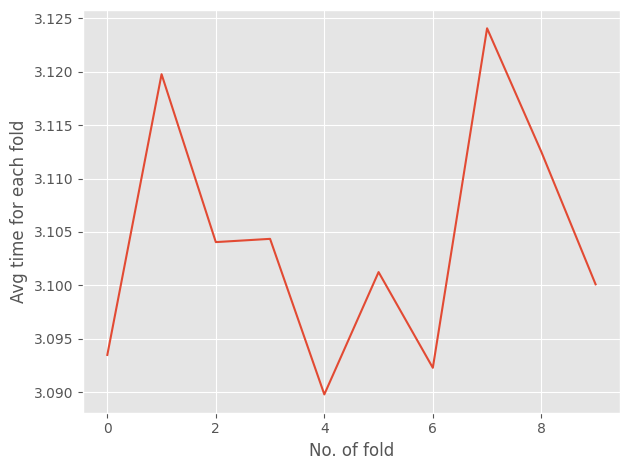

In [43]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

times_rnv2_n = np.zeros((10,100))
for i, row in enumerate(times_rnv2):
    times_rnv2_n[i, :len(row)] = row

times_rnv2_n_n = np.mean(times_rnv2_n,axis=1)

plt.plot(times_rnv2_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")

plt.tight_layout()
plt.savefig("rnv2 times")
plt.show()

In [44]:
train_acc_rnv2_n = np.zeros((10,100))
for i, row in enumerate(train_acc_rnv2):
    train_acc_rnv2_n[i, :len(row)] = row
    
test_acc_rnv2_n = np.zeros((10,100))
for i, row in enumerate(test_acc_rnv2):
    test_acc_rnv2_n[i, :len(row)] = row
    
train_loss_rnv2_n = np.zeros((10,100))
for i, row in enumerate(train_loss_rnv2):
    train_loss_rnv2_n[i, :len(row)] = row
    
test_loss_rnv2_n = np.zeros((10,100))
for i, row in enumerate(test_loss_rnv2):
    test_loss_rnv2_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_rnv2_n = np.mean(train_acc_rnv2_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_rnv2_n = np.mean(test_acc_rnv2_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_rnv2_n = np.mean(train_loss_rnv2_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_rnv2_n = np.mean(test_loss_rnv2_n,axis=0)

In [45]:
data = [train_acc_rnv2_n,test_acc_rnv2_n,train_loss_rnv2_n,test_loss_rnv2_n]

df = pd.DataFrame(data)
df.to_csv('rnv2_acc', index=False)
df = pd.read_csv('rnv2_acc')

train_acc_rnv2_n = df.iloc[0]
test_acc_rnv2_n = df.iloc[1]
train_loss_rnv2_n = df.iloc[2]
test_loss_rnv2_n = df.iloc[3]


df_t = pd.DataFrame([times_rnv2_n_n])
df_t.to_csv('rnv2_times', index=False)
df_t = pd.read_csv('rnv2_times')

times_rnv2_n_n = df_t.iloc[0]

In [46]:
train_acc_rnv2_n

0     0.236631
1     0.232788
2     0.236468
3     0.234301
4     0.236427
        ...   
95    0.236549
96    0.235814
97    0.238512
98    0.237980
99    0.234996
Name: 0, Length: 100, dtype: float64

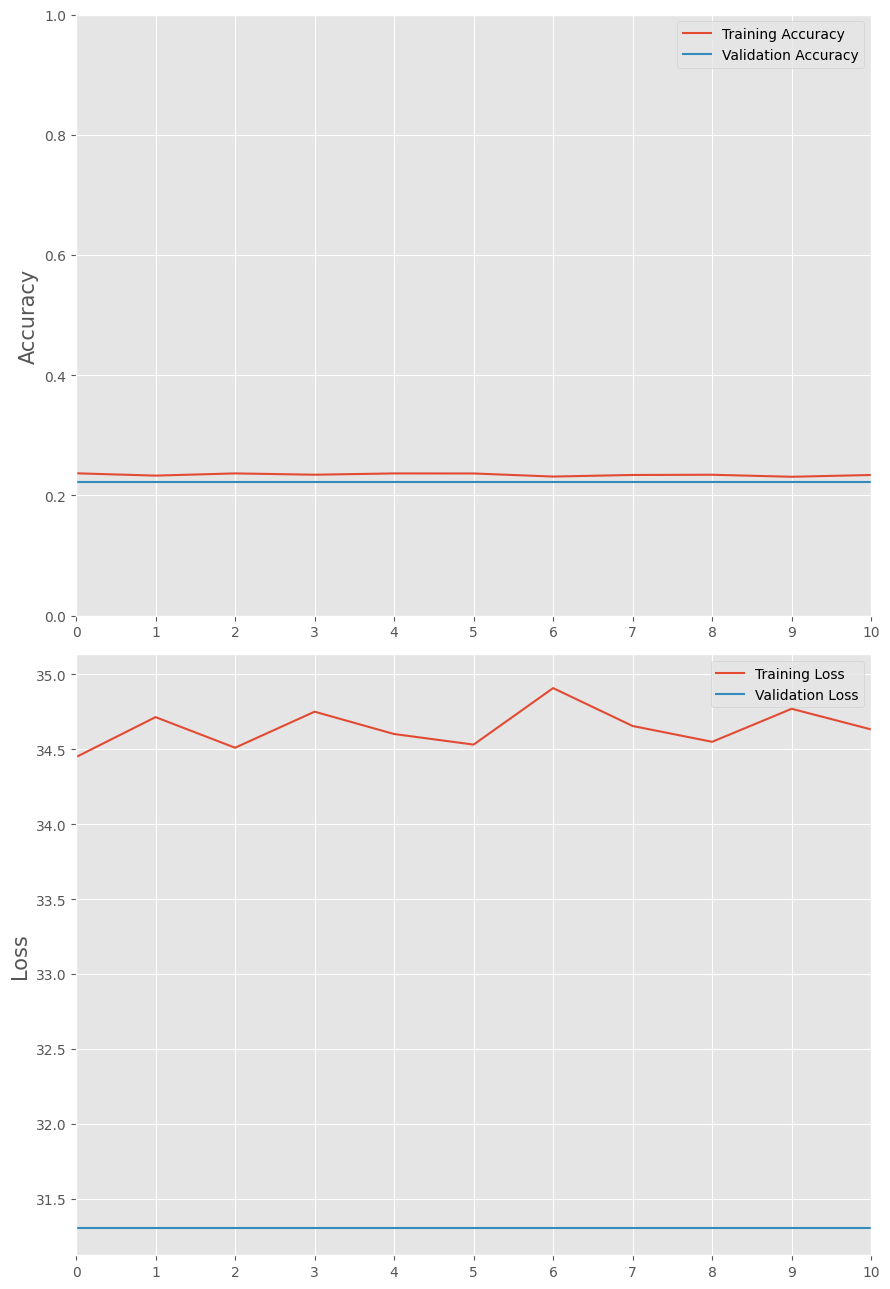

In [47]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_rnv2_n, label='Training Accuracy')
axs[0].plot(test_acc_rnv2_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_rnv2_n, label='Training Loss')
axs[1].plot(test_loss_rnv2_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("rnv2 Training and Testing Loss")
plt.show()

In [48]:
np.array(scores_rnv2).shape

(10, 302, 4)

In [49]:
y_pred_rnv2 = np.argmax(scores_rnv2,axis=2)

In [50]:
y_pred_rnv2.shape

(10, 302)

In [51]:
from sklearn.metrics import accuracy_score
acc_scores_rnv2 = []
for i in range(len(y_test_all_rnv2)):
    acc_scores_rnv2.append(accuracy_score(y_true = y_test_all_rnv2[i],y_pred = y_pred_rnv2[i]))

In [52]:
import gc
gc.collect()

23657

In [53]:
acc_scores_rnv2

[0.1291390728476821,
 0.3576158940397351,
 0.12582781456953643,
 0.13245033112582782,
 0.3841059602649007,
 0.3576158940397351,
 0.12582781456953643,
 0.3609271523178808,
 0.12582781456953643,
 0.12582781456953643]

In [54]:
df_acc = pd.DataFrame([acc_scores_rnv2])

df_acc.to_csv('rnv2_accuracy', index=False)

df_acc = pd.read_csv('rnv2_accuracy')

acc_scores_rnv2 = df_acc.iloc[0].values

In [55]:
y_test_all_n = np.array(y_test_all_rnv2)

y_pred_rnv2_n = y_pred_rnv2.flatten()
y_test_all_n = y_test_all_n.flatten()

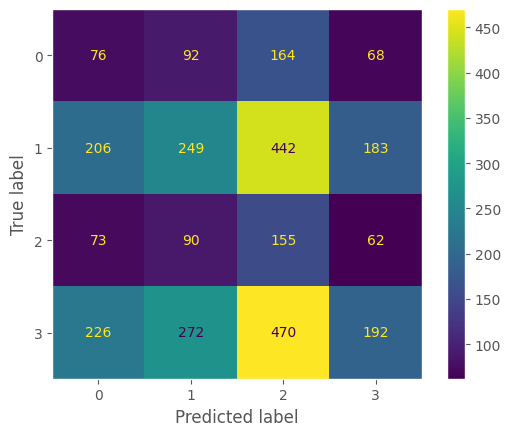

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_rnv2_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("rnv2")
plt.show()

In [57]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_rnv2_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.19      0.15       400
           1       0.35      0.23      0.28      1080
           2       0.13      0.41      0.19       380
           3       0.38      0.17      0.23      1160

    accuracy                           0.22      3020
   macro avg       0.25      0.25      0.21      3020
weighted avg       0.31      0.22      0.23      3020



# VGG16

In [58]:
import gc
gc.collect()

6230

In [59]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_vgg16 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_vgg16.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [60]:
def create_model_vgg16():

    model_vgg16 = tf.keras.Sequential([
    tf.keras.applications.VGG16(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_vgg16.trainable = False
    return model_vgg16

In [61]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_vgg16 = []
y_test_all_vgg16 = []
train_acc_vgg16 = []
test_acc_vgg16 = []
train_loss_vgg16 = []
test_loss_vgg16 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_vgg16.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_vgg16 = None
    model_vgg16 = create_model_vgg16()
        
    model_vgg16.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_vgg16.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_vgg16.predict(X_test)
    
    scores_vgg16.append(x)
    train_acc_vgg16.append(history.history["accuracy"])
    test_acc_vgg16.append(history.history["val_accuracy"])
    train_loss_vgg16.append(history.history["loss"])
    test_loss_vgg16.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 10s 95ms/step - loss: 2.1166 - accuracy: 0.2351 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 5s 61ms/step - loss: 2.0951 - accuracy: 0.2150 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 60ms/step - loss: 2.1085 - accuracy: 0.2277 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 60ms/step - loss: 2.1442 - accuracy: 0.2081 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 5s 60ms/step - loss: 2.1045 - accuracy: 0.2216 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 5s 60ms/step - loss: 2.1079 - accuracy: 0.2249 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 0.0010
Epoch 7/100
77/77 [=========================

Time taken for epoch 29: 4.68 seconds
77/77 [==============================] - 5s 61ms/step - loss: 2.1176 - accuracy: 0.2195 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 5s 61ms/step - loss: 2.1187 - accuracy: 0.2208 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 5s 60ms/step - loss: 2.0858 - accuracy: 0.2404 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 5s 60ms/step - loss: 2.1426 - accuracy: 0.2101 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 5s 60ms/step - loss: 2.1036 - accuracy: 0.2232 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 5s 60ms/step - loss: 2.1180 - accuracy: 0.2150 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 5s 61ms/step - loss: 2.0885 - accuracy: 0.2334 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 5s 60ms/step - loss: 2.1070 - accuracy: 0.2277 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 5s 61ms/step - loss: 2.1082 - accuracy: 0.2281 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 5s 61ms/step - loss: 2.1389 - accuracy: 0.2167 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 5s 61ms/step - loss: 2.1067 - accuracy: 0.2146 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 5s 60ms/step - loss: 2.1102 - accuracy: 0.2285 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 2.5600e-09
Epoch 64/100
76/77 [====================

77/77 [==============================] - 5s 61ms/step - loss: 2.1132 - accuracy: 0.2232 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 5s 60ms/step - loss: 2.1216 - accuracy: 0.2204 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 5s 61ms/step - loss: 2.1093 - accuracy: 0.2306 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 5s 61ms/step - loss: 2.1332 - accuracy: 0.2138 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 5s 60ms/step - loss: 2.0976 - accuracy: 0.2204 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 5s 61ms/step - loss: 2.0914 - accuracy: 0.2216 - val_loss: 1.8247 - val_accuracy: 0.1324 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] -

Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 3.1290 - accuracy: 0.1674
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 4.64 seconds
77/77 [==============================] - 5s 60ms/step - loss: 3.1242 - accuracy: 0.1680 - val_loss: 3.1742 - val_accuracy: 0.1103 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 5s 61ms/step - loss: 3.1718 - accuracy: 0.1574 - val_loss: 3.1742 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 5s 60ms/step - loss: 3.1163 - accuracy: 0.1701 - val_loss: 3.1742 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 5s 60ms/step - loss: 3.1888 - accuracy: 0.1607 - val_loss: 3.1742 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 5s 61ms/step - loss: 3.1861 - accuracy: 0.1460 - val_loss: 3.1742 - val_accuracy: 0.1103 - lr: 4.0000e-05
E

76/77 [============================>.] - ETA: 0s - loss: 3.1741 - accuracy: 0.1464
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 4.67 seconds
77/77 [==============================] - 5s 61ms/step - loss: 3.1725 - accuracy: 0.1460 - val_loss: 3.1742 - val_accuracy: 0.1103 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 5s 60ms/step - loss: 3.1493 - accuracy: 0.1660 - val_loss: 3.1742 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 5s 61ms/step - loss: 3.1476 - accuracy: 0.1558 - val_loss: 3.1742 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 5s 60ms/step - loss: 3.1948 - accuracy: 0.1570 - val_loss: 3.1742 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 5s 61ms/step - loss: 3.1656 - accuracy: 0.1578 - val_loss: 3.1742 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 48/100
77

77/77 [==============================] - ETA: 0s - loss: 3.2026 - accuracy: 0.1447
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 4.64 seconds
77/77 [==============================] - 5s 60ms/step - loss: 3.2026 - accuracy: 0.1447 - val_loss: 3.1742 - val_accuracy: 0.1103 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 5s 60ms/step - loss: 3.0961 - accuracy: 0.1533 - val_loss: 3.1742 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 5s 61ms/step - loss: 3.1372 - accuracy: 0.1525 - val_loss: 3.1742 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 5s 60ms/step - loss: 3.1532 - accuracy: 0.1451 - val_loss: 3.1742 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 5s 61ms/step - loss: 3.1544 - accuracy: 0.1570 - val_loss: 3.1742 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 76/100
7

76/77 [============================>.] - ETA: 0s - loss: 3.1698 - accuracy: 0.1513
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 4.63 seconds
77/77 [==============================] - 5s 60ms/step - loss: 3.1678 - accuracy: 0.1517 - val_loss: 3.1742 - val_accuracy: 0.1103 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 52ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 5s 63ms/step - loss: 1.6229 - accuracy: 0.2604 - val_loss: 1.4120 - val_accuracy: 0.2941 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 5s 60ms/step - loss: 1.6330 - accuracy: 0.2543 - val_loss: 1.4120 - val_accuracy: 0.2941 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 60ms/step - loss: 1.6166 - accuracy: 0.2572 - val_loss: 1.4120 - val_accuracy: 0.2941 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 60ms/step - loss: 1.6053 - accuracy: 0.2

77/77 [==============================] - 5s 60ms/step - loss: 1.6204 - accuracy: 0.2482 - val_loss: 1.4120 - val_accuracy: 0.2941 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 5s 60ms/step - loss: 1.6439 - accuracy: 0.2449 - val_loss: 1.4120 - val_accuracy: 0.2941 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.6223 - accuracy: 0.2661
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 4.66 seconds
77/77 [==============================] - 5s 61ms/step - loss: 1.6223 - accuracy: 0.2661 - val_loss: 1.4120 - val_accuracy: 0.2941 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 5s 60ms/step - loss: 1.6213 - accuracy: 0.2612 - val_loss: 1.4120 - val_accuracy: 0.2941 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 5s 60ms/step - loss: 1.6564 - accuracy: 0.2379 - val_loss: 1.4120 - val_accuracy: 0.2941 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 5s 60ms/step - loss: 1.6401 - accuracy: 0.2465 - val_loss: 1.4120 - val_accuracy: 0.2941 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 5s 61ms/step - loss: 1.6393 - accuracy: 0.2396 - val_loss: 1.4120 - val_accuracy: 0.2941 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 1.6144 - accuracy: 0.2590
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 4.67 seconds
77/77 [==============================] - 5s 61ms/step - loss: 1.6144 - accuracy: 0.2592 - val_loss: 1.4120 - val_accuracy: 0.2941 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 5s 60ms/step - loss: 1.6687 - accuracy: 0.2576 - val_loss: 1.4120 - val_accuracy: 0.2941 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 5s 61ms/step - loss: 1.6175 - accuracy: 0.2567 - val_loss: 1.4120 - val_accuracy: 0.2941 - lr: 2.5600e-09
Epoch 60/100
7

77/77 [==============================] - 5s 61ms/step - loss: 1.6238 - accuracy: 0.2657 - val_loss: 1.4120 - val_accuracy: 0.2941 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 5s 61ms/step - loss: 1.6485 - accuracy: 0.2584 - val_loss: 1.4120 - val_accuracy: 0.2941 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 1.6234 - accuracy: 0.2660
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 4.63 seconds
77/77 [==============================] - 5s 60ms/step - loss: 1.6247 - accuracy: 0.2653 - val_loss: 1.4120 - val_accuracy: 0.2941 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 5s 60ms/step - loss: 1.6175 - accuracy: 0.2641 - val_loss: 1.4120 - val_accuracy: 0.2941 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 5s 61ms/step - loss: 1.6467 - accuracy: 0.2416 - val_loss: 1.4120 - val_accuracy: 0.2941 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 5s 60ms/step - loss: 2.9448 - accuracy: 0.1361 - val_loss: 2.6540 - val_accuracy: 0.1066 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 5s 60ms/step - loss: 2.9496 - accuracy: 0.1341 - val_loss: 2.6540 - val_accuracy: 0.1066 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 5s 61ms/step - loss: 2.9469 - accuracy: 0.1329 - val_loss: 2.6540 - val_accuracy: 0.1066 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 5s 61ms/step - loss: 2.9552 - accuracy: 0.1316 - val_loss: 2.6540 - val_accuracy: 0.1066 - lr: 2.0000e-04
Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 2.9375 - accuracy: 0.1291
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 4.59 seconds
77/77 [==============================] - 5s 60ms/step - loss: 2.9356 - accuracy: 0.1300 - val_loss: 2.6540 - val_accuracy: 0.1066 - lr: 2.0000e-04
Epoch 16/100
7

77/77 [==============================] - 5s 61ms/step - loss: 2.9161 - accuracy: 0.1390 - val_loss: 2.6540 - val_accuracy: 0.1066 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 5s 60ms/step - loss: 2.9590 - accuracy: 0.1251 - val_loss: 2.6540 - val_accuracy: 0.1066 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 5s 60ms/step - loss: 2.9559 - accuracy: 0.1353 - val_loss: 2.6540 - val_accuracy: 0.1066 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 5s 61ms/step - loss: 2.9592 - accuracy: 0.1439 - val_loss: 2.6540 - val_accuracy: 0.1066 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 2.9575 - accuracy: 0.1287
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 4.61 seconds
77/77 [==============================] - 5s 60ms/step - loss: 2.9548 - accuracy: 0.1292 - val_loss: 2.6540 - val_accuracy: 0.1066 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 5s 60ms/step - loss: 2.9742 - accuracy: 0.1321 - val_loss: 2.6540 - val_accuracy: 0.1066 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 5s 60ms/step - loss: 2.9699 - accuracy: 0.1349 - val_loss: 2.6540 - val_accuracy: 0.1066 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 5s 61ms/step - loss: 2.9438 - accuracy: 0.1406 - val_loss: 2.6540 - val_accuracy: 0.1066 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 5s 60ms/step - loss: 2.9600 - accuracy: 0.1382 - val_loss: 2.6540 - val_accuracy: 0.1066 - lr: 5.1200e-10
Epoch 71/100
76/77 [============================>.] - ETA: 0s - loss: 2.9829 - accuracy: 0.1414
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 4.64 seconds
77/77 [==============================] - 5s 60ms/step - loss: 2.9862 - accuracy: 0.1410 - val_loss: 2.6540 - val_accuracy: 0.1066 - lr: 5.1200e-10
Epoch 72/100
7

77/77 [==============================] - 5s 61ms/step - loss: 2.9805 - accuracy: 0.1468 - val_loss: 2.6540 - val_accuracy: 0.1066 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 5s 61ms/step - loss: 2.9966 - accuracy: 0.1325 - val_loss: 2.6540 - val_accuracy: 0.1066 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 5s 61ms/step - loss: 2.9587 - accuracy: 0.1357 - val_loss: 2.6540 - val_accuracy: 0.1066 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 5s 60ms/step - loss: 2.9379 - accuracy: 0.1439 - val_loss: 2.6540 - val_accuracy: 0.1066 - lr: 8.1920e-13
Epoch 99/100
76/77 [============================>.] - ETA: 0s - loss: 2.9935 - accuracy: 0.1303
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 4.65 seconds
77/77 [==============================] - 5s 61ms/step - loss: 2.9926 - accuracy: 0.1304 - val_loss: 2.6540 - val_accuracy: 0.1066 - lr: 8.1920e-13
Epoch 100/100


77/77 [==============================] - 5s 60ms/step - loss: 2.3317 - accuracy: 0.3794 - val_loss: 2.1291 - val_accuracy: 0.4007 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 5s 61ms/step - loss: 2.3401 - accuracy: 0.3818 - val_loss: 2.1291 - val_accuracy: 0.4007 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 5s 60ms/step - loss: 2.3105 - accuracy: 0.3823 - val_loss: 2.1291 - val_accuracy: 0.4007 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 5s 61ms/step - loss: 2.3497 - accuracy: 0.3810 - val_loss: 2.1291 - val_accuracy: 0.4007 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 5s 60ms/step - loss: 2.3027 - accuracy: 0.3827 - val_loss: 2.1291 - val_accuracy: 0.4007 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 5s 60ms/step - loss: 2.3622 - accuracy: 0.3790 - val_loss: 2.1291 - val_accuracy: 0.4007 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] -

77/77 [==============================] - 5s 61ms/step - loss: 2.3284 - accuracy: 0.3818 - val_loss: 2.1291 - val_accuracy: 0.4007 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 5s 60ms/step - loss: 2.3143 - accuracy: 0.3827 - val_loss: 2.1291 - val_accuracy: 0.4007 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 5s 61ms/step - loss: 2.3026 - accuracy: 0.3798 - val_loss: 2.1291 - val_accuracy: 0.4007 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 5s 61ms/step - loss: 2.3308 - accuracy: 0.3859 - val_loss: 2.1291 - val_accuracy: 0.4007 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 5s 61ms/step - loss: 2.2943 - accuracy: 0.3839 - val_loss: 2.1291 - val_accuracy: 0.4007 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 5s 60ms/step - loss: 2.3154 - accuracy: 0.3794 - val_loss: 2.1291 - val_accuracy: 0.4007 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] -

77/77 [==============================] - 5s 61ms/step - loss: 2.3368 - accuracy: 0.3839 - val_loss: 2.1291 - val_accuracy: 0.4007 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 5s 60ms/step - loss: 2.3372 - accuracy: 0.3765 - val_loss: 2.1291 - val_accuracy: 0.4007 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 5s 61ms/step - loss: 2.2857 - accuracy: 0.3859 - val_loss: 2.1291 - val_accuracy: 0.4007 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 5s 61ms/step - loss: 2.3359 - accuracy: 0.3855 - val_loss: 2.1291 - val_accuracy: 0.4007 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 5s 60ms/step - loss: 2.3164 - accuracy: 0.3814 - val_loss: 2.1291 - val_accuracy: 0.4007 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 5s 60ms/step - loss: 2.3371 - accuracy: 0.3802 - val_loss: 2.1291 - val_accuracy: 0.4007 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] -

77/77 [==============================] - 5s 60ms/step - loss: 2.7739 - accuracy: 0.1676 - val_loss: 2.6953 - val_accuracy: 0.1176 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 2.7923 - accuracy: 0.1648
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 4.64 seconds
77/77 [==============================] - 5s 60ms/step - loss: 2.7923 - accuracy: 0.1648 - val_loss: 2.6953 - val_accuracy: 0.1176 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 5s 60ms/step - loss: 2.8098 - accuracy: 0.1541 - val_loss: 2.6953 - val_accuracy: 0.1176 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 5s 60ms/step - loss: 2.7844 - accuracy: 0.1615 - val_loss: 2.6953 - val_accuracy: 0.1176 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 5s 60ms/step - loss: 2.7702 - accuracy: 0.1672 - val_loss: 2.6953 - val_accuracy: 0.1176 - lr: 2.0000e-04
Epoch 12/100
77/77 [======

77/77 [==============================] - 5s 60ms/step - loss: 2.8390 - accuracy: 0.1480 - val_loss: 2.6953 - val_accuracy: 0.1176 - lr: 1.6000e-06
Epoch 36/100
76/77 [============================>.] - ETA: 0s - loss: 2.7917 - accuracy: 0.1575
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 4.64 seconds
77/77 [==============================] - 5s 60ms/step - loss: 2.7933 - accuracy: 0.1574 - val_loss: 2.6953 - val_accuracy: 0.1176 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 5s 61ms/step - loss: 2.8052 - accuracy: 0.1562 - val_loss: 2.6953 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 5s 60ms/step - loss: 2.7683 - accuracy: 0.1619 - val_loss: 2.6953 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 5s 60ms/step - loss: 2.7934 - accuracy: 0.1578 - val_loss: 2.6953 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 40/100
77

77/77 [==============================] - 5s 61ms/step - loss: 2.7965 - accuracy: 0.1729 - val_loss: 2.6953 - val_accuracy: 0.1176 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 2.7859 - accuracy: 0.1620
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 4.66 seconds
77/77 [==============================] - 5s 61ms/step - loss: 2.7837 - accuracy: 0.1631 - val_loss: 2.6953 - val_accuracy: 0.1176 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 5s 60ms/step - loss: 2.7766 - accuracy: 0.1660 - val_loss: 2.6953 - val_accuracy: 0.1176 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 5s 60ms/step - loss: 2.8213 - accuracy: 0.1574 - val_loss: 2.6953 - val_accuracy: 0.1176 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 5s 61ms/step - loss: 2.8099 - accuracy: 0.1574 - val_loss: 2.6953 - val_accuracy: 0.1176 - lr: 5.1200e-10
Epoch 68/100
77/7

77/77 [==============================] - 5s 61ms/step - loss: 2.7861 - accuracy: 0.1586 - val_loss: 2.6953 - val_accuracy: 0.1176 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] - ETA: 0s - loss: 2.7898 - accuracy: 0.1575
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 4.65 seconds
77/77 [==============================] - 5s 60ms/step - loss: 2.7928 - accuracy: 0.1570 - val_loss: 2.6953 - val_accuracy: 0.1176 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 5s 60ms/step - loss: 2.8182 - accuracy: 0.1603 - val_loss: 2.6953 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 5s 61ms/step - loss: 2.7928 - accuracy: 0.1586 - val_loss: 2.6953 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 5s 60ms/step - loss: 2.8193 - accuracy: 0.1570 - val_loss: 2.6953 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 96/100
77

77/77 [==============================] - 5s 61ms/step - loss: 1.8666 - accuracy: 0.2216 - val_loss: 1.7126 - val_accuracy: 0.1471 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 5s 60ms/step - loss: 1.8789 - accuracy: 0.2171 - val_loss: 1.7126 - val_accuracy: 0.1471 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 5s 61ms/step - loss: 1.9036 - accuracy: 0.2163 - val_loss: 1.7126 - val_accuracy: 0.1471 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.8720 - accuracy: 0.2138
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 4.66 seconds
77/77 [==============================] - 5s 61ms/step - loss: 1.8720 - accuracy: 0.2138 - val_loss: 1.7126 - val_accuracy: 0.1471 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 5s 60ms/step - loss: 1.9084 - accuracy: 0.2204 - val_loss: 1.7126 - val_accuracy: 0.1471 - lr: 8.0000e-06
Epoch 24/100
77

77/77 [==============================] - 5s 60ms/step - loss: 1.8823 - accuracy: 0.2183 - val_loss: 1.7126 - val_accuracy: 0.1471 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 5s 61ms/step - loss: 1.8884 - accuracy: 0.2253 - val_loss: 1.7126 - val_accuracy: 0.1471 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 5s 61ms/step - loss: 1.8358 - accuracy: 0.2277 - val_loss: 1.7126 - val_accuracy: 0.1471 - lr: 6.4000e-08
Epoch 50/100
76/77 [============================>.] - ETA: 0s - loss: 1.8842 - accuracy: 0.2266
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 4.68 seconds
77/77 [==============================] - 5s 61ms/step - loss: 1.8832 - accuracy: 0.2269 - val_loss: 1.7126 - val_accuracy: 0.1471 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 5s 60ms/step - loss: 1.9124 - accuracy: 0.2220 - val_loss: 1.7126 - val_accuracy: 0.1471 - lr: 1.2800e-08
Epoch 52/100
7

77/77 [==============================] - 5s 60ms/step - loss: 1.8884 - accuracy: 0.2150 - val_loss: 1.7126 - val_accuracy: 0.1471 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 5s 60ms/step - loss: 1.8586 - accuracy: 0.2146 - val_loss: 1.7126 - val_accuracy: 0.1471 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 5s 61ms/step - loss: 1.8958 - accuracy: 0.2093 - val_loss: 1.7126 - val_accuracy: 0.1471 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] - ETA: 0s - loss: 1.8912 - accuracy: 0.2282
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 4.61 seconds
77/77 [==============================] - 5s 60ms/step - loss: 1.8890 - accuracy: 0.2281 - val_loss: 1.7126 - val_accuracy: 0.1471 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 5s 60ms/step - loss: 1.8807 - accuracy: 0.2138 - val_loss: 1.7126 - val_accuracy: 0.1471 - lr: 2.0480e-11
Epoch 80/100
7

Epoch 3/100
77/77 [==============================] - 5s 61ms/step - loss: 1.7938 - accuracy: 0.3761 - val_loss: 1.6743 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 60ms/step - loss: 1.8059 - accuracy: 0.3847 - val_loss: 1.6743 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 5s 60ms/step - loss: 1.8186 - accuracy: 0.3757 - val_loss: 1.6743 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 5s 60ms/step - loss: 1.8454 - accuracy: 0.3655 - val_loss: 1.6743 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 5s 61ms/step - loss: 1.8553 - accuracy: 0.3720 - val_loss: 1.6743 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 1.8065 - accuracy: 0.3787
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 4.63 seconds
77/77 [=========

77/77 [==============================] - 5s 60ms/step - loss: 1.8128 - accuracy: 0.3716 - val_loss: 1.6743 - val_accuracy: 0.3640 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 5s 61ms/step - loss: 1.8002 - accuracy: 0.3790 - val_loss: 1.6743 - val_accuracy: 0.3640 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 5s 60ms/step - loss: 1.8338 - accuracy: 0.3761 - val_loss: 1.6743 - val_accuracy: 0.3640 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 5s 60ms/step - loss: 1.8255 - accuracy: 0.3806 - val_loss: 1.6743 - val_accuracy: 0.3640 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 5s 61ms/step - loss: 1.8157 - accuracy: 0.3769 - val_loss: 1.6743 - val_accuracy: 0.3640 - lr: 1.6000e-06
Epoch 36/100
76/77 [============================>.] - ETA: 0s - loss: 1.8329 - accuracy: 0.3783
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 4.62 seconds
77

77/77 [==============================] - 5s 60ms/step - loss: 1.8311 - accuracy: 0.3765 - val_loss: 1.6743 - val_accuracy: 0.3640 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 5s 60ms/step - loss: 1.8025 - accuracy: 0.3737 - val_loss: 1.6743 - val_accuracy: 0.3640 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 5s 60ms/step - loss: 1.8150 - accuracy: 0.3814 - val_loss: 1.6743 - val_accuracy: 0.3640 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 5s 61ms/step - loss: 1.8184 - accuracy: 0.3798 - val_loss: 1.6743 - val_accuracy: 0.3640 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 5s 60ms/step - loss: 1.8071 - accuracy: 0.3835 - val_loss: 1.6743 - val_accuracy: 0.3640 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 1.8154 - accuracy: 0.3779
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 4.65 seconds
77/7

77/77 [==============================] - 5s 61ms/step - loss: 1.8244 - accuracy: 0.3790 - val_loss: 1.6743 - val_accuracy: 0.3640 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 5s 60ms/step - loss: 1.8250 - accuracy: 0.3765 - val_loss: 1.6743 - val_accuracy: 0.3640 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 5s 61ms/step - loss: 1.8313 - accuracy: 0.3704 - val_loss: 1.6743 - val_accuracy: 0.3640 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 5s 61ms/step - loss: 1.8212 - accuracy: 0.3737 - val_loss: 1.6743 - val_accuracy: 0.3640 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 5s 60ms/step - loss: 1.7900 - accuracy: 0.3741 - val_loss: 1.6743 - val_accuracy: 0.3640 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] - ETA: 0s - loss: 1.7993 - accuracy: 0.3655
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 4.67 seconds
77

Time taken for epoch 15: 4.65 seconds
77/77 [==============================] - 5s 60ms/step - loss: 3.9929 - accuracy: 0.2347 - val_loss: 3.8302 - val_accuracy: 0.1287 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 5s 61ms/step - loss: 3.9870 - accuracy: 0.2269 - val_loss: 3.8302 - val_accuracy: 0.1287 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 5s 60ms/step - loss: 4.0113 - accuracy: 0.2187 - val_loss: 3.8302 - val_accuracy: 0.1287 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 5s 60ms/step - loss: 4.0121 - accuracy: 0.2134 - val_loss: 3.8302 - val_accuracy: 0.1287 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 5s 61ms/step - loss: 4.0425 - accuracy: 0.2187 - val_loss: 3.8302 - val_accuracy: 0.1287 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 5s 60ms/step - loss: 3.9984 - accuracy: 0.2204 - val_loss: 3.8302 - val_accuracy: 0.1287 - lr: 4.0000e-05
Epoch 21/100
77

Epoch 44/100
77/77 [==============================] - 5s 61ms/step - loss: 4.0041 - accuracy: 0.2175 - val_loss: 3.8302 - val_accuracy: 0.1287 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 5s 60ms/step - loss: 4.0034 - accuracy: 0.2232 - val_loss: 3.8302 - val_accuracy: 0.1287 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 5s 60ms/step - loss: 4.0029 - accuracy: 0.2257 - val_loss: 3.8302 - val_accuracy: 0.1287 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 5s 60ms/step - loss: 3.9647 - accuracy: 0.2224 - val_loss: 3.8302 - val_accuracy: 0.1287 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 5s 61ms/step - loss: 3.9641 - accuracy: 0.2326 - val_loss: 3.8302 - val_accuracy: 0.1287 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 5s 60ms/step - loss: 4.0188 - accuracy: 0.2240 - val_loss: 3.8302 - val_accuracy: 0.1287 - lr: 6.4000e-08
Epoch 50/100
76/77 [====================

77/77 [==============================] - 5s 60ms/step - loss: 4.0020 - accuracy: 0.2228 - val_loss: 3.8302 - val_accuracy: 0.1287 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 5s 60ms/step - loss: 4.0367 - accuracy: 0.2171 - val_loss: 3.8302 - val_accuracy: 0.1287 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 5s 61ms/step - loss: 3.9641 - accuracy: 0.2228 - val_loss: 3.8302 - val_accuracy: 0.1287 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 5s 60ms/step - loss: 3.9511 - accuracy: 0.2191 - val_loss: 3.8302 - val_accuracy: 0.1287 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 5s 60ms/step - loss: 4.0082 - accuracy: 0.2208 - val_loss: 3.8302 - val_accuracy: 0.1287 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 5s 60ms/step - loss: 3.9916 - accuracy: 0.2249 - val_loss: 3.8302 - val_accuracy: 0.1287 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] -

10/10 [==============================] - 1s 51ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 5s 63ms/step - loss: 1.9990 - accuracy: 0.2649 - val_loss: 1.8384 - val_accuracy: 0.1581 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 5s 60ms/step - loss: 1.9959 - accuracy: 0.2600 - val_loss: 1.8384 - val_accuracy: 0.1581 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 60ms/step - loss: 1.9579 - accuracy: 0.2711 - val_loss: 1.8384 - val_accuracy: 0.1581 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 60ms/step - loss: 2.0210 - accuracy: 0.2486 - val_loss: 1.8384 - val_accuracy: 0.1581 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 5s 61ms/step - loss: 2.0048 - accuracy: 0.2637 - val_loss: 1.8384 - val_accuracy: 0.1581 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 5s 60ms/step - loss: 1.9793 - accuracy: 0.2661 - val_loss: 1.8384 - val_accuracy: 0.1581 - l

Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 2.0016 - accuracy: 0.2566
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 4.65 seconds
77/77 [==============================] - 5s 61ms/step - loss: 1.9993 - accuracy: 0.2559 - val_loss: 1.8384 - val_accuracy: 0.1581 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 5s 61ms/step - loss: 1.9935 - accuracy: 0.2457 - val_loss: 1.8384 - val_accuracy: 0.1581 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 5s 60ms/step - loss: 1.9707 - accuracy: 0.2629 - val_loss: 1.8384 - val_accuracy: 0.1581 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 5s 61ms/step - loss: 1.9776 - accuracy: 0.2506 - val_loss: 1.8384 - val_accuracy: 0.1581 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 5s 60ms/step - loss: 1.9902 - accuracy: 0.2694 - val_loss: 1.8384 - val_accuracy: 0.1581 - lr: 1.6000e-06
E

76/77 [============================>.] - ETA: 0s - loss: 1.9735 - accuracy: 0.2463
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 4.65 seconds
77/77 [==============================] - 5s 60ms/step - loss: 1.9799 - accuracy: 0.2449 - val_loss: 1.8384 - val_accuracy: 0.1581 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 5s 60ms/step - loss: 2.0023 - accuracy: 0.2396 - val_loss: 1.8384 - val_accuracy: 0.1581 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 5s 61ms/step - loss: 1.9659 - accuracy: 0.2690 - val_loss: 1.8384 - val_accuracy: 0.1581 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 5s 61ms/step - loss: 1.9956 - accuracy: 0.2604 - val_loss: 1.8384 - val_accuracy: 0.1581 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 5s 60ms/step - loss: 1.9753 - accuracy: 0.2641 - val_loss: 1.8384 - val_accuracy: 0.1581 - lr: 2.5600e-09
Epoch 62/100
7

76/77 [============================>.] - ETA: 0s - loss: 2.0440 - accuracy: 0.2512
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 4.67 seconds
77/77 [==============================] - 5s 61ms/step - loss: 2.0434 - accuracy: 0.2527 - val_loss: 1.8384 - val_accuracy: 0.1581 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 5s 60ms/step - loss: 2.0008 - accuracy: 0.2584 - val_loss: 1.8384 - val_accuracy: 0.1581 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 5s 60ms/step - loss: 1.9957 - accuracy: 0.2441 - val_loss: 1.8384 - val_accuracy: 0.1581 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 5s 61ms/step - loss: 1.9603 - accuracy: 0.2719 - val_loss: 1.8384 - val_accuracy: 0.1581 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 5s 60ms/step - loss: 1.9953 - accuracy: 0.2494 - val_loss: 1.8384 - val_accuracy: 0.1581 - lr: 4.0960e-12
Epoch 90/100
77

In [62]:
import gc
gc.collect()

0

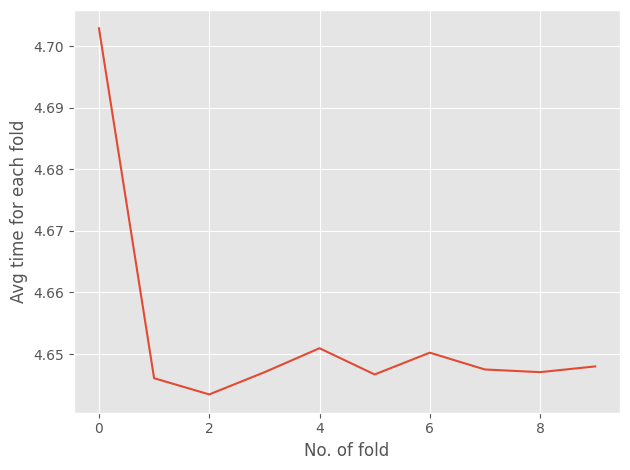

In [63]:
import matplotlib.pyplot as plt

times_vgg16_n = np.zeros((10,100))
for i, row in enumerate(times_vgg16):
    times_vgg16_n[i, :len(row)] = row

times_vgg16_n_n = np.mean(times_vgg16_n,axis=1)

plt.plot(times_vgg16_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("vgg16 times")
plt.show()

In [65]:
train_acc_vgg16_n = np.zeros((10,100))
for i, row in enumerate(train_acc_vgg16):
    train_acc_vgg16_n[i, :len(row)] = row
    
test_acc_vgg16_n = np.zeros((10,100))
for i, row in enumerate(test_acc_vgg16):
    test_acc_vgg16_n[i, :len(row)] = row
    
train_loss_vgg16_n = np.zeros((10,100))
for i, row in enumerate(train_loss_vgg16):
    train_loss_vgg16_n[i, :len(row)] = row
    
test_loss_vgg16_n = np.zeros((10,100))
for i, row in enumerate(test_loss_vgg16):
    test_loss_vgg16_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_vgg16_n = np.mean(train_acc_vgg16_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_vgg16_n = np.mean(test_acc_vgg16_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_vgg16_n = np.mean(train_loss_vgg16_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_vgg16_n = np.mean(test_loss_vgg16_n,axis=0)

In [66]:
data = [train_acc_vgg16_n,test_acc_vgg16_n,train_loss_vgg16_n,test_loss_vgg16_n]

df = pd.DataFrame(data)
df.to_csv('vgg16_acc', index=False)
df = pd.read_csv('vgg16_acc')

train_acc_vgg16_n = df.iloc[0]
test_acc_vgg16_n = df.iloc[1]
train_loss_vgg16_n = df.iloc[2]
test_loss_vgg16_n = df.iloc[3]


df_t = pd.DataFrame([times_vgg16_n_n])
df_t.to_csv('vgg16_times', index=False)
df_t = pd.read_csv('vgg16_times')

times_vgg16_n_n = df_t.iloc[0]

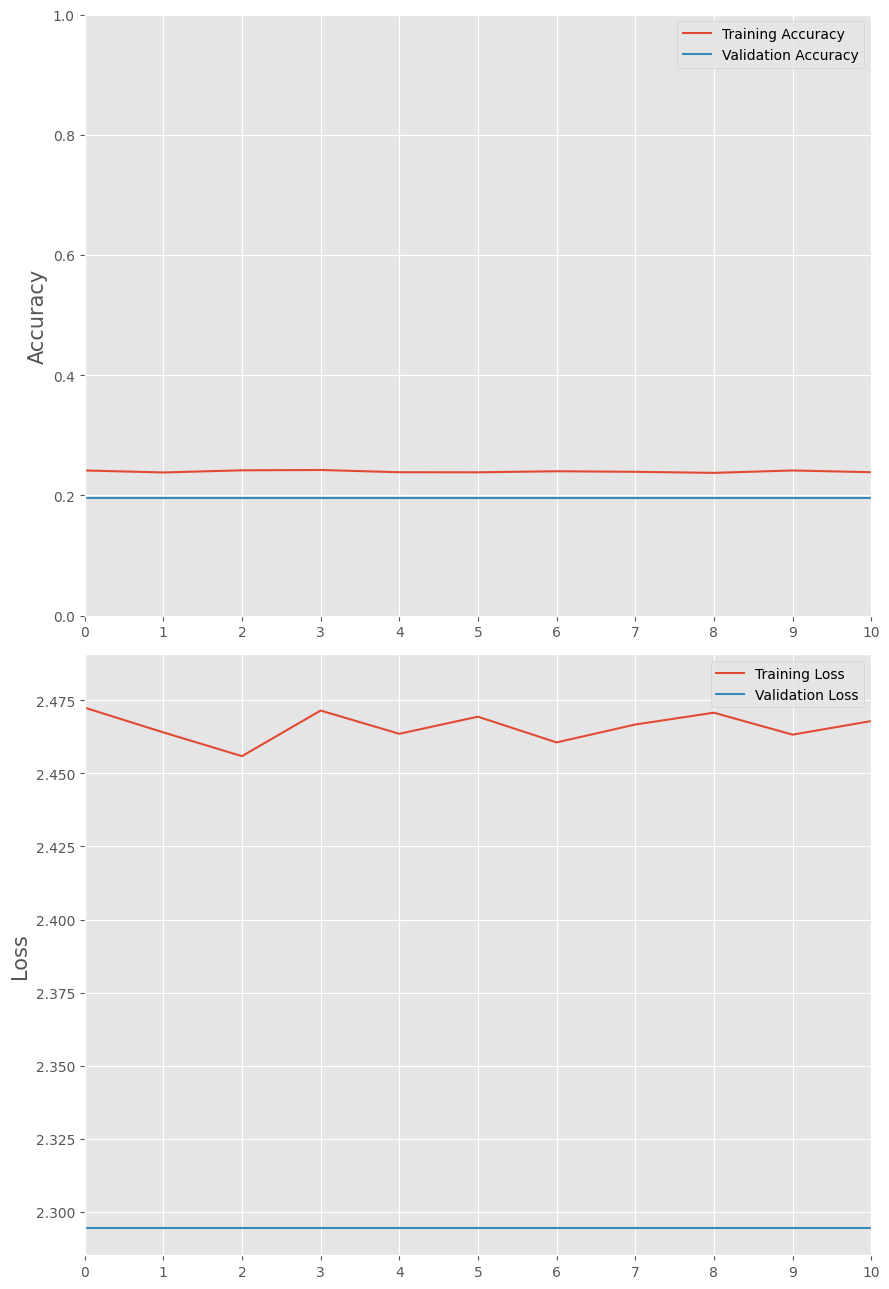

In [67]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_vgg16_n, label='Training Accuracy')
axs[0].plot(test_acc_vgg16_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_vgg16_n, label='Training Loss')
axs[1].plot(test_loss_vgg16_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("vgg16 Training and Testing Loss")
plt.show()

In [68]:
np.array(scores_vgg16).shape

(10, 302, 4)

In [69]:
y_pred_vgg16 = np.argmax(scores_vgg16,axis=2)

In [70]:
y_pred_vgg16.shape

(10, 302)

In [71]:
from sklearn.metrics import accuracy_score
acc_scores_vgg16 = []
for i in range(len(y_test_all_vgg16)):
    acc_scores_vgg16.append(accuracy_score(y_true = y_test_all_vgg16[i],y_pred = y_pred_vgg16[i]))

In [72]:
acc_scores_vgg16

[0.1456953642384106,
 0.12251655629139073,
 0.28807947019867547,
 0.11920529801324503,
 0.3841059602649007,
 0.12582781456953643,
 0.15894039735099338,
 0.3841059602649007,
 0.1456953642384106,
 0.17549668874172186]

In [73]:
df_acc = pd.DataFrame([acc_scores_vgg16])

df_acc.to_csv('vgg16_accuracy', index=False)

df_acc = pd.read_csv('vgg16_accuracy')

acc_scores_vgg16 = df_acc.iloc[0].values

In [74]:
y_test_all_n = np.array(y_test_all_vgg16)

y_pred_vgg16_n = y_pred_vgg16.flatten()
y_test_all_n = y_test_all_n.flatten()

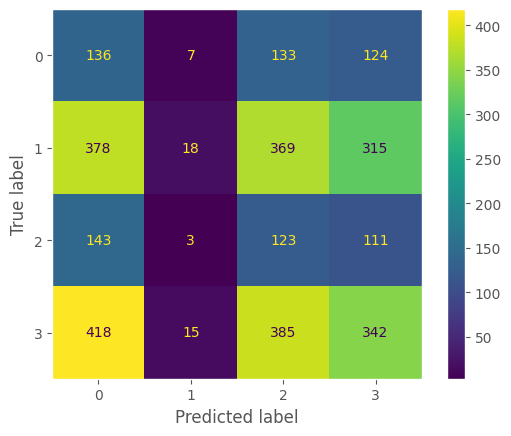

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_vgg16_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("vgg16")
plt.show()

In [76]:
import gc
gc.collect()

30391

In [77]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_vgg16_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.34      0.18       400
           1       0.42      0.02      0.03      1080
           2       0.12      0.32      0.18       380
           3       0.38      0.29      0.33      1160

    accuracy                           0.20      3020
   macro avg       0.26      0.24      0.18      3020
weighted avg       0.33      0.20      0.19      3020



# VGG19

In [78]:
import gc
gc.collect()

0

In [79]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_vgg19 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_vgg19.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [80]:
def create_model_vgg19():

    model_vgg19 = tf.keras.Sequential([
    tf.keras.applications.VGG19(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_vgg19.trainable = False
    return model_vgg19

In [81]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_vgg19 = []
y_test_all_vgg19 = []
train_acc_vgg19 = []
test_acc_vgg19 = []
train_loss_vgg19 = []
test_loss_vgg19 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_vgg19.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_vgg19 = None
    model_vgg19 = create_model_vgg19()
        
    model_vgg19.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_vgg19.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_vgg19.predict(X_test)
    
    scores_vgg19.append(x)
    train_acc_vgg19.append(history.history["accuracy"])
    test_acc_vgg19.append(history.history["val_accuracy"])
    train_loss_vgg19.append(history.history["loss"])
    test_loss_vgg19.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 6s 72ms/step - loss: 1.6150 - accuracy: 0.3034 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 5s 69ms/step - loss: 1.6032 - accuracy: 0.3217 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 70ms/step - loss: 1.6224 - accuracy: 0.3107 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 69ms/step - loss: 1.6017 - accuracy: 0.3234 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 5s 70ms/step - loss: 1.6235 - accuracy: 0.3062 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 5s 69ms/step - loss: 1.5840 - accuracy: 0.3406 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Time taken for epoch 29: 5.44 seconds
77/77 [==============================] - 5s 71ms/step - loss: 1.6333 - accuracy: 0.3029 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 5s 70ms/step - loss: 1.6109 - accuracy: 0.3095 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 5s 71ms/step - loss: 1.6045 - accuracy: 0.3173 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 5s 71ms/step - loss: 1.6100 - accuracy: 0.3119 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 5s 71ms/step - loss: 1.6178 - accuracy: 0.3148 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 5s 71ms/step - loss: 1.6270 - accuracy: 0.3062 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 5s 71ms/step - loss: 1.6111 - accuracy: 0.3132 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 5s 71ms/step - loss: 1.6081 - accuracy: 0.3181 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 5s 71ms/step - loss: 1.6440 - accuracy: 0.3070 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 5s 71ms/step - loss: 1.5776 - accuracy: 0.3328 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 5s 70ms/step - loss: 1.6012 - accuracy: 0.3095 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 5s 71ms/step - loss: 1.6078 - accuracy: 0.3042 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 2.5600e-09
Epoch 64/100
76/77 [====================

77/77 [==============================] - 5s 70ms/step - loss: 1.6127 - accuracy: 0.3271 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 5s 71ms/step - loss: 1.6176 - accuracy: 0.3140 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 5s 71ms/step - loss: 1.6069 - accuracy: 0.3156 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 5s 71ms/step - loss: 1.6292 - accuracy: 0.3156 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 5s 71ms/step - loss: 1.6234 - accuracy: 0.3148 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 5s 70ms/step - loss: 1.6144 - accuracy: 0.3140 - val_loss: 1.4516 - val_accuracy: 0.2721 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] -

Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 2.6901 - accuracy: 0.3236
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 5.46 seconds
77/77 [==============================] - 5s 71ms/step - loss: 2.6937 - accuracy: 0.3226 - val_loss: 2.5162 - val_accuracy: 0.4118 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 5s 71ms/step - loss: 2.6546 - accuracy: 0.3230 - val_loss: 2.5162 - val_accuracy: 0.4118 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 5s 71ms/step - loss: 2.6958 - accuracy: 0.3156 - val_loss: 2.5162 - val_accuracy: 0.4118 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 5s 71ms/step - loss: 2.6753 - accuracy: 0.3267 - val_loss: 2.5162 - val_accuracy: 0.4118 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 5s 71ms/step - loss: 2.6611 - accuracy: 0.3136 - val_loss: 2.5162 - val_accuracy: 0.4118 - lr: 4.0000e-05
E

76/77 [============================>.] - ETA: 0s - loss: 2.6695 - accuracy: 0.3294
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 5.44 seconds
77/77 [==============================] - 5s 71ms/step - loss: 2.6694 - accuracy: 0.3291 - val_loss: 2.5162 - val_accuracy: 0.4118 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 5s 71ms/step - loss: 2.6792 - accuracy: 0.3410 - val_loss: 2.5162 - val_accuracy: 0.4118 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 5s 71ms/step - loss: 2.6958 - accuracy: 0.3164 - val_loss: 2.5162 - val_accuracy: 0.4118 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 5s 71ms/step - loss: 2.6690 - accuracy: 0.3173 - val_loss: 2.5162 - val_accuracy: 0.4118 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 5s 71ms/step - loss: 2.6573 - accuracy: 0.3152 - val_loss: 2.5162 - val_accuracy: 0.4118 - lr: 6.4000e-08
Epoch 48/100
77

76/77 [============================>.] - ETA: 0s - loss: 2.6544 - accuracy: 0.3199
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 5.46 seconds
77/77 [==============================] - 5s 71ms/step - loss: 2.6516 - accuracy: 0.3201 - val_loss: 2.5162 - val_accuracy: 0.4118 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 5s 71ms/step - loss: 2.6545 - accuracy: 0.3271 - val_loss: 2.5162 - val_accuracy: 0.4118 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 5s 71ms/step - loss: 2.6657 - accuracy: 0.3291 - val_loss: 2.5162 - val_accuracy: 0.4118 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 5s 71ms/step - loss: 2.6827 - accuracy: 0.3303 - val_loss: 2.5162 - val_accuracy: 0.4118 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 5s 71ms/step - loss: 2.6524 - accuracy: 0.3217 - val_loss: 2.5162 - val_accuracy: 0.4118 - lr: 1.0240e-10
Epoch 76/100
7

76/77 [============================>.] - ETA: 0s - loss: 2.6641 - accuracy: 0.3269
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 5.44 seconds
77/77 [==============================] - 5s 71ms/step - loss: 2.6643 - accuracy: 0.3258 - val_loss: 2.5162 - val_accuracy: 0.4118 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 61ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 6s 73ms/step - loss: 2.2919 - accuracy: 0.1623 - val_loss: 2.0581 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 5s 71ms/step - loss: 2.2572 - accuracy: 0.1758 - val_loss: 2.0581 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 71ms/step - loss: 2.2766 - accuracy: 0.1738 - val_loss: 2.0581 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 70ms/step - loss: 2.2607 - accuracy: 0.1

77/77 [==============================] - 5s 71ms/step - loss: 2.2629 - accuracy: 0.1639 - val_loss: 2.0581 - val_accuracy: 0.1287 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 5s 71ms/step - loss: 2.2833 - accuracy: 0.1688 - val_loss: 2.0581 - val_accuracy: 0.1287 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 2.2519 - accuracy: 0.1711
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 5.41 seconds
77/77 [==============================] - 5s 70ms/step - loss: 2.2526 - accuracy: 0.1713 - val_loss: 2.0581 - val_accuracy: 0.1287 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 5s 71ms/step - loss: 2.2559 - accuracy: 0.1729 - val_loss: 2.0581 - val_accuracy: 0.1287 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 5s 70ms/step - loss: 2.2703 - accuracy: 0.1697 - val_loss: 2.0581 - val_accuracy: 0.1287 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 5s 70ms/step - loss: 2.3128 - accuracy: 0.1672 - val_loss: 2.0581 - val_accuracy: 0.1287 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 5s 71ms/step - loss: 2.2686 - accuracy: 0.1701 - val_loss: 2.0581 - val_accuracy: 0.1287 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 2.2779 - accuracy: 0.1686
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 5.47 seconds
77/77 [==============================] - 5s 71ms/step - loss: 2.2767 - accuracy: 0.1688 - val_loss: 2.0581 - val_accuracy: 0.1287 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 5s 71ms/step - loss: 2.2707 - accuracy: 0.1648 - val_loss: 2.0581 - val_accuracy: 0.1287 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 5s 71ms/step - loss: 2.2972 - accuracy: 0.1656 - val_loss: 2.0581 - val_accuracy: 0.1287 - lr: 2.5600e-09
Epoch 60/100
7

77/77 [==============================] - 5s 71ms/step - loss: 2.2532 - accuracy: 0.1619 - val_loss: 2.0581 - val_accuracy: 0.1287 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 5s 70ms/step - loss: 2.2717 - accuracy: 0.1656 - val_loss: 2.0581 - val_accuracy: 0.1287 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 2.2808 - accuracy: 0.1583
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 5.48 seconds
77/77 [==============================] - 5s 71ms/step - loss: 2.2805 - accuracy: 0.1582 - val_loss: 2.0581 - val_accuracy: 0.1287 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 5s 71ms/step - loss: 2.2795 - accuracy: 0.1778 - val_loss: 2.0581 - val_accuracy: 0.1287 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 5s 71ms/step - loss: 2.2983 - accuracy: 0.1680 - val_loss: 2.0581 - val_accuracy: 0.1287 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 5s 71ms/step - loss: 2.5949 - accuracy: 0.1460 - val_loss: 2.2991 - val_accuracy: 0.1618 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 5s 71ms/step - loss: 2.5670 - accuracy: 0.1394 - val_loss: 2.2991 - val_accuracy: 0.1618 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 5s 71ms/step - loss: 2.6070 - accuracy: 0.1337 - val_loss: 2.2991 - val_accuracy: 0.1618 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 5s 71ms/step - loss: 2.5754 - accuracy: 0.1447 - val_loss: 2.2991 - val_accuracy: 0.1618 - lr: 2.0000e-04
Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 2.5623 - accuracy: 0.1484
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 5.45 seconds
77/77 [==============================] - 5s 71ms/step - loss: 2.5598 - accuracy: 0.1492 - val_loss: 2.2991 - val_accuracy: 0.1618 - lr: 2.0000e-04
Epoch 16/100
7

77/77 [==============================] - 5s 70ms/step - loss: 2.5757 - accuracy: 0.1464 - val_loss: 2.2991 - val_accuracy: 0.1618 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 5s 71ms/step - loss: 2.5925 - accuracy: 0.1382 - val_loss: 2.2991 - val_accuracy: 0.1618 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 5s 71ms/step - loss: 2.5793 - accuracy: 0.1427 - val_loss: 2.2991 - val_accuracy: 0.1618 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 5s 71ms/step - loss: 2.5731 - accuracy: 0.1427 - val_loss: 2.2991 - val_accuracy: 0.1618 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 2.5568 - accuracy: 0.1493
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 5.47 seconds
77/77 [==============================] - 5s 71ms/step - loss: 2.5570 - accuracy: 0.1492 - val_loss: 2.2991 - val_accuracy: 0.1618 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 5s 71ms/step - loss: 2.5834 - accuracy: 0.1451 - val_loss: 2.2991 - val_accuracy: 0.1618 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 5s 71ms/step - loss: 2.5800 - accuracy: 0.1357 - val_loss: 2.2991 - val_accuracy: 0.1618 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 5s 71ms/step - loss: 2.5812 - accuracy: 0.1402 - val_loss: 2.2991 - val_accuracy: 0.1618 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 5s 71ms/step - loss: 2.5643 - accuracy: 0.1370 - val_loss: 2.2991 - val_accuracy: 0.1618 - lr: 5.1200e-10
Epoch 71/100
76/77 [============================>.] - ETA: 0s - loss: 2.5739 - accuracy: 0.1447
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 5.45 seconds
77/77 [==============================] - 5s 71ms/step - loss: 2.5727 - accuracy: 0.1447 - val_loss: 2.2991 - val_accuracy: 0.1618 - lr: 5.1200e-10
Epoch 72/100
7

77/77 [==============================] - 5s 71ms/step - loss: 2.5544 - accuracy: 0.1439 - val_loss: 2.2991 - val_accuracy: 0.1618 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 5s 71ms/step - loss: 2.5639 - accuracy: 0.1423 - val_loss: 2.2991 - val_accuracy: 0.1618 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 5s 71ms/step - loss: 2.5565 - accuracy: 0.1480 - val_loss: 2.2991 - val_accuracy: 0.1618 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 5s 70ms/step - loss: 2.5640 - accuracy: 0.1427 - val_loss: 2.2991 - val_accuracy: 0.1618 - lr: 8.1920e-13
Epoch 99/100
76/77 [============================>.] - ETA: 0s - loss: 2.5732 - accuracy: 0.1336
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 5.50 seconds
77/77 [==============================] - 6s 72ms/step - loss: 2.5768 - accuracy: 0.1337 - val_loss: 2.2991 - val_accuracy: 0.1618 - lr: 8.1920e-13
Epoch 100/100


77/77 [==============================] - 5s 71ms/step - loss: 2.3094 - accuracy: 0.2899 - val_loss: 2.1623 - val_accuracy: 0.3125 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 5s 71ms/step - loss: 2.3241 - accuracy: 0.2719 - val_loss: 2.1623 - val_accuracy: 0.3125 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 5s 71ms/step - loss: 2.3128 - accuracy: 0.2890 - val_loss: 2.1623 - val_accuracy: 0.3125 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 5s 71ms/step - loss: 2.3484 - accuracy: 0.2666 - val_loss: 2.1623 - val_accuracy: 0.3125 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 5s 71ms/step - loss: 2.3261 - accuracy: 0.2776 - val_loss: 2.1623 - val_accuracy: 0.3125 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 5s 70ms/step - loss: 2.3121 - accuracy: 0.2723 - val_loss: 2.1623 - val_accuracy: 0.3125 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] -

77/77 [==============================] - 5s 71ms/step - loss: 2.3377 - accuracy: 0.2690 - val_loss: 2.1623 - val_accuracy: 0.3125 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 6s 72ms/step - loss: 2.3135 - accuracy: 0.2764 - val_loss: 2.1623 - val_accuracy: 0.3125 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 5s 71ms/step - loss: 2.3376 - accuracy: 0.2788 - val_loss: 2.1623 - val_accuracy: 0.3125 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 5s 71ms/step - loss: 2.3063 - accuracy: 0.2858 - val_loss: 2.1623 - val_accuracy: 0.3125 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 5s 71ms/step - loss: 2.3029 - accuracy: 0.2939 - val_loss: 2.1623 - val_accuracy: 0.3125 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 5s 71ms/step - loss: 2.3032 - accuracy: 0.2768 - val_loss: 2.1623 - val_accuracy: 0.3125 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] -

77/77 [==============================] - 5s 71ms/step - loss: 2.3213 - accuracy: 0.2739 - val_loss: 2.1623 - val_accuracy: 0.3125 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 5s 71ms/step - loss: 2.3246 - accuracy: 0.2788 - val_loss: 2.1623 - val_accuracy: 0.3125 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 5s 71ms/step - loss: 2.3000 - accuracy: 0.2874 - val_loss: 2.1623 - val_accuracy: 0.3125 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 5s 71ms/step - loss: 2.3317 - accuracy: 0.2776 - val_loss: 2.1623 - val_accuracy: 0.3125 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 5s 70ms/step - loss: 2.3111 - accuracy: 0.2792 - val_loss: 2.1623 - val_accuracy: 0.3125 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 5s 71ms/step - loss: 2.3073 - accuracy: 0.2907 - val_loss: 2.1623 - val_accuracy: 0.3125 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] -

77/77 [==============================] - 5s 71ms/step - loss: 3.3508 - accuracy: 0.2093 - val_loss: 3.0183 - val_accuracy: 0.1581 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 3.3996 - accuracy: 0.2002
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 5.42 seconds
77/77 [==============================] - 5s 71ms/step - loss: 3.4011 - accuracy: 0.1999 - val_loss: 3.0183 - val_accuracy: 0.1581 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 5s 71ms/step - loss: 3.3589 - accuracy: 0.1979 - val_loss: 3.0183 - val_accuracy: 0.1581 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 5s 71ms/step - loss: 3.3454 - accuracy: 0.1926 - val_loss: 3.0183 - val_accuracy: 0.1581 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 5s 71ms/step - loss: 3.3782 - accuracy: 0.1971 - val_loss: 3.0183 - val_accuracy: 0.1581 - lr: 2.0000e-04
Epoch 12/100
77/77 [======

77/77 [==============================] - 5s 70ms/step - loss: 3.3546 - accuracy: 0.1938 - val_loss: 3.0183 - val_accuracy: 0.1581 - lr: 1.6000e-06
Epoch 36/100
76/77 [============================>.] - ETA: 0s - loss: 3.3629 - accuracy: 0.1867
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 5.45 seconds
77/77 [==============================] - 5s 71ms/step - loss: 3.3659 - accuracy: 0.1868 - val_loss: 3.0183 - val_accuracy: 0.1581 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 5s 71ms/step - loss: 3.3392 - accuracy: 0.1987 - val_loss: 3.0183 - val_accuracy: 0.1581 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 5s 71ms/step - loss: 3.3372 - accuracy: 0.1971 - val_loss: 3.0183 - val_accuracy: 0.1581 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 5s 71ms/step - loss: 3.3715 - accuracy: 0.2007 - val_loss: 3.0183 - val_accuracy: 0.1581 - lr: 3.2000e-07
Epoch 40/100
77

77/77 [==============================] - 5s 71ms/step - loss: 3.3215 - accuracy: 0.2126 - val_loss: 3.0183 - val_accuracy: 0.1581 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 3.3299 - accuracy: 0.2064
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 5.43 seconds
77/77 [==============================] - 5s 71ms/step - loss: 3.3314 - accuracy: 0.2052 - val_loss: 3.0183 - val_accuracy: 0.1581 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 5s 70ms/step - loss: 3.3774 - accuracy: 0.2032 - val_loss: 3.0183 - val_accuracy: 0.1581 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 5s 70ms/step - loss: 3.3768 - accuracy: 0.1807 - val_loss: 3.0183 - val_accuracy: 0.1581 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 5s 70ms/step - loss: 3.4174 - accuracy: 0.1901 - val_loss: 3.0183 - val_accuracy: 0.1581 - lr: 5.1200e-10
Epoch 68/100
77/7

77/77 [==============================] - 5s 71ms/step - loss: 3.3791 - accuracy: 0.1983 - val_loss: 3.0183 - val_accuracy: 0.1581 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] - ETA: 0s - loss: 3.3519 - accuracy: 0.1978
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 5.45 seconds
77/77 [==============================] - 5s 71ms/step - loss: 3.3515 - accuracy: 0.1991 - val_loss: 3.0183 - val_accuracy: 0.1581 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 5s 71ms/step - loss: 3.4026 - accuracy: 0.1852 - val_loss: 3.0183 - val_accuracy: 0.1581 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 5s 71ms/step - loss: 3.3607 - accuracy: 0.1999 - val_loss: 3.0183 - val_accuracy: 0.1581 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 5s 71ms/step - loss: 3.3718 - accuracy: 0.2007 - val_loss: 3.0183 - val_accuracy: 0.1581 - lr: 8.1920e-13
Epoch 96/100
77

77/77 [==============================] - 5s 71ms/step - loss: 2.8595 - accuracy: 0.1966 - val_loss: 2.6194 - val_accuracy: 0.1875 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 5s 71ms/step - loss: 2.8793 - accuracy: 0.1885 - val_loss: 2.6194 - val_accuracy: 0.1875 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 5s 71ms/step - loss: 2.8708 - accuracy: 0.1848 - val_loss: 2.6194 - val_accuracy: 0.1875 - lr: 4.0000e-05
Epoch 22/100
76/77 [============================>.] - ETA: 0s - loss: 2.8579 - accuracy: 0.1883
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 5.43 seconds
77/77 [==============================] - 5s 71ms/step - loss: 2.8536 - accuracy: 0.1885 - val_loss: 2.6194 - val_accuracy: 0.1875 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 5s 71ms/step - loss: 2.8501 - accuracy: 0.1962 - val_loss: 2.6194 - val_accuracy: 0.1875 - lr: 8.0000e-06
Epoch 24/100
77

77/77 [==============================] - 5s 71ms/step - loss: 2.8631 - accuracy: 0.1958 - val_loss: 2.6194 - val_accuracy: 0.1875 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 5s 71ms/step - loss: 2.8274 - accuracy: 0.1885 - val_loss: 2.6194 - val_accuracy: 0.1875 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 5s 71ms/step - loss: 2.8449 - accuracy: 0.1938 - val_loss: 2.6194 - val_accuracy: 0.1875 - lr: 6.4000e-08
Epoch 50/100
76/77 [============================>.] - ETA: 0s - loss: 2.8586 - accuracy: 0.1924
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 5.47 seconds
77/77 [==============================] - 5s 71ms/step - loss: 2.8567 - accuracy: 0.1930 - val_loss: 2.6194 - val_accuracy: 0.1875 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 5s 71ms/step - loss: 2.8469 - accuracy: 0.2016 - val_loss: 2.6194 - val_accuracy: 0.1875 - lr: 1.2800e-08
Epoch 52/100
7

77/77 [==============================] - 5s 71ms/step - loss: 2.8568 - accuracy: 0.1930 - val_loss: 2.6194 - val_accuracy: 0.1875 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 5s 71ms/step - loss: 2.8555 - accuracy: 0.1840 - val_loss: 2.6194 - val_accuracy: 0.1875 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 5s 71ms/step - loss: 2.8697 - accuracy: 0.1938 - val_loss: 2.6194 - val_accuracy: 0.1875 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] - ETA: 0s - loss: 2.8477 - accuracy: 0.1986
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 5.43 seconds
77/77 [==============================] - 5s 71ms/step - loss: 2.8451 - accuracy: 0.1991 - val_loss: 2.6194 - val_accuracy: 0.1875 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 5s 71ms/step - loss: 2.8612 - accuracy: 0.2077 - val_loss: 2.6194 - val_accuracy: 0.1875 - lr: 2.0480e-11
Epoch 80/100
7

Epoch 3/100
77/77 [==============================] - 5s 71ms/step - loss: 1.9403 - accuracy: 0.2956 - val_loss: 1.5626 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 71ms/step - loss: 1.9033 - accuracy: 0.3164 - val_loss: 1.5626 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 5s 71ms/step - loss: 1.8866 - accuracy: 0.3320 - val_loss: 1.5626 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 5s 71ms/step - loss: 1.9291 - accuracy: 0.2984 - val_loss: 1.5626 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 5s 70ms/step - loss: 1.8676 - accuracy: 0.3275 - val_loss: 1.5626 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 1.8866 - accuracy: 0.3314
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 5.47 seconds
77/77 [=========

77/77 [==============================] - 5s 71ms/step - loss: 1.8800 - accuracy: 0.3295 - val_loss: 1.5626 - val_accuracy: 0.3787 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 5s 71ms/step - loss: 1.8678 - accuracy: 0.3324 - val_loss: 1.5626 - val_accuracy: 0.3787 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 5s 71ms/step - loss: 1.9385 - accuracy: 0.3087 - val_loss: 1.5626 - val_accuracy: 0.3787 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 5s 71ms/step - loss: 1.8868 - accuracy: 0.3197 - val_loss: 1.5626 - val_accuracy: 0.3787 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 5s 71ms/step - loss: 1.8891 - accuracy: 0.3312 - val_loss: 1.5626 - val_accuracy: 0.3787 - lr: 1.6000e-06
Epoch 36/100
76/77 [============================>.] - ETA: 0s - loss: 1.8878 - accuracy: 0.3302
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 5.40 seconds
77

77/77 [==============================] - 5s 71ms/step - loss: 1.8849 - accuracy: 0.3128 - val_loss: 1.5626 - val_accuracy: 0.3787 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 5s 71ms/step - loss: 1.9071 - accuracy: 0.3189 - val_loss: 1.5626 - val_accuracy: 0.3787 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 5s 71ms/step - loss: 1.9190 - accuracy: 0.3168 - val_loss: 1.5626 - val_accuracy: 0.3787 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 5s 71ms/step - loss: 1.9130 - accuracy: 0.3087 - val_loss: 1.5626 - val_accuracy: 0.3787 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 5s 70ms/step - loss: 1.9132 - accuracy: 0.3181 - val_loss: 1.5626 - val_accuracy: 0.3787 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 1.8808 - accuracy: 0.3109
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 5.48 seconds
77/7

77/77 [==============================] - 5s 71ms/step - loss: 1.9157 - accuracy: 0.3099 - val_loss: 1.5626 - val_accuracy: 0.3787 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 5s 71ms/step - loss: 1.9236 - accuracy: 0.3054 - val_loss: 1.5626 - val_accuracy: 0.3787 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 5s 71ms/step - loss: 1.8857 - accuracy: 0.3185 - val_loss: 1.5626 - val_accuracy: 0.3787 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 5s 71ms/step - loss: 1.8878 - accuracy: 0.3181 - val_loss: 1.5626 - val_accuracy: 0.3787 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 5s 71ms/step - loss: 1.8755 - accuracy: 0.3271 - val_loss: 1.5626 - val_accuracy: 0.3787 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] - ETA: 0s - loss: 1.9024 - accuracy: 0.3183
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 5.40 seconds
77

Time taken for epoch 15: 5.40 seconds
77/77 [==============================] - 5s 70ms/step - loss: 2.0126 - accuracy: 0.3283 - val_loss: 1.7736 - val_accuracy: 0.3824 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 5s 71ms/step - loss: 1.9767 - accuracy: 0.3406 - val_loss: 1.7736 - val_accuracy: 0.3824 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 5s 71ms/step - loss: 2.0147 - accuracy: 0.3385 - val_loss: 1.7736 - val_accuracy: 0.3824 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 5s 70ms/step - loss: 1.9660 - accuracy: 0.3385 - val_loss: 1.7736 - val_accuracy: 0.3824 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 5s 71ms/step - loss: 1.9801 - accuracy: 0.3275 - val_loss: 1.7736 - val_accuracy: 0.3824 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 5s 71ms/step - loss: 2.0054 - accuracy: 0.3254 - val_loss: 1.7736 - val_accuracy: 0.3824 - lr: 4.0000e-05
Epoch 21/100
77

Epoch 44/100
77/77 [==============================] - 5s 70ms/step - loss: 1.9789 - accuracy: 0.3365 - val_loss: 1.7736 - val_accuracy: 0.3824 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 5s 71ms/step - loss: 2.0049 - accuracy: 0.3316 - val_loss: 1.7736 - val_accuracy: 0.3824 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 5s 71ms/step - loss: 2.0045 - accuracy: 0.3312 - val_loss: 1.7736 - val_accuracy: 0.3824 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 5s 71ms/step - loss: 1.9670 - accuracy: 0.3406 - val_loss: 1.7736 - val_accuracy: 0.3824 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 5s 71ms/step - loss: 1.9948 - accuracy: 0.3324 - val_loss: 1.7736 - val_accuracy: 0.3824 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 5s 71ms/step - loss: 1.9850 - accuracy: 0.3348 - val_loss: 1.7736 - val_accuracy: 0.3824 - lr: 6.4000e-08
Epoch 50/100
76/77 [====================

77/77 [==============================] - 5s 71ms/step - loss: 2.0113 - accuracy: 0.3418 - val_loss: 1.7736 - val_accuracy: 0.3824 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 5s 71ms/step - loss: 2.0052 - accuracy: 0.3283 - val_loss: 1.7736 - val_accuracy: 0.3824 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 5s 71ms/step - loss: 1.9864 - accuracy: 0.3332 - val_loss: 1.7736 - val_accuracy: 0.3824 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 5s 70ms/step - loss: 2.0075 - accuracy: 0.3377 - val_loss: 1.7736 - val_accuracy: 0.3824 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 5s 71ms/step - loss: 1.9929 - accuracy: 0.3332 - val_loss: 1.7736 - val_accuracy: 0.3824 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 5s 70ms/step - loss: 2.0042 - accuracy: 0.3336 - val_loss: 1.7736 - val_accuracy: 0.3824 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] -

10/10 [==============================] - 1s 61ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 6s 73ms/step - loss: 2.8871 - accuracy: 0.2146 - val_loss: 2.7889 - val_accuracy: 0.2941 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 5s 71ms/step - loss: 2.9001 - accuracy: 0.2163 - val_loss: 2.7889 - val_accuracy: 0.2941 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 71ms/step - loss: 2.8796 - accuracy: 0.2318 - val_loss: 2.7889 - val_accuracy: 0.2941 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 6s 71ms/step - loss: 2.8975 - accuracy: 0.2204 - val_loss: 2.7889 - val_accuracy: 0.2941 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 5s 71ms/step - loss: 2.8868 - accuracy: 0.2191 - val_loss: 2.7889 - val_accuracy: 0.2941 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 5s 71ms/step - loss: 2.8713 - accuracy: 0.2249 - val_loss: 2.7889 - val_accuracy: 0.2941 - l

Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 2.8627 - accuracy: 0.2200
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 5.43 seconds
77/77 [==============================] - 5s 71ms/step - loss: 2.8593 - accuracy: 0.2208 - val_loss: 2.7889 - val_accuracy: 0.2941 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 5s 71ms/step - loss: 2.8756 - accuracy: 0.2159 - val_loss: 2.7889 - val_accuracy: 0.2941 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 5s 71ms/step - loss: 2.8646 - accuracy: 0.2187 - val_loss: 2.7889 - val_accuracy: 0.2941 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 5s 70ms/step - loss: 2.8927 - accuracy: 0.2261 - val_loss: 2.7889 - val_accuracy: 0.2941 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 5s 70ms/step - loss: 2.8887 - accuracy: 0.2265 - val_loss: 2.7889 - val_accuracy: 0.2941 - lr: 1.6000e-06
E

76/77 [============================>.] - ETA: 0s - loss: 2.8845 - accuracy: 0.2052
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 5.48 seconds
77/77 [==============================] - 5s 71ms/step - loss: 2.8865 - accuracy: 0.2044 - val_loss: 2.7889 - val_accuracy: 0.2941 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 5s 71ms/step - loss: 2.8728 - accuracy: 0.2334 - val_loss: 2.7889 - val_accuracy: 0.2941 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 5s 71ms/step - loss: 2.8620 - accuracy: 0.2232 - val_loss: 2.7889 - val_accuracy: 0.2941 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 6s 72ms/step - loss: 2.8674 - accuracy: 0.2322 - val_loss: 2.7889 - val_accuracy: 0.2941 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 5s 71ms/step - loss: 2.8911 - accuracy: 0.2163 - val_loss: 2.7889 - val_accuracy: 0.2941 - lr: 2.5600e-09
Epoch 62/100
7

76/77 [============================>.] - ETA: 0s - loss: 2.8794 - accuracy: 0.2097
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 5.46 seconds
77/77 [==============================] - 5s 71ms/step - loss: 2.8780 - accuracy: 0.2097 - val_loss: 2.7889 - val_accuracy: 0.2941 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 5s 71ms/step - loss: 2.9089 - accuracy: 0.2179 - val_loss: 2.7889 - val_accuracy: 0.2941 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 5s 71ms/step - loss: 2.8864 - accuracy: 0.2326 - val_loss: 2.7889 - val_accuracy: 0.2941 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 5s 71ms/step - loss: 2.9015 - accuracy: 0.2097 - val_loss: 2.7889 - val_accuracy: 0.2941 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 5s 71ms/step - loss: 2.8924 - accuracy: 0.2122 - val_loss: 2.7889 - val_accuracy: 0.2941 - lr: 4.0960e-12
Epoch 90/100
77

In [82]:
times_vgg19

[[5.857998847961426,
  5.340896844863892,
  5.350947380065918,
  5.3414082527160645,
  5.353960990905762,
  5.341134548187256,
  5.372329473495483,
  5.39238166809082,
  5.362324476242065,
  5.392124891281128,
  5.377125978469849,
  5.359500885009766,
  5.402693271636963,
  5.435011863708496,
  5.3735671043396,
  5.432026386260986,
  5.438168525695801,
  5.408749341964722,
  5.379573583602905,
  5.4176459312438965,
  5.35997200012207,
  5.418775796890259,
  5.414491415023804,
  5.3987932205200195,
  5.446808338165283,
  5.442153453826904,
  5.406816720962524,
  5.446574687957764,
  5.4404919147491455,
  5.410999774932861,
  5.426469564437866,
  5.449789762496948,
  5.43081259727478,
  5.450664281845093,
  5.470962047576904,
  5.435186862945557,
  5.476244688034058,
  5.4333274364471436,
  5.449299335479736,
  5.468237400054932,
  5.44862699508667,
  5.4187233448028564,
  5.47917366027832,
  5.447032928466797,
  5.43438720703125,
  5.480395317077637,
  5.463554859161377,
  5.43689322471

In [83]:
import gc
gc.collect()

0

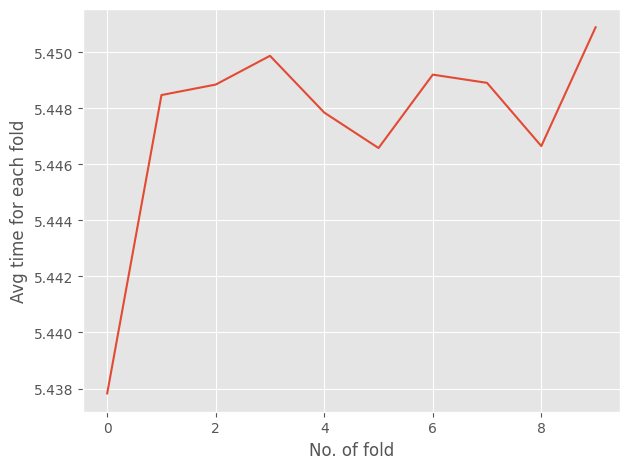

In [84]:
import matplotlib.pyplot as plt

times_vgg19_n = np.zeros((10,100))
for i, row in enumerate(times_vgg19):
    times_vgg19_n[i, :len(row)] = row

times_vgg19_n_n = np.mean(times_vgg19_n,axis=1)

plt.plot(times_vgg19_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("vgg19 times")
plt.show()

In [85]:
train_acc_vgg19_n = np.zeros((10,100))
for i, row in enumerate(train_acc_vgg19):
    train_acc_vgg19_n[i, :len(row)] = row
    
test_acc_vgg19_n = np.zeros((10,100))
for i, row in enumerate(test_acc_vgg19):
    test_acc_vgg19_n[i, :len(row)] = row
    
train_loss_vgg19_n = np.zeros((10,100))
for i, row in enumerate(train_loss_vgg19):
    train_loss_vgg19_n[i, :len(row)] = row
    
test_loss_vgg19_n = np.zeros((10,100))
for i, row in enumerate(test_loss_vgg19):
    test_loss_vgg19_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_vgg19_n = np.mean(train_acc_vgg19_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_vgg19_n = np.mean(test_acc_vgg19_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_vgg19_n = np.mean(train_loss_vgg19_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_vgg19_n = np.mean(test_loss_vgg19_n,axis=0)

In [86]:
data = [train_acc_vgg19_n,test_acc_vgg19_n,train_loss_vgg19_n,test_loss_vgg19_n]

df = pd.DataFrame(data)
df.to_csv('vgg19_acc', index=False)
df = pd.read_csv('vgg19_acc')

train_acc_vgg19_n = df.iloc[0]
test_acc_vgg19_n = df.iloc[1]
train_loss_vgg19_n = df.iloc[2]
test_loss_vgg19_n = df.iloc[3]


df_t = pd.DataFrame([times_vgg19_n_n])
df_t.to_csv('vgg19_times', index=False)
df_t = pd.read_csv('vgg19_times')

times_vgg19_n_n = df_t.iloc[0]

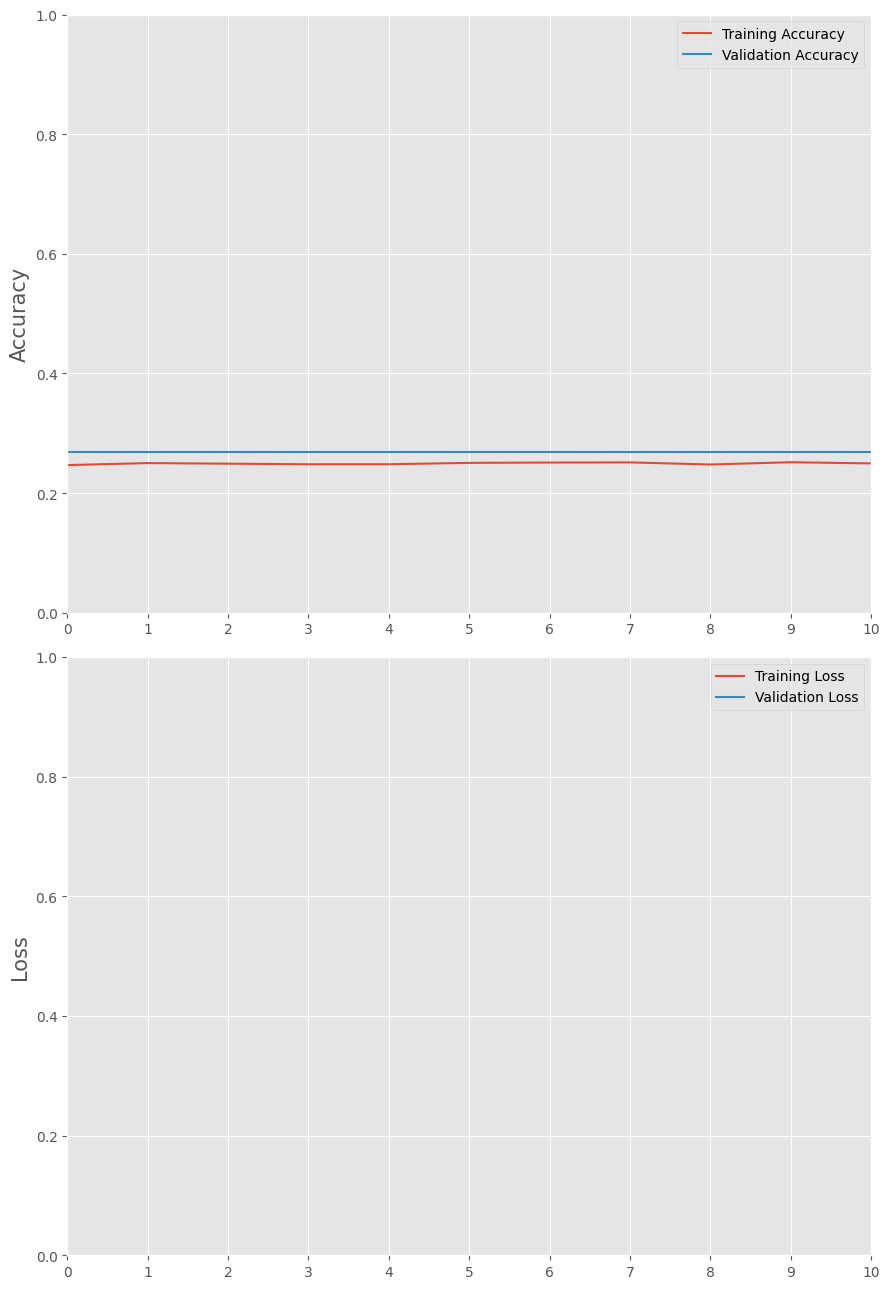

In [87]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_vgg19_n, label='Training Accuracy')
axs[0].plot(test_acc_vgg19_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_vgg19_n, label='Training Loss')
axs[1].plot(test_loss_vgg19_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("vgg19 Training and Testing Loss")
plt.show()

In [88]:
np.array(scores_vgg19).shape

(10, 302, 4)

In [89]:
y_pred_vgg19 = np.argmax(scores_vgg19,axis=2)

In [90]:
y_pred_vgg19.shape

(10, 302)

In [91]:
from sklearn.metrics import accuracy_score
acc_scores_vgg19 = []
for i in range(len(y_test_all_vgg19)):
    acc_scores_vgg19.append(accuracy_score(y_true = y_test_all_vgg19[i],y_pred = y_pred_vgg19[i]))

In [92]:
acc_scores_vgg19

[0.2781456953642384,
 0.3973509933774834,
 0.12582781456953643,
 0.13245033112582782,
 0.3079470198675497,
 0.1490066225165563,
 0.16225165562913907,
 0.347682119205298,
 0.3576158940397351,
 0.20860927152317882]

In [93]:
df_acc = pd.DataFrame([acc_scores_vgg19])

df_acc.to_csv('vgg19_accuracy', index=False)

df_acc = pd.read_csv('vgg19_accuracy')

acc_scores_vgg19 = df_acc.iloc[0].values

In [94]:
y_test_all_n = np.array(y_test_all_vgg19)

y_pred_vgg19_n = y_pred_vgg19.flatten()
y_test_all_n = y_test_all_n.flatten()

In [95]:
import gc
gc.collect()

23960

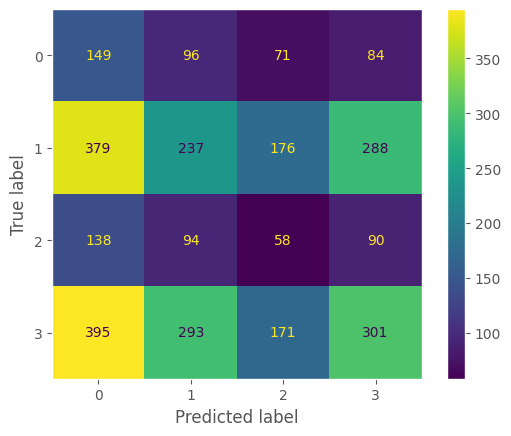

In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_vgg19_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("vgg19")
plt.show()

In [97]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_vgg19_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.14      0.37      0.20       400
           1       0.33      0.22      0.26      1080
           2       0.12      0.15      0.14       380
           3       0.39      0.26      0.31      1160

    accuracy                           0.25      3020
   macro avg       0.25      0.25      0.23      3020
weighted avg       0.30      0.25      0.26      3020



#  Performance Metrics

## accuracy_score Metrics

In [98]:
df_acc = pd.read_csv('cnn_svm_accuracy')
acc_scores_cnn_svm = df_acc.iloc[0].values


df_acc = pd.read_csv('lstm_accuracy')
acc_scores_lstm = df_acc.iloc[0].values


df_acc = pd.read_csv('bilstm_accuracy')
acc_scores_bilstm = df_acc.iloc[0].values


df_acc = pd.read_csv('birnn_accuracy')
acc_scores_birnn = df_acc.iloc[0].values



df_acc = pd.read_csv('mnv2_accuracy')
acc_scores_mnv2 = df_acc.iloc[0].values


df_acc = pd.read_csv('env2l_accuracy')
acc_scores_env2l = df_acc.iloc[0].values


df_acc = pd.read_csv('enb7_accuracy')
acc_scores_enb7 = df_acc.iloc[0].values


df_acc = pd.read_csv('nnl_accuracy')
acc_scores_nnl = df_acc.iloc[0].values


df_acc = pd.read_csv('nnb_accuracy')
acc_scores_nnb = df_acc.iloc[0].values



df_acc = pd.read_csv('axn_accuracy')
acc_scores_axn = df_acc.iloc[0].values



df_acc = pd.read_csv('rnv2_accuracy')
acc_scores_rnv2 = df_acc.iloc[0].values



df_acc = pd.read_csv('xv3_accuracy')
acc_scores_xv3 = df_acc.iloc[0].values



df_acc = pd.read_csv('vgg16_accuracy')
acc_scores_vgg16 = df_acc.iloc[0].values



df_acc = pd.read_csv('vgg19_accuracy')
acc_scores_vgg19 = df_acc.iloc[0].values

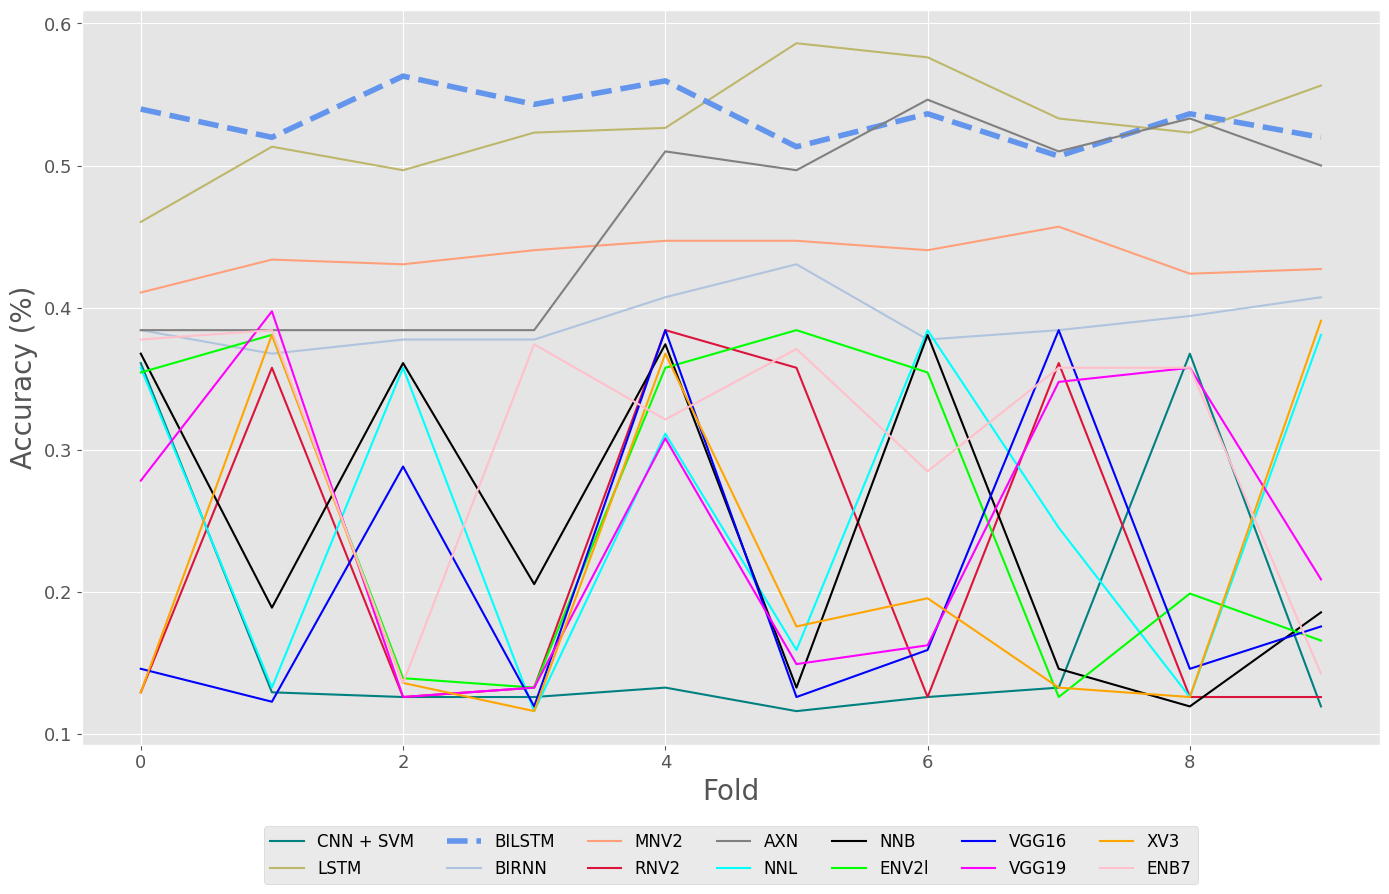

In [99]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(acc_scores_cnn_svm,label='CNN + SVM',color='teal')
plt.plot(acc_scores_lstm,label='LSTM',color='darkkhaki')
plt.plot(acc_scores_bilstm,label='BILSTM',color='cornflowerblue',linewidth=4,linestyle='--')
plt.plot(acc_scores_birnn,label='BIRNN',color='lightsteelblue')
plt.plot(acc_scores_mnv2,label='MNV2',color = 'lightsalmon')
plt.plot(acc_scores_rnv2,label='RNV2',color='crimson')
plt.plot(acc_scores_axn,label='AXN',color='gray')
plt.plot(acc_scores_nnl,label='NNL',color='cyan')
plt.plot(acc_scores_nnb,label='NNB',color='black')
plt.plot(acc_scores_env2l,label='ENV2l',color='lime')
plt.plot(acc_scores_vgg16,label='VGG16',color='blue')
plt.plot(acc_scores_vgg19,label='VGG19',color='fuchsia')
plt.plot(acc_scores_xv3,label='XV3',color='orange')
plt.plot(acc_scores_enb7,label='ENB7',color='pink')

plt.xlabel("Fold",fontsize = 20)
plt.ylabel("Accuracy (%)",fontsize = 20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="12")
plt.tight_layout()
plt.savefig("Deep Learning Chroma Accuracy")
plt.show()

## Times Metrics

In [100]:
df_acc = pd.read_csv('cnn_svm_times')
times_cnn_svm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('lstm_times')
times_lstm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('bilstm_times')
times_bilstm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('birnn_times')
times_birnn = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('mnv2_times')
times_mnv2 = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('env2l_times')
times_env2l = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('enb7_times')
times_enb7 = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('nnl_times')
times_nnl = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('nnb_times')
times_nnb = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('axn_times')
times_axn = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('rnv2_times')
times_rnv2 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('xv3_times')
times_xv3 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('vgg16_times')
times_vgg16 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('vgg19_times')
times_vgg19 = np.mean(df_acc.iloc[0].values)

In [101]:
df_acc = pd.read_csv('vgg19_times')
times_vgg19 = df_acc.iloc[0].values
times_vgg19

array([5.4378275 , 5.44846706, 5.44884154, 5.44986705, 5.4478429 ,
       5.44657829, 5.44919516, 5.44890208, 5.44664771, 5.45088331])

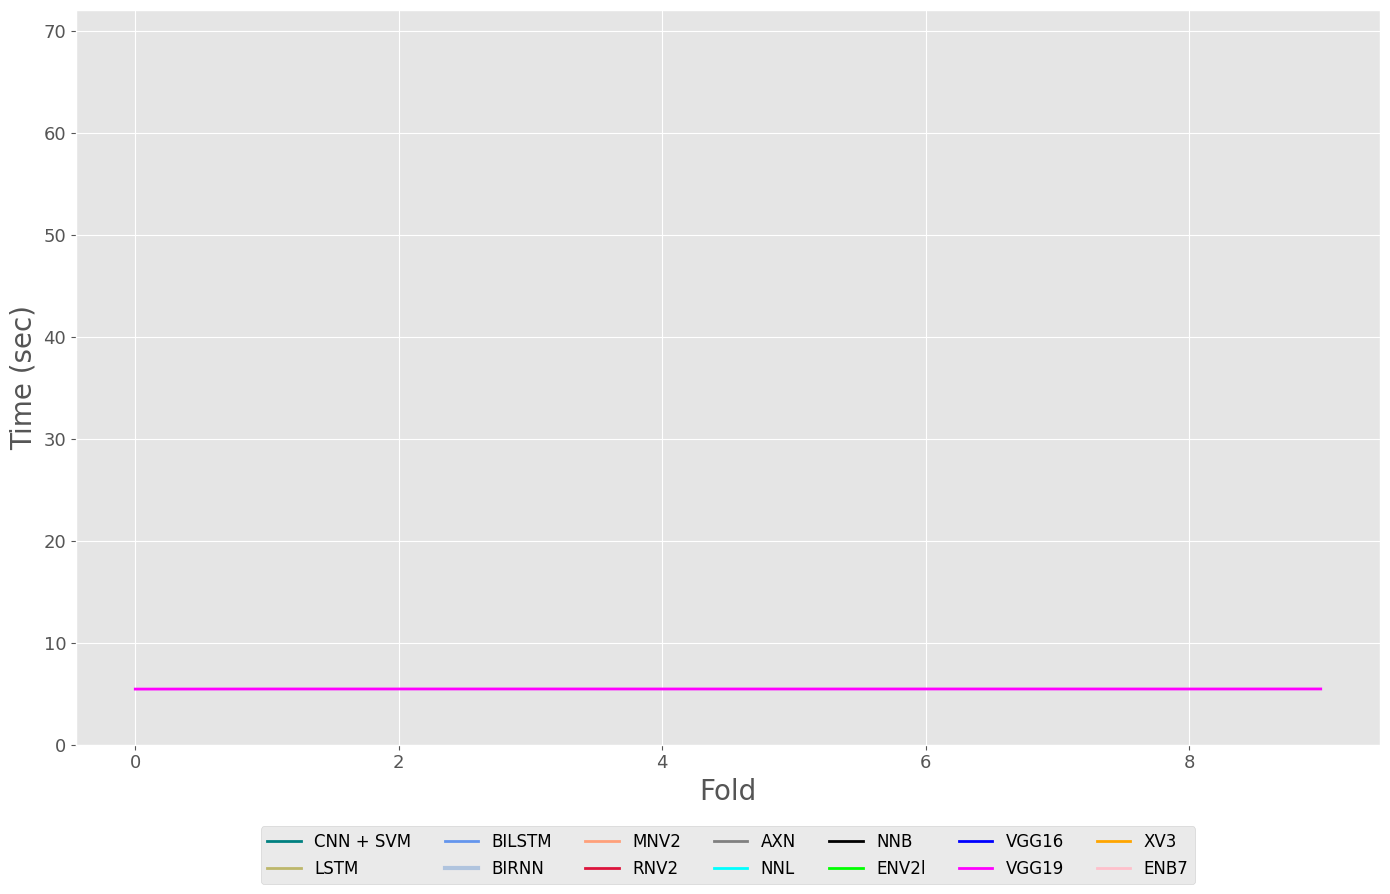

In [102]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(times_cnn_svm,label='CNN + SVM',color='teal',linewidth=2)
plt.plot(times_lstm,label='LSTM',color='darkkhaki',linewidth=2)
plt.plot(times_bilstm,label='BILSTM',color='cornflowerblue',linewidth=2)
plt.plot(times_birnn,label='BIRNN',color='lightsteelblue',linewidth=3)
plt.plot(times_mnv2,label='MNV2',color = 'lightsalmon',linewidth=2)
plt.plot(times_rnv2,label='RNV2',color='crimson',linewidth=2)
plt.plot(times_axn,label='AXN',color='gray',linewidth=2)
plt.plot(times_nnl,label='NNL',color='cyan',linewidth=2)
plt.plot(times_nnb,label='NNB',color='black',linewidth=2)
plt.plot(times_env2l,label='ENV2l',color='lime',linewidth=2)
plt.plot(times_vgg16,label='VGG16',color='blue',linewidth=2)
plt.plot(times_vgg19,label='VGG19',color='fuchsia',linewidth=2)
plt.plot(times_xv3,label='XV3',color='orange',linewidth=2)
plt.plot(times_enb7,label='ENB7',color='pink',linewidth=2)

plt.xlabel("Fold",fontsize = 20)
plt.ylabel("Time (sec)",fontsize = 20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylim(y.min(),)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="12")
plt.tight_layout()
plt.savefig("Deep Learning Chroma Times")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


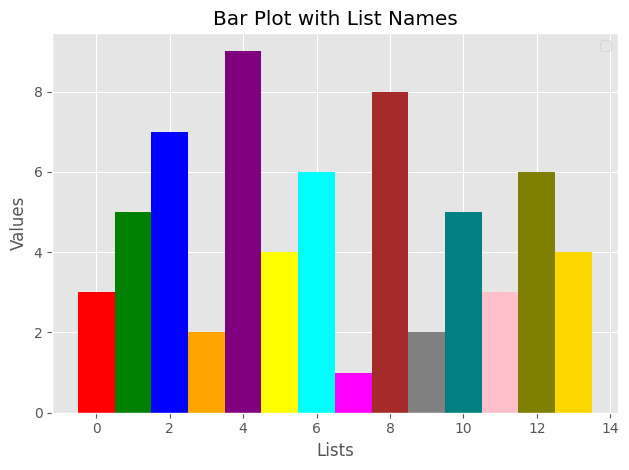

In [103]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
# List names
list_names = ["List 1", "List 2", "List 3", "List 4", "List 5", "List 6", "List 7", "List 8", "List 9", "List 10", "List 11", "List 12", "List 13", "List 14"]

# Data values for each list
data_values = [3, 5, 7, 2, 9, 4, 6, 1, 8, 2, 5, 3, 6, 4]

# Custom colors for each bar
custom_colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'gray', 'teal', 'pink', 'olive', 'gold']

# Width of each bar
bar_width = 1

# Calculate the positions of the bars on the x-axis
bar_positions = np.arange(len(data_values))

# Creating the bar plot
plt.bar(bar_positions, data_values, color=custom_colors, width=bar_width)

# Adding labels to each bar
# for i in range(len(list_names)):
#     plt.text(bar_positions[i], data_values[i], list_names[i], ha='center', va='bottom')

# Customizing the plot
plt.xlabel('Lists')
plt.ylabel('Values')
plt.title('Bar Plot with List Names')
# plt.xticks(bar_positions, list_names, rotation=45)

# Displaying the plot
plt.tight_layout()
plt.legend()
plt.show()


# Training and Testing Perfomance

In [104]:
df_acc = pd.read_csv('cnn_svm_acc')
train_acc_cnn_svm_n = df_acc.iloc[0].values
test_acc_cnn_svm_n = df_acc.iloc[1].values
train_loss_cnn_svm_n = df_acc.iloc[2].values
test_loss_cnn_svm_n = df_acc.iloc[3].values

df_acc = pd.read_csv('lstm_acc')
train_acc_lstm_n = df_acc.iloc[0].values
test_acc_lstm_n = df_acc.iloc[1].values
train_loss_lstm_n = df_acc.iloc[2].values
test_loss_lstm_n = df_acc.iloc[3].values


df_acc = pd.read_csv('bilstm_acc')
train_acc_bilstm_n = df_acc.iloc[0].values
test_acc_bilstm_n = df_acc.iloc[1].values
train_loss_bilstm_n = df_acc.iloc[2].values
test_loss_bilstm_n = df_acc.iloc[3].values


df_acc = pd.read_csv('birnn_acc')
train_acc_birnn_n = df_acc.iloc[0].values
test_acc_birnn_n = df_acc.iloc[1].values
train_loss_birnn_n = df_acc.iloc[2].values
test_loss_birnn_n = df_acc.iloc[3].values



df_acc = pd.read_csv('mnv2_acc')
train_acc_mnv2_n = df_acc.iloc[0].values
test_acc_mnv2_n = df_acc.iloc[1].values
train_loss_mnv2_n = df_acc.iloc[2].values
test_loss_mnv2_n = df_acc.iloc[3].values


df_acc = pd.read_csv('env2l_acc')
train_acc_env2l_n = df_acc.iloc[0].values
test_acc_env2l_n = df_acc.iloc[1].values
train_loss_env2l_n = df_acc.iloc[2].values
test_loss_env2l_n = df_acc.iloc[3].values


df_acc = pd.read_csv('enb7_acc')
train_acc_enb7_n = df_acc.iloc[0].values
test_acc_enb7_n = df_acc.iloc[1].values
train_loss_enb7_n = df_acc.iloc[2].values
test_loss_enb7_n = df_acc.iloc[3].values


df_acc = pd.read_csv('nnl_acc')
train_acc_nnl_n = df_acc.iloc[0].values
test_acc_nnl_n = df_acc.iloc[1].values
train_loss_nnl_n = df_acc.iloc[2].values
test_loss_nnl_n = df_acc.iloc[3].values


df_acc = pd.read_csv('nnb_acc')
train_acc_nnb_n = df_acc.iloc[0].values
test_acc_nnb_n = df_acc.iloc[1].values
train_loss_nnb_n = df_acc.iloc[2].values
test_loss_nnb_n = df_acc.iloc[3].values



df_acc = pd.read_csv('axn_acc')
train_acc_axn_n = df_acc.iloc[0].values
test_acc_axn_n = df_acc.iloc[1].values
train_loss_axn_n = df_acc.iloc[2].values
test_loss_axn_n = df_acc.iloc[3].values



df_acc = pd.read_csv('rnv2_acc')
train_acc_rnv2_n = df_acc.iloc[0].values
test_acc_rnv2_n = df_acc.iloc[1].values
train_loss_rnv2_n = df_acc.iloc[2].values
test_loss_rnv2_n = df_acc.iloc[3].values



df_acc = pd.read_csv('xv3_acc')
train_acc_xv3_n = df_acc.iloc[0].values
test_acc_xv3_n = df_acc.iloc[1].values
train_loss_xv3_n = df_acc.iloc[2].values
test_loss_xv3_n = df_acc.iloc[3].values



df_acc = pd.read_csv('vgg16_acc')
train_acc_vgg16_n = df_acc.iloc[0].values
test_acc_vgg16_n = df_acc.iloc[1].values
train_loss_vgg16_n = df_acc.iloc[2].values
test_loss_vgg16_n = df_acc.iloc[3].values



df_acc = pd.read_csv('vgg19_acc')
train_acc_vgg19_n = df_acc.iloc[0].values
test_acc_vgg19_n = df_acc.iloc[1].values
train_loss_vgg19_n = df_acc.iloc[2].values
test_loss_vgg19_n = df_acc.iloc[3].values

## Training Accuracy Perfomance

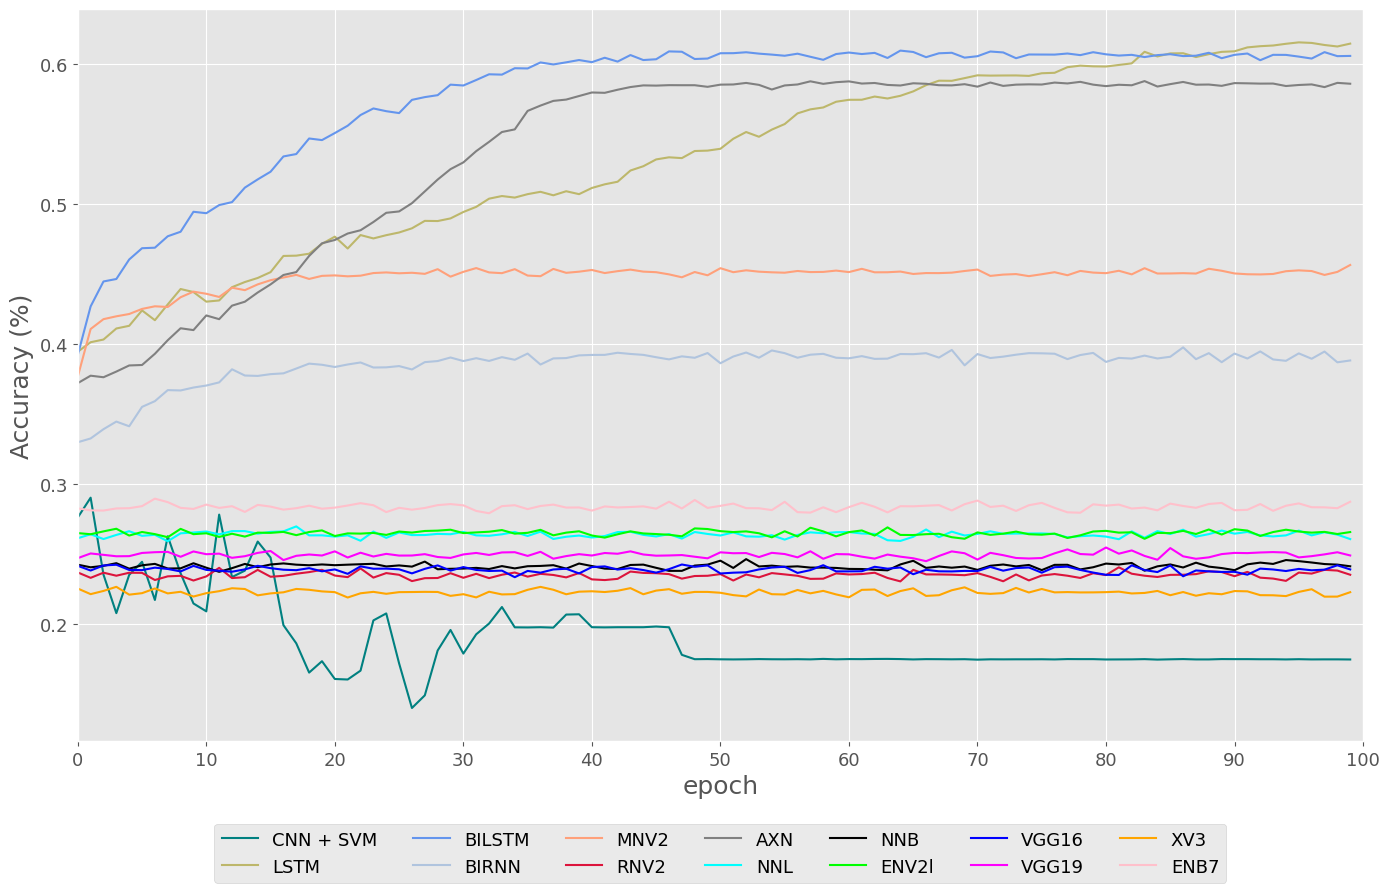

In [105]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(train_acc_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(train_acc_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(train_acc_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(train_acc_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(train_acc_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(train_acc_rnv2_n,label='RNV2',color='crimson')
plt.plot(train_acc_axn_n,label='AXN',color='gray')
plt.plot(train_acc_nnl_n,label='NNL',color='cyan')
plt.plot(train_acc_nnb_n,label='NNB',color='black')
plt.plot(train_acc_env2l_n,label='ENV2l',color='lime')
plt.plot(train_acc_vgg16_n,label='VGG16',color='blue')
plt.plot(train_acc_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(train_acc_xv3_n,label='XV3',color='orange')
plt.plot(train_acc_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Accuracy (%)",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Training Accuracy Performance")
plt.show()

## Testing Accuracy Perfomance

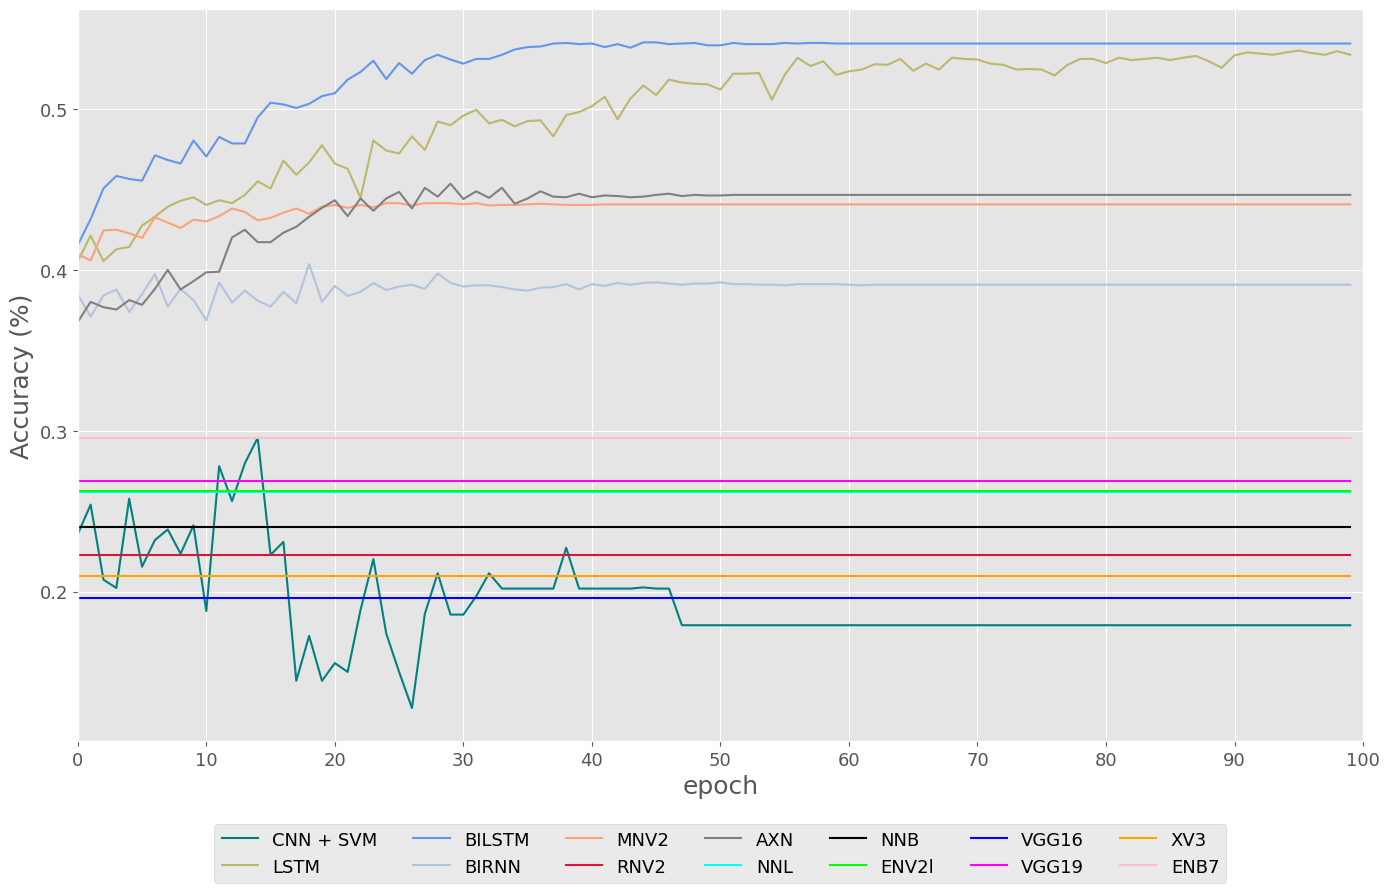

In [106]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(test_acc_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(test_acc_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(test_acc_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(test_acc_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(test_acc_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(test_acc_rnv2_n,label='RNV2',color='crimson')
plt.plot(test_acc_axn_n,label='AXN',color='gray')
plt.plot(test_acc_nnl_n,label='NNL',color='cyan')
plt.plot(test_acc_nnb_n,label='NNB',color='black')
plt.plot(test_acc_env2l_n,label='ENV2l',color='lime')
plt.plot(test_acc_vgg16_n,label='VGG16',color='blue')
plt.plot(test_acc_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(test_acc_xv3_n,label='XV3',color='orange')
plt.plot(test_acc_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Accuracy (%)",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Testing Accuracy Performance")
plt.show()

## Training Loss Perfomance

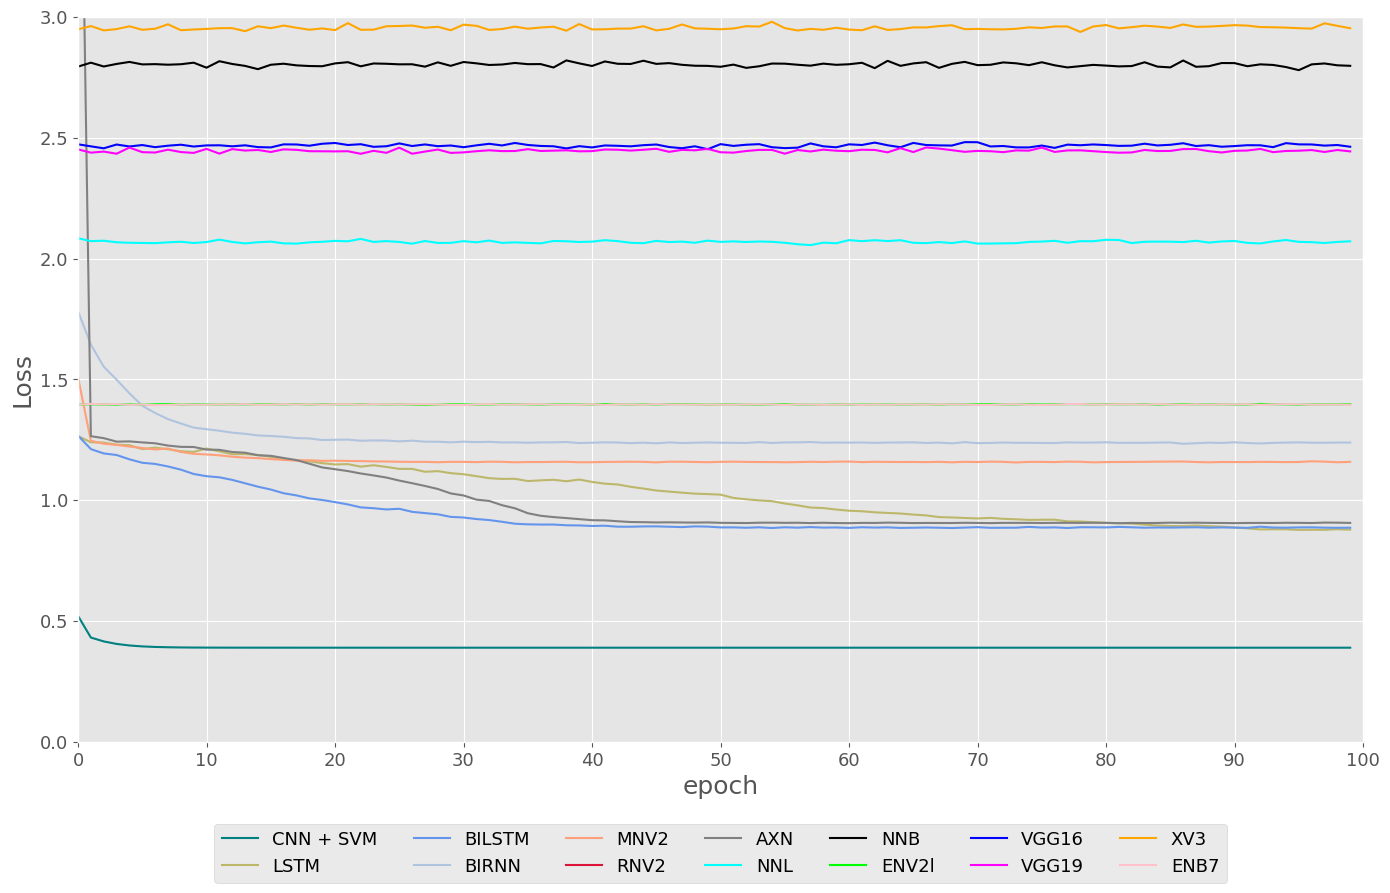

In [107]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(train_loss_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(train_loss_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(train_loss_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(train_loss_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(train_loss_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(train_loss_rnv2_n,label='RNV2',color='crimson')
plt.plot(train_loss_axn_n,label='AXN',color='gray')
plt.plot(train_loss_nnl_n,label='NNL',color='cyan')
plt.plot(train_loss_nnb_n,label='NNB',color='black')
plt.plot(train_loss_env2l_n,label='ENV2l',color='lime')
plt.plot(train_loss_vgg16_n,label='VGG16',color='blue')
plt.plot(train_loss_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(train_loss_xv3_n,label='XV3',color='orange')
plt.plot(train_loss_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.ylim(y.min(),y.max())
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Loss",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Training Loss Performance")
plt.show()

## Testing Loss Perfomance

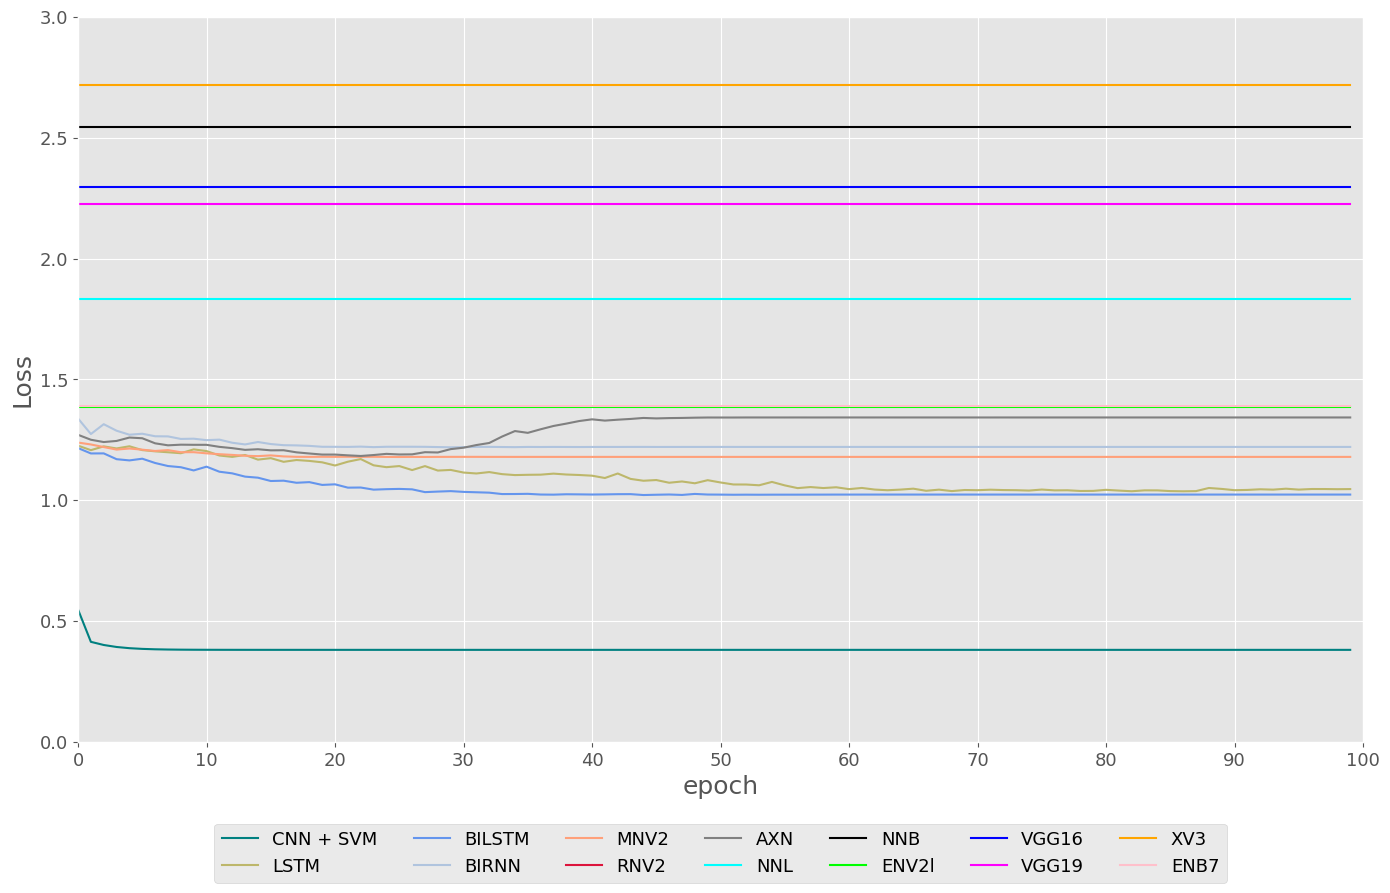

In [108]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(test_loss_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(test_loss_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(test_loss_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(test_loss_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(test_loss_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(test_loss_rnv2_n,label='RNV2',color='crimson')
plt.plot(test_loss_axn_n,label='AXN',color='gray')
plt.plot(test_loss_nnl_n,label='NNL',color='cyan')
plt.plot(test_loss_nnb_n,label='NNB',color='black')
plt.plot(test_loss_env2l_n,label='ENV2l',color='lime')
plt.plot(test_loss_vgg16_n,label='VGG16',color='blue')
plt.plot(test_loss_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(test_loss_xv3_n,label='XV3',color='orange')
plt.plot(test_loss_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.ylim(y.min(),y.max())
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Loss",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Testing Loss Performance")
plt.show()